22.11.2019
Selected features (see Google doc)
analysis of ctx count

## Analysis of distribution of contractions in 1 hour window

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
import sys
sys.path.insert(1, "C:/sers/jaege/PycharmProjects/labour-katharina");
from labor_katharina import contraction_features, con_count
import datetime
import seaborn as sns

### Labor definition 1

- non-labor: 0 -> day of delivery -2
- labor:     day of delivery -1 + day of delivery

In [150]:
#load data
users = pd.read_pickle('./data/users.pkl')
recordings = pd.read_pickle('./data/recordings.pkl')
contractions = pd.read_pickle('./data/contractions.pkl')

In [3]:
window_size = 3600 #1 hour

In [86]:
cx_count = con_count.extract(recordings, contractions, window_size)

recording  -L_04VOTv6p-cX7hxgGE
recording  -L_052m2dqL_MQg1Tc2a
recording  -L_06gcoe6UIePkk9h6J
recording  -L_06UzJsRywu9XVwLeI
recording  -L_06WYGbjNiGokyPqwh
recording  -L_07JNq_LPBWxqzq_LA
recording  -L_0a5j1Me4aMRLC-dE2
recording  -L_0AE4AfNTwh8K_LJds
recording  -L_0aEM2pIgFrDq4RmZd
recording  -L_0aIov_KyD0bBPU5Ar
recording  -L_0BbwbrEkywSmbKnTf
recording  -L_0BMG0_O7a6-C5walQ
recording  -L_0CgZqUMNta6qDgCCi
recording  -L_0cNLBV7uXqU-j9GkD
recording  -L_0cUv7TJrwkkZef-I2
recording  -L_0cYxMaXfql85wSZGy
recording  -L_0-d9ayv5L1vfBRhrq
recording  -L_0dC2SF9NW1rP1JWz3
recording  -L_0dii38tOzP2ENoyKc
recording  -L_0dI_uApX7gD2EpY5q
recording  -L_0DZTCBFtBTyMljByE
recording  -L_0e6cMnA1HhvBlxx6T
recording  -L_0eLbe4xOt648gmPKf
recording  -L_0Eqr0VSlwv_d1de7H
recording  -L_0ftQIid88c63Cphbs
recording  -L_0gKJEPfFvkP-M6GaN
recording  -L_0gQW2Xli6y9KVexpH
recording  -L_0H17nqxujPszxuZMl
recording  -L_0HbIY1oyd7bvYfIfO
recording  -L_0hsHIBVejUqbii4PS
recording  -L_0hZxpZwHoYt5MUkYB
recordin

KeyboardInterrupt: 

Text(0.5, 0, 'Contractions count in 1 hour')

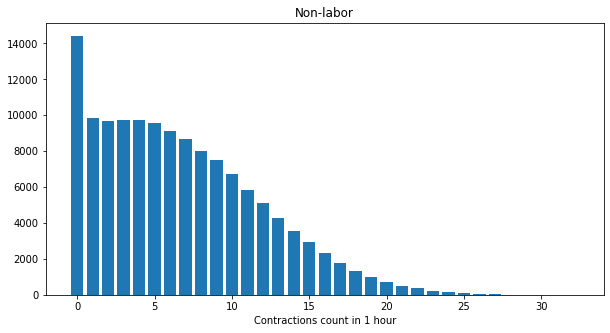

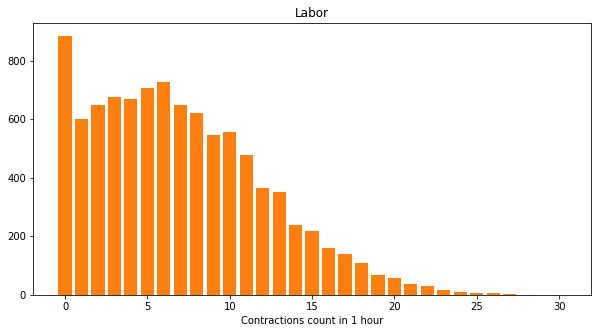

In [70]:
plt.figure(figsize=(10,5))
plt.title('Non-labor')
count_nl = cx_count[cx_count['labor'] == 0]['count']
x, count = np.unique(count_nl, return_counts=True);
plt.bar(x, count, color='C0', label='non labor')
plt.xlabel('Contractions count in 1 hour')

plt.figure(figsize=(10,5))
plt.title('Labor')
count_l =  cx_count[cx_count['labor'] == 1]['count']
x, count = np.unique(count_l, return_counts=True);
plt.bar(x, count, color='C1', label='non labor')
plt.xlabel('Contractions count in 1 hour')


#### Observation:
most 1 hour windows in labor recordings have no contraction 
<br>
this observation is against our assumption that labor recordings happen frequently during labor (at least 2 every 10mins but not more than 5 in 10mins)
<br>
Possible reason: labor definition includes also non-labor recordings
<br>
-> change labor definition to a stricter one

### Labor definition 2

- non-labor: 0 -> day of delivery - 2
- labor:     day of delivery 
- skip day of delivery - 1

In [157]:
contractions['labor'] = [1 if (bb - ca).days == 0 else 0 for bb,ca in zip(users.loc[contractions['user_id'], 'baby_birthdate'], contractions['created_at'].dt.date)]
contractions['labor'] = [2 if (bb - ca).days == 1 else l for bb,ca,l in zip(users.loc[contractions['user_id'], 'baby_birthdate'], contractions['created_at'].dt.date, contractions['labor'])]

recordings['labor'] = [1 if (bb - ca).days == 0 else 0 for bb, ca in zip(recordings['baby_birthdate'], recordings['created_at'].dt.date)]
recordings['labor'] = [2 if (bb - ca).days == 1 else l for bb, ca,l in zip(recordings['baby_birthdate'], recordings['created_at'].dt.date, recordings['labor'])]

contractions = contractions[contractions['labor']!= 2]
recordings = recordings[recordings['labor'] != 2]

In [103]:
cx_count = con_count.extract(recordings, contractions, window_size)

recording  -L_04VOTv6p-cX7hxgGE
recording  -L_052m2dqL_MQg1Tc2a
recording  -L_06gcoe6UIePkk9h6J
recording  -L_06UzJsRywu9XVwLeI
recording  -L_06WYGbjNiGokyPqwh
recording  -L_07JNq_LPBWxqzq_LA
recording  -L_0a5j1Me4aMRLC-dE2
recording  -L_0AE4AfNTwh8K_LJds
recording  -L_0aEM2pIgFrDq4RmZd
recording  -L_0BbwbrEkywSmbKnTf
recording  -L_0BMG0_O7a6-C5walQ
recording  -L_0CgZqUMNta6qDgCCi
recording  -L_0cNLBV7uXqU-j9GkD
recording  -L_0cUv7TJrwkkZef-I2
recording  -L_0cYxMaXfql85wSZGy
recording  -L_0-d9ayv5L1vfBRhrq
recording  -L_0dC2SF9NW1rP1JWz3
recording  -L_0dii38tOzP2ENoyKc
recording  -L_0dI_uApX7gD2EpY5q
recording  -L_0DZTCBFtBTyMljByE
recording  -L_0e6cMnA1HhvBlxx6T
recording  -L_0eLbe4xOt648gmPKf
recording  -L_0Eqr0VSlwv_d1de7H
recording  -L_0ftQIid88c63Cphbs
recording  -L_0gKJEPfFvkP-M6GaN
recording  -L_0gQW2Xli6y9KVexpH
recording  -L_0H17nqxujPszxuZMl
recording  -L_0HbIY1oyd7bvYfIfO
recording  -L_0hsHIBVejUqbii4PS
recording  -L_0hZxpZwHoYt5MUkYB
recording  -L_0I9p3KKyHgn7Kx73u
recordin

recording  -L_9LGwmzxi1osI5gzzg
recording  -L_9mzqtoW5NF3P1__BZ
recording  -L_9OIT_47B5wAYxjojo
recording  -L__9qzp0N-9iLaRIm9w
recording  -L_9tyhpnWIqQ6Hh0fp-
recording  -L_9uK5srgScIsqs5s-Q
recording  -L_9Uml_h9gHhe-_MQz-
recording  -La08CCDB0MkiYRo8dwZ
recording  -La08LQXMeI5TXpW6vCj
recording  -L_a0AdN0pnTJs5c9K5f
recording  -La0Az175iSh2w-y1_eB
recording  -La0BMK9jT2erXmw_m0_
recording  -La0DZwDrV_B47r_j5jK
recording  -La0jX9_5CAzJ4E_SnVr
recording  -La0nIDrBcBDGrF_c4ZJ
recording  -La0qUcpDmgXBTd5DrtG
recording  -La0qYQNm59c7AQ6pBhk
recording  -La0RbeM7K5nJVpyOtbp
recording  -La0T6ZM9zDHsW0Zev0F
recording  -La0U2d4VSNC8Qyig61u
recording  -La0Uy5gdZhnKcJ91u5Z
recording  -La0w-LejNnOR_uJkmv9
recording  -La0WSGqOIWc5Vq882eU
recording  -La_0xGzFBOH8u2f_vuS
recording  -La0yQnl5tMGHw4AVy6V
recording  -La152G1YcXIpDnilcmi
recording  -La18-1Ty57v0pvxJRSg
recording  -La1_ePX4xTOqmOqQPgo
recording  -La1fIsQ-9vilW_pIwXs
recording  -La1H8Rz8sBtiUv3x8P_
recording  -La1HXajnmWc8qUmoq9K
recordin

recording  -La9CyC4WnYzFLE3Ewb7
recording  -La9F4fJ9TglJLRMoRpI
recording  -La9fzTBgvXt7MERI0VA
recording  -La9g9TkWmVvb16cdBMY
recording  -L_a9HeJiwgM_-V0Dapb
recording  -La9HgdIDvvzokhTEQ-M
recording  -La9HnYCOwpUw7KlcFgD
recording  -La9HyzS-OZCgfDvO1Kg
recording  -La9i0AiKni6XbAYbOAC
recording  -La9IHAILHGbUaWg-Y2-
recording  -L_a9JmKGqFzBcA2I2dH
recording  -La9KFaGRLktofn25-5S
recording  -La9OKq5idg2Sf1eR24_
recording  -La9pjvOYGNTWCoUQdGP
recording  -La9sj__7eA5vsO_IJuz
recording  -L_A9uLdnxJl-2xdGr0D
recording  -La9y8JuNqJl2SjLt7AB
recording  -La9zuB-U_GTp6GGr0a1
recording  -L_A-A0h44mj3rLfVIJa
recording  -Laa6qIxwOl0MLGrEC_Q
recording  -LaABlm44BdFMIAqY3E_
recording  -LaactUYxfTunfRRKctR
recording  -L_AadshBOlumtmPIA2b
recording  -LaaDW8jvKM2wo0Isvev
recording  -LaaE0jrI-9o-All4Ofw
recording  -Laa-eS0pBs25gmBGhsg
recording  -LaaEt6fN7RzaNsBnhzK
recording  -LaaFVS2S5uS3sgJXGMz
recording  -LaAgCzTZVBtVqYgKQBn
recording  -LaagS-zzM2BTQTtjUpi
recording  -Laa-ho2qmtfI20OYgTN
recordin

recording  -LaE8ql_ci1wsNdqJFkR
recording  -LaE9uLmcXzVl46OJW91
recording  -LaEa52bcUPBIYoLQPy1
recording  -LaEABewvTQ93Kvaeq67
recording  -Laeafdba19UD_9XECtF
recording  -Laebmxa6JGWpmVWN-GF
recording  -Laebo2Z18EOlXPimK1V
recording  -LaEC3dipPBN-RcYYW54
recording  -LaeD9I6dbjBbu7Xy9i8
recording  -LaEEglnzPNpmmbCaBxb
recording  -LaEF-aZscUIM3uWvoQv
recording  -LaeFW77NBAmHfFe6ede
recording  -LaEGu3M3fgjwNLim-6X
recording  -LaEgv-dtGCcdekWoTas
recording  -LaEHovN81vfLoYhvmIj
recording  -LaEIR9m_3c2s5LpiQj6
recording  -LaEjHrzZsxoElrW5kwD
recording  -LaeLd3lMXPGZ75fe_uS
recording  -LaELFTUHVbukVuqvqC0
recording  -LaELvNApNDQtf2GZAq-
recording  -LaemPfb_4fzX-z-7Afy
recording  -L_AEOLPDTlV9bZcSUBz
recording  -L_AEOQ9F5wBENW8FAEt
recording  -LaeOYM3NCiEBQ05rpCY
recording  -LaePdF_KR1xCCzBZfUu
recording  -LaEpfI7zwP5_gC5i0b_
recording  -LaERDuM0w4u1MG9GmxC
recording  -LaErMXNyGypCU6bszS3
recording  -LaES3t1ivU_ZhzPvB1B
recording  -LaeTUyODbSBEVotTHBz
recording  -LaEtVGrXzkvgUmBqeVu
recordin

recording  -LaiUIdyx8k-7A_r4ZtT
recording  -LaIvdf3S8isTVQeRCQV
recording  -LaIVDlZAntWRZYNqz8A
recording  -LaIwFkoN1kyQDZB-V0o
recording  -LaIx_F7OE1qZDadpvLG
recording  -LaiXtSdQuS3LbueCrsq
recording  -LaIY6Zkh_8DVHd3ROH5
recording  -Laiz5jFFhaI_dpzilQt
recording  -LaizT8QrE0cFhH7wxaw
recording  -LaIZxvaes8QHO74soNM
recording  -LaJ1aD05aZYP13_iT9x
recording  -L_aJ49DTe-_zMoJrt-G
recording  -LaJ5jZrKBcbCKFmLjfF
recording  -L_aJ6to1TR760k5BUSe
recording  -LaJ844jfM8Ts8M5rSvb
recording  -LaJ9f1AJXxnL1751jpw
recording  -LaJAfNtbJkV1bJ0tPNw
recording  -LaJARqv8WSZexZd-nlO
recording  -La_JB1XnhsqK-tOs_6f
recording  -LajBdUK2l2xdlNroa9p
recording  -LaJbxQOPVLLJVzHkCMx
recording  -L_a-jcMtcZas2itP7xF
recording  -LaJcvxthBCjjnFxpImO
recording  -LaJE2cx3tBbxgLN7Qm1
recording  -LajeFKxk0V3WfIm-iz8
recording  -LaJElr_sBBqC_CHbiDS
recording  -Laj_esHGGtedyDU6Krt
recording  -LajFSeZlCFKgJhJHsyD
recording  -LaJIkt-3g0xKSvjwNSv
recording  -LajiZaN7i8RO7R1IHBs
recording  -LajkvIke5o8PSVziDGw
recordin

recording  -LaO1n6ZVl_ztU8jqO18
recording  -LaO2DfcstGrkiA6I3Dq
recording  -LaO2i8-rtV5rDQVbk5_
recording  -LaO2TuMUPU4j5gClJKw
recording  -LaO3reypI6NlnvF_vV7
recording  -Lao4rTclGqsRZ0ubi7r
recording  -LaO5KlWBciB7l7-Lmt_
recording  -LaO5RN-BvfOkEh-e37d
recording  -LaO7X4v8PP-vx8jEYke
recording  -LaO9ojhQJsEiY63X0g5
recording  -LaOb3la9nII-BZG4WqK
recording  -LaOBSqOJhZTYscz9j8O
recording  -LaOC2CJQ-dVmLW3oOCO
recording  -LaOcAp_pI5WHR86kjdD
recording  -LaOCNWOdI-4-H5tAv-D
recording  -LaOCxIRdZ87u5Doa1Vp
recording  -LaODwnl0HP8pXV7aAd2
recording  -LaO-ef5URNtOIqgMzKu
recording  -L_aOEfQN793-I__hV3A
recording  -LaoEWaGkLBSinw103dy
recording  -LaOF_OhzloN_8xlO9XJ
recording  -LaO_gO5AZicTpeAs2SH
recording  -La_oGUsglRsu7VyVAMx
recording  -LaoH2AA-Wg4-v4-sycp
recording  -LaokJYHcMO4FPCQEy3k
recording  -LaoknsPbFZCAqlmTT81
recording  -LaOlGdGvta_-xgk1Gw9
recording  -LaOMjTkDHqJp5RoN7yb
recording  -LaOmmsGssSyzIXP2fmM
recording  -LaONBJZ7tDBSHyU5GN3
recording  -LaooDf1SkuIC_VxROAq
recordin

recording  -LaSvVCQ-54vZLfwgBYq
recording  -LaSWlD31oBzOX2ukxe-
recording  -LaSwt60IeYrA5rDMk7T
recording  -LaSwW7hQMo9-CttFaJR
recording  -LasXeb87r6rPQGpOXpD
recording  -LasXyKFip99smgQixvw
recording  -LaSyHzY4W2vIvflbv61
recording  -LaSzptpzeVs1a-EUJnA
recording  -LaSzPTyTU3bIH7x6n8a
recording  -LaSzydCvml1ucwWjfU4
recording  -Lat0p4aihiJ40inKWhS
recording  -LaT0XFCo1_WRMOmbU85
recording  -Lat1sZv2v5CpGXrxNS7
recording  -Lat601gu98SlrmAyA0b
recording  -LaT7LBc3iLk355_GvN0
recording  -LaT7RDNK0Kb-nzLF_6u
recording  -LaT9rbCnf_Kkq1gfK67
recording  -LaT9VEJMpYDHhYLQ4r7
recording  -LataX44jwSIV7yVcwRi
recording  -LaTBI_gUhJbuXM8hS0j
recording  -L_ATcH_8mqexj28-rNL
recording  -LaTCmgmo55bVRBLygS4
recording  -LatCndz719dzPdj18lp
recording  -LaTcURBwU0LdVffGZrb
recording  -LaTD1NUKvhkw7m0itDz
recording  -L_aTDP8W2xWrvKHRABc
recording  -LaTdVfBTh-7msCkrVSb
recording  -LaTEgraSZnHRNWhs2gP
recording  -LaTeQ9u9YfkI7HpkOCH
recording  -LaTF2R7NjXVlIdxRmIa
recording  -LaTfGibD2_YhQbcThw5
recordin

recording  -LaXwLNSgRC-A4S8S-QC
recording  -LaXWt1PQi1AXG8m2NSy
recording  -LaXX5RJJhtNDBwHM-Gf
recording  -LaxX-cafBqQ8AiyxSiJ
recording  -L_AxxDeotM0JG8yBqBE
recording  -LaXYPAs2pvkpJYF3shc
recording  -LaY05ZO5h6_ON66I3lb
recording  -LaY0O0qXs7KHdXSrjJJ
recording  -LaY0yJGLegqObcV26UX
recording  -LaY1iGhxwGIU6zF7DhP
recording  -LaY1t_TMK4acSJ1T4CZ
recording  -LaY1yH387H36lT3uwCX
recording  -LaY2Bhblj4sFwMxSzZB
recording  -LaY2sW_Ub_darZSsT2O
recording  -LaY3AwEPkMp-Dqhsxai
recording  -LaY3jzxuqVkrc1mf69G
recording  -LaY5CgrZ_CLPE5T9gRF
recording  -LaY67drm-cRdWdCh6Om
recording  -LaY-_7uEUkBMfsdQ74S
recording  -LaY8APRbZ1GyYzTp_8r
recording  -Lay8PtJprtZDtSW27tV
recording  -LaY8ZMUyTk3svVIGYJu
recording  -LaY9CE9DDOFATAQIpJp
recording  -Lay9oafvps09YBXVF7b
recording  -LaYAJ-rIRVcCy4cdm54
recording  -LaYApRJdOSISUn6i4vt
recording  -LaYaVCEy1jRWkhy0fWj
recording  -LaYBRR_AadADqw-NSzS
recording  -LaYBZ0WLtGV0WlI-z6k
recording  -LaYC4Oe57Kv9fWTPmJO
recording  -LaYCOJUz3JHSJ3mGnPE
recordin

recording  -Lb5LA9EownvlwpAOwj4
recording  -Lb5LVWXCipAQbeIwrG0
recording  -Lb5LX0vnwme4ICGO2_7
recording  -Lb5peK-GuSGTcbkPcrT
recording  -Lb5rO7gG3Dm3VfhssDi
recording  -Lb5r_QkHxZFp_KcpJed
recording  -Lb5rUUl4ZYnsq4UbrK7
recording  -Lb5Rxa0qZJ6ZZ3rvA-y
recording  -Lb5sX_aXESGvlN0PrD5
recording  -Lb5sYiSlIziyet1uBcg
recording  -Lb5tamfRFEUIAhTw18N
recording  -Lb5uF8H-2fEjc55Qfy1
recording  -Lb5vh4uOtjuv0Wsg59F
recording  -Lb5vu22rZ7ThGsNT7gz
recording  -Lb_5weOEkqavJSuW0jX
recording  -Lb5x01cS0N3KjyzH6bg
recording  -Lb5xHSHktprhPM4kakX
recording  -Lb5yAkK_V1NuXrj5cln
recording  -Lb5ykTnzfuzikqiIGcp
recording  -Lb5zJ9iEJB1p3bFlRgX
recording  -Lb60-r92Hr1sP5qXy_N
recording  -Lb60RPq5vPIsfyvshyw
recording  -Lb61qcpp4f3vvp9izib
recording  -Lb62B-WbmWNoB-wT0UJ
recording  -Lb633lLJjWcxLxkBntp
recording  -Lb6_6mpwymPRapVQhPG
recording  -Lb66n0IzwyEjXdCQtIw
recording  -Lb670flHN1zeSI_h_wo
recording  -Lb67qMba3mIR8I1POm_
recording  -Lb67ZrPmvh_iPJfpmNR
recording  -Lb694RWeJbzNAlV0T3k
recordin

recording  -LbBD9Ou4WG6T-dKMQOJ
recording  -LbBdP2WRFE_xxw8fANu
recording  -LbBDt1RkNkgMdv8xHhH
recording  -LbBdUu_dgeLewY00O-h
recording  -LbBEFVlPyvvXrFZxSip
recording  -LbBEXpdeDq5rmHejL02
recording  -LbBFgRmWGYiYqL977LY
recording  -LbBG1M1Dy24c2PUsF7g
recording  -LbBGbYXmz3FE6q843Pv
recording  -L_BbGK2kVl4kN-N6Thf
recording  -LbBGoJqPEzE0uY4IzyR
recording  -LbBhJCwIbePJz9clVxo
recording  -LbBiC9o1LuXkwrtKRXj
recording  -LbBiHp5rvWvxVLjVTzc
recording  -L_BBIPEPPai9crzxzqM
recording  -LbBiqjNKjXUWujc9jUd
recording  -LbBKg1zmyf14jRPY81r
recording  -LbBktucjq0PHsIhjrjt
recording  -LbBLbbijfqTFIcJawEv
recording  -LbBLtF51ftycpxK174_
recording  -LbBM4psGukUeSm0-n3_
recording  -LbbmiBPBCqLieXkTREF
recording  -Lb_bMvTvgZjKl39qo9J
recording  -LbBMzW5r6_aMbFdD3E7
recording  -LbBN1T9LSLbiZVfH1jo
recording  -LbBNKdxrlVC-ntF2AFI
recording  -LbBnnEvIWoncChNDEud
recording  -LbBojDEDA50Fe_XyOmf
recording  -LbBOKSnjzZjwxK1-AbG
recording  -LbBOnTwY2lV3HdjslEY
recording  -LbBouFyjUJ6gStfmdnY
recordin

recording  -LbfvBnYKH36cLnhMqgM
recording  -LbFWslN-K8RAtp6CtaU
recording  -LbfX3xJnzFeFzNtzLOM
recording  -LbFXCfkJOatcFe8UAfF
recording  -LbfxoeW2JWzr3TUQDxG
recording  -LbfXY9REgTUT6mHhH0U
recording  -Lbfy326Ql0J9t9ALIrW
recording  -Lbfy86yj7hI9DnqtWLg
recording  -LbfyLfYoM9m7iYZe9ZA
recording  -LbfYlSXX7skYeJVeX_t
recording  -LbFZFUCIHQHGCxSURqg
recording  -LbFzP3a24uNQVhzybvd
recording  -LbfzweOm9GLvg0NrE47
recording  -LbG155NXnQaK0e9_cuH
recording  -Lbg1ePdhIv0eFW1QtKL
recording  -LbG2HPjHsRzYyYmkCBI
recording  -Lbg2yTfgcPTIxE1-bQW
recording  -Lbg3JkQE_iQ5KhjLaBo
recording  -LbG4kWJggwb6A_xthWg
recording  -Lbg5RlqgLvPb9rjLVwo
recording  -Lbg7JQfgu93ubFJIeyM
recording  -Lbg91nNr2Q7jiomXeOi
recording  -LbGat1ekzpgwt0WFu9f
recording  -LbgaZw_bdviF71GfE9o
recording  -LbGbgA6furToK399bEt
recording  -LbGbIjeWWI818zqNVYL
recording  -LbGbLodsqEC-f3_GQDf
recording  -LbGbsJE2XemfEPhPI9u
recording  -LbGbXNysoswxSB1t_hY
recording  -LbGCTi-A4xz7HGprgKt
recording  -LbGcXwWHxmoDGhTV6my
recordin

recording  -LbKH0VAMWoLiigrYf5i
recording  -LbKh2pyWwoJ3mR3POSz
recording  -LbKHDmh5PswACVY42eQ
recording  -LbkhYzAhxiI2NWlp-bV
recording  -LbkI69BoTpFJxX8syov
recording  -LbkiOWUOZfoLWZE0idK
recording  -LbkixEixM1QmUkYj0SZ
recording  -LbKJ83H9ZkU5dY3E2St
recording  -LBKjzWTBpM2VcbhhkUW
recording  -LbkkVwSkcQzKKbcACez
recording  -LbkLi0KwMeWQ9Ba7-pc
recording  -LbkLZRv5PshtwApfpGZ
recording  -Lbkm0VGwEaeU8yfl2o1
recording  -LbkmDnjEuIpMAazZnO9
recording  -LbKms2DUvJULE1CRzcs
recording  -LbkMYwUhevAgItVNjG0
recording  -LbkNB7zWnZ4p81z39W6
recording  -LbknprJuz4XrfcGPgNE
recording  -LbkNs38plvvZzv7ejbF
recording  -Lbknu9t6lZ4mO13NIM_
recording  -LbKN_xRJbJCrZwHn9L5
recording  -LbKP8wtlnO9YgXTSzo1
recording  -LbkPbTgRGajBFCF3RRl
recording  -Lb_KpdTd9ev1z_LxhfX
recording  -LbkPKYMUhNSoQ3vWI1j
recording  -LbkPNgHX3IkRELkaIEg
recording  -LbkPUWLPEqCX_YuHVux
recording  -LbkQcK0cUf_4sOD0P3b
recording  -LbkQSw3GTzHUJMEDlp8
recording  -LbKr90kf81ZrD8I1_qm
recording  -LbKRBtgKpVsy2x4EK9S
recordin

recording  -LbovujGCeQ5WhLBw8Re
recording  -LbowxPdq0Sm1JdNUfft
recording  -LboXOwkDk-y36o5yrXJ
recording  -LboyVQklYIzvjB6pfC4
recording  -LbOZ_D_9u8lzvgRH9NW
recording  -LbOZDb_b1YsSiObOuJK
recording  -LbozjMzmfTkrA0s0yrQ
recording  -LboZVSllZCXhIBzkdj7
recording  -Lbp0h9K411g7mtupLOY
recording  -LbP0i_zz99mHg3aaBB-
recording  -LbP0UdN_Z56JImYx_Sb
recording  -Lbp17Hx1PiQzR0UuOLl
recording  -Lbp_2p7YEila_PRkEsa
recording  -LbP38CvAgfY5vclgjY4
recording  -Lbp3JyqdVgmk1OEaLbk
recording  -LbP3wmGNgyiaUjiy8F3
recording  -Lbp4aCKIiig3pVHyGgG
recording  -Lbp4_kxGlXOWOsar3jR
recording  -LbP7eJ-ejYNrBMoUhJ_
recording  -Lbp7UOTU--1T8nYuXaX
recording  -Lb-_p9oCtDufH-06I46
recording  -Lbp-aDDkLZ_oTVz4O2F
recording  -LbParlsp5QipbaEOzNG
recording  -LbpBbj5KOufLGupuSaB
recording  -LbpbNXDyvCsJAhNXXjM
recording  -Lbpbwn6yK2o2bwzsbMO
recording  -L_BPcnIkvxp8o4yTQqF
recording  -LbPCoOjjHJf52ho6SYC
recording  -LbpCShPG1N94YBRVwEl
recording  -Lbp-DG1u5T0rjgSdJsW
recording  -LbPdsZKpqFoSOME7wZr
recordin

recording  -LbS7VodyhfCV_sSLOy5
recording  -LbsaQcobmxhbyXs-XV4
recording  -LbSbUiQ0Bsg5JuMN-lb
recording  -LbsBvEpzcwNsgsprokh
recording  -LbsCefvwuyE5aj9gzQM
recording  -LbSDYV9Zy0Wa0QwyhBO
recording  -Lbse0MOqBHwkLDcAJ6a
recording  -Lbse5wEYdbe9xKC7OsD
recording  -LbsGps874YYEuc8KM4l
recording  -LbSH3kmq-fSZjKsMPKx
recording  -LbShVSQ8n9Y1rJ8zSqj
recording  -LbsiCmXxNhdlMx6qgBw
recording  -LBSlMnvFUiMC0LlwpZK
recording  -LbsQ-NBuqZa6jS_NIYC
recording  -LbSSno4YrBH5cBdzMRh
recording  -L_bsTHUNf-u_uJnTPlM
recording  -LbsvbkhgAo1ZSkFbADy
recording  -LbsvTu6n3ioLdrb0wPu
recording  -LbSXeox16rTSBCAQYF1
recording  -LbsYJv_Osc7cnCnhi4l
recording  -LbsYsMXqreVp6xD115J
recording  -L_BSZ55yaI-bpHaCBTt
recording  -LbsZbVl2073nHOkcJdo
recording  -LbT1ZNnUpzI3BHWcUUg
recording  -Lbt3EdYRHBMArCW6I72
recording  -Lbt4z7QjOB08Dy1R_sq
recording  -Lbt58t4sGT165PRJzSY
recording  -L_Bt5bIg1GZI3dZu-In
recording  -LbTadq7mEKLS3DFG9ro
recording  -LbtAipUkzBgXnGMlcoC
recording  -LbTbqp-xme9rkc5kZX3
recordin

recording  -LbWdbDznjtDFDqdck_a
recording  -LbWDc3f7NxxQgkAmsCW
recording  -LbWDdNtRUFjwYwCxgO_
recording  -LbWDSRvQWwDgzNTscsB
recording  -LbWE4h4zlRf1KNwZEM8
recording  -LbWEafziCx8l8SfIeEj
recording  -LbWEEIiaZE8dy8emN40
recording  -LbWELWmWkXkg8rCdJ0T
recording  -Lbw_eVu1mGH8HIhCErR
recording  -LbWF7PeCdLM3KvHkmLi
recording  -LbWf8WKhG6NRuv9fvbb
recording  -LbWfKm7etCsho6dJWYs
recording  -LbWgbdWg2Ji1i8AmOlS
recording  -Lb-wgUtfwXbygDZhF18
recording  -LbWH_81qcL89raDr4jv
recording  -LbWHhMI-v3O4EPiSXd5
recording  -LbWIdoPtVnAzh9dVkP3
recording  -Lb_wIrLxn3HZwICDAtQ
recording  -LbWJLv_vFNTdlDPn28s
recording  -LbWKqrsaqNfp0_-BUpj
recording  -LbwliOBqXTc23-tGAlc
recording  -LbWNBqrwlLtRLxt0Z7_
recording  -LbWNX5lg5fuw3Fv_v9C
recording  -LbWO3AZ_DK5Jumwk3A-
recording  -LbWOK9ybkrrh2SQNaVQ
recording  -LbWP1vk-467PyPal3lM
recording  -LbWpKN-x8SxkRl4_xWZ
recording  -Lbwpnp895MmFUe5kbnJ
recording  -LbwpSZ15uMhcEp8rIFa
recording  -LbWriLKQCs4f6p17ouH
recording  -LbWRqditDPuLUC5TMbX
recordin

recording  -Lc3fXuqpKt_-3PyKMWi
recording  -Lc3H0BBfKJiqcDrl25U
recording  -Lc3hDAg0rjn3k-FW_dL
recording  -Lc3_Ip0k-MdRqR37aei
recording  -Lc3ivRv0-6WMnljyzdR
recording  -Lc3j9Sya4k3W-ff8iyk
recording  -Lc3jiqxGSEloiZT6IWw
recording  -Lc3kDhJB_CT8YbFVll9
recording  -Lc3kF5LX6nKxmKNvpab
recording  -Lc3KLnLfz2VPjm86J78
recording  -Lc3krJPOdKIr1duH4EP
recording  -Lc3Lp-2vjNASj8pg-vi
recording  -Lc3mDwwcfHN0y1KMAVD
recording  -Lc3n5u9cAhWG79joyIF
recording  -Lc3n6r58XqkI26t0pXy
recording  -Lc3nhvt5Z1ZXce9DnUE
recording  -Lc3ofoed6MtHj9XiYsV
recording  -Lc3otP7JfwFvVyi09nM
recording  -Lc3pD4oC96Ulws-LE1e
recording  -Lc3PlWdDzK8lmFOnTxO
recording  -Lc3pO1FBne-4G81ReHZ
recording  -Lc3Pwq7cveDBqTUOC1M
recording  -Lc3rT9LRD1BPetNdDhs
recording  -Lc3rwIBKQovGwb1htPr
recording  -L_-C3S9BDe29XmRJTjy
recording  -Lc3sMUsU8ulzmE47YjC
recording  -Lc3tBBS4DcyxjW9ml5m
recording  -Lc3twYJ1Yo5uNv70MAY
recording  -Lc3tY2GUjOOyfHU4jES
recording  -Lc3U3b6SYx_kyhYMifh
recording  -Lc3u769gwNJ2StZIGo2
recordin

recording  -Lca9DPP9GEx0RsS4KLl
recording  -LcaaaGFRtSLSk9TRnzH
recording  -LcAaarsXwKPZiE3TqcS
recording  -LcAD24BSmr7Xj2W2uic
recording  -LcaEqZtZl90UskCMeb2
recording  -LcafbhfoFCJqTBh_T5S
recording  -Lc-agx7gSNP0bJcFwZv
recording  -LcAjAc--rbiftTLI3Bx
recording  -LcaKzWM7tXH_sX6_BuB
recording  -LcaLvfEcGjmYfMD5wHy
recording  -LcaP1i2FoZFYTQpot3d
recording  -LcAr_BBJvSio1_VIARR
recording  -LcaSJrAphtavvp3z1ex
recording  -LcAsM3S3yBYWOPLeYQ-
recording  -LcAu6Ck2q5lP-sPDUT8
recording  -LcaV56ssmZhXPum2T6r
recording  -LcAVqAC3tQC3FK5Gwr8
recording  -LcaW2U8lHmbkzDGzEjL
recording  -LcAwrzbr_oVNzHar8xz
recording  -LcawUDW9NphxM5qunpc
recording  -LcaXGWdwPluAV0X7QH0
recording  -LcA-xIBPFG5zW7HwAKY
recording  -Lc-aYEmZqcT5FLy0Aeu
recording  -LcAYfP3OQtOe7lJg3oX
recording  -LcAYsCl7hONmCuR_23_
recording  -LcAzaeabLIuwdkryjoe
recording  -LcAZbrMcWRAtvJB-kBc
recording  -LcB8qSiu1dnGf6Bdjcd
recording  -Lcb8wOW-sZwtGmgo3wE
recording  -LcBbpDvxLhAMqGQb5jp
recording  -Lcbd1POez1xCX3nsUK8
recordin

recording  -LcEV9mgkYmbNNXNxkiK
recording  -LcEVtg2auTfbtbQt3-u
recording  -LcEVw3XlxQqKhzk9VJH
recording  -LcEWewLTVgSCzJzxtBt
recording  -LcEWM_1cdpFJM4tPdhs
recording  -Lc-EXc4pYoVZMPGQ1lD
recording  -LcEXQ7DCTPwFRP6CmH-
recording  -LcEy09WXehOXHNE2fja
recording  -LcEY5EynNYmjBWYOvfG
recording  -LcEy6iDeTRGvTurIhru
recording  -LcEyM0zNOqMw2HNqtUb
recording  -LcEyN0AUaYoYZBT-_AH
recording  -LcEYp8Ukk9c4Nvx2k_Z
recording  -LcEZCZZ_KjlgpO_Pr_T
recording  -LcEZO_UZwAvn6tdjca-
recording  -LcF0kofVUtAWf8Gxb1K
recording  -LcF1kMb3-xHA22D0Lbb
recording  -LcF28nT-nm9UrADw2ya
recording  -LcF2nTdFvL4tYXMpIht
recording  -LcF5kX8sFxWLztl5iiN
recording  -LcFABw4X-VbQfhFvWgq
recording  -LcfAUy0eqki2hDcFd73
recording  -LcFdpfORSMmeDdW61wJ
recording  -LcFd-Sfn9m7J9YGfwvE
recording  -LcFGN2V5Jwo0mihPASW
recording  -LcFI95NcKimrBKoXm_E
recording  -LcFimdoQvh0T8DD4w32
recording  -LcfIQ1XeI_eNyyS22ha
recording  -LcFJ85jE7qwOVRPXWel
recording  -Lcfl2xgzOT_YMcczOMJ
recording  -LcflkxH9Wt3_yjpxKer
recordin

recording  -LcK8DJaRySISXpz705p
recording  -LcK8MnSC7_IGP-Cp99X
recording  -LcK8TwWkHV2jZb39Yp8
recording  -LcK9FEdFdgV3qjv2WUv
recording  -LckAjcBgXCiw8AYCzeG
recording  -LcKAJP-zLvoOtK3Bedb
recording  -LcKAREOtZQwHttTi_p4
recording  -LcKbI2Z1OHBlSfqvryo
recording  -LcKCTv4IQsq2pa10fUR
recording  -LcKdczuWp1H42S3svaw
recording  -LcKdm0O7337AIPiMUmb
recording  -LcKEo7CHAPcYeZ9Q51_
recording  -LcKfVmd8wB23witUO3g
recording  -LckGZ_spuxhOs5E2jvx
recording  -LcKi61TGe344EjnNULT
recording  -LcKIqTn7jo9kKzxGIlu
recording  -LcKjaijcJ5P91RkzBua
recording  -LcKL4rcMwuXCYRqplLg
recording  -LcklLvIvQ7WiL60ErvV
recording  -LcKLMnHoLkaCR3BBjQx
recording  -LcKLS0jw_IV0tgwRXaH
recording  -LcKlVnCrM-AkP-Mv4WI
recording  -LcK-M-A1J8xa9ECn9fL
recording  -LcKmOOG8IHFZ3bFaPYF
recording  -LcKNy50bM_vS_GVvJKj
recording  -LcKNzPxL37mGVY1y5Xv
recording  -LCkprDqOwW_GIFz_KF-
recording  -LcKqPvb4iBE5MS6bkt_
recording  -LcKTCOS41Xo7WdzbIoK
recording  -Lckuh2fOUNofGEcq2HH
recording  -LckVNUlh7xKy7JRyn8A
recordin

recording  -LcPEFG2SVLC6RRyIRy3
recording  -LcPEv7hFHrez9RuD0bz
recording  -LcPGCkkhgYH_gXKVqvn
recording  -LcPGKgL6vmxXeNWEHaD
recording  -Lcpglj_vVJ6qFVPJwor
recording  -LcPHyzgLIAOZ4Mb2ayQ
recording  -LcpI29depCJ5qejAmkJ
recording  -LcpihAnbeu1T6FBmXYO
recording  -LcPITiMXbuv4emOQ6h6
recording  -LcpIxEk238nnMXB-Tx0
recording  -LcPJLZgwr5fQI5Z3kN4
recording  -LcPJw8JDr29dhXuMwJh
recording  -LcPK22RF-nHvLcb0O3D
recording  -LcPl-gv25-lTLu0xHqt
recording  -LcPMd1Oh1tEYKKDztnI
recording  -LcPMN7SqyjA--M-X764
recording  -LcPN8Bu0dTZWhfogBEs
recording  -Lc-pNQBzo8bhly9xYXy
recording  -LcPo0QQ3IHhD9W8yrOC
recording  -LCPo9elNSxeu_PHMsLZ
recording  -LcpOBUq8i-6ztxg8nx6
recording  -LcPQ5Ld2XKSFgOvkHSA
recording  -LcPRmBzW2NjeYRPNBPT
recording  -LcpS0aTqurhfgjW_Hf7
recording  -LcPSSpNBIaLvASkh-Te
recording  -LcPSvkHL9AHNbp3_Amd
recording  -LcpT3ux7_pUgF1Oj_hv
recording  -Lcptd7d4fWJxh7hR8Tb
recording  -LcPTS-n8VhE7lvbR9zA
recording  -Lcp-UiSf_DTn-a9uXFD
recording  -LcPUqmllpffvQArExjF
recordin

recording  -LcuQ1yR5D89jCfXCDWq
recording  -LcuqoFnrYf4VrBkg4xu
recording  -LcUrZD8ehCV7689xLyQ
recording  -LcUS5Lqfy6Ujl8JB5EO
recording  -LcU_Te9bDyQ9-RW5P_A
recording  -LcUTmnGuHf7dVgbP40I
recording  -Lc-uTx8yCiVqozugFk3
recording  -LcUu1QVOJOfS161kd6L
recording  -LcuUk4_0nFbcxjK8Vad
recording  -LcUUXGPPSz6zT-MSxOm
recording  -LcUWkXNFxgqxe7muN56
recording  -Lcv3R34YKF0EQK_u26r
recording  -Lcv-9aDlkN3YbqXhfhE
recording  -LcVB-bXc6bMYVhXdZQj
recording  -LcVCF0r8Fpdv6SdDUbf
recording  -LcVh1_-bYZ6TUeGp9KS
recording  -LcvhIKTYoQ-JHKKIl8Y
recording  -LcvhLb5KqpeH9qvb5eq
recording  -LcVId0SSqNNFGwuo6bl
recording  -Lcvj8ms9-9Ahv8xu5KA
recording  -LcvMrKNk6pd5-9DT4Oc
recording  -LcVnC51GPQnmatifwys
recording  -LcVQubRpQwz2p-q5kIc
recording  -LcvQXgGhcczlSzwb98y
recording  -LcVrK6erwTfjGIz0wGf
recording  -Lcvt946NiZfWm-T7xQG
recording  -LcVtyjeYJ_nR54tmV9P
recording  -LcvWEw_0vO5HIwMd8zg
recording  -Lcw18s3gSXPVkmf4Idt
recording  -Lcw5rYKGT0ZR6hS2pbJ
recording  -LcW6BXs_uRuV15p4G7v
recordin

recording  -LcZZT8xGy238mO7TYzB
recording  -Ld09OyJYhxhPD02w-36
recording  -Ld0C1xh1Zimcdaa5rWu
recording  -Ld0G_KK1f_hVY6uVS61
recording  -Ld0h5uHSq02FwPWR-tQ
recording  -Ld0hYsJDFfcPhzkw9rY
recording  -L_d0iGnx7Fa49Fqroof
recording  -Ld0ilP7n6BFTBm7riVY
recording  -Ld0JqT7-iq9SHQB0-lS
recording  -Ld0L9wZVvoD_cWFLiAV
recording  -Ld0nMlqe7XbBAFuu58e
recording  -Ld0nPkrpvRWvNL-Qyvf
recording  -Ld0QI8jG3NPdt-dWqEw
recording  -Ld0sExISn3cvk5q2xEi
recording  -Ld0SyF7SiSdb5PxmSX3
recording  -Ld0Un5bohh--vLU5gV-
recording  -Ld0V9TKbiLaA0vcspCk
recording  -Ld0wAq_q1zgeKdTw_ne
recording  -Ld0WqbvS8uE0raZl-6I
recording  -Ld0y2T8GhoQdBW5PDQD
recording  -Ld0Yz9mVAN2hPXumRVb
recording  -Ld0zegDlHmHk6hcOwZ6
recording  -Ld10e1pheWiJ78IMnyE
recording  -Ld19ixaWCRkoUN_VAZw
recording  -Ld1B3px3uBZnSC2I8EK
recording  -Ld1BwbR08tZMlg1sdx7
recording  -Ld1cdbqmDG2-BcyxYN5
recording  -Ld1DbVuF-OhYYK-Ciav
recording  -Ld1dnL4iZQ6QJzXU78R
recording  -Ld1dUaIawwUqwXqKmyG
recording  -Ld1EIBEUAob2NR60fNJ
recordin

recording  -LdamjwYTt89rifyNVrw
recording  -Ldan5hhXWkZgdWn3iDm
recording  -LdaN6-uoMMrcmp5935s
recording  -LdanfJfrUIQPIuhFNJP
recording  -Ldap8lPke5HxEjj874v
recording  -LdApysmSsTHwGFiN1IF
recording  -LdapzAQ0P2lCRaQULBy
recording  -Ldaq8ntL4x2xfZCeQBK
recording  -LdaqQZh0jVlFH6n-jGA
recording  -LdarIS5H-vTTBb0XQdV
recording  -Ldas4KUCJZNwUlyXQJT
recording  -LdattwjCMWyjmuZv8oX
recording  -Ldauiw5SEeCz5pnwSJw
recording  -Ldawau4fo4r7my0VAdo
recording  -Ldawlfb_s-yGdSJT4yO
recording  -LdaWTSBXRZTOfy2D6LX
recording  -LdAxN-A6IrDLChvw-5X
recording  -LdaYaKHD7JoI-1q673z
recording  -LdaYt41OcuQEdIHokrI
recording  -Ldaze6PBzHuUTs2xMn5
recording  -LdazgWBztapT74FWBQX
recording  -LdaZmka4hIZpVqRcRki
recording  -LdazRcmECoPAmYbuWQY
recording  -LdB06p15aC2O3V8dSze
recording  -Ldb0pDWZ0vC-hwHVADT
recording  -Ldb1sr2baMjDZjRywyF
recording  -Ldb1Tweg-ZbkuWe6cJL
recording  -LdB20t7vJfFwELCNWav
recording  -Ldb3YtbcE-Lm-R6ZW3Q
recording  -Ldb4kapQyLTNmAuZivh
recording  -Ldb5gmMsp4aCTnTS0tM
recordin

recording  -LdfwhpI-LG8iicNm-lh
recording  -Ldf-XBunSc0ck4E_GIT
recording  -LdfXFP_brDbb5gvdTox
recording  -LdfxnshFFxTVuwrDsyH
recording  -LdFy3NfH04pIF6fdQgn
recording  -LdFY6Z5eFjJdISw1V06
recording  -Ldfyjyf5neoMqlCZMD4
recording  -LdfyXNoBKwviQWnCN2A
recording  -LdfzBKgtOzsRrsh_sXc
recording  -LdG08nc96c4wQa2CAkv
recording  -Ldg2FhBL0GffaJ2c3h-
recording  -Ldg3B2YvtR9MksbLYuf
recording  -LdG3KAxi3mJmviC-TFK
recording  -Ldg3nhmosxq1tMq0OWf
recording  -Ldg3tYHzqCnDI_PnR1m
recording  -Ldg4CRPTHPQ3MWAVn6D
recording  -LdG4K96C_ZrpZstxAdx
recording  -Ldg5ey3GB2_y65oTzbr
recording  -Ldg5GDd2XeDXyIIxDyB
recording  -Ldg6keEIp8BcRmI8n-w
recording  -Ldg6kTIefJO0zzCGoJ5
recording  -LdG7slGm7uCV2F8yErk
recording  -Ldg8myWqKfldrtWI7pX
recording  -Ldg9_nIH3Nbs8q5VOBI
recording  -LdG9NynRGXmSeWDHeBf
recording  -Ldg9osQLutQ_393NZgE
recording  -Ldga4hWTWwtOPApU0Ed
recording  -LdgAfyZvV-hKyZLUoqC
recording  -LdGAjhaVDap7efPKCQS
recording  -LdgaM967xeQGLZB6lHw
recording  -LdgBE-R86USVIuh7ON9
recordin

recording  -LdlLlDHOBn7FPI647dD
recording  -LdlLmxnwRPP2UKXqisb
recording  -LdLNlDmQsO6YEpgmyBq
recording  -LdlNoJwgNW16UBDRIiS
recording  -LdLnsEFrL19S7jOR-dj
recording  -LdlOe0ZhUzkSBt6TejX
recording  -LdloEV4jQxZ_UIyLNc0
recording  -LdloIZo_zM-D5tfQP-Y
recording  -LdLosg-Sc9oOJHJShJw
recording  -LdloYPfMkNVXaL_mwIX
recording  -LdlpmudtBowrexsf0d1
recording  -LdlpUkxDOxHZATkNCK8
recording  -LdlPZR88t_wBvPZR87R
recording  -LdlQq0VKeUF-ZPnOLjD
recording  -Ldlq-Ru5BmsnnbcyQxO
recording  -Ldlqy357eEe6wcxlhOt
recording  -LdlRahlMI_Y3jPIKCSR
recording  -LdLrexkXVWUvIFbtMQr
recording  -LdlS8jGhcMiuWpUPzM_
recording  -LdlSsoRRX0vYfk8fuB_
recording  -LdlTVF4rmHJUBoADZYA
recording  -LDlUALkxrGL0bbpXjDF
recording  -LdLv37IumMtL09Urp2Q
recording  -LdlV9jC1u77Kwf9QvSj
recording  -LdlV_EZC3wj0HuJoLIF
recording  -LdlVkAMieufr3azttgr
recording  -LdlVNqBU-kY_DjZlHTm
recording  -LdLw6aXuIfbQtRmw6Vn
recording  -LdlWbgK5RhhSLGy13Ea
recording  -LdLwClRmr6G95o1x-rK
recording  -LdLwS-WiE2GdYgrtHe0
recordin

recording  -Ldrj25RaMl9xMcck3EI
recording  -LdRj3CBkHMlN2oFBh-E
recording  -LdRj44I2zSDlEo7WLwS
recording  -LdrJiPe5bhewm8GVBt0
recording  -LdRJptd9P0d491jnlL9
recording  -LdRK8teYqQ2bKssulpk
recording  -LdRK8Ts3x7eMxrAVTfZ
recording  -LdRkaBGduXvONsF0WN3
recording  -LdRkrQ4WnTcaKZfLZ2A
recording  -LdRk-ZMo-_kjz5Xgj8_
recording  -LdRl0Sdu5UcHyhUnXAT
recording  -LdRl1Wfg--cEYifqM5y
recording  -LdRM1z70W4cJb743jNm
recording  -LdRMPOMy6P8TtGh7EsG
recording  -LdrMt1kmJJVLHsvMtAl
recording  -LdRMu41DEy_RO59mfBa
recording  -LdRn7WURhujCANx46-E
recording  -LdRnkpj8-vw_mMb_eoN
recording  -L_dRo6XuZry1k1hvrkL
recording  -LdRoreVMqxm_aqFrPWj
recording  -LdRpbD8x6CjMd7oeTwZ
recording  -LdrPyLXMDv_CRvQQ5MF
recording  -LdRQgY7BCdUaasy5wbm
recording  -LdrqT1f0_Vj-NXmKPwu
recording  -LdRqw9sH1Jembe00Igw
recording  -LDrqXRkXH0AYvw6GIif
recording  -LdRQYuhLlb3-JKL2CDA
recording  -LdRrM7S-5B3xzZGfivU
recording  -L_drsdxvaMTSJcucHfj
recording  -LdRSspfCxmr6yEPDU6H
recording  -LdRTj5ry-rNNS7ylpNi
recordin

recording  -LdX81aQR-m5pPR6ZzHG
recording  -LdX9J2Gpr1SAttlq8_P
recording  -LdXAifYvIpuLCCNj5Zj
recording  -LdXBnNj7Ph6sDiAQpcr
recording  -LdXBVsvZcqsJ7_a1QAs
recording  -LdxdN6sLz4NwklTJGA4
recording  -LdXE9Bd7Xi5mENzw85x
recording  -LdXELbb_SWB8Ry6h9Aq
recording  -LdXeMuYgxCO9ZKhzqJj
recording  -LdXgrj_hR4NaioJwRJ5
recording  -LdXGUyWyS3p4ywaKEXU
recording  -LdxHB_T63RnfZZt6Giy
recording  -LdxhxVmHixAo-aDog-H
recording  -LdXIydArBraS2RDvFKl
recording  -LdxKxsYNqgwjUjTX11k
recording  -LdxLb_U11eAdtF_i6wi
recording  -LdxnjOqELestFvneqG8
recording  -LDxO69sD-0KjOTQCxe2
recording  -LdXOq0m2b2RiiqPFKvX
recording  -LdxosdqV7Mek7_Y1QWu
recording  -LdxpovREKG5m-zt6fPF
recording  -LdXQQhIhA5qLXrNPHvJ
recording  -LdXT0lwSo3wExJ8yUbr
recording  -LdXTyScfb9dKPAxT3Gs
recording  -LdXVt7sa7Id1jGPsqiS
recording  -LdXX4c1TL4L5_xG_SOj
recording  -LdXXGZwCFT9YEvdyLGu
recording  -LdXXNm1NCdg1uOjeAm9
recording  -LdXXUlXZH9uOVgsymoC
recording  -LdXYjjDBXxziptWVqIo
recording  -LdXYZU89AxEnBGA_hFZ
recordin

recording  -Le9kBt2BxnuB1zCU10X
recording  -Le9KCaGBeICvbXL-BXB
recording  -Le9kjwvBRpaj_aFYHGa
recording  -Le9M1mQfkr5w3cJ1bwT
recording  -Le9m4V5tT4kKvoVipy4
recording  -Le9msnaKuTwQjoEl2PM
recording  -Le9nHzzUtrGsrrq95LC
recording  -Le9NreHvDgvxoyBoB5a
recording  -Le9oQ743TUYctxRCF87
recording  -L_e9ORsdYxWhctlVBDe
recording  -Le9ou_aFYe_MC9C6uR6
recording  -Le9ouKSkGKcl6LAjlYY
recording  -Le9rMxhelpF5MJ8DUjp
recording  -Le9spnL0hCM1Bvs354K
recording  -Le9tIFYldPP73TyPl6S
recording  -Le9tKB_lvWBNFJIgMRW
recording  -Le9u0_4ZRT0CH7uU5Ch
recording  -Le_9XBxkrab5Bp1u-7T
recording  -Le9xN7fSYZqRQWoPGHe
recording  -Le9XqG0N65wQClCxX7o
recording  -Le9yd0GfL2dhf61Ym4c
recording  -Le9yEo9eQJ98yD6ToBz
recording  -Le9Zh1KYty3cqpWNLWb
recording  -Le9zJqoEuNAdSm3Vdci
recording  -Le9zkNzhbC6eItKK57E
recording  -LeA1IuG3H46VpPzFrdH
recording  -LeA2CA6e_QsDdxjjXNn
recording  -LeA3qPBUSBt94CA3yJn
recording  -LeA4-25vM9mnCvKPPgV
recording  -Lea-6bQsfohTzyMfObN
recording  -LeA6X-4bI3HJxuvvbDu
recordin

recording  -LeFZTCCPeTYDQ0_khxM
recording  -LeG0UpjgA7Y3emd6OQk
recording  -LEg34fk8ZgUREqpTwdz
recording  -Leg3K88R_Kx7IHycmWW
recording  -Leg3xPd0UMunFBfZPVE
recording  -LegDxsHh9bC0BAypKRQ
recording  -Legg_kFXSyqXiqYNqsb
recording  -LegKKjAHEZSx50UbBa9
recording  -Le-glJlvIaVUWNskC1I
recording  -LEgNjKxoNiXomtcgjV4
recording  -LeGo8VNTuu6QYnV-CGz
recording  -Le_-gpXTx6YFWKcMs2R
recording  -Le-GQk_FrDkmEB9KD-q
recording  -L_eGxkaFjYCz9EYjzcs
recording  -Leh0o5JGQVp-3MRoTS3
recording  -LeH1o0bWe-jfSZdPuXd
recording  -Le-H2UUYs-4N1od-4Xf
recording  -LeH3-sZeGHlCUCuEv3X
recording  -LeH_aTGKSUfycgTDxCk
recording  -Lehb3A2kRCx8-e60Vpw
recording  -LehBoEApCj-kf61IE7j
recording  -LehEM-cXBelF_kk41Rt
recording  -LeHIdBFg0BKjxC8fHIp
recording  -LehInheJyYhHGvIf1pz
recording  -LeHJ1h1Upd6jyjos5fI
recording  -L_-eHkoPMGTGAGaMhma
recording  -LeHMv7ri6ACaVHc8tfV
recording  -Lehnf948GXQ36nBi_Np
recording  -Le-hnoTGNoiYKFXQ_6_
recording  -LeHo9_ImLRJustBgzZc
recording  -LehsMIt2G8z3atD7vpj
recordin

recording  -LetjZ7GuBozoBuX_g8v
recording  -LeTKOU5CA5am8G-6bJp
recording  -LetMc08hzFsweRPcC9w
recording  -Let-Mo5BHkM7UVmW01U
recording  -LetnBqSqYAqWHo8_6ON
recording  -LetOek1VHQDxMawgKRQ
recording  -Let_OJgj98gQF_TJlnD
recording  -LetOQ-gA_D1UX1MAoYM
recording  -LeTowq-0Vg0MJYoKCkt
recording  -Le-tp4-Btrf5ZGyfp3_
recording  -LetQbCMqSRzxotyJ1Ou
recording  -LetQGMXwJv7iP42Zlj-
recording  -LetrO68pRFJcVwbGyuP
recording  -LetrSARATP9bjp8DQug
recording  -Le-tRxMHQceG6Nw_CzS
recording  -LetSaMTNpZk47d6IKKH
recording  -LeTsQswO6OGK8H344dT
recording  -LettSECjGLO_cwBioxG
recording  -LetUBnaO-YbRoQJer6U
recording  -LetvD5p04groULaDzXz
recording  -LetvdGRkqQ-2VPhvDLh
recording  -LetVF31BVRqBcAWIxaE
recording  -LetVwtFm_XmMRiL9PMg
recording  -L_etwrrB1XsFVJdrGf3
recording  -LeTWUwUVLXwrfgX39ZD
recording  -LetX24dh1lh3c72YLFB
recording  -Lety1IKTYASiCkxcY6p
recording  -LetzBMmzws5FqOm960B
recording  -L_EU1wcCsURfXZyHOAf
recording  -LeU7zW3xR3gUprW1Ul0
recording  -LeU8KY4qgTudnCD7TNI
recordin

recording  -LezvC7YqJPIpXUcZg98
recording  -LeZVX7X8BOi22-C7xFv
recording  -LeZW62IM491gq5pMThc
recording  -LeZWbkPt8YBHEjhV0xJ
recording  -LeZxBGHobg83UDDPwjU
recording  -LeZXou0dgCN9W8hRe-d
recording  -LeZXSV09BBjtftz0O2b
recording  -LeZZjupzQc94FgI_hxR
recording  -LeZZMVRSF4qBo_4BNOQ
recording  -Lf09NPLl_rpdapUk7hm
recording  -L_F0Hlh5zZ0UqRgvMcO
recording  -Lf0I41dZUvCml51qsk5
recording  -LF0K_5jy4ZrSdnLD69v
recording  -Lf0LrQAVD_faIsWUynO
recording  -LF0Pl3CIn-WVoGsfclX
recording  -Lf0RBfZPvKmIu3CEWrz
recording  -Lf0s_4oBgobD04EBVAm
recording  -Lf0s5YFAAjjWRKouBJx
recording  -Lf0Uf0OeDV0UzfiGlu3
recording  -Lf0Wr2K6kAola6V39Ka
recording  -LF0XJvSf7Xrugxkxcfx
recording  -Lf0xO9aMORs06v5bK0A
recording  -L_f12Mt5Ig2Z7kkHcds
recording  -LF17PgC33mIkadNUZGh
recording  -Lf1b8fIMrflFCQ54b0E
recording  -Lf1EXgVYIvGdyoixMxT
recording  -L_F1FSFxnGFsNjtNnt8
recording  -Lf1IEV-npT2-im0Xb8z
recording  -Lf1j1UuBCsLxivfh2k1
recording  -Lf1mLOgj_D6PzBr0Xq5
recording  -Lf1RP8iKNbMlSdB27tu
recordin

recording  -LfBvc9Qm5xKxoJ3bafN
recording  -LfBvk_tH_--7tu6LtGN
recording  -LfbWb-6SjWGLegdQ1pI
recording  -LfBwlrLt840xmr6yUgp
recording  -LfbwvnkfDtz_cdbK-2l
recording  -LfbYc9dnJ4P8z19mCXq
recording  -LfbYcIGZUcicwmRIjMr
recording  -LfbyjizhNIl5hri5MOX
recording  -LfBZWOS95Bj45rLReNY
recording  -Lfc2saHGGQIrvxffD2D
recording  -Lfc6Kwaho9elIX6tqf1
recording  -Lfc9Wle0eMJXUG14R6i
recording  -Lfc-AwEHP5jy39FrzQ2
recording  -LfCB1Kp1PPvjLV2JBIM
recording  -LfCC2a79BYBv_04Fh_j
recording  -Lf_CdREU-kr7Vo8i1a_
recording  -LFcEg17zEvo-DxfewKq
recording  -LFCeXBW0q6q-u9WOMzm
recording  -LfcGgtiD5oclqKW0CEZ
recording  -LfChlw2Ss0OMguzt2lK
recording  -LfCI6_FQXAOx2iSUUBu
recording  -LfCi8o_iJHfvOzYSZkO
recording  -LfcIYm4VTzDXFxURUAB
recording  -LfCJSyzxTfpQmvFgdK5
recording  -LfCkZPpqRRTpQdWdbKA
recording  -LfcMr1MUJdhMDM8hh93
recording  -LfcnicOz2IYWsXUIT04
recording  -LFcNPcZeourczPIwUf_
recording  -LfCp6SUTL9EfAlsXlEb
recording  -LfcQNKg3bsxT0UVWo4H
recording  -LfC_v4SpyoCyuXwDdJP
recordin

recording  -LfISSEwBna4VkTG06dF
recording  -LfIUqiPccKapvErOMUr
recording  -LfIW1P4LJlvtzAij0zE
recording  -LFi-wKp4XUwkFTb6siA
recording  -LfIX7S0OVZCnD2M50re
recording  -LfIXcoJRj6LiGCqGsMx
recording  -LfIXkmHIF6EBBmJMk08
recording  -LFiXLSCmnYczgKSXbBl
recording  -L_FIxnat0iEw2TXsgHD
recording  -LFiycTm6SgPErHmPOKR
recording  -LFj04LapKDv87vdAzi6
recording  -LfJ2UP_vIFlV0OKI4GJ
recording  -Lfj7uERYWvO1l2FV_j8
recording  -LfjbEwpbBsdkYsT0gIA
recording  -LFjcQxf4N6pcQC9ZRN-
recording  -LFjdiUtBTc5CqqIe65-
recording  -LfJF1haRhXXyJAXoU2v
recording  -LFjFMHtGF77eH3nzO-Y
recording  -LFjIx7-bzkMEtbwGUyl
recording  -LFjkBb801R4weVTa3-j
recording  -L_FjklX4O2gaiLGm-5b
recording  -LfjLay-81Bdbq3sqZkU
recording  -LfJMzWY5j22mtIgs_Ae
recording  -Lfjnbgv7zmkGIfjSCAM
recording  -LFjoiXmG53__lfzmLRo
recording  -LFjOj-WStZK13jdWgW5
recording  -LfJOTk0Oj5Jak9Xnm4g
recording  -LFjQdu8uhBgcs9CwWYW
recording  -LFjr3ORaBN1cUTCvNlp
recording  -LFjRr2grKk5fDFmz9o3
recording  -LFJt52ORPfvFzwY4YCe
recordin

recording  -LfppUwBxdk2cWUlmTM1
recording  -LFpQgocovT206TaVVg9
recording  -LfpqYr7Yt46brxw_Rkd
recording  -LfPW5buqWtbhKN4Lo6O
recording  -Lfpx1iezPjjJg896M2i
recording  -LfpXeQf9r00-cDrXfrJ
recording  -LfpXZTd1fb0Tk0aOTF7
recording  -LFPy1LgKy_mJmgq85qM
recording  -LfQ4D65tS-4jSfY8UX-
recording  -Lfq6MblRzKvI9VjVZaW
recording  -LfqAWgLEE1TUvQyYu7l
recording  -LFQCjR_wcXzk8eaFQ2N
recording  -LFQd8tsnhWZJXKZ9FMi
recording  -LfQdHt08TAGANn6JiCL
recording  -LfQFE4BM2KqXO4TfWvO
recording  -LFQgQyYECf0k8MzqkxL
recording  -LfQhkr6pFHMX8JS-uuV
recording  -LFQiVefVZtkL3ULDc80
recording  -LfQjtOddMMgc5p9c2Ag
recording  -LFqJzN11b70nVkr8SSc
recording  -LFQm7UwYngPf0oARx6r
recording  -LfqmM5EiQEeqVxCJXJ7
recording  -LFQN9rg_mAs4gJGxlF1
recording  -LfqOJBJRsejARmTeZ_h
recording  -LFQpouliryLf6ERUWvX
recording  -LFqq0Enz3qupiJFdWuN
recording  -LfqqCi_FMGO8A9-drDm
recording  -LfQRhaw4yZQeyf92kdL
recording  -LfqrxHl5i9Xlnpooa0K
recording  -LfQSBHOJS0S7nJHEefL
recording  -LFqtbPayTCRnQkUX3LV
recordin

recording  -LfwObcSYTbBcszzF07A
recording  -LfwOSv0Tw-LdSP-8oKF
recording  -LFwOZGhw8X0mcn77HqL
recording  -LfwPxBN13vtRRa8NeI9
recording  -LfwQdH-jbYzjcPzrjeB
recording  -LfwQe57CMHC1-DS5Vyu
recording  -LfWQKkGCbjvxl4eX5f6
recording  -LfwryuyiJoBUlNR2oZQ
recording  -LfWTpmehlVjqoms9Zsq
recording  -LfwuCnuMzsfzBLUkfON
recording  -LfwUjrhs8CsDFmKPWnu
recording  -LfWuUcOfesi6sk6fREi
recording  -LfwU_Wwwkn7_xLFyuex
recording  -LfWVaQuuO1Ea6A9xTSM
recording  -LfwWB8b85uLb8oheXaU
recording  -LfwWPY5mobKKWgBkgdR
recording  -LfwYas0x5Hm4rIFTLM2
recording  -LFwZhe-ShJL8wHZn3gh
recording  -LfwzkDb8Syj234LSeLw
recording  -Lfx2YlxzXQbL0Bk9wbp
recording  -Lfx9B1D1X8XRhKpxgj1
recording  -LFxB3LyR-10-wSUA8E-
recording  -LfXBmdKLSEoWGSZZhve
recording  -LfXCGnebqSwAdg0u8zI
recording  -LfXda8AFYvOY7Gebw3d
recording  -LfXFKmVexTwxnJE7BuX
recording  -Lf_xg2Hr2ZDNM0927aA
recording  -LfxgguMMGZHtvOEcOgK
recording  -LfXghjXuJ7Z6-9TkTKt
recording  -LfxgU9WVAbWy8XFvxxk
recording  -LfXGXifznVLkyKvWAur
recordin

recording  -Lg5T10xC03FG2x27T3m
recording  -LG5Tdf8L9ndnEYI4C50
recording  -Lg_5TmliAEgw2-fcm-g
recording  -Lg5trhwiKG87cb7fHeT
recording  -Lg5u4-X01MKu6gXgw2F
recording  -Lg5uKnQE7AwnEewxgwI
recording  -Lg5uYpM3YqJCu6aJ8KH
recording  -LG5wIXyx0xePvZ5aN9p
recording  -Lg5x0lamQm-LOI21Bm7
recording  -Lg5YftTkMXMJVqzuGyh
recording  -Lg5yGTDnuZ8okP_QIKx
recording  -LG5yXBRss5oMlGPCKIU
recording  -Lg5zgLMfsOMXCq5fPmh
recording  -Lg5ZMG_SwNATZtZysDd
recording  -LG608X34uAHAcmDa43c
recording  -Lg64L_eoZcIWWpoDAbq
recording  -Lg67Itt4Bewz23mtpaF
recording  -LG694xzPs1sNpgy93xr
recording  -LG6aUNwieL_9CwUDGi8
recording  -Lg6ex_TB8mYjtXPtk71
recording  -Lg6PfX-1q-qXQzUPzWk
recording  -LG6RpmbI6fj3qvjeqLX
recording  -Lg6ui-qtsU-1m3gX3PN
recording  -Lg6ZC2l5-5UN10koNpr
recording  -LG6ZPfgBXlhInzhoE1z
recording  -LG79iDs0skD-Fz3yqLr
recording  -Lg7Aj2KpZFZ2oYLkVyv
recording  -Lg7azv_rEXJjribb_wk
recording  -Lg7CvlIRmxjqtTzQeME
recording  -LG7eq2u7v_dSDF13Uy_
recording  -Lg7FMfkauNsAqrNIpL8
recordin

recording  -LgdvkzkfrGsvEQSBd_5
recording  -LGDvVZXAEcn9IRf5Zhk
recording  -LgdZFhUp4u5d6gXErIn
recording  -Lge_4gzJ2ag0PxCED7C
recording  -LGE4JqtqTzcSEVcmgyl
recording  -LGE5dEJusHZg0mjjmaK
recording  -LGE5iK_ZRQua9cRCaEp
recording  -LgE6F8A0940tQSv5HZT
recording  -LGE7TIklqvAK_q5Cyv_
recording  -LgE9h_sdNuymNfYVKLm
recording  -LGeaxz7yHVjDPyBdUNJ
recording  -Lgea_YPNkADUadAXx9w
recording  -LGEBbzIFGng35Pu5xLF
recording  -Lgebg-YGiP3-i84GzL4
recording  -LgeBWLEfXxTR_C4Tbp4
recording  -LgecML29LcEB40VDp1B
recording  -LgecqdIkXJVKbBHncuH
recording  -LgeDpQ4dUgz4a6qJJSV
recording  -LGEDZwXEjD8S5jfe-T2
recording  -LgeesWx-HeRjkl_em-G
recording  -LgEf8k_YKOmrrZuwO6L
recording  -LGEFfMNPxzBvyqsy-54
recording  -LgE-fRHrSjddgD0O6aq
recording  -LGegBCQY5_7tUZvdVbv
recording  -Lgegtl_sGjqE-1eNqRv
recording  -LgeikjqomBm9k4P-5FQ
recording  -Lgej6PFRTGY8kjaxYcM
recording  -LgEJBPaZa4_6WjeNw7q
recording  -LgEkBh2nwEkaWuvNOFK
recording  -LGeKEgH5fQHZpc--eOX
recording  -LgeklEDSU8vH5lBYftP
recordin

recording  -LgKjP-97X_porU0KKr5
recording  -LgKJtLZDRYWV3NJftSq
recording  -Lg-K-Jx8YcsxHjxUfu7
recording  -LgkKDFdpO-nUfCG4Tlw
recording  -LgKl3sty1HIQ_xlE7eD
recording  -LgkL-8Y3qsRgGarNnd9
recording  -LgKmxxpodila9nvgo5v
recording  -Lgk_mZ5oSFWJxzDqmHZ
recording  -LgKp5ybt7X_WGGpQc74
recording  -LgKPOd1PYFcqYcjfpVm
recording  -LgKqF5UpcgZFTbpmsJX
recording  -L_GkU8U0-j3ThPVANE4
recording  -LGkubaWRkQYIaxarjHo
recording  -LgKUVJAbJcK4ncgwaqb
recording  -LgKv0OXd0NzbKu9fQjz
recording  -LgKv33Lm7y-33RuIjZy
recording  -LgkVDSlYR_QNtss8myr
recording  -LG_kx0raqpjamiQUq9o
recording  -LgKXap9VypevSpMTDMJ
recording  -LGKxCQE63Sq6JPSYh1M
recording  -LgKXfZrFZDKBiAqr6-F
recording  -LgKy0r1BBG1BLveFYlf
recording  -LgKy3uaLEQ_71uzeSqP
recording  -LgKz8I0QFiBebf12Zv8
recording  -LgkZkjz5mYoyiZzWO15
recording  -LgKZOjF6mrFykgBycmK
recording  -LgKzptdAsH_1dj-ZX_3
recording  -L_Gl04rrMS3Zg2PM2fz
recording  -LgL0GAgBy1cTwTsRb-n
recording  -LgL1Mc77TWzs3xttGw0
recording  -LgL1ThRP_v735Myp9Tc
recordin

recording  -LGqaNwaAzWyaTa12wsg
recording  -LgQaxj1oucsOvlDEb1W
recording  -LgQB7pHAf8-Td9C-0oK
recording  -LGQBErksa6L5nuGSRh3
recording  -LGQBqXeFwl_wLUf8vMK
recording  -LgqBzzH0f6Q4LixHSqz
recording  -LGQCk0i6qc7qk4TSIQl
recording  -LGQcV4D5YwRKShOT31S
recording  -LgQervCHkF5C8RuABLm
recording  -LgqFHqw3CmEGx1f7ETK
recording  -LgQFqugsxGTnVlSl6D4
recording  -LgQHLijWoSDTaaGbsOE
recording  -LGqimAqWKbwcVx8Fipa
recording  -LG-qiXEG10FIlrsqXdA
recording  -LgQJpckszbSDjmEpyvr
recording  -LGqJTDi6ls8EybMRcXJ
recording  -LgQJZhmkW_7NRbOY4pV
recording  -LgqllUefjOv9I76WKVA
recording  -LgqLoEM0fjv7vTltZyL
recording  -Lg-qlweFz3hJqayfASH
recording  -LgQlx_NMll5fi7kquXM
recording  -LgQMnxUL_tNwdFygdDC
recording  -LGqmRNDguJmn8RrqG8Y
recording  -LgQmRU3yYK-VFbpRwvy
recording  -LGQN_o3aCAOFnwlIpvA
recording  -Lgq_OLMDjxHKE2ap4g8
recording  -LGqp3hb0OBCUJKwf_7R
recording  -LgQPTv3LfgUBdeiBxbc
recording  -LgQqce2SUvam34mgmzZ
recording  -LgQqIZFxUTayKm10dU5
recording  -LGQr1XBoV4i3A9m-n8_
recordin

recording  -LGwqXcxy7ocK_ZfDlhh
recording  -LGwS5Ch8bk0OUPCRBvy
recording  -LGw_uDtPusOS4NdO2OY
recording  -LGwVFeLYk3TfdfOXilZ
recording  -LgWVpkQwH7JbPhlnPiC
recording  -LGWxc011gKC8HWwq47x
recording  -LgwXNznlKXur3q8T-i2
recording  -LgX3VkiP0QaSrQReCdO
recording  -LGx5daHVKqwDbIxZpLm
recording  -LGx5rBZE_HJN4KuoChR
recording  -LGx8BOt9LtQJTwsnPno
recording  -LGx8sY2EOccPRJRU9fQ
recording  -LGx94r2B3r4Rem_AhVs
recording  -LgxaHGYoZp25dXtA_Xp
recording  -LGxBLQ2CivFiGs9Eg9v
recording  -LGxBOYOgqGenxtJ5mG4
recording  -LGXcgHxX-IXPHH0TUVW
recording  -LGxeAFwLdEgcMNLjQRz
recording  -LGXeB-dKlxFtOgoyNi8
recording  -LGx-EqpYAuXz4HDFoKP
recording  -LGxey2jQt_lul3nk53k
recording  -L_GXF9DLhxh-Jy7KQcB
recording  -LGXfpqTfX1Oe1Sx9oy5
recording  -LGXFR3nmtsLy4H05DGW
recording  -Lgxh6N5dzku_ZUdncZ_
recording  -LgXIag4MvdRYsSWBVMw
recording  -LGXio03jFAQD6D44FhH
recording  -LGxizW5lR56bYLyU_yU
recording  -LGxKfJ09e97D4aWbVgl
recording  -LGxKS28rFLNhcqviqbu
recording  -LgXLPocXCtjOFfxN7qM
recordin

recording  -LHaBoAEr_eWEkwTNt-u
recording  -LHaDYGXd4v9ltcc1E6P
recording  -LHaf7HUQ2VHXTyZEj7q
recording  -LhAfdsoYizNvvVIFv0r
recording  -LHaFOZm-CtDLvOjlNfC
recording  -LHaHpxT7gjEUh_yMGfe
recording  -LHaI767Lbga6QFsQHKq
recording  -LHai7WvFHEjG9hhiFEj
recording  -LHaIxQ16PR7oLsxFiqI
recording  -LHaj0ExxAG0_fvK42tY
recording  -LHaK05XtR3NTYkPcpZi
recording  -LHaQlvR2yIQJLg5iY0w
recording  -LHaqRKQgPjVD7YcCFtO
recording  -L_harPJApc1LWzXtTve
recording  -LHAT5qvMAEBEF8uzkKv
recording  -LHAvBY7rBxFvuM3_1-h
recording  -L_HAvUxa7xkytFx1JaQ
recording  -LHAwa8q-TK1MpbZiBFU
recording  -LHAWBJdvKuKV_x6Fqru
recording  -LhaWbYjThnKPICkVfjl
recording  -LhaxbydW8pOr9YPSPxZ
recording  -LHAy_C_s-F86J-P0TMt
recording  -LHaYP18SNKz2dL5IZrf
recording  -LHb1_AjJ4r2RgbtntRv
recording  -LHB1l_j1am5-X92fx8D
recording  -Lh-b2GQOGO80Gus_hWu
recording  -Lhb2S-ofr4QqDcDg_y2
recording  -LHb37To5RgAulf_rZAy
recording  -Lh-baEIE50boveBmy2W
recording  -LHBajC21lYVrOeFf8Jn
recording  -LHBarafAATzZpFFLqgi
recordin

recording  -LHjmGNcl9krBMnDc5Zp
recording  -LHJMhVBt43kjMt9HOYC
recording  -LhJPY1vbl1SVtr-gReR
recording  -LHjU3pRTL0IORwhWUSB
recording  -LhJUC-glt4qyeb8md7e
recording  -LHjuOqu94-2dMKLVpwm
recording  -L_hJvmN4MqJ302oLYm0
recording  -LHjXFsDAwAussvU4pny
recording  -LHJYkF_M2xmp-ia1iWv
recording  -LHjzPc6GUXikqQTbcgs
recording  -LHjZwcitzEeuB2ZTzm7
recording  -LHK19t3k7An40NBijDU
recording  -LHk21v__QA8su_J51_h
recording  -LHK3rNmCq9Ch6-rwlj4
recording  -LHk4B5GBdrY_LioQeWS
recording  -Lh_K7r6zrR2jX2R84po
recording  -LHK8W6rlsyjHrP6aMp3
recording  -LHKcAxlCY18_WqNVYmJ
recording  -LHKd5pH_BTfh2eB2Wv2
recording  -LHKFmz8ISXAq0Bab_K7
recording  -LhKiiiBsiWkLQ8TyfB9
recording  -LHKIn92pZQ2QlHwFW9u
recording  -LHkIZirGuBnLrsl_rFf
recording  -L_hkk23GPL7bjvZ2agP
recording  -LhKkPhwurwWOvgQp8gq
recording  -LHkLIflqmQNKIthr_J2
recording  -LHkm2BYNwtl8fWsK4sU
recording  -LHKmGly2CS_ORFGF8KZ
recording  -LHk_NYmvzQrL0kxJlWm
recording  -L_hkologVuO_9KcCHQv
recording  -LHKPPS1VvL29pkNimZY
recordin

recording  -LhU5UPhgDUiel4uWG-G
recording  -LhU8ZzKAsHeovdgAGC4
recording  -LHU9WWTxyZmCTNMeQbJ
recording  -LHua63ue2LT10qcJOOz
recording  -LHua8-FXppCXE2-bVfL
recording  -LHuaIIRYuVmse5Ash9A
recording  -L_hUa_W4OMt1QF_NIXY
recording  -LH-U-bFKiLPBuxLdbou
recording  -LHuBQo54pnXjGTZ_Rs_
recording  -LHUdz6qgdaQSZZt76zp
recording  -LHuGcjWh5qWCOYlRh_o
recording  -LHUGnNyCqAdc5zuRxGM
recording  -LHUiqdmbknlJx03X0tc
recording  -LHuj1pj4cy2-gMvxbwO
recording  -LHuJVq9-5teOSPB3M7c
recording  -LHUla0OtVbmcAZQG0dW
recording  -LHuLmuJxto1fdedopTZ
recording  -LHuPbP28r0daP6vXmqX
recording  -LHu_Q4pz0RAe2WzMlV9
recording  -LHUro9XzvC5cJFkE0O4
recording  -LHuu3LQYT98nkxcOEQ2
recording  -LHuV3YqLGfzKUhZnzZI
recording  -LHuw0F5EQDdZm1ImB6x
recording  -LHUzlkre83dsisH0JVV
recording  -LHuzWt_UunLGbdhRjqz
recording  -LHuzZsBkimZaTaFERoE
recording  -LHv4fxWvHoJO9WZyXnG
recording  -LHV4kcK8SazpIdDoNRc
recording  -LHv7jPMeH_8ILN9G0bo
recording  -LHV7Xpg-A4kTJua1TQ-
recording  -LHv9tTeiDdUeI1yk4mM
recordin

recording  -LIAYb2PFqWwOVVao_9M
recording  -LIb2gEsAD9DXdCkyORd
recording  -LIb2ox3Mg9pxKzbehVw
recording  -LIb5aDcD4OrHQmIIC-T
recording  -LIb6Evg1syNcBh5YP5i
recording  -L_iBb4saf_cwOjLCBxx
recording  -LIbconJZDIxMCxKuwdz
recording  -LIbetxhYzMFyYA9WBQq
recording  -LIbF9_IwLI2V1nCjaL0
recording  -LIbiYSMUB0wvTy_TEkL
recording  -LIbjiZOfOVJwsTkuQ_P
recording  -LIBKc1gjA_zlO0HB3Zr
recording  -LIbmeLrcabPL4LcIPZ9
recording  -LIBqatIaptzfWP2JJXJ
recording  -LIBUeHoFcBt-Uvms-Im
recording  -LIbV531ErQNpx_81KG0
recording  -LIBwf4L9Zik6SwWoAAl
recording  -LIBZKU9kJnl3Y3ItRps
recording  -LIBZYp4q8bp4LrQVfH3
recording  -LIc1TIjemg6DFoP6Q_9
recording  -LIc21TDVy-pYEZBQ8L4
recording  -LIc4BazDsoDOHOzKwPN
recording  -LIc4tZq_dfGjP2AwMdD
recording  -LIC6diVB5ZVGF51Mno9
recording  -LIC6YAwKm4ayLV2eCGc
recording  -LIcce0MU7TKf31KgTzu
recording  -L_i-CgX44lpvOrCkeCE
recording  -LICGxHfDHAlzj56lmAZ
recording  -LICLQY_VyypcKKzK4kY
recording  -LIcMIugwwsmGvjv4XWk
recording  -LIcoecFubP6LB-BqMKZ
recordin

recording  -LILrfblLPdZT7AB3L6O
recording  -LIlVKz6xyXpc7CRFVVO
recording  -LILwm_SzIQbG1uSMtrR
recording  -LI_M011g1_Pl1on_N72
recording  -LIm3UxTIhSeUc0Wd_Go
recording  -LI-M4kgij4kROP_jLTt
recording  -LIm5ecneYN3LJf_hqqC
recording  -LImcMU8hw_RmWxdVJJi
recording  -LImDPqKJ3XgQhcD6UJK
recording  -L_imgeAMNB0P0rOCtBU
recording  -LImh9XsBiCCKxhLnzrg
recording  -LIMiMF2a1KyPFqR-TXm
recording  -LIMjxufaIGACPq2ML6E
recording  -LImRUYNKO5sjR3SE0ON
recording  -L_IMRZpury-Mj5ojBtR
recording  -LImSPwyDVYvIJ93N0KA
recording  -L_iMueKDIwQzWl7CdGG
recording  -LIMVbzJ22O2S9sEv2PY
recording  -LImW3Gg6UIZfK3iIyqQ
recording  -LImXkRX6BLSbHo3n8A5
recording  -LIMyIcOHSy98HcDRfL0
recording  -LIMypbJY_Rre0MG8few
recording  -LImzwWRa8OOlBASPWol
recording  -LImzxRYRlRXotwx9EW-
recording  -LIn1evge8eNG0E1w8hw
recording  -LIn5q2HHfetowUtyTpc
recording  -LIn6wmQsSW6Z5tbzLJy
recording  -LIN79uwAgoq01xtlk6C
recording  -LIn7wVpIPW7WwNhi6iA
recording  -LIn92Ou8nhftK-CDofy
recording  -LIn944BG6zfsM3r4TBz
recordin

recording  -LIWRywnIMv-5WQ2a4L4
recording  -L_IwSJY4T3Y52Bu8g9G
recording  -LIWsRxSivZqAOB_f3_t
recording  -LIwsvs3hCaGqfAn39QF
recording  -L_IWtDYhON4Vkxup7l9
recording  -L_IWw0I6pBlYztdjX5H
recording  -LIwWyZT9AsbCHKeTZ9E
recording  -LIwwZTTjV0ZYstmvF7V
recording  -LIwyeCVc7_WLcuUnGr8
recording  -LIwytgCpaGed8m4P-e9
recording  -LIwzyEhd96Ena4OwUyG
recording  -LIX27wFUbmiS6VtdLd4
recording  -LIx_2kW0BK9YSMxjWWO
recording  -LIx4CIRZ_mUB9tvga5O
recording  -LIx9jI6BWEqftKEzexG
recording  -LIxBt5mfm4eDlbrMFS0
recording  -LIxd386xI31UEai85nS
recording  -LIxf2chjdN2YFUiv-vV
recording  -LIXFy5oaTEDA_OXDRk7
recording  -LIxH2bohgeDl7tNncs0
recording  -LIxHAG5ulWkY9YAPPdF
recording  -LIxhItoXrEmOosHoduk
recording  -LIxIUmQT5cnxBoUfDGD
recording  -LIxJQkxEev90C9Fhx8T
recording  -LIxk3qox4EsuAX9wZvE
recording  -LIXkAnGfSmkkOvqnyyo
recording  -LIXmKjN9CyLZ1d9Ez7J
recording  -LIXmleKDoUKZ1bC4TQf
recording  -LIxmLwev8omULF9at6G
recording  -LIxnpurPIlnS0KDkONf
recording  -LIxo3cL4dDaVKyISBVx
recordin

recording  -LJ7-_i-XRGl66mzwYUS
recording  -LJ7JJ3_eoQmcct_YFNE
recording  -LJ7JVAIDt0uYyC_TxTi
recording  -LJ7KLM_Tfg3mFECjAcN
recording  -LJ7KWrqeYMrq49KhCeX
recording  -LJ7_L5flNED8dVXMOEq
recording  -LJ7LJ5zuVr3AA564-w6
recording  -LJ7M5cMgfFLmufokf3F
recording  -LJ7ntuNTTC52nGRhudp
recording  -LJ7NZCJ02TQxa8rvjXz
recording  -LJ7PlzZ8ndvTbZxPJW1
recording  -LJ7RLrKRvpmStS-r15Z
recording  -LJ7UxXBMXIdn-FKp72E
recording  -LJ7W_isr5_hElptwPTd
recording  -LJ7Z3UGEJfs9qESiJQK
recording  -LJ7-ZjFuhKsLWDJM6VZ
recording  -LJ84OPtnnHLdvBFp-DR
recording  -LJ84XrKX6Uy20-expeb
recording  -LJ87wsLAXsHnL2Z4eTq
recording  -LJ88j71e3VS99T3l18H
recording  -LJ88TZqvRu8LGMWxdOD
recording  -LJ8Bw6L-Rv01z4mW79Q
recording  -L_j8fwDYTSxcPR7nWH9
recording  -LJ8qN3Yeq18yF1X0b-s
recording  -LJ9cgMrFW6dVxhWeMmx
recording  -LJ9_-DBhVieFIzDiSzx
recording  -LJ9GjoiNDy4nBM1nXZD
recording  -LJ9GZ6p1eD2CAHLhUWe
recording  -LJ9I08XXLznEGVfN1QM
recording  -LJ9NsUfztuyNPDukpMj
recording  -LJ9rE5zphC2W3AY_Xqj
recordin

recording  -LJHjxEZk-clkYEpZbhN
recording  -LJHK7dnvaVom85q67nF
recording  -LJHkMDe6fak-Q7OBYnf
recording  -LJHK-Y31xR-PVtgV3Rx
recording  -LJHlMKi1m_L6rkMU8Po
recording  -LJHm3FpFVBfXIGa5umS
recording  -LJHMA5cZnnWGOHSKyij
recording  -LJHmdbGFX38Bweum0HY
recording  -LJhnb1BiksZlFJm8_7a
recording  -LJHnWbYpcyEnHpdnupT
recording  -LJHPSNUUhSZx8iqgTMA
recording  -LJHQ9VH_V84qUI-NSWH
recording  -LJHrsnp_N7yWHe-kXfp
recording  -LJHS5L9duuil6yVXm0v
recording  -LJHSpWh31BFGeazm0d-
recording  -LJHUo3WjiZsoHHcxCRj
recording  -LJHut8sJLKaEanRaiQ2
recording  -LJHvHPBeW2_GcP7eqoa
recording  -LJHVvuVNZF3leCGS-l3
recording  -LJHx27g48dTDqelq4yq
recording  -LJhx4m_Fy4bdzSSgUtU
recording  -LJHXkt25OTk4L0oZHRR
recording  -LJHZ0vTW323BoesGVxr
recording  -LJHZ-324B-sdPNW6jIn
recording  -LJHZfzKn0gio1ngQmvb
recording  -LJI0oduYg1GBPx5a4RY
recording  -L_ji1AWI743GjlaNHFs
recording  -LJI1pXC9s_fJHEr8oV9
recording  -L_ji3GVayn5tR7Jswyr
recording  -LJI5GaxEkGpSYPJ-XDu
recording  -LJI5Tb8VwLtgJmMcW1y
recordin

recording  -LJPyQFWvZck0kh-VJHb
recording  -LJq1UhbN-o4CC9tR0MA
recording  -LJq5JFL3Yybt-NM2k-x
recording  -LJq5vrTwi0LIz7BL1Cn
recording  -LJq7e4SFyvRekVRzXxv
recording  -LJq7wftRTtbHTtI53xj
recording  -LJq85h0-Ntt0lwdR0yE
recording  -LJQ8HquAAv6NC2tcAAj
recording  -LJq9LeLetxgiQRNIoEC
recording  -LJQAKJgcMid8e8IfUhl
recording  -LJqb1Lop4CcCPJwBLpz
recording  -LJqb7Q5X6QaB3p90Vi-
recording  -LJqBfB2dt-v31fyXGci
recording  -LJ-QdlIEhMHnjG6SocI
recording  -LJqDso1qUFL6kUqRjRb
recording  -LJqEjmRXR6l3-45u7S1
recording  -LJqekHqcU6qFq86TZXY
recording  -LJqFZFzPLzB1TKWukl9
recording  -LJqG57oL8qyDlrnoSh_
recording  -LJqh10KEi9ei5edDzfc
recording  -LJqhWy_SaUAcRy9YKpW
recording  -LJQIaaLNeCmdSDSIvxu
recording  -LJqIaItMagc1Vcbmo_S
recording  -LJqIGB0Iy39XRAi44BZ
recording  -LJqIoUy_Pddq76ShpTF
recording  -LJqKid9LXinequpVWA1
recording  -LJqmgyvXXUfRmgydz_e
recording  -LJqnDPM7IB2UkVc4QkQ
recording  -LJqNpYkq6a6Eii-un1G
recording  -LJqNZ4E26VzxQW3xj9e
recording  -LJqOAqp-0YYLh1p2nEj
recordin

recording  -LJz6wg1o5nonQg3x2bX
recording  -LJZ9y9l4GddO0wAJxqQ
recording  -LJzAuxlUeZaeNMg6T_1
recording  -LJzEk8pwpN7Uqp8xNzI
recording  -LJzeR5H9ReTvHVj4hdc
recording  -LJZGiD6DsYsPp1MXLeV
recording  -LJzJEUDhClX8ZFidFiM
recording  -LJzl5jiU3k2boVbzadP
recording  -LJZMIzDiJA1r20Y3bkU
recording  -LJZN-bT7OuZkMOyAkTH
recording  -LJzqwvRVmuhJoBFLvYt
recording  -LJzr1K8xTL3NF9hWoXY
recording  -LJzvTUy2QxCdhNdivim
recording  -LJzxsei7YJyvZc-e4cU
recording  -LJ_zYB8m7_GOkVklVfV
recording  -LJzYlBQJGYVSkfeyN5G
recording  -LJzYWq6iMjq63LLtzhz
recording  -LJZZ9C5VxqA0UbX1_DO
recording  -LK029fsyJEXTpxOMPOe
recording  -LK02bkqNChOqsAeuYXB
recording  -LK02wfORTliWttWDbIa
recording  -LK04BKzzjDRON0wD9cd
recording  -L_k06jwMIVzInwE6rfT
recording  -LK06tjNA6PqnLoHPFSB
recording  -LK0Are0R0bQLRI5tyhG
recording  -L_k0cqdXVk7l-lOGlhY
recording  -LK0L40_obb90gJKWsA3
recording  -L__k0Lrm7H6FFmjiXpb
recording  -LK0lYA914Q5n3iBmo5A
recording  -LK0NAZhT8tbKG0TpgAr
recording  -LK0rJWxp2HAf_NGLdbu
recordin

recording  -LKdYhJcCDJEfVKTmUyZ
recording  -LKe1x6gIQ0v87ndTfnq
recording  -LKe2z8SwVmRx1BF2O8X
recording  -LKe4i4NW5LhnIL6FrOs
recording  -LKe6LcE3t-l61P1dB2_
recording  -LKe89VPN8O-pEM5tn5B
recording  -LKE9xUw4KXIzmH9nnVP
recording  -LKe9yJhbursRFjzP-sY
recording  -LKedAO4z39hRypfJRQV
recording  -LKEdEMNXYVwC9Tzeqt4
recording  -LKeDXaDMruKknB_eUzf
recording  -LKEeXT9NgPLt8O3oj_E
recording  -LKefaLqJhY-_ATNWSxg
recording  -LKeFhTi0GYH2-39cbaa
recording  -LKeFREW3_-rwV5Rh_tj
recording  -LKeg0p6HIZCH72cbigH
recording  -LKEgUd9XPg0zrI944XW
recording  -LKegW3PLDhtKnsH2vHT
recording  -L_keHYtp7Pp2SQbH-N5
recording  -LKeIycWpXLP_O7teAsG
recording  -LKEjysSLdxEuT6zMgn4
recording  -L_Kel68z_4ZEjQJKD6e
recording  -LKEL8CFmFF2J5MCIu3y
recording  -LKeLQRBo-LEdCNHkzB9
recording  -LKEmJG6B9rkPe_qIW29
recording  -LKEMR9sc_s_XOyvhg2l
recording  -LK-eMu7kup9D1Z5XVKX
recording  -L_KENEzjlNTYwXB2g0c
recording  -L_kEnF8LvCTI2mhgeKn
recording  -LKeOAI0EJQl9OUBoMXC
recording  -LKEoEozdN5b_1mtUEKT
recordin

recording  -LKmVpOJ8TQ7SdUb9Afv
recording  -LKMwzgsI9-efAOszJu8
recording  -LKMY-IE7b7eQXVWyVfb
recording  -LKn1JImK7hcO4VFDrlK
recording  -LKN8RDq2m8pak2mHdNN
recording  -LKn9Kxruj4LQE_m2YMD
recording  -L_KNaiAYXZUWBsXYHhO
recording  -LKnBrT_QMdjjgT3mBUQ
recording  -L_kNdOaZol1cm9dy4dQ
recording  -L_KnDQpOLQvvSllqIkk
recording  -LKNe7lN8Xfe4wh3xH7i
recording  -LKNeNjXL_MECVBGOViB
recording  -LKnfRumUUz1iOAyAuQE
recording  -LKNgezMwNl1K6_wl5kh
recording  -L_kNHJvW0acAXJVLxYx
recording  -LKNi8D6eSIJohlZDqxS
recording  -LKN-J9Dqh3Ghwt79sJK
recording  -LKnJcC2nlIHQDohunTE
recording  -LKnkR3b_dXrmD25ybpy
recording  -LKNmJspB92ZrzXGobvy
recording  -LK-NOmvKpxHq22GN66V
recording  -LKnPAZBZkbZRYe66VhW
recording  -LKnpfpd6fEeYSfBehR1
recording  -LKnPGO1xYCUa9yinzjj
recording  -LKnQxolvQayUfvVK3O0
recording  -L_KntiwtVfFAQmMsR_q
recording  -LKNtS2ibJke0tLcQK8m
recording  -LKntYdV9rmGdgTo5qcW
recording  -LKnu2T2ggwKgmR4PymO
recording  -LKnvxByj1keCzjYDxSR
recording  -L_kNWaiStiupkzyHbRz
recordin

recording  -LKv-g0JaR3waEHIkcX2
recording  -LKVGKf2bPh_cw2vPBaj
recording  -LKVgrrmreok7Z49G-29
recording  -LKVHbmjFoOLZLonkBaO
recording  -LK_ViUX__ZHWxltsRV9
recording  -LKvJ3Fzl9hLOeX-gCg_
recording  -LKvlKdPN8-_d8Ke3Zjv
recording  -LKvlz7dv0PZsJg38LfA
recording  -LKV-nHd_nfeb3lFqnoz
recording  -L_kVQveVKFe-Qv9nBCD
recording  -LKVsDn_yuxfURFaPZEv
recording  -LKvWHiZMPUP2SWegiXS
recording  -LKW0xAAHWCSNUn0Y-ZD
recording  -LKwADgaHIRPS2-YHsaM
recording  -LK-WB6iZDGSWJqsBD57
recording  -LKWBD63o50sMwRLbYkC
recording  -LKW_BiQyzNdtvYoSHXf
recording  -LKwFoTv_xFsSDgFkKMO
recording  -LKwG_A_Rb1dVs2JeDAG
recording  -LKWHgzX7sGnJItk9fZH
recording  -LKwJXEJXw6YuZVJmcwK
recording  -LKwlBCBX7J76V4hDk39
recording  -LKWoHKKiqg4RClFi0I1
recording  -LKwQHAxiUzi2a0n-7Wq
recording  -LKwS4CLeTen1_YdoCSw
recording  -LKwUU4515y3PL6Aej6t
recording  -LK-WUXa2vxej-ZL1GDx
recording  -LKX0LnuceGNC-AGHARv
recording  -LKX5HANV3V_pqlQFxM1
recording  -LKxaKZpW4gM6BZPLpt1
recording  -LKxaNuL5hxisJSGd-Kk
recordin

recording  -LLa7J2bIYLeOANFxuLW
recording  -LLa9q_aLo8pknoLZnuZ
recording  -LLad3hT3s7aTh7g4_yG
recording  -LLAD9A9xLCY7dziI053
recording  -LLad_SNhwK2Ys7FFE5r
recording  -LLaEn5A4DgRa3rCoIOq
recording  -LLa-G3QuYqVIovBcn9-
recording  -LLAHH5DMmO7aFPAMSBC
recording  -LLALs5V7r-bDjUBcPFE
recording  -L_LA_MW_6vuLfYtqt9r
recording  -L_LAOhIzIM9iAzKeTvG
recording  -LLAulgVSqUoDOCrcCVu
recording  -LLaw2klB297L0Q5y77Z
recording  -LLaw6-EtgQpaSHEJKJm
recording  -LLaX2bRMED-BuPp9KkJ
recording  -LLaxeoUgRC6FX8wynMW
recording  -LLAY9HzO4Ar6kHpw5yO
recording  -LLb2KdrWLEl2rEbnNe5
recording  -LLb-5PGWu5oFrHu9dRV
recording  -LLb8uQr-VJ7SC1sAmjL
recording  -LLBAjclrPjxOs1kjyDE
recording  -LLbaMY9BBRlJ-2WeO82
recording  -LLb_CCcWQTlYuxMv7F7
recording  -LLBD8ZNnsBLFrjilwFb
recording  -LLbd9Jga41Q5UDG1SEn
recording  -LLbefPU638taGe2UwL8
recording  -LLBERxrlj8B9nRU4H8j
recording  -LLbfVf6RhMJIPorHlv-
recording  -LLbG0L1vMFy-0_2Necw
recording  -LLbG1CnhRmzcqaEj98r
recording  -LLbgAui8MgaH9rM0hn6
recordin

recording  -LLjivGoz2zsP1eIZHRi
recording  -LLjLy7TW1MRHsiB6xLM
recording  -LLjNdN-WtfKrFXJhf18
recording  -LLJNvPCee3x1UBLDWBA
recording  -L_LJpSV_1I9GAM6llai
recording  -LLjQ3VmXjgF7mgLfadL
recording  -LLjWANrskrTOxHEnzlb
recording  -LL-JxjSe5hYFMLAMOr6
recording  -L_LJzYtYiQ5-njgBbmL
recording  -LLk3dOHeGsgAWY6IBx8
recording  -LLK5-vcZB_UM350r0Ze
recording  -L_LK7RyNwY3B6sby6Jp
recording  -LLkBQGGLFjH7Dn8BSnk
recording  -LLkcPGF-ZTRqrOB-NpX
recording  -LLkCtf6agmHMXOZ4QBB
recording  -LLKdL2uPJGEb-RgTEkI
recording  -LLke1W7eMjp5i6-JQrD
recording  -LLKEnUeLPW0KHjALvjc
recording  -LLKEx2VxIfHq1r5RzNB
recording  -LLkfcjpTPBO-spupX23
recording  -L_LkfOroS5oiNcc4qRW
recording  -LLkh8cFbx3RlapX-gyW
recording  -L_LkHG6ibImyvmvIJfO
recording  -LLKpmtKvwZKp4iaXsL4
recording  -LLKpYu5hKXEFZjv6My1
recording  -LLKU_lGG0aBWqAUXniS
recording  -LLkvhIXPbClhXRDhQjl
recording  -LLKVPkSXMIRucGInjxA
recording  -LLkw3vRnsMQBbFbvArV
recording  -LLkWYlDvI1M0VtUZo5k
recording  -LLKWzzT9swRC6eyqXnG
recordin

recording  -LLrtvQHT0qsvVTeoYHj
recording  -LLrUET8jfwRluuBofRq
recording  -LLrVj_YbaBm6N1yOFCM
recording  -LLrW4sROWbiZ4DcM9Va
recording  -LLrWz7o7zFsKdVSIdXJ
recording  -LLRy7ACJ2RL5PZjScz3
recording  -LLrZAPoQbY6dYS0xvwE
recording  -LLRZBv-gNUvB0yBnWs-
recording  -LLrZcDyBuCEEmMLTWr_
recording  -LLRzWZXIgcIgQoqXXko
recording  -LLs0uJOTL-7JvmM-BF5
recording  -LL_s1qlh3Jc7zO81ZGQ
recording  -LLS3cZjm63RC3eJl569
recording  -LLS_3Qw4OmHaF-nGH7Q
recording  -LLS3xW2S-cZBuMltjLK
recording  -LLSA3_EShOorP5uyxj4
recording  -LLSb6yywE3zzFnGrU3d
recording  -LLSbMawauDC7wYGlDIR
recording  -LLsbs2H450fOWgi6eZj
recording  -LLScPdj2Rs6uDblTu4B
recording  -LLScvZuLLDqY2TayqUW
recording  -LLSDGnkcrVTnqE5guNL
recording  -LLSDm8ChiRQKVXX8iDy
recording  -LLSdVm9Uae0wntT0nxk
recording  -LLSE1WxPDpwuUDKj6fj
recording  -LL-sEAQXVKRSsHqq4m2
recording  -LLSgEYQA8Hy0RafBZCU
recording  -LLSGIpMUpZTGa05GOWa
recording  -LLshfSANzTaaFxy_O50
recording  -LLSi6qbHbpjnlyR3XQi
recording  -LLSjhgXefzZHhYYVShL
recordin

recording  -LM2urVYva21jMbZ08YK
recording  -LM3eq001pfgFOckZJz7
recording  -LM3g51l_lZXGVOsgj8f
recording  -LM3IBVlhdWipzgg15v4
recording  -LM_3mbs4HNAnfa4cBFP
recording  -LM3mpJo45EA-wO-UEPG
recording  -LM3XmJDrOSu8flQVnqC
recording  -LM3ZD70pK1Zm6C8P71O
recording  -LM-48o-zSqJPuyWSWTd
recording  -LM49FHCLTWKyFkzjgaa
recording  -L_m4bFYEB5Dzz7izFeK
recording  -LM4BqI04hls_nuNW0Vy
recording  -LM4GSW-Y8MbAlHHOFVf
recording  -LM4kWLOcfNn6Kj4mPyJ
recording  -LM4nkPejscWDfcBEExj
recording  -LM4NsTmGfE3NQbYMqn9
recording  -LM4QaaT1IEyf0BrXOpi
recording  -LM4qJO0iI2A4Ldit4Dx
recording  -LM4Sjlci2MDRaiJJwSX
recording  -LM4T_eDGaNfZEpEGzEC
recording  -LM4xw-xju82prB4JOuw
recording  -LM4YEtkiX10gnVwLRul
recording  -LM523O2c4bBzdPrOFHl
recording  -LM53kPpUhOCQWx-mkcT
recording  -LM59TXWDZpJReL_8Ykl
recording  -LM59x6tWM8eewXyK5Ss
recording  -LM5AS74oz6fGDj30m77
recording  -LM5DZ0d1PH7uaPq8hjI
recording  -LM5gCzOeMAsTwu4jcUj
recording  -LM5hVQdSo0XJDT03p_i
recording  -LM5Iv17Lt1S1kqtTqYe
recordin

recording  -LMGE5Iie0o79f0L94ui
recording  -LMggYq34ThGa7RF5CGe
recording  -LMgHsaZgUXjR3J0xmLp
recording  -LMGjOAlqAlD-6ZPI9q8
recording  -LMgkSUiAy1ZA94hsX2x
recording  -LMGOnz4LbTEkDJPqCGd
recording  -LMgpPbhFrlSdQUloRaf
recording  -LMGS_f_rU1tNakipW6S
recording  -LMGUe2iHIN7skT8pP9F
recording  -LMGVogaogj2zvQSDMyI
recording  -LMGW4HmK92PhCD01RoN
recording  -LMGYEJPWZLdNfjMQMq3
recording  -L_mgZ_9VUuHkgvDU120
recording  -LMH8SP1cuGGIHg-DkXJ
recording  -LMH9bhiyacKtMTNk5cu
recording  -LMHdbHytXK6mxMwpvaq
recording  -LMhEI4U7txlo5XByWZA
recording  -LMhgG-QADhzaneTNEEe
recording  -LMhldfT-u49eZ7Rakkt
recording  -LMHphFlJnHkgfFERbla
recording  -LMhqhneE_hc9ZXFpyCw
recording  -LMhs4m_n8mr_ZS2FGIZ
recording  -L__MhS8225hQt0yZv1J
recording  -LMhUbPWVuQMvmzEM9HT
recording  -LMhxAgaREnAZ053BqDJ
recording  -LMHyS1ahTIqXulYFu0G
recording  -LMi2XYFz0QIiDYM470W
recording  -LMI8WvqRBlJBbuGTW-3
recording  -LMIBovvGStEz0s-F2Tz
recording  -LMi_InW22_2TZ5A1ZJk
recording  -LMiJjTZNv5ARhl3WWX0
recordin

recording  -LMQ4oUXIc93htCth5XS
recording  -LMQ5AGXWpLlCZ7ZUemC
recording  -LMQ6i_bI0xWFM674GKF
recording  -LMqAHKOTFmL7CCyWhcg
recording  -LMQcdbV3jbmcI31GjeD
recording  -LMQCYy2fCM_NwFijTVG
recording  -LMQFrzJmpExX16_3tX6
recording  -LMQkRUDwGVSgmq3vhoo
recording  -LMQNIZURdzYZq8Qlfha
recording  -LMQOyn1PaN5p3cDFl3i
recording  -LMqp8YfqVdkd1rKcemM
recording  -LMQPEZR5pN6FOYQ8Yj9
recording  -LMQQbEZnjUICudtqzP-
recording  -LMQR9JwMiW904Zs1-Sx
recording  -LMQTRjwhkR1Bxb0OHJl
recording  -LMQwNouQnAEYyNad7ev
recording  -LMqxupiMgIRhy017vTZ
recording  -LMQYdZ6tIyJtFBBcKi5
recording  -LMQYL5WMXd5weDDfzsp
recording  -LMqZiGlmrwjtk4ee3oZ
recording  -LMQZXD59dbpkRhzmURM
recording  -LMR7oH0GC-0w3LxPwfh
recording  -LMrA0KibF-MM94d6w3f
recording  -LM_RAVlICvTzZ1QXXjK
recording  -LMrcGMFBkAi51xsyggN
recording  -LMrfwyasJVrjzeMpUsx
recording  -LMRhi0I2bLxRMMlYmTy
recording  -LM-r_k8zll3rszgmREO
recording  -LMrNmSefEvSgEGurpUA
recording  -LMrqmPR4Ve9nl7Cp0kF
recording  -LMrskATmlDxceWFowfA
recordin

recording  -LN17OeoJxGpj8SnJv1P
recording  -LN18prRh-NYiDbMNYab
recording  -LN1EaCkp2fv9sGRglv8
recording  -LN1esMk3bCO2kmQvQg-
recording  -LN1INvgffC0GtXQ99xo
recording  -LN1kuetli5JbjwYm4Kk
recording  -LN1kWx-hACeKCRRXXSl
recording  -LN1Ox9uEuEBJW7aslVV
recording  -LN1_Qlot5YQoaLfflit
recording  -LN1Svm0VxQGKZO1hUK0
recording  -LN1ytSLsifPKCQKgNAw
recording  -LN219HiT5hJ1yDoVtEh
recording  -LN2_2PMiOkctd-nGrlD
recording  -LN24b2LvtpLgWZ6izpC
recording  -LN28L3eEwzN6bYGgANz
recording  -LN2FEYcNWo1aR1b3-ie
recording  -LN2ftovbmjTr8GOCQ5J
recording  -LN2gjx4l-aNsLx3ORw_
recording  -LN2ilFDbxEvnvM9WVg5
recording  -LN2MLnFac7ANlYR6w8y
recording  -LN2pYF0x7NNJDs3s9bc
recording  -LN2Q1H9oGiBMijGoxSi
recording  -LN2uolmfDbpretQOiIE
recording  -LN2w3eoPSPcJwJuSMXa
recording  -LN2wdd_nnwdjBokQ86M
recording  -LN2YVwgk4g6eWf0dztg
recording  -LN2zuXOaFY44PUqpDmQ
recording  -LN31YSWE_tTdBmSZeKd
recording  -LN3234a7zYmwgPRWSV3
recording  -LN352JHBV1k11BtOXzs
recording  -LN35im8FBxPR30MQe55
recordin

recording  -LNHIADcOWkJ-Q8xc6fI
recording  -LNhiMRZOGKTbuO2CsLQ
recording  -LNHIXyIBquYnX-EforA
recording  -LNhJlb65yBS9I01ZFDB
recording  -LNhLs02VenDpYlHPLaz
recording  -LNhn_etAuQHeNQUUNol
recording  -LNhocxc2fOPl12tJT-u
recording  -LNHoe2-qLHPfZNiSyDF
recording  -L_-nhoSeoNOYZSa7YjX
recording  -LNhpv98gSwpsVAZxmsG
recording  -LNhr0zgfSZ9uAXfMtzp
recording  -LNHRe4MnlxuPB33zehK
recording  -LNhS1kkF79eThtlYBPD
recording  -LNhs3FBIaksSXCujvzK
recording  -LNHs87SCdW7EgrNRnLs
recording  -LNhSOiM4jm1TzCOIHH8
recording  -LNhTC2mNaY7m6haF8-R
recording  -LNhV4YIDk4wMfYNMR46
recording  -LNhVriiARrcnTecUn1I
recording  -LNHxW1FP45_HamCSPd4
recording  -LNHzWwfwWDCt1ssOfoB
recording  -LNi2Y0GbSViBQMgJS_L
recording  -LNi6P8wfXmDBIuWkeQp
recording  -LNiB9Gk0wUhQEjCn-oQ
recording  -L_nibQ5C6urCWToG8Lw
recording  -L_NicTi0e3-fegRTtDx
recording  -LNId2aT29u9fgDkc_P6
recording  -LNidFGSWjjsaZBsJBO1
recording  -LNIE7vkh0a3O0rHV83G
recording  -LNieu2AsxYz8vzga009
recording  -LNIgsIsesReyQcHVygF
recordin

recording  -LNwkXF6qxGalUzKiC9o
recording  -LNwlBchX9eQJWxq2pTM
recording  -LNWMm-SogB4oQNcXnOF
recording  -LNwOhRUAasbDBobKJfJ
recording  -LNwoxtZrT0iiKJx0jfE
recording  -LNwqOBimQxQbGnoDaCf
recording  -LNwqPvfTaimczHGKz5g
recording  -LNwUcab2CP7xLu-R7L5
recording  -LNWUJ3FwXrsAMaKVKnX
recording  -LNwuKAeTCx7Bvlbb5ei
recording  -LNwvy2K3rDfFNpMivfj
recording  -LNwxCND5AclpKXfl_wM
recording  -LNwXxsEVgfRK3lh1N_p
recording  -LNw-YhfcBvkGKskxquL
recording  -LNwymR29KFaLBauNb-5
recording  -L_nWZGRZ48w1eb9AKdQ
recording  -LNx0Prw1y6EhR51oeBG
recording  -L_nx1_QsF8avh8G9XrA
recording  -LNx4TO_qGQg5veQ3YFo
recording  -LNXAOHYHo1UrUs3X_jB
recording  -LNxdqb-Dxfi1KWcUkw2
recording  -LNxDsZZotk3K0y8Rk7A
recording  -LNXEmXbEXYJ-haT94Hm
recording  -LNxgCuJ5it9XO_rGTvI
recording  -LNxgy38PTMv0ktt-3jk
recording  -LNXh4F_iYtZF-_Mdfn_
recording  -LNxI-0XBoO2B273cSPH
recording  -LNxiX0r7vBSa0oL6QcT
recording  -LNXJErNPna8LJKNgT6W
recording  -LNXK1t2kaO1qYB4o3By
recording  -LNXL1YVEFq8jv_vqEWu
recordin

recording  -L_ofloW9htALEFG8j9k
recording  -L__oFmpXiSfQ9ypDl7P
recording  -LOFp8ijnzPnP75e85J1
recording  -LOfPblu2F2ouZpkxywO
recording  -LOfq2w8zV3GlXWtV8l_
recording  -LOfQjRMK65TJy76twyz
recording  -LOfrvIPTwl3-bbI65WW
recording  -LOFS94FitGMcVDcJOA1
recording  -LOFshC-bAWYPAeV3YXx
recording  -LOfTIQKpiOJiZYf-sIc
recording  -LOfU1mGWGnPT1lNiS5H
recording  -LOFV31cbr5LgIZ7boZU
recording  -LOfZJUtJewEhdovN4_R
recording  -LOfZZmvG8-qnsrgfYoJ
recording  -LOG1K6oLEOsbv5dggSK
recording  -LOg2knwEALZfwpPFkj7
recording  -LOg3M4GtKpA2F4LJBhf
recording  -LOg524u3JXb15UbdFBu
recording  -LOG64E0_gqTFEWcxV_x
recording  -LOG69v7g0DL3KzuCkFS
recording  -LOgbzFfCkdj1spAT2HI
recording  -LOge1yOzevRBxaL5YYX
recording  -LOGe7LBwhJp0Lkbb8g0
recording  -LOGejgmJ99VMux9N2dk
recording  -LOGiPInjpWRSsPcuzr8
recording  -LOGiXvjGawJbAANmdVM
recording  -LOGKm9dNmLly6wsqlJh
recording  -LOGLB_jieD3jWiRxTT7
recording  -LOGL_GFfXMztHuY04gz
recording  -LOGmjd_NgSlpvycbMwx
recording  -LOGP2ZF_CGiBtUuQzRr
recordin

recording  -LOtnPfNQJPAQXYpEvpD
recording  -LOToiMWUvhCOg0U2uZo
recording  -LOtr1wb9HRkev4DYZ2L
recording  -LOtsBrbJJ_urSxMxKrq
recording  -LOtsITSANnxfRT45NpP
recording  -LOT-urmhVqBLTg5v3iC
recording  -LOtvNOPOaArHbc7Sfx5
recording  -LOtVWaoNxIBORZflfX9
recording  -LOtwatZKh_q5lSRixCM
recording  -LOTyEdReTW7bdhJAYg1
recording  -L_Ou9MlGnq-LDRIg0NE
recording  -L_oUAOy29DqCClC4UBJ
recording  -LOucSF-x0vKOR5f4ZPO
recording  -LOuCYaKool7Bwn-KgI_
recording  -LOuEI4tW1JisEG8o-Hq
recording  -LOuelks99OINqOr1uoc
recording  -LOufa0YBhL7Fx1SczNx
recording  -LOUFrKIpGDc2z6t__t3
recording  -LOugf_EC8xeEy0Gc70m
recording  -LOuhXskyzS1J5XZZAqr
recording  -L_ouI3fELOiHmNz2XY3
recording  -L_oUJBm8BotSUpmZFnE
recording  -LOuJCdXD8GBkPidpCnt
recording  -LOukPdn4Vg7lPg4mHoS
recording  -LOul4quXKxccMLo6Yw3
recording  -LOulpmU_nzgr8hfLGPF
recording  -LOumiOa5RM5UvhfpT2f
recording  -LOUoZVFz8Z-iD3pv4Jq
recording  -LOu_pmPncmdNgbPPJtA
recording  -LOUrDtsuOR2KNS2ITd8
recording  -LOuRw3MpKBeQYlgUJzq
recordin

recording  -LP95czfwWHrPnyZ0I41
recording  -LP99I84h3PQBvDpQO2k
recording  -LP99WlGrdMbeRKi5aHz
recording  -LP9cl4nsURW4yp8idvm
recording  -LP9DDEPhql0fDGiK8SW
recording  -LP9DdjbwFg2jKqW0_Ap
recording  -L_p9dGYNMmFSmNVceWI
recording  -LP9EIe-6Tt_WjWt_Gic
recording  -LP9eO8OKDtStgO1EWIw
recording  -LP9FDQVQPRbkNP9FWKC
recording  -LP9hA4G9MWiLtPH7ZwJ
recording  -LP9hlCw_OZXSHsy438E
recording  -LP9KCYBumT0bRz-dokg
recording  -LP9KJnrkposFdX1R-np
recording  -LP9lxursfPsyJc9qzGE
recording  -LP9MFgSYGuga8Lp6k-t
recording  -LP9MhJgGCz3Qo9GuBUO
recording  -LP9RlmF98dh40hQ902Q
recording  -LP9soknMPVneDQCfDr-
recording  -LP9TRUbmwPktUwmpW8E
recording  -LP-9V0aUxXMo3cduAHZ
recording  -L_p9z3CbQB07jhE9zAU
recording  -LP9ZmkUxvRxKC54pNpD
recording  -LPa579NLZc7X9ND6wvb
recording  -LPA7hvtxm6CjxPDc8vw
recording  -LPA9KWCiOfTO46CqgPZ
recording  -LPa_dqFWg_O_ZeIog0_
recording  -LPAjN1WccyshrxCl-Ct
recording  -LPaLVvyi0kyaT7AQJa0
recording  -LPaMd6KaJfI5ibu74oQ
recording  -LPamhgCOOyq3Rdf8aqy
recordin

recording  -LPI_vHTiYA0Ac-FQhQZ
recording  -LPIWrLvVnUrOYS_WJUP
recording  -LPiXURdoYuXZcTmx37R
recording  -LPJ5spt-cXtPBGd2ci3
recording  -LPJ5zoIKnZoRHphas70
recording  -L_pJ6NKKcrVoTz6_Vnh
recording  -LPJ7DdJlzQkI0-CKUud
recording  -LPJAFDFTzF0kOogvGU3
recording  -LPJAiVnf1Vx7jaAJK4A
recording  -LPJBN8-yk1foqT22JN4
recording  -LP-JcO8UXR7cHv7pBoE
recording  -LPJdhgfmyJxWOlpp4yx
recording  -LPJDXNft1Lhc7wJVSK4
recording  -LPJ_EtaAlY7b2xS9_ji
recording  -L_PjGoZZl-rMVPvidLg
recording  -LPJgPKu5soX4NR0liJP
recording  -LPJhmjt34z4HRtmesoT
recording  -LPJIkR_slDpQVsmPBRe
recording  -LPJjUrb-1-lTurZ-m7m
recording  -LPJkHhX2djZhYwdPPcS
recording  -LPJl044g1UV8hi_z-C6
recording  -LPJlVHMO9QPzl3S7nly
recording  -LPJmdzNGQqlEjurNNKX
recording  -LPJnWm-RtUBA84zlANJ
recording  -LPJO-h1cwvWuDKldEZx
recording  -LPjoT-73CADHi-UMJUy
recording  -LPJQjZhnDGS8GrCP5kn
recording  -LPJqMkILS0z24iZxad0
recording  -LPJqT38Su78bA1zbsig
recording  -LPJRP7XQPefDF3xuqnn
recording  -LPJs1DBdn6-gQGcQolk
recordin

recording  -LPsvwWKoFpvd9H9r6nk
recording  -LPsWosXUOAQMlzh7K2w
recording  -LPsXDfgRx9Owfsq_YWt
recording  -LPSXDfHO-kCJxFN96sZ
recording  -LPt0f4SPhBH0b80WdKP
recording  -LPT0YvstS5gltasanA4
recording  -LPT2BSKqVxNhq9dvCNc
recording  -LPt2zx6DgdkMJeurz-M
recording  -LPt5bpExfuKAw0cpOeq
recording  -LPt7nuf3IXxR0BsqVtF
recording  -LPtAaWBgKEeQ4RkU1YS
recording  -LPtAl6GWGuoGLv9fjSw
recording  -LPtAoeHH1-0ViiMSCt3
recording  -LPTbAizISnp1vcLLiPv
recording  -LPTbOhgnzXOUUPNU_IC
recording  -LPtbsqqJSTlk5txR5vD
recording  -L_ptC0r2gvucv9h3ebL
recording  -LPTE-5GIP-tWZ_kxJHr
recording  -LPTeauUUy2U0nTdJHrx
recording  -LPTEe8VyVlJuhSw9hwr
recording  -LPtEm1ooZVcrnpMtiPm
recording  -L_pTFT0W33PqS-OKOtI
recording  -LPTg1mu8yFoV8qQFD0V
recording  -LPTjPL2NGguUZF_5VwO
recording  -LPTl3FZIACK0GexQNVy
recording  -LPtOBBTUulmGHC_yUBJ
recording  -LPToD0Liw2-XEe1MBkd
recording  -LPtoHiVueyToiD_gUs-
recording  -LPtOOIXoxoI1NOrL_W1
recording  -LPTOorSzxhCEPxtiZGe
recording  -LPTQ7xxLsqWItvwGX_S
recordin

recording  -L_Q5aCBAewNuxHJPgU0
recording  -LQ5eeAOonS_h01_wruM
recording  -LQ5ggFUQoB16xqtRxMD
recording  -LQ5GHjefhSPz97nz45i
recording  -LQ5LHzomJOwU81DxO_x
recording  -LQ65ILxti7iWZ4ho1NE
recording  -LQ6-61Swk4tKFFOIol-
recording  -LQ66ot5SS2PsycVO7lm
recording  -LQ6ExyWuU-EUAUfBcnO
recording  -LQ6FgkGS7TD9zVzKvym
recording  -LQ6Gcv8LJQp7LS97ha-
recording  -LQ6hJOB_-RvqVkoZAnd
recording  -LQ6jqGONUdnmWlTjmJi
recording  -LQ6k5YfT4Xz4U0xooJp
recording  -LQ6l29j8RCZ16ORPp3X
recording  -LQ6LNBluSgmUmfrVr_0
recording  -LQ6mxHU0rziJB3KQvWC
recording  -LQ6oZNp4zVwCinE8Cbt
recording  -LQ6p_e-9Fvmc8WlMAAe
recording  -LQ6pq01JxN6bt8xfRd3
recording  -LQ6rMez1JXlLGAfi6Dr
recording  -LQ6sNYZHT-WYSKDugmm
recording  -LQ6VPXIAfsCuFkxs2xB
recording  -LQ6VY_GFKHASNu9divu
recording  -LQ6W0KtRqIQ7qZ-clQw
recording  -LQ6wUge-f9OGd6UFZv3
recording  -LQ6x3Uc9l_J4nOFGm3I
recording  -LQ71bhbDnay-kCZMpaK
recording  -LQ71F9m5dWylG6xUmCs
recording  -LQ77HbgGw4JKC4rjN0q
recording  -LQ77TT8IY6kaqmSkjVW
recordin

recording  -LQHHFk4IWjUcwE-oGf1
recording  -LQHi0Uy4CTCAmFRUIGT
recording  -LQhjEGYZAanLXU5-N7S
recording  -LQhJSRWJVTKFigEKDvh
recording  -LQHlDCk9USFvDidHs1A
recording  -LQhm-uXL37pRS62uO2i
recording  -LQhMVzTUD29KkYYu1K4
recording  -LQh-NVdtbZYRblXvKT8
recording  -LQHoN3xCk-eNInt6tMm
recording  -LQHQElj3Lh9geTDQsF7
recording  -LQ_hUyFbvT03NpcLsKX
recording  -LQHVGQs3BfvsTIwzzFx
recording  -L_QH-VqMZLqlH2aWX8M
recording  -LQHvxT2VJrjNf9ftrYR
recording  -LQHXOldlTxX4PyBA6TG
recording  -LQHz0qMjJmOtimCEc26
recording  -L_qi0svBldw8wF3qb5G
recording  -LQi19jTks2tIlSpHZhc
recording  -L_-qI5BiJPBZjcQyvQ_
recording  -LQI6Cq08wOsJ1K14ujH
recording  -LQi76BwM3mlYZHMRo2T
recording  -LQI8qijucR8m616XBOu
recording  -LQ_IAbOsPBJ6jYCCjnu
recording  -L_QicbKhKnH8eLukVx5
recording  -LQID7rBOLUTPpFWNJmZ
recording  -LQIHFQTPU73oQVcfQ0i
recording  -LQIjWxMj_cjHo44gAjT
recording  -LQIK3Bez4CXhWIrgKmG
recording  -LQInafRuQ9YU73gzGyF
recording  -LQI_NlA_CVR8XROuBLF
recording  -LQIPkFnTfsLPL0JNspi
recordin

recording  -L_QreIlSov2Q6RObej_
recording  -LQrgLjYVpF_ODodMSTj
recording  -LQ_RGvOn3ZBAQ1ByUrZ
recording  -LQRh94V8DeK1_MmG8MB
recording  -LQRidDqSFD5lZlFvbkY
recording  -LQRIERRzk0216Z6oNc0
recording  -LQRItZp85BUFn45acC5
recording  -LQrIWWNlGBS75co22BS
recording  -LQRiYYfDPhbTpRBD7HB
recording  -LQrJnksnKJHV42YCa34
recording  -LQRLhfAeP4-pQJf6kXM
recording  -LQRN2CzBLRjPj2-tFJ8
recording  -LQRndUTkRvFGk_LWdTI
recording  -LQRTbgXh8dPk2-llY2N
recording  -LQr_tDCiTEVLPXmEVuw
recording  -LQRtwOMB2EJ3UDx03Dk
recording  -LQRUqa4gXJxLlLUVSBB
recording  -LQRusfuZJrcBqhLwTi-
recording  -LQRXi_OWxqRmCPEu_QE
recording  -LQRxwuHZQW8ZbuRpn2P
recording  -LQry5fcD8bj-L1xqwqi
recording  -LQryIHUDuHQyitM9Eiv
recording  -LQRYkL0LTMEyZBwgQCv
recording  -LQRyXvKFPwmMt4CasiB
recording  -LQRYZkE3Dq-KKctbEyZ
recording  -L_Qrzj6stdGfrIu4dnF
recording  -LQS05KXSUQr-knRhdce
recording  -LQS-0wX_HNl2_CGSySk
recording  -LQS6tp_5lXhl1Lvw78P
recording  -LQSFw8cwn-njknD9ymf
recording  -LQSgbhuam57KRbVHKa4
recordin

recording  -LR6gxpPMBh557-4iZaB
recording  -LR6lEYmJSuY56sAQd4C
recording  -LR6U9BWmlNKvDkcyqGX
recording  -LR6w8YgeM4EcBnAFGop
recording  -LR6XbPWYCuWz1l8KnnJ
recording  -LR7f7IXgAxFr1bM42If
recording  -LR7fsIEMEGEhIUHSmrh
recording  -LR7IuyZBYHEuHsyR1RV
recording  -L_R7jNXzPl4gAowqsCV
recording  -LR7xooK3NTOtE1KI-dD
recording  -LR81jJjwRrt7Z33FVXh
recording  -LR8-8H8jnEqP7jmrpo3
recording  -LR8eE-NA-2tUA4_2V-U
recording  -LR8loLmScvvRs-McQXW
recording  -LR8LPCRZtpReT_YFQiL
recording  -LR8pCWoni05CeTVXG0s
recording  -LR8rvPF0TeYdmGFs8P1
recording  -LR8UHmVoDeyVv6iu1to
recording  -LR8vThRxPTk2gLnXD0G
recording  -LR94K8i3ESAtY4dIzJE
recording  -LR9c1wntvYg4Qk8XrMn
recording  -LR9d8OdSGHHdBQf7z4H
recording  -LR9ji691gxuJImQqzmU
recording  -LR9k1kkgq3c1g8IBg9v
recording  -LR9kByafl2OOXTvk1jZ
recording  -LR9okaWOxYLoQrV-H7a
recording  -LR9oOhJVy757CDwoK7E
recording  -LR9uMGNbBbsmAR0_Umi
recording  -LR9Uw7nkG4420HTvEyW
recording  -LRA7wcqTpLpMv13Pgd7
recording  -LRA8edl_jt6kw_N0aWE
recordin

recording  -LRKGQppGZvUuK2W8O4V
recording  -LRkhOKOUHbPWAdK3WJ9
recording  -LRKi_bH85RfMmI3RBAl
recording  -LRKJjjAKHQWlwOTwsuT
recording  -LRKjVSSijEj1-Pj4jBm
recording  -LRKKCIUo1On-10ryWJG
recording  -LRKkzSW1Eg-LKuHdzDG
recording  -L_RkLt1uTpCaGb-qvIE
recording  -LRKMVcRhWUaO6GfvLeX
recording  -LRKottWnnzDp7yrnWwi
recording  -LRKPa1CGj7nqaUKYlZr
recording  -LRKq0Tr7Q2hJMlVARug
recording  -LRkQeb0s0a7nsby4hIQ
recording  -LRKR2r0T60zAbhDkuS-
recording  -LRKR2UIJIxEqQVYad7c
recording  -LRKrANF701m-hwyifr0
recording  -LRKRxP4ptPqhrKs-AEz
recording  -LRKtnIuKQ6gdZOLWHLQ
recording  -LRkVQ1gbl23pozUFy8l
recording  -LRKWvZsj4dapXY4b8a-
recording  -LRKYDW9Lgu69S7PxI2E
recording  -LRkyFtSLuGE1SUyvm9P
recording  -LRkz1uxN7kyYwRC_Ifx
recording  -L_RkziOlU2cZDYi-PLe
recording  -LRl_4aJRc7_6lUDyCrV
recording  -LRl6_CZiB3-RzI8ksyZ
recording  -LRL75sHdyogco-msPHk
recording  -LRlAc7FKuOTnAXc0zWK
recording  -LRLasUOP3EXYFM4yHUn
recording  -LRlcm3Y7VubJuM9Viop
recording  -LRLIHgQ5viiJyT2uRFV
recordin

recording  -LRtzpeK_OKiqfa4qIEC
recording  -LRu6V7Yy3yXSkTJX_du
recording  -LRU85IbdNDwSKEowQic
recording  -LRU8kQsN9U29Ys_4ypQ
recording  -LRu-96lhqGOF4zjegYk
recording  -LRu9UIrckGoLjxHXFC-
recording  -LRub3j4sGEuHwXosHFN
recording  -LRUbQN6b5OQPRwg8XUG
recording  -LRUc3ZW7OvBnVeziiDU
recording  -LRUclG4f4cNQPqFJD7b
recording  -LRUeMoxSr3BhkRMmdTw
recording  -LRUFERe5XnJZYutlj7k
recording  -LRUGm1jTvdQ9K9p4RA6
recording  -LRUhWlmJrBdMIcNlgEg
recording  -LRUhZ0l13DQ6oBaBSbC
recording  -LRUjlm7Gfywrcfznwv1
recording  -LRUK-k165NXYzCYj38_
recording  -LRUkYiTLlG7UJ_Z4Yxd
recording  -LRuLnv84RIFG76CoZhw
recording  -LRUMsdjc0wpF-00tjCu
recording  -LRUNHnBBwReiG1HxgbC
recording  -LRUpSwkln6glZJk_9sm
recording  -LRurY4dnyZvc3GJco-C
recording  -LRUsYKI5rXbEMRABmeL
recording  -LRut6UkwHhM3G6XivzM
recording  -LRUtdgp95_on-r8lY4b
recording  -LRutpsmjanCUvNqDaaY
recording  -LRUuD-KemZZ8a4eG_so
recording  -LRu-V2T5K8h5YuHO7hT
recording  -LRUveZM5J7Zjt7vBegY
recording  -LRUW7ov2EV8bSf3w0ZF
recordin

recording  -LS8W7bzMk9NXKi_PThu
recording  -LS8WrL6j67sX8nU3LVe
recording  -LS8XSG_h6DVxNpJnV_D
recording  -LS8ZXxGPMy-ZISLs0hN
recording  -LS96zYFXmviYbW8LQ2s
recording  -LS_9932bTZC_-xhVAsD
recording  -LS9CcQe42wlAbUAPDyR
recording  -LS9EGBCs-1Yp_vFt9g4
recording  -LS9gK250k5MAfuHUutQ
recording  -LS9iQXW1gOP2HJeBp0Y
recording  -LS9QsFVIHbWXlftPncj
recording  -LS9RBjYv7IS2y_7iU2N
recording  -LS9XbciNJrB0xshCsUZ
recording  -LSa1P0rjT7LvR-urMmG
recording  -LSa2au_XGwm4TWPJhMF
recording  -LSA3dAXOfqku_F3p3vf
recording  -LSa3ykNA54-ZCBbVGMc
recording  -LSa8eFNHhTYcoDWlUhy
recording  -LSA8z9FW6XJNFaKEex7
recording  -LSa9TzIYBE4Dj82aRPU
recording  -LSaCR-yA5YIa80PC8tZ
recording  -LSagJsLDFaRckvhEs17
recording  -LSagRcRC8S2qAbW_LUd
recording  -LSAHGWtgtIOrywthmkW
recording  -LSAI99qSzpSnWhQMQl7
recording  -LSaJ-ZvyZ35jCIbYr5i
recording  -LSakMgRgFAWngSI6ddI
recording  -LSAKpqsIP8qx_ZgzRsP
recording  -LSalv_P4mbxDUU0isc0
recording  -LSaNba1dzE3aGN-Dr2l
recording  -LSAN_Mg7L8Vw0zy2ARl
recordin

recording  -LSIXMcr7d83yY7InwNv
recording  -LSIXmvpXWj8L22xie9M
recording  -L_siY1bUxG-4mF8CJvl
recording  -LSIY6wMBJcXSoOmOZZj
recording  -LSIzyVTLqnlyu3MagWC
recording  -LSJ2gqQJ24Uaw3cRye4
recording  -LS-j8eE-OsV6hgRyXhQ
recording  -LSJ8eNrIyfNmRLP1qgg
recording  -LSJbXK2xh_iCHzeRjbq
recording  -LSJFppNiYpWhHOsINQN
recording  -L_sJHNTlHHEuLC4vBZI
recording  -LSJHTOc5u3skZZqqcJ3
recording  -LSjJOOg4kM1djEOSErh
recording  -LSJNSy2PiWcdbKdopk9
recording  -LSjr6C3gIhG5h_ZzfU6
recording  -LSK4AXRPisDeC981A_L
recording  -LSk7j1tcAXy8CJTMor1
recording  -LSkbpi7n-yiTQpkJn5S
recording  -LSKCTkXYHXp9hWCpu9b
recording  -LSkK-5s5j_fuhWquqYa
recording  -LSklaQ2bJJehnWExypH
recording  -LSKm1p7s4esLLTkeh_R
recording  -LSkMtZZm6K901JPoyc7
recording  -LSkmuiYSdeRmslDecyJ
recording  -L_sKo3nTT0ISuLRowNq
recording  -LSkrOT0ZBEuYAIjR5o0
recording  -LSks2FOZ80X1K5d0Z7n
recording  -LSkU6lqxmGGRlzimW3v
recording  -LSkUXxNJEH9kGJRNSSC
recording  -LSkVme97xapXry03sca
recording  -LSKXaBQ4GEkLBUIau92
recordin

recording  -LSur5GglvRgGbKnKzk_
recording  -L_suU1SGEM7dHC-6t1t
recording  -LSUuHBg8nCKn2HKnLMz
recording  -LS-UvG3kec2hKIs-FE_
recording  -LSUZUE-DdgIDiHd6liq
recording  -LSV2AwXCiJhXoIqzwv0
recording  -LSV2nBfXx1Oh1wKJkxy
recording  -LSV4d06ZZ5VlAZ2KGVU
recording  -LSV5gzHI9u0lktmG1qp
recording  -LSv5o1v3-terMo_zE4q
recording  -LS-v66_4R2H43bk3g-k
recording  -LSV6A29aoe06r9uCz0s
recording  -LSVBkhEX5VB8ccKprAl
recording  -LSvE8QDbYsnbFugA1U_
recording  -LSvfMA3l9fsKrm5Rz93
recording  -LSvj5UaldBixugcLc3Q
recording  -LSVk0bEyX6tXatuGJ4D
recording  -LSvNe0jr7N4hjXiuV_G
recording  -LSVPQUAQLkuy56YhBcj
recording  -LSvPzef_U2A2kX-7cZf
recording  -LSVQGJpL-0MFAPqbpIf
recording  -LSVqO5-aDRV84bFpkKq
recording  -L__SVUDRa1vpDQKLp4Y
recording  -LSvUdv22FYS9pKw6HXs
recording  -LSVukWWjaIaxYU7SXKV
recording  -LSvv2OgiFdiKXABbIwJ
recording  -LSvvhxD8UgGKm91DIJt
recording  -LSvVmgyuBfMOzHN_8Wc
recording  -LSvYIT8PXR1w21cAXZm
recording  -LSw0jhumOYH9ltUUl0s
recording  -LSw10mfnv-pu1J3QsDy
recordin

recording  -LTADdQwNa1Ia5JHm7KM
recording  -LTAdgkcGExPeAWuaBkB
recording  -LTAeA2h4XsTsjCqzi6Q
recording  -LTaFvEFD9RxruhBpULZ
recording  -LTAGY6FbpWf0OWEGCXJ
recording  -LTaHiDm-z9zT0w6OTLc
recording  -LTaHoVZgVsoaNYxrmod
recording  -LTAiJGQrlV4rAcgyqgJ
recording  -LTAilyzeFQUAGXxA7Pv
recording  -LTAm4FNhdIzdPGSsvyp
recording  -LTAmmlAoTxuyjlCu73e
recording  -LTAnLNDlI0FzwuJ4sLH
recording  -LTaOjuea_ocFALiGQqI
recording  -LTAoptEVWeIwKrKI5XL
recording  -LTAPsi6IcFOq6sph8e5
recording  -LTAtHtdkiEV_dxBgEwi
recording  -LTAUA1XbGG8AvIwFMm1
recording  -LTAuImnn2tXXKuQuExl
recording  -L_TaUKb7p3jF2KwGgGP
recording  -LTAwHzSdiXEy3r9UihA
recording  -LTAx40K2oosJ_n8U5fH
recording  -LTaXwutnmlxkIgFm-ZP
recording  -LTAzH7HCd-HIMWxsSUe
recording  -LTAzT81Q6eB4NCE5qFE
recording  -LTB2O0RzpfrsD-BhSzc
recording  -LTB5JR3_0shHZdRYeeL
recording  -LTb5qWSpjM5ehvI_Vyg
recording  -LTB5rs-F8r39FXzW9bd
recording  -LTB6VFlS89LX7QlmO1k
recording  -LTBDNa5_STML8LEe49z
recording  -L_tBe_GdtpzDrfNRG_y
recordin

recording  -LTKAc6VFd5Rfc7w6tQW
recording  -LTkahUKitaWkgG2GFVd
recording  -LTkAjLnqqz5GP39LBoE
recording  -LTKANvqa0xTfGNENYQX
recording  -LTkB1fMvmiDCUw9FRR9
recording  -LTkB34LsVvwjL9Hue0b
recording  -LTkBy_ZBo4rx4WAXA4o
recording  -LTkCJuMIhM4VtbNft16
recording  -LTKcsgxfnZlP2aDFhMI
recording  -LTKe8Zy77JGOzRVzRs4
recording  -LTkF3J5bxKwmrkb6xWd
recording  -L_TKfDfvvKPGKWRR5BN
recording  -LTkg_BZFnOpX19OAKlN
recording  -LTkGgQEyA9aJdwtfUuy
recording  -LTKgSKYBd_Fxo8Wly6_
recording  -LTKhOfpfH_VRPoSf6Bp
recording  -LTkHulBXqaEVo--68As
recording  -LTkIw1e8MKN9uSNiU8p
recording  -L_tkjgkHw7z73jZgm_e
recording  -LTKjjowLEvU9syX8gAr
recording  -LTKjNaDcjFL26VSXmdt
recording  -LTkJuxlaA1xmqO6Spy9
recording  -LTk_me07E7CRI4g_nmc
recording  -LTKMzE3lOG0GtQmpRs5
recording  -LTkPxC3JnIGwG88d6um
recording  -LTkQklw0jk2rNb0uwEK
recording  -LTKrb9EbnfyCjZNNVz5
recording  -LTkRgAj8GinPZPSOL4l
recording  -LTKsfRmsJu1DU3kYtuY
recording  -LTkSLzcmmHqIaXL4FUU
recording  -LTktDvnF3c0kdcmmVmq
recordin

recording  -L_tqvKkFpIBo2PTzdU5
recording  -LT_Q-wA6fclW6TWM5So
recording  -LTqWnIjWNzK0Nqyp_2U
recording  -LTqy315ozgOuxzLAFmW
recording  -LTQyUdv3oimudchey4u
recording  -LTr0FRg5ge_PdAsRxv2
recording  -LTR3gAO4hKabNmNMkMH
recording  -LTr3N-Xn0_UrJWG-uNK
recording  -LTr5gnJ64p_5wg0PCTD
recording  -LTR9edu19ZCBzynXs4_
recording  -LT_Rcq3gAz5WphlBm76
recording  -LTRfFamwOwpKQOmHbbC
recording  -LTRFLTqKXNFp542q-z5
recording  -LTRksn2wdjqFpNQBSCq
recording  -L_tRnJt5Jg7JfTLPGhl
recording  -LTrPoD1d5zYIofevkyA
recording  -LTrPWVfyCM8w1m6CIzE
recording  -LTRQ1XFeOxZXrezfMEC
recording  -LTrQnnXl4dBg2JXvktP
recording  -LTrTUKzV6xLKqERwuDm
recording  -LTRTV_YxuT4KDnrwQv5
recording  -LTRVlo7iJPkSHg1SHUL
recording  -LTrvrhZBzkNlj6gNfDM
recording  -LTrvZcL0XOkx_u7LYxz
recording  -LTRwdJoeEyzR42NXSDN
recording  -LTRXNxC2THf9Vww2Ufu
recording  -LTRZV-99adtGeRfwFqn
recording  -LTs5j6EbM-cdzJW8xws
recording  -LTs6yHzVG4p5ibPYj5r
recording  -LTSfDsRg7kPssPZdSxL
recording  -LTsi5IXKLv3uFWfHixH
recordin

recording  -LTzK_6LJyKXXNbLhgY7
recording  -LTzkCYAt-9H2PBwgidv
recording  -LTZkEuohGgMwx_Loitu
recording  -LTzKIyohIyYSL9vGOmp
recording  -LTzlXNDaU6OHxRqXaQQ
recording  -LTzLXQZXXvR8ZavdMmO
recording  -LTZMqbiI6F_UclcWuhI
recording  -LTzMu97HJpzurp8G-4U
recording  -LTZnWII_1AssKClgBqo
recording  -LTZoE_W0PvLSax4_SF2
recording  -LTzogLe108sNkjSP9-r
recording  -L_tZoH-iTAxNNqH5jgw
recording  -LTZOopFvw9yA-kyaGUM
recording  -LTzOOyW6llQb0l6v0rg
recording  -LTzpBd67GThdJytWAMk
recording  -LTzr7wwn6n60rB0XaU0
recording  -LTzsEi_u1Jf7R_EHvk0
recording  -LTZsqMIFMDoWVjSuD5Y
recording  -LTzT0sFoAXm-82tboup
recording  -LTZTNWbT5m4TsM_xwZ7
recording  -LTZtQLUogo9CagScJMj
recording  -LTZuJuqybUPfDtyWl-q
recording  -LTZuv03bBcAu72M0oRf
recording  -LTzvcM0Qo2yYdzz7LQf
recording  -LTzvOHPFOzhAs-BmiUF
recording  -LTzvws8ZzDiXD616xPJ
recording  -LTzWnq3oOrHoiNA4qQt
recording  -LTZx6y-sN_0Y8l9TCl5
recording  -L_u000lXW5HMDn4V0Q3
recording  -L_u09RJuCuiyAH4TSVo
recording  -LU0bBaf9WmtCACb8dE4
recordin

recording  -LUczS6nN0OqbHC2UUlB
recording  -L_uD0NI5pK_U4WKBsPI
recording  -LUd0SC6OgIkmycIbNzM
recording  -LUd2PZUzMQlWzajH37Q
recording  -LUD2Rxr4eMRirMrWL9b
recording  -LUd2UY87Vd99HnMt-gS
recording  -LUd5s8vrhACPwKIifz8
recording  -LUd61sozPn_IjJc9pwB
recording  -LUd6MV0K1Otx-n1OBy9
recording  -LUDa0NSkEzPIi-P_UqU
recording  -LUD_aWWKx5MKkJ3fs5k
recording  -L_uD_b0AUQH14g5H-E2
recording  -LUdB10nt2hgDQJxP1W6
recording  -LUdbQ1VblRPvcR4j1xr
recording  -LUdBV82UZlLkYVrWX2R
recording  -LUdDdj8IOv8gxf1QmnA
recording  -LUdJ4WM9h2mFwM4K3_e
recording  -LUDJiZ6lGk7iiqdnO6_
recording  -LUdJJdo8IFuoqicqYWg
recording  -LUDju6kwwHWuhhcmVO4
recording  -LUDknsL5w1nL2Y5Ox3p
recording  -LUDkvOgljJlppWy-7i0
recording  -LUdlcH6qTy9NP0xCix7
recording  -LUDlnFqx3rtxcxxRBT4
recording  -LUdLShgMC6Vby_PRfpb
recording  -L_uDM3zpahykUmStctY
recording  -L_uDMd_w16VYJZbztkx
recording  -LUDo8SAoRZ87s6Ve4yV
recording  -LUDpmIAjcXTz_xkFHsp
recording  -LUDpTcsnX5Rm5131UiL
recording  -LUDQPD7sLIh5fNg_tXK
recordin

recording  -LUNaEIk9jyC3y0I2MZY
recording  -LUnb87K3QrWidEQuYSp
recording  -LUnBe3shwPq5kX7hYhj
recording  -LUnBTnV5Hl77rq1icX5
recording  -LUnDeZDGf02_T3O-sw1
recording  -LUNdlcm9wExFe7SE5n8
recording  -LUnGC9ZZG-iqz9LWoW3
recording  -LUnGqyQ3N8IAtKk90y_
recording  -LUnH6QwGgUT1vBcgeFb
recording  -LUNhqz_HZBjvR06XdNa
recording  -LUnkaoBARviraRaaYyY
recording  -LUnKgrfc-Z_wG3BSMi4
recording  -LUNKIt5DBG3jprZdCtZ
recording  -LUnKV3PxI6XQGShuzn_
recording  -LUnLNKKTWahf7lIe92D
recording  -LUNlsOnNc7bCDUw-SKb
recording  -LUNLwRoAF9H6TmGe2bC
recording  -LUnm24niM8Rhtwykhmm
recording  -LUnME8tKzHe4tKxlFgA
recording  -LUno8yR8ESNY6Bhqj2D
recording  -LUNoihI7S61Jy_mophW
recording  -L_unQO-3smGGVtpyRF7
recording  -LUnrC3LFCpNPir-BMcF
recording  -LUnRpTE75dsiRFyJVup
recording  -LUNS8cROZKP5Wt1z29U
recording  -LUNseKcVJtgUZyednz3
recording  -LUNT6xhVqBWU930Kjxq
recording  -LUn-U3aX23hwku3Br_e
recording  -L_UNuQunKGqTLPHXMih
recording  -LUNvGAJMsAYeGi-lgAT
recording  -LUnVmB7XJFAyZJrJT_N
recordin

recording  -LUx9IqI1fzCLoE8HWKx
recording  -LUxaNryRIWSDIB_eTTU
recording  -LUxbCisvb4tz-WJNkk0
recording  -LUxBrSIRs5N1p0ja3rD
recording  -LUxbWjV6gv7u8YWtmye
recording  -LUxBzNdfW3U0x-J1nU4
recording  -LUxcMNh1s9y0_ijf9z_
recording  -LUXCp3jm5kZMve88VYj
recording  -LUxDnfBYW1r0h91tVi8
recording  -LUxdQzsVybwwbXDL0Ar
recording  -LUxDsBrMkn0nqxOzUX7
recording  -LUxe5fqseEdRVYevE7M
recording  -LUXeJiJHF9Luebc8DQp
recording  -LUxer6qvidThek7mDEt
recording  -LUxfOyBAHma-MWhW2Yb
recording  -LUxfqwClHN01SlyG9k3
recording  -LUxHU8R8A2DrfOR_Gky
recording  -LUxHzWrPxdVoBnJ7hPd
recording  -LUxI4NdPg3Tbbwj91Va
recording  -LUxi4TsyOC4QgMn93xE
recording  -LUXIxNDGmH0OX0JVL0N
recording  -LUxiy6DhgA0X-TOeJBl
recording  -LUxkFxXYaIDJfHWR1Xq
recording  -LUxkmEy78d_b8XSH7p_
recording  -LUxkOz30ks0ylC22hHA
recording  -L_UxkqkmUWfnVWDBMSG
recording  -LUXnABb8XpvbN05mtAH
recording  -LUxNakM9UogDBTfrR2R
recording  -LUxnqax6geVOZIl-H_V
recording  -LUxNtsCvACVDSP6V23N
recording  -LUxOzE1yhJLZzo6ciGf
recordin

recording  -LV7EoaJ2rPuydqzLElV
recording  -LV7GXl4Mi3OWVvGM6L4
recording  -LV7HfZcfg7am8tcXDWO
recording  -LV7Ia5U6VCGDmB6X66y
recording  -LV7iqSydWBLkrkXs2rM
recording  -L_V7iy8CUPXPMlW1hWX
recording  -LV7KzLLO4dq-VG24xb5
recording  -LV7LrvRzEznsungKJcu
recording  -LV7LvjfpsR_dDDh2iOB
recording  -LV7-m17Udct31c7j5Uj
recording  -LV7N_YD5gav9ulRtWtd
recording  -LV7UcylfeDwZx_l3cfQ
recording  -LV7VNi9MNIzhYyDKgON
recording  -LV7WWYaLGLL48XT9S70
recording  -LV7xqgzdqbVWsJ-QCAd
recording  -LV83b8jZA2jOr-6ZFH2
recording  -LV8CpHH19x6_5_seLkx
recording  -LV8fLkxuwbvyvEDsVwg
recording  -LV8kXnj0IcQg9QH0_xQ
recording  -LV8liwYNoE4sh11rofD
recording  -LV8yFREvUdAzzAWE7-B
recording  -LV8ziZF01ntGxWZbjIC
recording  -LV9fqSjchV60ZiohDwb
recording  -LV9FWbd7qUutFWIw92V
recording  -LV9i7nPt9cAJzipXhc2
recording  -LV9kN5luKCrJH3u9R8k
recording  -LV9vMy6cPPhU2Ea4FTV
recording  -LV9WmG9rCPpx_LLQv1L
recording  -LV-9X_YDmmUd6mqVxlw
recording  -LVa4VFHl7fbux2sS1sJ
recording  -LVA6ic-Pc0Mgqw_rrft
recordin

recording  -LVH3NHMEpNlxU1GxDfl
recording  -LVh3pDsiJ5NyegHZ35g
recording  -LVH-3TZ0JV7IIQaAtoN
recording  -LVH4EKP9c5mcAOFsMln
recording  -LVH512AKx-vnocvhjiK
recording  -LVH7eBReJU7OF_9P7wo
recording  -LVH7H3tbMrg_WdU-Po6
recording  -LVH8SzrcE4xPtzt6RBU
recording  -LVHAGRHvyHIE3QDuNU0
recording  -LVHBJqQuKP0Y32N9Tb_
recording  -LVHev5LU5BNEUrGhpNt
recording  -LVHF_ZT_T8bwA5DoFHS
recording  -LVH-gkRR5aPiUoO5zam
recording  -LVHIkhmv5U6SnCvpjBh
recording  -LVHmq-cCfGsDknCTejh
recording  -LVHNzvwJuHW4xUMzC5Z
recording  -LVhoNYcOqWtIQZjwgTo
recording  -L_VhpoIpNnKx3DuG8T9
recording  -LVhqHt0UstXlLrbdJr1
recording  -LVHQM3ejlzF4vF93qIB
recording  -LVHRJQIAS9VLrqZML5u
recording  -LVHSIdV5UIlwAucjQgO
recording  -LVHSxlOeO_xsk4_cR4a
recording  -LVHtVRQMhFUslflllMQ
recording  -LVHUSDJk42qheHXW2-z
recording  -L_VhVOV-eV0U0ciay1q
recording  -LVHWua1imlP-HJZ92yi
recording  -LVHYbWsiCziUtzV1LkQ
recording  -LVhYmBJpMTU93Iu2ewO
recording  -LV-HzwR4GT-bGf9w7Ht
recording  -LVIgxrmk6erKHkqBWWj
recordin

recording  -LVqJMf7g4J6yFQy3ZDh
recording  -LVqL7AuHOAFonFhoZae
recording  -LVqO1D8deZ9EqcPEn-p
recording  -LVQoGVhfN40XEXbmZWQ
recording  -LVQoK1aWfKZbKqyulRf
recording  -LVqOq67TuYPcTQAWupQ
recording  -L_vQOquoLDdvNZN_l1d
recording  -LVQp3MrAoAZRJ0D-RrS
recording  -LVQqZKsoNkh3tb2JBcI
recording  -LVQrsAobkBKOzpPNxA5
recording  -LVQT6AsbqVVi1AptO53
recording  -LV_qTLI82-ImNUfuMzs
recording  -LVqUGXT8qHi5vQ6SntJ
recording  -LVQV0z-BpxHgpq0d_Yd
recording  -LVQwh_1pgTNX0DQvdap
recording  -L_VQy2u8_7LCMq0idt4
recording  -LVQyT6WUowhwmrqcQhi
recording  -LVQZcplWUE9SPbkP-7T
recording  -LVqZmnnot3uOabCNzOh
recording  -LVQZRSjInCjDMUDr2rG
recording  -LVQzWenCXCS1wd3zrgB
recording  -LVR0mdIXeh5yycd-Km4
recording  -LVR0uAm0r3MsvVC2baA
recording  -LVR2eoiyVfxJEtNed8W
recording  -LVR3aZVm9PJFL6AVPDF
recording  -LVR3cKEcB4QBFgu50es
recording  -LVR3cycYQYPOyXr45H2
recording  -LVR4xbUFsUz-SXlDbsl
recording  -LVr75LtA2Yz32DpX7K3
recording  -LVr8clb-4D4F5hQ4Acn
recording  -LVr9E3j7YnJcV5MjmmY
recordin

recording  -LVZk4v33FPCLIr6HtmU
recording  -LVZKhgN1hNcScfznkQ4
recording  -LVZlkD2woxjn320R-lT
recording  -LVzmJC8ugG60wl5q5UH
recording  -LVZO17y9P6nySMczD3j
recording  -LVzOG8yPHqbsuwA9eHm
recording  -LVzRpwKdhMhwh8y3hg9
recording  -LVzS74xU_7xAlMZurp6
recording  -LVzsIT8DBGtgnlVbSCl
recording  -LVzsvhYKU0CcVTB13-8
recording  -LVZub3ROpn42HT5q6R_
recording  -LVzucYeofQb8luWeAGE
recording  -LVzvklHIXKksXilqc7J
recording  -LVzvV14MsdLi-E5j93h
recording  -LVZWmPLXxWmwkHU48H3
recording  -LVZwnu-A9pqleGssDx7
recording  -LVzX2AaZlxq7uKcxgBF
recording  -LVz_xzk1gae5zpg9M5R
recording  -LW0BUmvBF49mYdeyqf6
recording  -L_W0COK03IEKO6X9YL_
recording  -LW0eCAkrdXOnwfA7bUK
recording  -LW0FHQ2rg9lt0_Cb33W
recording  -LW0GIjf1gfFfNdiLsad
recording  -LW0nwcC2lOyNtthCTu_
recording  -LW0RfD_dNY4WadKsAUm
recording  -LW-0zUP77e-QuUB0u3r
recording  -L_W11Ar9ZOHCvvFHanI
recording  -LW12TSaff5Xp2VZyMgd
recording  -L__w13NP4YAzDogaY6P
recording  -LW15FYL2Ev4xLiLylex
recording  -LW1aWBExHN3ntrcw_gI
recordin

recording  -LWcYoX3Qbl7OOQ9_9HZ
recording  -LWd14uZt4J9mssuqsVL
recording  -LWd1bHiVicvXhHLE7im
recording  -LWd3FuuL8628tDuv0qV
recording  -LWd5FTmadj0DKETzu4d
recording  -LWD6d2-mF1rJS2ZOrOe
recording  -LWd_7kkE3xxqmo5vnod
recording  -LWd8gQzxNzTWA2UVNaS
recording  -LWD8q59I5wkt0lWmpKW
recording  -LWD9ofpfR3kJPxWO0cz
recording  -LWdbGwKGQIIwmLDdDQr
recording  -LWdBKv1lXEld-5WlWcx
recording  -LWDcJ95IWeGS0BpHtNL
recording  -L_wDDbwxMgElv5s7q7z
recording  -LWddkong12BonzTCnGh
recording  -LWddMgOpG4yPuoJjFHX
recording  -LWdd-XF3liATSTRiQ44
recording  -LWDeRZIsBlwJQBP_rDz
recording  -LWd_EwQF7MhCPg5xG0R
recording  -LWdEz8fQFFUlA-3VLhd
recording  -LWDf0Oa4uXCZQgkPorB
recording  -LWdFhFRNIHN4gDqg0Wg
recording  -LWdFNoCmhpYkvBEt-9s
recording  -LWdhW71E7USpnB2wOwa
recording  -L_wdJBMKcqbFzQ-kSuu
recording  -LWDjMByy6lIV3Vcl2k5
recording  -LWdKcNgCMqp207TvnUw
recording  -LWDmUhVjx6BGqgqiZ46
recording  -LWdn25nNva-GfK48fK8
recording  -LW_Do620YEMPTSL4Fnu
recording  -LWDOMvOIrBUdnA9wFr7
recordin

recording  -LWJOppdv6JAkAy9Reqp
recording  -LWJOScZqaDNtPyIc_r6
recording  -LWJp-6gTKyn3zzw_TyG
recording  -LWJpkgMwBhGpyI2kNXm
recording  -LW-JPQTUuDCAzwU4r1Q
recording  -LWJqQT-V_eFxu1lwj9B
recording  -LWjRFSvI4Ak1EBMlxjl
recording  -LWJRz5_9wtB9QjhoYnC
recording  -LWJth71RUDydOT4T0fM
recording  -LWJTu7lQS8Tp0cS4G0g
recording  -LWJvhXmIrXiOOcmahcx
recording  -LWJvwl2YoaIJlBu5S1U
recording  -LWJvZEJh_HYSzLQt7Yy
recording  -LW-JW4mJ_s1gMJwa1t7
recording  -LWJ_X59g3K4Fm1I3R7Z
recording  -LWJY5A5RHZt85u2otR7
recording  -LWJyFSIbD5opSia0N1P
recording  -LWJYzJ9v1h-FZWgr0DH
recording  -LWJzIfH_PRsy097VY5o
recording  -LWk41-DNS-QAAXqp_Sl
recording  -LWK8ebJWwWfKpIGs5mW
recording  -LWk8m-i4F1aTsXn_ll9
recording  -LWK9QFHujH9VMMe70sS
recording  -LWKaoAQ9NA2EsdKdXSZ
recording  -LWK-b_nZm2zsagM_tzZ
recording  -LWKbwk2W1GlikM3cLRg
recording  -LWKBzs0hSdzPQi6lh9N
recording  -LWkDhujaZ58jpLuHDh5
recording  -LWKDODJkm9bnCm0A_VR
recording  -LWKe6NCQEZke-yaiuAr
recording  -LWKeP6bwCtlpHgTYsEM
recordin

recording  -LWsa4j7v84SRxDS8pZu
recording  -LWSaf67rbX6Gus46IRF
recording  -LWsaIaT6VxasZz64ZTm
recording  -LWSBJ6D7TagP5AZHrml
recording  -LWsBt2uNBqqIXJiAw5c
recording  -LWSBxsRUFOmhmH2VhGK
recording  -LWscl8Wkz1GhFvEAiaM
recording  -LWsCZxR5RxMz4qvp-if
recording  -LWsdM-QhOrIDdeDqkhy
recording  -LWSEpvC5e0kkWQHNSGQ
recording  -LWsfoz57NSsAZUKWr2S
recording  -LWsh-_wLFhEHz0DMtZl
recording  -LWsjuYXvJO5bfrcRXzI
recording  -LWSK6xIKMnlHKirNJom
recording  -LWslCGo8YydVULa90bn
recording  -LWsLlTCxRiEaz7XxrG1
recording  -LWsLNNngfMk0xYmF7w1
recording  -LWSLQSul_APEhrQnbgE
recording  -LWsm2BgVGMX3Pdm538D
recording  -LWSmE5Dz15DyhE-cnUl
recording  -LWsmpVyCrh_EiiV88aJ
recording  -LWSnehlbT8ax8DKm7sY
recording  -LWsO7iYUwZKo9Wspnmn
recording  -LWspDZeyJye0GvbQiu4
recording  -L_wSpmJiuwQyBurhgdn
recording  -LWspW2ztdasE-AIgQsZ
recording  -LWsqHLQdX580eRpoExT
recording  -LWsqKSRBc3ZHF1xza7U
recording  -LWsQuXPD3fQ19GYQtiE
recording  -LWsR24NMpcAiFoy7JwP
recording  -LWsS8nTS-aGcSgcw0Ee
recordin

recording  -LWYur7WGWbEF0wLeVAw
recording  -LWyUVtZ-66Gn4fpVDR8
recording  -LWYVe7pwFKKMZkvTM0x
recording  -LWYW1mhwtqHFjX9tqWM
recording  -LWY_wKke2bl7jzhQR4l
recording  -LWyXIKECL-A1bF5eR0l
recording  -LWYxva43IdJUTEikHg8
recording  -LWYy4-NI08MEO9zCX-8
recording  -LWZ17tTM1xcgnP40mk1
recording  -LWZ1fXEHrvgCTyK16vQ
recording  -LWZ2bGSQf3Sk_qQwjqr
recording  -LWZ3qgBBtfRcUIYyMhr
recording  -LWZ4hPvHCLU3Ey03hUq
recording  -LWz4S_Hv7bx1wpz9hwp
recording  -L_wZ6w5PLqNJfhujDvm
recording  -LWZaw8DrkFMoj7TeJnO
recording  -LWZBQO85XF5I8Nz0Olw
recording  -LWZbXHzSPTqFAPLAHQL
recording  -LWZd75kNDNye1Z620-s
recording  -LWZdAsbhE2AuPXpYLto
recording  -LWZdjB82bwU72IjyYwc
recording  -LWZei1aKon2hnvFYy1k
recording  -LWZFiSDcMHaX4gzBh_t
recording  -LWZhlkyM6GNjXY70wcY
recording  -LWZI810XwdVuaoheSpV
recording  -LWZIjUo19UuDZLL0_AJ
recording  -LWziNjll-dR2DUFE4lm
recording  -LWzJYpUEmYM25OddY7y
recording  -LWZKf0GrAXPfmxEczPH
recording  -LWZMdl5BCaeonBpi9DX
recording  -LW_znIYSkPaEd9Tawxm
recordin

recording  -LXaqvDppHGL9xvkP2Pg
recording  -L_XArgefQHz0P4VPjPl
recording  -LXArGq3UkVGe9MUDPFJ
recording  -LXarjxUZMCzU4BjqS4Y
recording  -LXarOyefkHbDlgujCxk
recording  -LXas6KqAOcdVeEV25AJ
recording  -LXasaSr-MYcQFi1M7_v
recording  -LXAsp016IlNSVsbEBH6
recording  -LXaTI7OVN-8aU8mhylI
recording  -LXaTiTHQCN8Ent3ppho
recording  -LXatMksDAuxt0Hvom1s
recording  -LXatskhByF3shsEcOPK
recording  -LXAtTgGl85u1JJIGxnZ
recording  -LXatU4Yfo_QFNuGgKhR
recording  -LXauNykfbBa_No78a65
recording  -LXaxsOZ504M3Fm5p4xR
recording  -LXazjy2R3hmWKVEMn7L
recording  -LXazU8Ezv6H6jfY-wzv
recording  -LXb7wec5rACkr-Vyyzr
recording  -LXb8BiUR24l6c4JSEqq
recording  -LXb8mnrlP8fpwIRkJu5
recording  -LXb9LAeGiiPdx-R2NKz
recording  -LXbbgKKrxyXP2EOt-tV
recording  -LXbc5Fo2ktrfbag2zTl
recording  -LXbCN0qbToW-1OLlonn
recording  -LXbCtkoQpvZS1VQH_eI
recording  -LXbdEzlfH79GzLnrKwh
recording  -LXBdpk8SqenZJvOybzk
recording  -LXbE_IKexW5j35gxA7E
recording  -LXBfNu7Em_7BN2WrBK-
recording  -LXBFo7eUgN2RN0hJsbr
recordin

recording  -LXH2kCNWvGEEQbVjkGb
recording  -LX-H3wRFKhxHTjqn_ii
recording  -LXh5Hz-qQxRN5IK97qm
recording  -LXh60PlEgtHT-HwFUrK
recording  -LXh6ExkIgBqHKxtyO6j
recording  -LXH6l403bSKsvmOXvzL
recording  -LXH7tiVgRaFpFtwLNJs
recording  -LXHaewklxvV14wel41F
recording  -LX-HApsFzRa8Z0BGlJP
recording  -LXHCIAkbODzygY2fWMC
recording  -LXhdBq1M03IZyI5tN_3
recording  -LXHDz-hgVkFNmU7L-s4
recording  -LXHE0QShHS5VaPOFZzb
recording  -LXheu5P6H5hgvbWuZnl
recording  -LXHeuXX9qka8Gv4sY8a
recording  -LXHewCU1KQ43Vs57zHo
recording  -LXHey4gCKe9wlyJLPKx
recording  -L_XhFI4GdPVabGOcjFR
recording  -LXHG5OoHBvfakYp_dvO
recording  -LXhg9xGduXVDRSqSywA
recording  -LXHHv3n7VW86J3t3T5-
recording  -LX-HiqD4WOfNRTO5kDs
recording  -LXhIVykrSJDBVa-lHZ4
recording  -LXHJ9nC5b3ZKkQ8vuHT
recording  -LXHJ9u_W_upRASSrE0v
recording  -LXHJegi-DhJnYev17AV
recording  -LXHk7yJAPhTzCrIzsod
recording  -LXhKJG31qVH8S0PNgjN
recording  -L_XH_LlkMEm1YXeGuhu
recording  -LXHN6LbXYXDj89aajzn
recording  -LXHNS___Alwu-XIy8d5
recordin

recording  -LXofGOXCg-Kmk2lU8Fe
recording  -LXoLzuBPxGtKyYIqDrY
recording  -LXonU3UmC0GMvqvMd2R
recording  -LXOo32sltXTV8hZvQgL
recording  -LXOqlqkaPMbtDgD9paM
recording  -LXOrH2ODcY4Lqj6Pvwh
recording  -LXOrm8wI0Y8knUCZUgU
recording  -L__xOrSIn-W_zrbtfcp
recording  -LXOSHWPrXoRMUgfhHZP
recording  -LXOSwjXwuEO8Xa6fqjL
recording  -LXOTJ75cXwIkQ9k-oQl
recording  -L_XotWex4GK2G-ii-o1
recording  -LXou1tXCLt6bsKS0Dkb
recording  -LXOuGwh4U47F52i6WZW
recording  -LXouwx4E5IssOtfUU38
recording  -LX-Oy8-I4C_OG7MWNBp
recording  -LXoYedvq9sVZo6usVkc
recording  -LXoZNM2af2PSATLCWtq
recording  -LXp0Blr_qQRpPdTw9gI
recording  -LXp1sAC3eukJ6dPp6ZS
recording  -LXp7kt06WMr30Ntmf9b
recording  -LXPbLqIjdTO0r72Qkag
recording  -LXPEmbIrSqQVXOlbg52
recording  -LXpm8iMrHW9PVRy0iRL
recording  -LXpO6F9m2ku2V4iou8o
recording  -LXpPnAqQHW5mv0sgIi9
recording  -LXp-pWlq_EEEyuS3P4t
recording  -LXPQczv05aqFf7qht8Y
recording  -LXPqFaZ0YRljUxriURb
recording  -LXPueJFIisqOUEuyk_A
recording  -LXpVpIUnduJDN-peecf
recordin

recording  -LXvDd9y5m2sEtYD9I7P
recording  -LXvE0wLqSM2j0m2vG4P
recording  -LXvEAvveNwRJ-BO9FA3
recording  -LXVF9m3GG-BOaoyrkn8
recording  -LXvFg_lEbgLDs4H4dn4
recording  -LXvfOkJmM-l76Pn7S6i
recording  -LXVFqPS7GBAH9QHbtgK
recording  -LXvGO5aE8PYQOSTx_7b
recording  -LXvHx0MmJEL9SC2x9V3
recording  -LXvj-ky5pNqOtaQUyPa
recording  -LXVJrfGfNufFh8FMn-7
recording  -LXvjrXXVElSWfnsmEPT
recording  -LXvJZIhTimCT9p5qkkK
recording  -LXvkIH6pfju6xp56ZFD
recording  -LXvl30prU8Ul3Um5FcE
recording  -LXvlSIcrr8joIynMTL2
recording  -LXvLsYEfrblxxTT_wth
recording  -LXvm4_u7QpMmjJZqSMs
recording  -LXvNwARe0frAhi03Wey
recording  -LXvNXskIUmQaw_VEZGz
recording  -LXvnyZ6rtP8MsVMsoM4
recording  -LXvoQGRX5Rbj44IE2mM
recording  -LXvoz-o-0vqu1jrfvYV
recording  -LXvpDMl0XWYcMXox4E1
recording  -LXvQ5mrTVxUC5kkWG9g
recording  -LXvqAnMRAwdgNwlgEup
recording  -LXvQjG2egHfhJ-RNwRr
recording  -LXvQXpwcRgfOKZzk-uD
recording  -LXVRtsNI8AEDj2QaWBd
recording  -LXvS_2CIPlVrBy9nWHC
recording  -LXvSFjNHWIo27qpcunv
recordin

recording  -LY3bYPBcrlKhfFFfH90
recording  -LY3ejjyK6pQ2DxA5pZs
recording  -LY3FFWWg2w6NRr06TRK
recording  -LY3fHTQMRuoi4ypB5Mg
recording  -LY3hGOQEPUQiS3_gUxp
recording  -LY3lrbGJ3ZT882EjZoh
recording  -LY3MgJp-GqCWcOjwjWv
recording  -LY3pbAO9nRPJCgRKCHo
recording  -LY3QvqFqKuJ2gRTcj_x
recording  -LY3sVx8DBZkIRHlydf-
recording  -LY3w6zDHNU_3tSdK3Kt
recording  -LY41NyArexysGa3nZgT
recording  -LY42xyC2sXmdOB6YqFC
recording  -L_y43moCodW8SmtEwCr
recording  -LY4Al0v29Z2QbObzp0u
recording  -LY4_BPW0yOUx-Rr4FiL
recording  -LY4c9rocxArALVgnym2
recording  -LY4ef2wKwcX_wwzBFt4
recording  -LY4EoqRFGc1QYVgtPYg
recording  -LY4Eqrn9yTltNAHbecR
recording  -LY4flbTFk6W3heuiyDt
recording  -LY4gjY9QX4pi7DfFHIA
recording  -LY4IA6HT6bV7BBErAdm
recording  -LY4IEVAavM8TFtDfLpG
recording  -LY4ilkdzoTxUKVWclNF
recording  -LY4iMTEb5kM7yB6o8_W
recording  -LY4jbJ1RFnOYKNqcoSv
recording  -LY4jnAv0gpITocVOq3u
recording  -LY4jO0NEU2h9IOBA0L9
recording  -LY4j-_qUE6a6YUxBzvd
recording  -LY4kJ5NJNkoFvMw7C1k
recordin

recording  -LYDoY3kzeBSm_p6Aq47
recording  -LYdpGdKrKlm9YzEhg1m
recording  -LYdqfdw_PNYWrVGwvYi
recording  -LYDqOl7DMkHt1Z-1Yqg
recording  -LYdRHPs2dsko5ChknsW
recording  -LYDRlPHUCvBOLd_UXFO
recording  -LYDrP6LuZVy8HW5zKrq
recording  -LYdRPlOL0LVCpcfcjq6
recording  -LYdtA7IEBvsIo22p1yl
recording  -LYDtXls1i1I4VmFX27n
recording  -LYdu-97Hv05OOXN76mu
recording  -LYdUrOfCPjXz4wAtCxE
recording  -LYdvgQUh5JTpnaEdOUz
recording  -LYdvMM9mawLJ085oJZz
recording  -LYd_vmRgnd0hx6sq3XE
recording  -LYdvWlOc2JMthnvTG1i
recording  -LYdVWoKDWjWn39-NZew
recording  -LYdX1m9Q9rGGYnSBkiU
recording  -LYdx5JfT02EwEAAAt0_
recording  -LYdXcrQ1ENByuNwEuWl
recording  -LYdX_Gb-BvtASWOlmi6
recording  -LYdXrdlINNyaiOLgq6C
recording  -LYdyfuZPoDE7-CeiuRr
recording  -LYdyMSSw1pzl-LGxGo7
recording  -LYdyt6CgmqilYHDwL67
recording  -LYdzg_PkHG25QwGtaLk
recording  -LYDzQSXSNNyIEv8Xkk9
recording  -LYe0nC6hTzpx0U2dYp2
recording  -LYe1w7skKoaqcFN6OI3
recording  -LYe2MuRiskzMfoQH6nD
recording  -LYe2q0-nMobD3Rei4tZ
recordin

recording  -LYiskDuke5te-Lq25Ap
recording  -LYisM9h9NNr5MGSOLhB
recording  -LYISoldHPNZeNuzXLmb
recording  -LYItaJ6ffPx5eR_ia7j
recording  -LYitHT3l2KZ0aiMaUkE
recording  -LYittvFIO2O5_L0kUZI
recording  -LYitvE3cNdJZqrX5Leq
recording  -LY-IuPbWxlc6iQ2Y0xy
recording  -LYiupi2wbT1WZ9a1x9o
recording  -LYivdQ7D1hIxUzYmJL3
recording  -LYIvdt44CRz8tE6AqMw
recording  -LYivO1qfSGqE82ge5f7
recording  -LYiwnFdkcgGliifevNA
recording  -L_yiwocZjKty4bXK2uE
recording  -LYiwUz7OLtnOqtXlkUH
recording  -LYIxHIc7NtUtSzI_X9G
recording  -LYiy4Iov3uEi2gfB0kI
recording  -LYiySVQS5ANOuDfEU6M
recording  -LYiywVzF3PE1MRlopKX
recording  -LYiYxwL9HPDQgvb7YAh
recording  -LYiZcFNWETPNiTJTU91
recording  -LYiznBP8EFnk-h0v0nU
recording  -LYiZnqcnEZC0CgnuQMx
recording  -LYJ02ejZbnhPgA8RmMA
recording  -LYj0AJDkexsvHKXsKA5
recording  -LYj0wpnkL5RJgQRE_7F
recording  -LYj1hJOAvyEuqLIPe2T
recording  -LYj1VNSL3vbXrJpXe9n
recording  -LYj3rwI-JCBmxxfVmRH
recording  -LYj3Xy4Wb5Dqdg-VCcq
recording  -LYj_4idLUgUcz9RgJeb
recordin

recording  -LYNEkrywDSmX9eam-gp
recording  -LYNFgKdkdhF5Wpf90VT
recording  -LYN_fWtI3mHN8wSrKcI
recording  -LYnG5Nlyn7G1PukZNDO
recording  -LYnGabPaPNdfs_ctcMT
recording  -LYNGNP5RGJWcNssnnN0
recording  -LYn-H3D2JM-GFdnTFw4
recording  -LYNIYMpPU4l4FFEP9x2
recording  -LYnkRbOlOtMZJEXwYIV
recording  -LYnl5KztC0kOvbu2B99
recording  -LYnlT-aTinVr5e1G1UL
recording  -LYNMbR15VD1F00Hh16k
recording  -LYnNR0coNcXPV8UyoeQ
recording  -L__YNNUybQLpgpSrr6m
recording  -LYNoARBTeKRc3heJQiL
recording  -LYnp8gb5Z28Ox9k41Sc
recording  -LYnpGwleOAYCvbkk899
recording  -LYnpZzc_tC9ecIToeFr
recording  -LYNqDvOXQlAN5rpOXjC
recording  -LYnqqqVTYilgd41V4B7
recording  -LYnr4bq_iN6oRUcWaQi
recording  -LYnslPlMOH8Qbt1d881
recording  -LYNtbvvIsF9iD63nuw2
recording  -LYntr1lvP7voPsK7g7-
recording  -LYnUl3UJt3gwjzdyV4c
recording  -LYn_v7kIA2XkXELncsK
recording  -L_YNvP25HqYOzWiKcXL
recording  -LYNVvx0Svw7lPff2vex
recording  -LYnwmqzHoIqUzyJijGu
recording  -LYnwtJI-8vJal53Ug2c
recording  -LYNxrcdwLdMFw1P7PLl
recordin

recording  -LYsAM48i6nG6b-PZXHo
recording  -LYSC7Z1njqT-NcgJLvs
recording  -LYsCRH2idtep6aoQRw2
recording  -L_ysdNOdLKfjnKc71It
recording  -LYSF1MCVdmc6zxmBr3S
recording  -LYsfPj5MnEiUjRFf8QX
recording  -LYSgcJROl9wPYYC2CMm
recording  -LYSGNmzgsTOx0M28Tlw
recording  -LYsg-qsM8QNm5wC7b8D
recording  -LYSiCDQAHzDeMYPRuvc
recording  -LYsj_RGzxrVHS8bXVpv
recording  -LYsKJqXssTEADv4ptfM
recording  -LYsknlgsyixKfRjnDSj
recording  -LYsoAjskUYuWjgHBefG
recording  -LYSoI_5V0UVvT7VcZ_P
recording  -LYsoS-wb6EsUNICIi12
recording  -LYSpGgkTPHrWhk7ZeeX
recording  -LYSPyq6B24rMbz7BSUc
recording  -L_ysRI5911DJsqGEeCx
recording  -LYSr_nrkLR2qHCxC_Md
recording  -LYsrP4H0jTDr-Svx2lQ
recording  -LYsshi3DIZoHLpIw7L2
recording  -LYstwp_ZUTiozFVbSA8
recording  -LYsTX5BU9FATW9mRbTP
recording  -LYs-VhsIuejXQ3AyWhe
recording  -LYsVp7TG-mYXte3pmOx
recording  -LYs-W0-rdRZ0vG38FQP
recording  -LYsw61ayamc2FsXU1qm
recording  -LYSxBgfW8RAxb3eT6i_
recording  -LYsXIzcmKnzByW-UX7h
recording  -LYsXMj0R-JYMyHLJq0h
recordin

recording  -LYx9lIglH2nQDhwIy_P
recording  -LYxajA3se5vm9MLCMI-
recording  -LYXayBncmiXlE_SwCxo
recording  -LYxbe51UbHpzJRyfERi
recording  -LYxC3il5wYcrfbIlEvD
recording  -LYxDrY_CjGTxaovlO1Z
recording  -LYxdUQASmq2W1jhj8NE
recording  -LYXeD_EcNbkeT34SVYZ
recording  -LYxefaau5mdV00RLzCF
recording  -LYXf25DZp_z8QMM6XVx
recording  -LYXgm5eHx-bahy4Y57v
recording  -LYxhhhrdqYYBQjz_NB4
recording  -LYxh-Wg2hsdwM_T2CE7
recording  -LYxiE4GbzxcefMg2Pea
recording  -LYxitpP0YEPrNHZ6T5d
recording  -LYXJ4e0ZGFnLMxnqy8h
recording  -LYxkcxAsFLGTHOTiEg_
recording  -LYXKtnma-rqBNkknkdt
recording  -LYxlho-AUdf4l3iDpg_
recording  -LY-XnZdVaqQW3FTIJ7O
recording  -LYXOal9uxIcm06MEEIq
recording  -LYXOsRx3Iv9etFXxEk6
recording  -LYxOwj-CLd7fLJpjHrj
recording  -LYxp7we8djglyG60ik8
recording  -LYxpvHt9eaOZIplqhxY
recording  -LYxqiXTVsLjs2Mb30rs
recording  -LYX-ScvGUWLfV1sLFgx
recording  -LYxSOmnqC21QLPVnizz
recording  -LYXucxABdo0KIdYH8tx
recording  -LYxuvJ0IWfGnwLHFGgi
recording  -LYxvgX_TD_YN1SNnBqE
recordin

recording  -LZ2M-atnIPEWkGpu3M1
recording  -LZ2mYWyCp0SdgHp6pJV
recording  -LZ2n-2BdfqnQ1A05Ek0
recording  -LZ2NYqLPjL1ci3Xrh1B
recording  -LZ2nZb0G6vd34-hKe5Z
recording  -LZ2O3Adx7GetKEcoVY5
recording  -LZ2OeVZZyZxAOY1XMwD
recording  -LZ2OkdMoShr_0sxI7pF
recording  -LZ2ONq0zWtDMo8_IW0U
recording  -LZ2OpDib78IJL9JGzi3
recording  -LZ2OSdXWb9YoivRSL7b
recording  -LZ2p03zih7Rxb83h6r6
recording  -LZ2PwH-hCpYFXjJlI3c
recording  -LZ2q22G8yTVMXf7qbaS
recording  -LZ2Q8mcfnPbjYvr8a1E
recording  -LZ2Q8yshTUsT0Jw6sxW
recording  -LZ2qcQjgeUfSE0r_sgp
recording  -LZ2QfhqxXOrO_eNU4nO
recording  -LZ2sfyW1B4zePMCazrU
recording  -LZ2sizPeRBCKehISZsy
recording  -LZ2tERK165KqknLvJpO
recording  -LZ2TiZV2kgJLczzpa4m
recording  -LZ2tUeq_TOEVSozD9Wv
recording  -LZ2TVqwkjpefHiL9mfR
recording  -LZ2u9rw0_AF8I5bOQNt
recording  -LZ2uxqx2wwbUggl07UA
recording  -LZ2v2AonGTH-9RBx3YN
recording  -LZ2VByzQDJbVWZDZG8Z
recording  -LZ2VlJzuyrNIgtV4jS6
recording  -LZ2vOTiFoklCQ38k9sS
recording  -LZ2VY0aklexZ1p5Xz3g
recordin

recording  -LZ_AwrzM7tkv6w_kCuM
recording  -LZAx4smOdrp_vGl7am1
recording  -LZAxOHH2dwbTH3kYk_j
recording  -LZaxQdE0RqfHSolcY-r
recording  -LZAYFfJbNMjdO8bP3Wo
recording  -LZaZ11_HZGGp9v1wCWL
recording  -LZb3eOs194I_8sfpkOR
recording  -LZB4DUogK9ZmR8SISBz
recording  -LZB7iPioT-8dg8RHf46
recording  -L_zb7nSi8N6DspbwI2_
recording  -LZb8M5O-Kf0CjzOxiIv
recording  -LZb98ZQkzCccVO46WAq
recording  -LZbAw4NqHXihtEjqM0K
recording  -LZbBh81jHcT4wv1_dXx
recording  -LZbbPHNca-d9P_IHrRT
recording  -LZbBz3rFa_HwCXlvwzb
recording  -LZbcGMEOa4UU0k8z9a9
recording  -LZbcQTvRckVitm8VOYe
recording  -LZbDKNosDEr_dWeTWdy
recording  -L_zb_FLsD7AZ2EDy8cm
recording  -LZbfW5HdhlguWibTWcV
recording  -LZBf_YXkn2iulvBL1tI
recording  -LZBg4ZTVcO9dwBBFSiS
recording  -LZbgBCvq0JZAlMbH1U2
recording  -L_zB_GMQ8Q5onWU5PpH
recording  -LZbgqOvUS1Jm9EuyKrd
recording  -LZbgY45qmL3R58wfZgq
recording  -LZBhdB0GV3pcvXZLlgz
recording  -LZbhH7m4DtcGx-6Hwx_
recording  -LZbhQEMgCNh5jbmOGPx
recording  -LZbi_bEW6lYwoZI5S5W
recordin

recording  -LZeLA1fMUONboGo6L-y
recording  -LZEm_qnp-cytUkhth3J
recording  -LZeO3FaaJFmvmmdVDm6
recording  -LZE-O8Qz44AOUR04BvF
recording  -LZeosDxHZIxQDfCJgce
recording  -LZeovxJ2IgoO3DGKQiE
recording  -LZEq0xFHiSs9bqA2PGe
recording  -LZer2kldIDwkEoR_Zj7
recording  -LZERIvzD648AZ5W13AI
recording  -LZerM3t9x2QDs5dL5tZ
recording  -LZEtvH2ve30VyhrDwFb
recording  -L_zEvugBp8OHLNkgVzk
recording  -LZEX99Hl5KGWtiRMhRo
recording  -LZE-Y2lKOiloeJtTB-F
recording  -LZeZMBnL2fW-xn21uud
recording  -LZFaQ_XkY3oMj5ia7OB
recording  -LZfaxEo5bEHJlGFvj1A
recording  -LZfBZCFc7j4wP0hTzyQ
recording  -LZfCtfAH-fLsP6Etf1Y
recording  -LZFeIYo5yrVsI1MdPad
recording  -L_zffGMkgyHzzLYIMCS
recording  -L_zFfk0Aqw75I71V31d
recording  -LZfFrbJLspybfls5EVI
recording  -LZfgpH6duhW3M_9fM5Y
recording  -LZFiFPG-chiphboypz7
recording  -LZfiIjoT50iNsoUlh6Z
recording  -LZFiJzFFcSjr2ta4dF2
recording  -LZfJ6L8Fh2exIgowGir
recording  -LZFJa4ha3GwB0Q_v4OH
recording  -LZFjtvXwHza9yzUIpP8
recording  -LZfMFwaW4V3EwCdh8o5
recordin

recording  -LZIvgiSL2YJNvL4F3hJ
recording  -LZIvGxhPCJAOXmDz0lc
recording  -LZiVMBg28-3BGYGUpU-
recording  -LZiXEjZxgkb3s5rysiy
recording  -LZIXwEsz53AsuIPtHwE
recording  -LZIybjSs-ABzD6wzWOI
recording  -L_ZiZ0EKgpEYfxadQw4
recording  -LZIzop2dHbTBkig2JPA
recording  -LZJ0eWGYSuEu-7Oj5PJ
recording  -LZJ78iwSAyx6FpdnD99
recording  -LZJ8tH1xS687mCZ_7dJ
recording  -LZJaIrcZVeBTTHMNGmv
recording  -LZjAo8kKIezL7DvMQK3
recording  -LZjb8GiwuWXEAZe5DRw
recording  -LZjd83dRgY1veWmablz
recording  -LZjFFdA6TMTgQWxxVIa
recording  -L_ZjfT-XSFb1N81xwCh
recording  -LZjGL7co134EXYU-PCs
recording  -LZJGSLpJfUXAuxI6YVS
recording  -LZj-haVyPr8mUhkk_ak
recording  -LZjHRr_5rQ_huRFA3Id
recording  -LZjj7OWPF_Md0W1qkx-
recording  -LZJLc6mHLZ2B8QUu9YB
recording  -L_zJNmHnWJEzaHD107-
recording  -LZ_JPg40Qx3DjcgGHBB
recording  -LZJQFRYDP4sc1E9QLsQ
recording  -LZjQgXVAM-DXCUEzfOT
recording  -LZJr4ITmeItKAOB6Xhd
recording  -LZjSxrwfmHV3hfW6zRr
recording  -LZJvrFE2hmR9y8IyG7S
recording  -L_zjVXjieDvLEQrn5s3
recordin

recording  -LZNkmnBZWCss8jlspqe
recording  -LZnKTj4aLY9p_aQQVh_
recording  -LZnKUalIRThkOO3f2Zw
recording  -LZnl8oaB_epfKPmE7Nw
recording  -LZNL-9wGIlc-y-X9hkF
recording  -LZNlHq_VuQ5ei8DdAr1
recording  -LZNNBDtZ0DRTXZlywt9
recording  -LZNNWwauqTy44-z1oJx
recording  -LZNOcBeu_jAJFMvI-CS
recording  -LZNofmqn1U5E0YfMlyV
recording  -LZNoxnxJ1g0eq0-h5wk
recording  -LZnpYT-S_ONFst-_a9J
recording  -LZNq1g38CJS4LPYlL0L
recording  -LZNqvKRruQi-b4WzsD8
recording  -LZnrd-EcbahcSmKbqoo
recording  -LZNrQaaZwuu33iHmpdf
recording  -LZN-S6ZXvNqN2s66YF4
recording  -L_znsPeXDwGLSoNa9Nu
recording  -LZNSsiS3M1WBWvbI2Lf
recording  -LZnszoUsHT15YrhBH4U
recording  -LZNt31db9tapNTiOVUA
recording  -LZNTW00jvG8HXsXSaFN
recording  -LZNuH9QQ0TOGvUfSSNu
recording  -LZNUpwDDCpreBpNAVyq
recording  -LZNVKnnM2RATCSwywX9
recording  -LZNVSZ4W8JRibGC4sC3
recording  -LZNwpDxDagTzwZ5MAdy
recording  -LZNwrx-93h4DML-6xdo
recording  -LZN_XJOgVg3eZLIuP_Q
recording  -LZNXSK3aybT7auMq3DY
recording  -LZNXViivu5IwfTLuoRf
recordin

recording  -LZ-sBe4y2-k1U5T02Jn
recording  -LZS_bl7Pzd05E0FJkt_
recording  -LZSBqbg-bRerSDftfs_
recording  -LZSbZ3hWqHq62pJXi0-
recording  -LZSc7GH17pDxJ3_zeam
recording  -LZSCeZpJkV3Uan9oRPJ
recording  -LZscK-vSLV8YdFlbKR-
recording  -LZSDlVhZ1dMJwNz4cF1
recording  -LZSECGPloN7EIiEdo73
recording  -LZSEk72XWq60t3TzWZx
recording  -LZSeskKXmST9TcuOVJT
recording  -LZSeuCme19W9pkbWrNo
recording  -LZsFrRg1Oh2CYYAVrjW
recording  -LZSftrHHuJw1MHBFOa_
recording  -LZSGD3pgy21-oFq5hmJ
recording  -LZSGiPVi0HJEvrYKCCc
recording  -LZSgX29BnOfaEUD_uPr
recording  -LZSGywso9jGsLfy4qjP
recording  -LZSiBCYnOOAkqYf0M2Y
recording  -LZSid3w3msF3-JhIZwp
recording  -LZSJbAKNAfW7iSLPCTG
recording  -LZSjWP_VZaGsrKUt5r4
recording  -LZSJXAOvjH-MQRNwLJ6
recording  -LZSJ_YcWUmcgs7mMAi1
recording  -LZS_jzob-C5VpC52-ms
recording  -LZSkdQgs0fX7W-4SWdy
recording  -LZSKl-iIwWguAUaY0Ne
recording  -LZSklMw0y7jPBh2vH03
recording  -LZSkn6GZECDDaz8nS0s
recording  -LZSkWWFL9O6gpcwzV0U
recording  -LZSLWepFIEGtGXEvWMG
recordin

recording  -L_Zx-0qXuFrrdSRD2SA
recording  -LZx1YY4hguS5wG9jzJ6
recording  -LZX30Dz7_1uBw60YCth
recording  -LZx47CykeIP37-IFZKJ
recording  -LZX5npg-lP6PIosi8jy
recording  -LZX5SCtt-KyP0UVpUHm
recording  -LZx5Zp-Wfqb0Y9Eriwh
recording  -LZX6k7RDcywHUPr-jzI
recording  -LZx6Olr8gHVlVAyLkkO
recording  -LZx6TfBwVNGDa0P4deE
recording  -LZX7RpYQpIhHY0lP5CD
recording  -LZx8MrkBI0_smPei4TY
recording  -LZX8nvr5ydWgXNDGsR7
recording  -LZxA1vHk0gMXYonLdUQ
recording  -LZXa785L5it4iQPSj9q
recording  -LZXalZeqOm4OIqVNs9j
recording  -LZXaOR4a2ij1mLAwJfV
recording  -LZXaP3eZTP8UrgAT09D
recording  -LZXAQ82empRQAfCLrE2
recording  -LZxAzVCkI3PNFQxKuoD
recording  -L_zxbFHiQnZt6VHDvTm
recording  -LZxBK9VhzZzJHEZbvcI
recording  -LZx-bmDd4YNGT_dEzcY
recording  -LZXBZTmN-qqVIMh3RcT
recording  -LZXck_eZ5Pqj-qQy-h4
recording  -LZXCpORt_mo12wUdiEt
recording  -LZXcqUr64ysDVuu-UfI
recording  -LZXcXGnMOixqCtt72iT
recording  -LZXdjrCJf-Wapta-s1i
recording  -LZXdofTNySKv6uWxlpk
recording  -LZXdSIi8pLCc26v37IE
recordin

Text(0.5, 0, 'Contractions count in 1 hour')

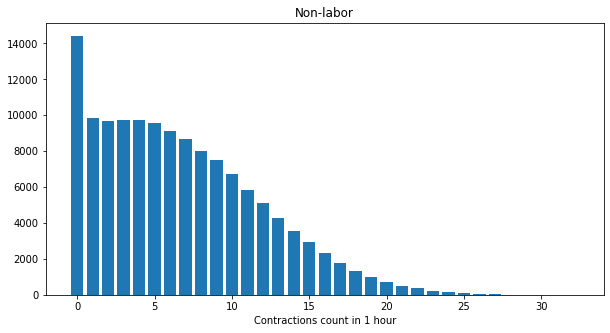

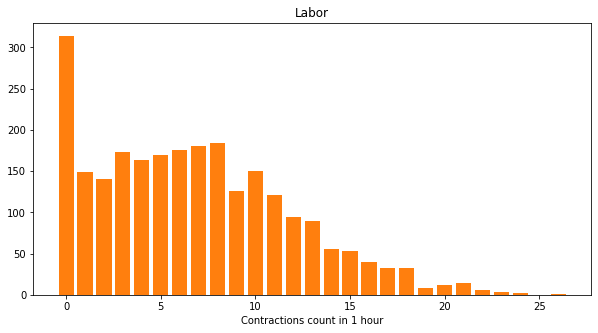

In [104]:
plt.figure(figsize=(10,5))
plt.title('Non-labor')
count_nl = cx_count[cx_count['labor'] == 0]['count']
x, count = np.unique(count_nl, return_counts=True);
plt.bar(x, count, color='C0', label='non labor')
plt.xlabel('Contractions count in 1 hour')

plt.figure(figsize=(10,5))
plt.title('Labor')
count_l =  cx_count[cx_count['labor'] == 1]['count']
x, count = np.unique(count_l, return_counts=True);
plt.bar(x, count, color='C1', label='non labor')
plt.xlabel('Contractions count in 1 hour')

#### Observation:
also with stricter labor definition, most 1 hour windows in labor recordings have no contraction 
<br>
Possible reason: 
<br>
1) noisy recording due to movement artifacts
<br>
2) session is still recording although patch was remove
<br>
-> look at number of contractions in 1 hour intervals per session individually
<br>
<br>
Two possible strategies:
<br>
1) remove all subjects from dataset that have a zero contraction segment in labor recording 
<br>
Justification: in a labor recording there must be at least one contraction in an hour, otherwise it's no labor <br>
<br>
2) remove all subjects where it's obvious that patch was removed but session still recorded

### Remove all subjects with one zero contraction 1hour interval in labor recording

In [158]:
a = cx_count[cx_count['labor']==1]
b = a[a['count']==0]['session_id']
b = set(b)

In [159]:
#session ids mit count != 0 aus b
c = cx_count[cx_count['session_id'].isin(b)]
d = c[c['count']==0]['session_id']


for sess in b:
    print(sess)
    counts = c[c['session_id']== sess]['count']
    for x in counts:
        print(x, end=' ')
    print('\n')   

-LaLOV3jGAB_N6fIauGL
0 

-LdMGYzIlR1o8U3-9h4E
8 1 0 0 0 0 2 0 0 

-LNieu2AsxYz8vzga009
1 0 0 0 0 0 0 0 0 

-LL331-LuEdkDRpPiO_o
0 0 0 0 0 0 0 0 0 

-LVz_xzk1gae5zpg9M5R
0 5 10 4 

-LSCgc9Bv9Vzt3t4agpa
0 

-LXyNUMzPJTGSRDsYdHu
0 

-LcoZnuLh8FeyU5hw25m
3 5 0 15 18 16 8 3 3 

-LaFdMPE2162xbiy7B1O
10 13 11 4 5 0 

-LcYrjzwUnPA-ATsAn3s
0 

-LHOUl83R6j2V-1G4Jql
5 0 0 0 0 0 0 0 0 

-Lax6NBxnH6WwrV0nNcI
1 0 

-LU-Imftb1vWMCO2xaIK
11 0 1 0 0 0 0 0 1 

-L_0tRUqSiamMCJBr2Vl
9 3 2 0 3 3 2 

-LcyCrAFFbVUtg22JQJt
4 0 

-LhQWCKQJrteDjGkDeYr
0 0 0 0 1 2 1 0 0 

-LY_1jvubrdvtvFr4ayN
0 12 1 2 3 4 5 8 

-LVaamHy9I0kzpS_u0n8
0 8 16 15 4 4 3 2 1 

-LZgIeDX38CLmqxS2wBm
1 0 0 3 4 1 

-LOHFhj1COSpQdZyrqSj
0 1 5 

-LbVYeNlXcaMlob98w-Y
9 2 7 10 4 0 1 0 0 

-LaHlMyplhpGG1a19B6Q
0 

-LhmPoeY7jPJWRotOgT9
5 4 2 1 0 0 0 0 

-LHaf7HUQ2VHXTyZEj7q
1 0 0 1 2 4 22 10 0 

-LePccXdhH6G0k6ZBWtg
0 1 

-LTzICGInf_UcONDxQgS
6 0 

-LM_U_3SJEp5USpVTwcA
0 0 1 4 2 6 10 10 1 

-Ld2I55hSeaOYNksEUyy
4 3 0 0 0 0 

-Lc9dl-KgZ-ikXcuikfv

In [170]:
bad_users = recordings[recordings['id'].isin(b)]['user_id']
recordings_2 = recordings[~recordings['user_id'].isin(bad_users)]
contractions_2 = contractions[~contractions['user_id'].isin(bad_users)]

In [173]:
cx_count_2 = con_count.extract(recordings_2, contractions_2, window_size)

recording  -L_04VOTv6p-cX7hxgGE
recording  -L_052m2dqL_MQg1Tc2a
recording  -L_06gcoe6UIePkk9h6J
recording  -L_06UzJsRywu9XVwLeI
recording  -L_07JNq_LPBWxqzq_LA
recording  -L_0a5j1Me4aMRLC-dE2
recording  -L_0AE4AfNTwh8K_LJds
recording  -L_0aEM2pIgFrDq4RmZd
recording  -L_0BbwbrEkywSmbKnTf
recording  -L_0CgZqUMNta6qDgCCi
recording  -L_0cNLBV7uXqU-j9GkD
recording  -L_0cUv7TJrwkkZef-I2
recording  -L_0cYxMaXfql85wSZGy
recording  -L_0-d9ayv5L1vfBRhrq
recording  -L_0dC2SF9NW1rP1JWz3
recording  -L_0dii38tOzP2ENoyKc
recording  -L_0dI_uApX7gD2EpY5q
recording  -L_0eLbe4xOt648gmPKf
recording  -L_0ftQIid88c63Cphbs
recording  -L_0gKJEPfFvkP-M6GaN
recording  -L_0gQW2Xli6y9KVexpH
recording  -L_0H17nqxujPszxuZMl
recording  -L_0HbIY1oyd7bvYfIfO
recording  -L_0hZxpZwHoYt5MUkYB
recording  -L_0I9p3KKyHgn7Kx73u
recording  -L_0_jutiXppTqZwqCMT
recording  -L_0kOlQX92fadjhLhvr
recording  -L_0l9WDCFXSNYNcVgsS
recording  -L_0LdfoPgCADieMMn_J
recording  -L_0LWOk_hlvXGLlLCXx
recording  -L_0mQ-lPk1uj8rfLrLH
recordin

recording  -La1SabLKeE40xz2PXdo
recording  -La1uj6TmPK1XsptEdE_
recording  -La1wEbzdR1BcaAt6DJ0
recording  -La1ZkWE-II9VyNtf7rP
recording  -L_a2aABKZTg0dl3apaX
recording  -La2bMJFqpFg71P3D8MM
recording  -La_2CnEHNPAmK6Dc8ur
recording  -La2D1yY0vglVLpG1HEU
recording  -La2dgLAS_LOqWfsfypc
recording  -La2GWsVg6qLMuO0bv4U
recording  -La2hrmbYf2g0lWFP8Cn
recording  -L_a2I7POCQ9OFOCQkKF
recording  -La_2ixMgkSusOKNlXhl
recording  -La2j8ftG6c6aXOes8vR
recording  -La2jQORcEOGI49LfZF-
recording  -La2nyokKvMFP6dyAY55
recording  -La2nYxhL2sdxG_Sqxnh
recording  -L_a2PNzTybo0Tg5dLeO
recording  -La2qa8WAGiiYhEZ3Lob
recording  -La2ROHWuzpzD4BJggGh
recording  -La2Sh5UOzmH3npSXPry
recording  -La2tcF9WrH--QkAymct
recording  -La2TrzU6tBbbtGjllak
recording  -La2tSuGUwCvgN1GB4Jl
recording  -La2uWrNEryJbZzrqmBj
recording  -L_a2uxJfgqHn7tkDXor
recording  -L__A2Vdxu3zWXrEx8uE
recording  -La2Vk0BbiSgSnyhnl-y
recording  -La2YwicHA4f5Yp9SKkj
recording  -La32R8oO5nE1MaNCN3O
recording  -La33DCK1U9gwUhaazrk
recordin

recording  -LabLIHxqr01jpmsPfOY
recording  -LaBNA0Ew5h77jKmnG5K
recording  -LabogP1CFRRJom7E7t2
recording  -LaBoJmrfJvyTghMQXpz
recording  -LaBoW8LyON2TIPVLUJK
recording  -Labp2njA3JmCtj78RCD
recording  -L_ABpNcLIfHtvVz56jS
recording  -LabpTEnUFky5AscuouO
recording  -LabQqAyVha3Ee84cXlH
recording  -Lab_QWjvoTFWQgG8aTe
recording  -LaBUrTMIdMiKJvA_xFO
recording  -LabutO9YofVumw_9RM9
recording  -LabuTreXqxtjMqA5lRQ
recording  -LabwGurXRQBqE8ZUf-y
recording  -Lab_xzedNkgFaNevpUP
recording  -LabYaDePBL3p41VwVpR
recording  -LabyVcDw8k2wXWWdQrq
recording  -LaBZhLrnXs3vPw8C2JT
recording  -Lac0hdyrFV9MjV_h_8t
recording  -Lac0vhTqGQxRRtDxOis
recording  -LaC2jPzYhMyV8nxf-nh
recording  -Lac3R8ESVJZCO6w7aiA
recording  -Lac-4ENeL7ArURYzA3Q
recording  -Lac51_u3oLt-sUvMXkf
recording  -LaC5LbWCkRLGlTZaVyn
recording  -Lac6k4WV470aYiJGUfN
recording  -Lac6PxczrzQbdo8kSlp
recording  -Lac7q5tBqN3xUf-MxFX
recording  -Lac93ddlKCwkiYsNDlT
recording  -LacAcFGfp_ro78E4p6h
recording  -LacaGXUFtq-oF-Ugocb
recordin

recording  -Lam6LKRbYB-VfBW9c4K
recording  -Lam6vr7166c7EP8aB9D
recording  -LaM7EMLOCK43am8SQW5
recording  -Lam7qVt8QpdS8y2RWOJ
recording  -LaM9rCiBwMKZUY9VMz3
recording  -Lam9v-tTa8nMANHBz_-
recording  -LambB0X2TiSo6AmNn-P
recording  -LamBrxt13o2b9pYBpUO
recording  -Lambw5HdacvRsVZYewl
recording  -LambzIHWXR4osnerZuU
recording  -Lamcgf8NvtN-d092skz
recording  -LamD_8LYC8W10VkOA0w
recording  -Lam-DovqGjxB6EnqYRN
recording  -L_aMeFdVUg1LM6QBZWW
recording  -LamEn8sWocATxMxwS1g
recording  -LamEU3OzXAKrdmikOth
recording  -Lamf1gGpbpHHtYwfo-2
recording  -LaMF6NlcNcXvjSVKTdy
recording  -LamfQb3Q5uEllHkihuu
recording  -LaMfSaSQcAaF5zuEIXd
recording  -LamGkf9UGLx5c48zK54
recording  -LamgU5qByAC6am7E9BE
recording  -LamHAQEJ57_7gJnsHV6
recording  -LamHkwZiONuSDXXAySQ
recording  -LamiBREVLSIqp_K21K_
recording  -LaMicZupO0Dh2ivFXMr
recording  -LamIK7bIelmrk6cuQyb
recording  -La_Mj52J0txZlZCEKND
recording  -Lamj7OgcokgPKR3shQi
recording  -LamJa6pl9eMLQY7SDG4
recording  -LamjaidtofVOwHpSWFQ
recordin

recording  -LaRgtvqzQ9Xopwpa-o8
recording  -Larhhd0pvinkn6-AukW
recording  -LarHhV_GnBTjpBNFR8P
recording  -LaRIOQr-BlumrenvtZ0
recording  -Laripqi5NZszyGjke8D
recording  -L_ArIYp-KA8HG7bS2S5
recording  -LarjqnZX_nULp7iFU1i
recording  -LarjqZ1NO7m5n1ZfOAe
recording  -LarKIhVk5iejxO3xGXM
recording  -LaRKj13lqceVFKAHJSQ
recording  -Larl0jrAhGlFyqHckBn
recording  -LarLqI9kmu1af_MjmIX
recording  -LarM7V6ZtALkMP3Elhh
recording  -LarMLhJ0SavFCi6UWwd
recording  -Larm-U416iCLH6PVQNZ
recording  -Larn3qPTnOzzgmfNi84
recording  -LaRnug4StwWV2qjszun
recording  -LarnvQMiqz4-ovvYEER
recording  -Laro0w0lJVzPAGnZmmO
recording  -Laro2jOz6A5Ss8Yj7St
recording  -Lar_oecgXqU9m9y5Tr7
recording  -LarolSgguAMNTWg3FXk
recording  -LarOnIocC5jjJFwnevv
recording  -LarPnpjBPrDk-UphW4w
recording  -LaRrB7YKhXneG1SRm2B
recording  -LaRRDc9u6RHRp8eV7AF
recording  -LaRRjBUCqZqPX6Gzonb
recording  -LaRrW-u2zeg7uQ6hAhu
recording  -LaRs1u7FRC-8gM9KHBJ
recording  -LarSQOcTfE153mWDbKH
recording  -LarSrsSbrpyUtNq-mDj
recordin

recording  -LawnUJMsSpWytzBsO2w
recording  -LaWNWDqIrvzcdQJAu_V
recording  -LawNZjozjcD7HZOkAks
recording  -Lawo9ddPfch0EaJrfpD
recording  -LawoRNbaUiL0_n6QVCw
recording  -LawosgsV8413jTqE9AQ
recording  -LawPAjsygFSC-wCOSJo
recording  -LawpH8-dAmIYf3P_CKz
recording  -LawpmB-gxd5GoVpn828
recording  -LawPnUGdksRwunoaXqU
recording  -LawpvmzBB89PILPqoxu
recording  -LawPVolKVOp9NEatTcZ
recording  -LawpXyAPEstsS10-bqo
recording  -LawPYr90EGUkcFl584b
recording  -LaWQ1LIhiWhYOHotcIv
recording  -LawQlFDdZX2CThyJYT1
recording  -LawQyUhZBUI_nCggYof
recording  -LaWrsyjqEn1S3RIworr
recording  -LaWSdO1Go5m7N1eODOf
recording  -L_AWSpta9HS_Qzk8xsi
recording  -Law_tmcauETfhcs3S0b
recording  -LawtoSwHY2JMeibPfzc
recording  -LawtTDiCPwKC6KHEsyj
recording  -LawukKNwIqmFAxvQeR4
recording  -LaWVEELI1oTgxHrFRct
recording  -LawvGRjd57wrFrQwC_R
recording  -LawvLRgajPhvVCG44VH
recording  -LaWW0lOoN4NfkeAAz7B
recording  -Lawx7WdKwTDyZr7e8Tx
recording  -LawxMmW1ebyfui0YMIR
recording  -LawYc2P1SqadR9dYjhW
recordin

recording  -Lb1Q1SvfXFSyNTnvBKw
recording  -Lb1SxNnsbY_JNJeg6aU
recording  -Lb1_TQH54B0V05HUe6X
recording  -Lb1UD1ZTs1kf65n5eJJ
recording  -Lb1WWQxW6xknbVyQxyZ
recording  -Lb1Xdrr77yHmOukPypC
recording  -Lb1xj5AWFS2_G3raYPb
recording  -Lb1XlOfiAn7bmrxsrf7
recording  -L_b_1Zr3HK7QxV6MLm0
recording  -Lb-216mL9865ninORvN
recording  -Lb21967KdmftO5HTWND
recording  -Lb24mEs8o8ymoFb4ejd
recording  -Lb25q9tZMhRar-fPcBC
recording  -Lb26WOVeShw1_ScbEjC
recording  -Lb27aTrKoAa0bAtsEXB
recording  -Lb2C6jLSDonlAP6U9v3
recording  -Lb2kUMoLrndRzSJ1FTg
recording  -Lb2LfaWZEIhU9jgGl4I
recording  -LB2pd1B6BMYSx2eVCcF
recording  -Lb2qkZCZY3fdLhSPldb
recording  -Lb2vz_CDbz0PJR5s1tx
recording  -Lb2wUluI6CrtqrxOiQ0
recording  -Lb2x8CSTiB8vT5vpVWp
recording  -Lb2x90ahXoD0M70N4wC
recording  -Lb32keYVURxa0a2eai3
recording  -Lb32t4_lSunyJTE-9ha
recording  -Lb32xT782ewp2gGirzO
recording  -Lb39yvCdN5FbQzGIkcM
recording  -L_B3dl4yVgWkpsrtb6f
recording  -Lb3EgVx_Ze3mfxJ0Bhz
recording  -LB3K15b97rsY9aEN2xN
recordin

recording  -LbaYxZbCsZUeiubkZ2H
recording  -Lbb0Km93k3Ijy0EoS3A
recording  -LbB1waOkxnPtPsTNRst
recording  -LbB23CvrzfANSPrl-rp
recording  -Lbb3xAj4FzDVwWGq6cZ
recording  -LbB5Mk4Vay009oXeek5
recording  -LbB5rovcimUotUTjV3C
recording  -LbB6Bk27v5OJD48kSJ2
recording  -Lbb6-Dy9UNfA8frbQ4F
recording  -LbB74c4xWV8iS641cRk
recording  -LbB77lAPtPtTuHm_DvH
recording  -LbBa2vMnQldTO__AvMP
recording  -LbBa_foSClyjDvnyh9m
recording  -LbBAQI_9cTCAtH2Vibh
recording  -Lbb-AU5Sj_fh3BbWjgA
recording  -LbbBOZWn_reccgdQrTd
recording  -LbBBV2Cq4xCF-QEoGWC
recording  -LbBckooqSxXTeEn-6-T
recording  -LbBCMwrSHrfU036w34d
recording  -LbBctcNjgvM2LCFMr9L
recording  -L_BbcWcpsXerM74oe8R
recording  -LbBD9Ou4WG6T-dKMQOJ
recording  -LbBdP2WRFE_xxw8fANu
recording  -LbBDt1RkNkgMdv8xHhH
recording  -LbBEFVlPyvvXrFZxSip
recording  -LbBFgRmWGYiYqL977LY
recording  -LbBG1M1Dy24c2PUsF7g
recording  -LbBGbYXmz3FE6q843Pv
recording  -L_BbGK2kVl4kN-N6Thf
recording  -LbBGoJqPEzE0uY4IzyR
recording  -LbBhJCwIbePJz9clVxo
recordin

recording  -LbG4kWJggwb6A_xthWg
recording  -Lbg5RlqgLvPb9rjLVwo
recording  -Lbg91nNr2Q7jiomXeOi
recording  -LbGat1ekzpgwt0WFu9f
recording  -LbgaZw_bdviF71GfE9o
recording  -LbGbgA6furToK399bEt
recording  -LbGbIjeWWI818zqNVYL
recording  -LbGbLodsqEC-f3_GQDf
recording  -LbGbsJE2XemfEPhPI9u
recording  -LbGbXNysoswxSB1t_hY
recording  -LbGCTi-A4xz7HGprgKt
recording  -LbGcXwWHxmoDGhTV6my
recording  -LbGdrbch8z-kTR2Q9tM
recording  -LbGdtrexLhbIyQatdpM
recording  -LbgepeQedw_tZ2cA4w7
recording  -LbGEqvVZ5jWU0oedYnd
recording  -LbGesnNDwkZQ8ndiXQ_
recording  -LbgfgnAmKKMePHvZnbY
recording  -LbGgAzNJKRkLrw_8JwA
recording  -LbGgsLQEGurXM5gNIuP
recording  -LbGgUSIPzqaUh0DOGag
recording  -LbGhPQlKHp7H5ar_vu_
recording  -LbgHQHAz9LoehvAwChN
recording  -LbGIcYOsEF3yNO_aYY9
recording  -LbGiifdZOVqTjOA2TT4
recording  -LbGJ0IaezW_RG5sjf97
recording  -LbgJgsHrywPYnQKdmc8
recording  -LbGk8UPHdzgncZJ9Xnh
recording  -LbGkc-Z4ZG0pSVImY7G
recording  -LbGkfsjs9QQwmKnkJW_
recording  -LbgKg1s90j0xgs9aoj0
recordin

recording  -LbL3AN-h5CJHlv0Wxxv
recording  -Lbl5PiJIpJO8cSczSn4
recording  -Lbl68hSr_I3PvtdG4wZ
recording  -Lbl8C_g0aVG8KS9-f-K
recording  -Lbl8NakL-6wwuwNba0A
recording  -LbLahommJICviwc87UV
recording  -LbLbOu-SgWG3inqPXRj
recording  -LblbvWZ7yqOzFOtYtZf
recording  -LbLbX8SRU7oz61Y_cOq
recording  -L_BlcQHPp-22CarrQZr
recording  -LblD024au0p9-6npi8C
recording  -LblDbp9mUWAlUGvYr5t
recording  -LbLdJ4eqCvfVb7BURzj
recording  -LbLEJ4fmf6f7xr-dSwb
recording  -LblE_mhLAciVfEIMeu3
recording  -LbLFdBB2EXHxbLXMkMm
recording  -LbLfGNAh-d_WgjrZ_KB
recording  -LblfILv6f0_1AKcgFfw
recording  -LblfTiE79sqzctxrVm2
recording  -Lbl_fvbdP0SOTwfd_LX
recording  -Lbl_FVthW-5ZC3SQo5F
recording  -LblGe5v3P-F6Xqv13Uj
recording  -LbLgLBsWsmXnlv4RIGZ
recording  -LbLhqODWmO25WuFwGK2
recording  -LbLhZMIDrv4vk0fw1VJ
recording  -LbliESQjXZ89ZlbD0mC
recording  -LbLIOTyJy1z9WBnOjiB
recording  -LbLj_4z2dop4yg0JDZ_
recording  -LbLk0HGK8EPhBXVfwbs
recording  -LbLkBdUI_Jb_MN9__ge
recording  -LblL8iqsl0-e84qq68E
recordin

recording  -Lbv6McxwblaajGxak8F
recording  -LbV6NUR5rmp_Bp6akA_
recording  -Lbv6ysS_cD84_1DqRRv
recording  -Lbv7vbC6h4uYDYJjeAG
recording  -L_bV948wDc3lCtGrM32
recording  -LbvA2NhfjtG8QKfNFTh
recording  -LbvALcHu9hfDmRHEpPP
recording  -LbVbmuhpyHIVC_w3d6s
recording  -LbvC3W_-puRbpuSZBv0
recording  -LbvcSZPdB2SDJFhC7Ng
recording  -LbvCyFIWqTGXG0dJS4h
recording  -LbvD3MeQmyDd_MGumak
recording  -LbvDfx4GuoCuPJXBJg4
recording  -LbVDq7ry2gOFAhYal2K
recording  -LbVduDNUlWoDaPwwjlC
recording  -LbvdYXSfJqbO4k3DR8l
recording  -Lbvfa1KpBNtL67qxzGI
recording  -LbVfFaEEYY7LNWh1tRs
recording  -LbvFnylcd4q0YW2mjpA
recording  -LbvFWmXCdrAHE7T1Iy2
recording  -LbvG38Pr4MzoulsKnTe
recording  -LbvGhc4tPUM8kqcxlJk
recording  -LbvGYrsbtz8-KP5bIYZ
recording  -LbVi0eczbmhLuHe2CuV
recording  -LbvIH20xie6-PR6PI1r
recording  -LbVJfl49ZCOTlTjv3Cm
recording  -LbVjGxJnv0lbkrSWV8N
recording  -LbVJ-lsodhVwotM3SUs
recording  -LbVJzHjgnEwzUMmnjue
recording  -LbVkZU_Gxcp8PFvYGZ9
recording  -LbVl7636zBo91RYSDxF
recordin

recording  -Lc0GnilTKgCxNcg9bY1
recording  -Lc0JJ3DDX_qk9-EpKQR
recording  -Lc0k8oXghvqxZgNbvwy
recording  -Lc0Qe5fXuY2iZdvJkXF
recording  -Lc-0RnaWNUMExTNKB7x
recording  -Lc-0UDHQDLom3DDGWPQ
recording  -Lc0wgnx4o3fiTirjYyk
recording  -Lc-11NSDyxD2__XPWKb
recording  -Lc12q_XG9_MEta77QYf
recording  -Lc1-6Abo3bZZ7WrYopp
recording  -Lc185KjniqhEU5KMlCq
recording  -Lc1AkuizOHQDiGpwp_3
recording  -Lc1bENWqryhIz8tk3zm
recording  -Lc1Cjnh5gNnk_2HIkgg
recording  -Lc1EJwpODU8OWlQI5Fc
recording  -Lc1GzbDYsKvyqvAu240
recording  -Lc1-NG_M_bqRI5WNldi
recording  -Lc1Pm4cwl7lt_44GOnt
recording  -Lc20GW4ha3wfup9Bofa
recording  -Lc24IK_Jlxek7TZNnpi
recording  -Lc25XZjGBB-OKk4hBqD
recording  -Lc2AXrtGuYchQViC4tL
recording  -Lc2AyrenR6pZoYJ746O
recording  -Lc2bMwNlmgEfv-rTdrt
recording  -Lc2cB_gY3AiAGa0sBYc
recording  -Lc2CkZLY-U4KXzZIA11
recording  -Lc2Ex7s_zi6fiW3ud44
recording  -Lc-2GpdrzvYYPYdEUsI
recording  -Lc2i0HBOn5jeOh9fIeX
recording  -Lc2I5jxfBhh1l49MFlH
recording  -Lc2iIRMFcnxfhUcTqgi
recordin

recording  -LcA0w3VhOPmzwZM7NHN
recording  -Lca3L_Udq8EepPKaFk_
recording  -LcA4-aszkbpXCEdZcro
recording  -L_ca4B-tc7UDu4m1Dcm
recording  -Lca4t4F5zInUDkH5OYJ
recording  -LcA7ZqVsqYihh7GSQ-a
recording  -Lca9DPP9GEx0RsS4KLl
recording  -LcaaaGFRtSLSk9TRnzH
recording  -LcAaarsXwKPZiE3TqcS
recording  -LcAD24BSmr7Xj2W2uic
recording  -LcaEqZtZl90UskCMeb2
recording  -LcafbhfoFCJqTBh_T5S
recording  -Lc-agx7gSNP0bJcFwZv
recording  -LcAjAc--rbiftTLI3Bx
recording  -LcaKzWM7tXH_sX6_BuB
recording  -LcaLvfEcGjmYfMD5wHy
recording  -LcaP1i2FoZFYTQpot3d
recording  -LcAr_BBJvSio1_VIARR
recording  -LcaSJrAphtavvp3z1ex
recording  -LcAsM3S3yBYWOPLeYQ-
recording  -LcAu6Ck2q5lP-sPDUT8
recording  -LcaV56ssmZhXPum2T6r
recording  -LcaW2U8lHmbkzDGzEjL
recording  -LcAwrzbr_oVNzHar8xz
recording  -LcawUDW9NphxM5qunpc
recording  -Lc-aYEmZqcT5FLy0Aeu
recording  -LcAYfP3OQtOe7lJg3oX
recording  -LcAYsCl7hONmCuR_23_
recording  -LcAZbrMcWRAtvJB-kBc
recording  -Lcb8wOW-sZwtGmgo3wE
recording  -LcBbpDvxLhAMqGQb5jp
recordin

recording  -LcGchw50qrpHM_QXpEF
recording  -LcGGQHqO353s5_pOKWM
recording  -Lc-GhPPgJ_-5sN6PEB3
recording  -L_Cg-K0OZ3V8JLfXaaN
recording  -LcGpWS07V9zXETbiMlp
recording  -LcG-QpTbUzmm3kGn9Gq
recording  -Lc-GRTasBBHcSEkAFh0
recording  -Lc-GS3S4ip0XyIjqxoo
recording  -LcGt8epR3cI9Pot8vkl
recording  -LcgtwJqm9kusadNm0ly
recording  -LcGUIKW9XTHSGK2E9C1
recording  -LcGVogqSYhuoZomI3ij
recording  -LcGxf74TBemincwrsgw
recording  -LcgY7YbB6CvZiXq2e9l
recording  -LcgzA10Hov12IaPRtP5
recording  -Lc-H3838ErphwgIzNyD
recording  -LcH3fcrAWwfyN2JCcgN
recording  -Lch4sbxQ_wiCYq8JAnw
recording  -LcH7fRyFFXpCEtg0l7z
recording  -Lc-hAFurRgwWtvGDjnc
recording  -LchccOl1QeUccZZaVL2
recording  -LchfNBEttNX-QI8HXg_
recording  -LcHh-dQeeMrDQSveINJ
recording  -Lchib0u-ynbczi3glBh
recording  -LcHIewOOBW0YPy9uJD1
recording  -LcHILWSEPL7BiyBAnDi
recording  -LchilxD6ILwaNf6ygr2
recording  -LchjTMksvZpFszOOqAl
recording  -L_CHKU2hRqhm2AJyUGZ
recording  -LchmAlsN8uNAlxlQ4hW
recording  -LcHnNxBd1S_AfOoIXlp
recordin

recording  -Lcnb4vbADWGlnnht1BH
recording  -LcnB8dnt2mrVQDdMMFR
recording  -LcNbFD5pFHxHTnji4tc
recording  -LcnbIRUdVVh35Cvudwp
recording  -LcnBqSx96LFLilrdrmj
recording  -LcNC9ouhHCPFyvUCvQb
recording  -LcnCtk3wBYzjfhmk7li
recording  -LcnDsE3f-T2luXJQnPI
recording  -LcnFQjbjm0dzxUWnlHW
recording  -LcNf_t21TDMTCwhPzIa
recording  -LcNF_wuBVPXfTOIvxAp
recording  -Lc-Ng4wa_zDOQ2OdXVo
recording  -LcngDqaZWJQS3F65kd7
recording  -LcNGibGRb8rlSnJArQu
recording  -LcNg_ovJHFQQlYTHkXP
recording  -LcNHESaduTR4ODAgnQC
recording  -LcnhQHPw6KcqnRHeiet
recording  -LcnHsMKl_PmSkPTCPJR
recording  -LcnhxJpZgDYUVHj2REp
recording  -LcNI2TxfD8c601v-d7n
recording  -LcnIDPhOJTT7iis5Izg
recording  -Lcnj2EXWrbBmBVN5fcG
recording  -LcnJ4bAfdhkXfAnbZ8Z
recording  -Lcn_Ja8KEspL8ENcxDU
recording  -LcnjkiHHJNMCSMXMcgP
recording  -Lcnjy2xcj5-7SpZyVWO
recording  -LcNJYhnC9E0lbUXPt5U
recording  -LcnkB-OBygknMSioY4e
recording  -LcnL3MLKKARzevSZ0Tx
recording  -LcNL6hj_JPLwgRJbqYo
recording  -LcnLc39tKB94m8O7ccX
recordin

recording  -LctAhuehYijhc2IYCOZ
recording  -LcTaIie49awb2cCnZ8l
recording  -LctaLe7MzN9EfeX5IVb
recording  -LctAlf-ySIz2z8H8zLI
recording  -LcTASYfadyyu-gJDGLR
recording  -LcTcdZdvcRoe81sKRcJ
recording  -LcTCRn1X20s80W3GBHW
recording  -LcTEJ2hS-xiXrhBE1K8
recording  -LcTeMDZrTs-IlwEJpKR
recording  -LcTe_zPacXTSa1pB54W
recording  -LcTfBB3m7fKDuEB0H9d
recording  -LctGi2wL3X6l3Kayc3S
recording  -LctGuzSgK0vW_lpRF6X
recording  -LcTgYL38pbh8B1ZcC9L
recording  -LcTiAItFFv3nXoieV6S
recording  -LcTidn9_djuShNuJZbW
recording  -LctIlrA_2GrG-EXQuVm
recording  -LcTilvzsfFbSxitAdC1
recording  -LcTJ7vafkI5zRQCo66J
recording  -LcTjrpxIkm4y0E9-Wgj
recording  -LcTJvzGSeh7V3UUPIEy
recording  -LcTk9SCkfFI_G7Kde8T
recording  -LcTkkepaxahneou48Zf
recording  -LcTLI8HIKEtk1nhLeXp
recording  -LcTL_ZUiiwFyq4SzPzl
recording  -L_cTMeAQKGSrruLkaFv
recording  -LcTnHWHHiIhf5a2vKKN
recording  -LcTNzLQATpL_cP4uyTB
recording  -LcTO4YinhVreQFy4z4I
recording  -LctOcPmwbDzrZ64Kt2A
recording  -LcTpdPcTj0wSjK-GtV0
recordin

recording  -LcZa36U86sCPMy0CsLt
recording  -LcZaI8WM4sx_wj6F1co
recording  -LcZAKzzTgG7vYbu8lkq
recording  -Lc-ZBkjBFbTKxBSmNsJ
recording  -LcZbqIIkr4O0ltEbZNW
recording  -Lczc7afnkAz2K911-Bu
recording  -LczcerU3wuDgjtV40Wj
recording  -LcZDdjsuAwQmP4MfME8
recording  -LcZDHMIoafDfSPsMew-
recording  -LcZdMXHBXJ-FYbtJDNE
recording  -LcZERbqe1r4jBiR0F2j
recording  -LcZEwbPVveR8XuO3Jhs
recording  -LcZEY7Ld8B2MBjVAO7I
recording  -Lczf49luejn52hTmpZ9
recording  -LcZFYUA8zKb3llKQdAZ
recording  -LcZGqHoADFCdoMSTjqM
recording  -LczgXkYaq0-Xx7O4bRf
recording  -LcZHs4cquAMuVzui93C
recording  -LcZIqXKj1AAaOuuKDiB
recording  -LcZ-JKAOilrqNZ3cHhA
recording  -LczKrvPF15FyL9B7C8y
recording  -LcZLIaJn8R94GnFiIdt
recording  -LczLxjjUJAnt278sAGR
recording  -LcZM2IaCKmllAE0Jv9F
recording  -LcZMJDZ5HxXKQIaUgzr
recording  -LcZN9sdt2uZc2w24QyY
recording  -LcZPGM4xMobq-R8GPKG
recording  -LcZpudET3xXXpIeO3pY
recording  -LcZQEyWjrjpQpUcQw1Q
recording  -LcZQWFMSJYdlMXMoYyt
recording  -Lc-ZsQne6NtYZqpV1Xw
recordin

recording  -LdazgWBztapT74FWBQX
recording  -LdaZmka4hIZpVqRcRki
recording  -LdazRcmECoPAmYbuWQY
recording  -LdB06p15aC2O3V8dSze
recording  -Ldb0pDWZ0vC-hwHVADT
recording  -Ldb1sr2baMjDZjRywyF
recording  -Ldb1Tweg-ZbkuWe6cJL
recording  -LdB20t7vJfFwELCNWav
recording  -Ldb3YtbcE-Lm-R6ZW3Q
recording  -Ldb4kapQyLTNmAuZivh
recording  -Ldb5gmMsp4aCTnTS0tM
recording  -Ldb6hnC4MEkAUaPggL2
recording  -Ldb7huyk8z2zlHZ-yQ5
recording  -Ldb7lJbSq9QdwKPI_S1
recording  -Ldb8_CtCi1estLWvK-B
recording  -LdbAYjntDQ0CGj1bb__
recording  -Ldbb0xy--DSBLR8_9lz
recording  -LdBCW1mWFdEQuQzGLRr
recording  -LdbDdc3kVqmx1Kqe3Xk
recording  -LdbdjdhKpBLz_XqASkK
recording  -Ldbeqoy_tLffAGYfRef
recording  -LdbfjVkB2WeYwNoSsZK
recording  -LdBHEkzLLJrQcJMr-NU
recording  -LdBHM32empaP7If1KTL
recording  -Ldb-HNIFRKqxgME3DtT
recording  -LdBIG5L_sdcQQu8rqtb
recording  -LdbimZmauBudf5msQhS
recording  -LdBiwINGCBGDexuRYB1
recording  -LdbK_8CzQkj7fuBb5L7
recording  -LdbLbOhskM3FJHVvfOW
recording  -LdbLVtWGGMBP1yRYC0d
recordin

recording  -LdgUXEVjXkXty0u-a5y
recording  -LdGV8CJZQAEKrYq0_2-
recording  -LdGvYB4R9nZHsC0MIkq
recording  -Ldg-WKioEgoUUhAKtPf
recording  -LDgwOdRszqPG_LiFjf7
recording  -LdGzERYz-wWN3QkJ0F0
recording  -LdH0nVwbc7yqLrDmCYL
recording  -LdH1W_phFCouW__U5Hk
recording  -LdH3lw8OLM737f_046j
recording  -LdH3VDpJUIz-P1koH3s
recording  -LdH_-4gKtuQPnV3GlwK
recording  -LdH52NgAk9Kzs0_od4D
recording  -LdH5yfBatWTvU6Lnr79
recording  -LdH6LdIViMr7UY7_AyE
recording  -LdH6TY3f5V58ReVNtLx
recording  -LdH7wI_uxtAW6DvMyKS
recording  -LdHAH678v7mI0-kcjc2
recording  -LdHBnbcwqHl6PuC0art
recording  -LdHBT5lgGvFU2oG-iuG
recording  -LdHBU0cYHrhHMI-Noy2
recording  -LdhbVGPYCpl9g0jl9QN
recording  -LdHC7cclEeV8x3Zu2Cq
recording  -LdHCyTnx6lfTBSynMY-
recording  -LdHd14kngCi1s9URiQA
recording  -LDhe2tD0yirpqVVirxq
recording  -LdHE5s_mKuJw5eZ_fsH
recording  -LdHEBEbUYp1ChQQ27gm
recording  -LdHeB_YejnhYMOKZ55I
recording  -LdhEEQj7FsxHWOCdXJT
recording  -LdHEnll2k-TsCemgyd9
recording  -LdHEsrsackQ5TMrbzoR
recordin

recording  -LdoFccQ8CkQNokDdZEC
recording  -LdoLLdoZD42Wxrdexrc
recording  -LdoPygQhApjROD8ahAQ
recording  -LdOQ8uUEKsxMbZPUSaa
recording  -LdoQa3pXc8si17j3b5h
recording  -LdOy6jr7EQ46udVXDym
recording  -LdOYZCEjcM2SWDULHLH
recording  -LdoZSzenOC-OyIkZb3B
recording  -LdP1JbVSQfXCRV3Pje9
recording  -Ldp2kOXAZopB6A9WdPD
recording  -Ldp2lqOdTwA9PEmrDLm
recording  -LDP4lMEsq3B1aaa4x4N
recording  -Ldp903Cc6VTgAWtVEzO
recording  -LdpAcyOGx3D5amKQ-uC
recording  -LdP_AdS1Otawtl1L-Zt
recording  -LdpawHx13FHU3O1qPxA
recording  -LdpcvNE5lE8VN865-Ve
recording  -LdpdaT5YQwqseKy80XF
recording  -LdpEAanEoZEJRJVtVAV
recording  -LdPFutGpN5xSXx4QbeJ
recording  -LdPGfwC_zw0dcVkrH7f
recording  -LdpJ0qWcmIhHDPbvGkA
recording  -LdPJ3ix2ZekGz4QjbmY
recording  -Ldpj9sQrpdljwU8EfOl
recording  -LDpKh_s9t9PJ30TTZyG
recording  -LdpqhjNIejgIJiT_Q6I
recording  -Ldprk6WKLahEfKlTewv
recording  -LdPt509k7eCp9WgsUxS
recording  -LdPuK1gcAMMVupfqf8M
recording  -LdPVc3ZEtrAxNwCmUoM
recording  -LdPve2dlbNla1iq-xbN
recordin

recording  -Ldvw4I2WdG1nFOjmpeX
recording  -LdVwFrrT5zur0XQPObo
recording  -LdvWHXAcIuG4OXNBI0z
recording  -LdvWQwWixCVjcuCOQUT
recording  -LdvWXgxq-R5zAlym2nb
recording  -LdvX8e-hAJk_1hcOB6z
recording  -Ldv_xk-BcPkifWloSme
recording  -LdvXmSIgvg0R_CpUiu6
recording  -LdvxPwXRp-9NRK-Jpx2
recording  -LdVyftp7DGyJCi2BcQh
recording  -LdvYkQH7LJAsL8S70qO
recording  -LdVZcvTeCQ5c94CnwyP
recording  -LdvZd9X3md4vxmmPfdP
recording  -Ldw08rKfD3SHcCYzgyB
recording  -Ldw4hiXU0JUN2Hek5t8
recording  -Ldw5BH9AJVOWz4jn42y
recording  -Ldw5jQIp3VwltyPDCQ0
recording  -LdW76y0rn1I4WXtyGQ6
recording  -LdW7dp2eqfYy4oJaQCG
recording  -LdW88K5ShPfHEUSm98D
recording  -LdwArOvvdlal5UFnl4U
recording  -LdWdeRjbAvtP0LNZmbA
recording  -LdwEDqo40jV3Qye7gT_
recording  -LdWF_1SBy7YV22OI1-4
recording  -LdWgBiOEb1essBSDJXy
recording  -LdwGGbplT_Bd1s3D68s
recording  -LdWgOKJiuyLRcpOY4pe
recording  -LdWHG42uHlfCwOhTBaM
recording  -LdWkbM5pN5zFmlSoldQ
recording  -LdWkyH4xoewcqLmKTJQ
recording  -LdwL2T6T05MyXeeSX-t
recordin

recording  -Le8qZvsa9_ixGqEZuKc
recording  -Le8R7hUjj1QD1t5RIpd
recording  -Le8UbiIlnUqj4lBvV7c
recording  -Le9aKDVF4CyaWPwJxTJ
recording  -Le9B-oNq5eUwBzc0pzA
recording  -Le9cJrFeBIeY1jkpeZ5
recording  -Le9dhYrNYK1C8GSA0Jf
recording  -Le9ErIzlLUgXk0IVZ_g
recording  -Le9FPmS6XT0rranyEs7
recording  -Le9fY3DR37Qfw4GSplf
recording  -Le9i0Hl4srTSReoqpPs
recording  -Le9iZ6tlKabgHQASdhT
recording  -Le9jofIydoz0u_iOimO
recording  -Le9kBt2BxnuB1zCU10X
recording  -Le9kjwvBRpaj_aFYHGa
recording  -Le9M1mQfkr5w3cJ1bwT
recording  -Le9m4V5tT4kKvoVipy4
recording  -Le9msnaKuTwQjoEl2PM
recording  -Le9nHzzUtrGsrrq95LC
recording  -Le9NreHvDgvxoyBoB5a
recording  -Le9oQ743TUYctxRCF87
recording  -L_e9ORsdYxWhctlVBDe
recording  -Le9ouKSkGKcl6LAjlYY
recording  -Le9rMxhelpF5MJ8DUjp
recording  -Le9spnL0hCM1Bvs354K
recording  -Le9tIFYldPP73TyPl6S
recording  -Le9xN7fSYZqRQWoPGHe
recording  -Le9XqG0N65wQClCxX7o
recording  -Le9yd0GfL2dhf61Ym4c
recording  -Le9yEo9eQJ98yD6ToBz
recording  -Le9zkNzhbC6eItKK57E
recordin

recording  -LeIAeuR3LzKYWUpoAud
recording  -L_eiAPP-gPBJixL-hoS
recording  -LeiaTSRxRtnJG2M9zi9
recording  -LeIb8BwUliM_YVOl7l3
recording  -Lei-fk1urghe_9HB7iL
recording  -Leigk-KGkT-Dgz1Iszx
recording  -LeIhBdCgiKc5sflb854
recording  -Le_IhNF1x2V_kRNzQ5P
recording  -LeiioRf33lhj_fi7JJI
recording  -LeIiRT7AmYn9Kd-C78S
recording  -LeikNU1VwHJHSgZFw_4
recording  -LeikvCtZbGw11ybVoBd
recording  -LeiL3qt-EWGkLeKWZw6
recording  -LeiL_CQCH56D0M4DOkz
recording  -LeiLjb4Ip_t6LaoabpQ
recording  -Leim3FxDDU4U9y0wMNc
recording  -LeimQnt4zZs0u_1CaLa
recording  -LeINr1iL8pNpPpiZJTn
recording  -LeinvEHGCrSkfg7SvBj
recording  -LeIoOXdPI72Ihtc3if2
recording  -L_eiPwwF2PQMzIS8b8h
recording  -LeiqhJqOTaDxW13Ey1X
recording  -LeIS6cdQuGlWaYYfo9q
recording  -LeitVme1LQntBr_5F-K
recording  -LeiuAPFyh9jFsRetiGy
recording  -LeI-UqGJzF-MGPoA5sf
recording  -Leiv28NAQMw8klowQF2
recording  -Le-iVqe86q51Pmj5vrX
recording  -LeivYt1fLLq_c2F6kYT
recording  -LeiwdX_KVkvCL0ORVXO
recording  -Leix1Urh3---MtjMnMK
recordin

recording  -LepawtuM_v6O-eLbMRe
recording  -LePBDT7jAmjnP8W84Ui
recording  -LePd90oD95jiu7DZfQE
recording  -LePdzmeRFyhSs31ho3z
recording  -LePeAOYZLgrcweHHPZ9
recording  -LePEuUOyDIM9IJ2qVkK
recording  -LePF9COHfjL7ZgHXt7a
recording  -LepG1V_w5p-YCtbldP0
recording  -LePgfNXPmwwwc8sgaE8
recording  -LePHv0E8AUZP02ohY7C
recording  -LepIFrjN8Ai5Uc5pnNx
recording  -LEPiIMmbR-xwwOcNfpO
recording  -LePjHIxqcvpPSLK8Lyn
recording  -LePJszcPwNWF-bUoLim
recording  -LePjUGQxPQyWH2v7csq
recording  -LepkKBr_ql1uDkMXViV
recording  -LePKQmA1viJbW-ukOYo
recording  -LePkvFLMMoirTNeQgGr
recording  -LePKzK7X5My8aWbbMlQ
recording  -LePLNEzn0xgn3Z10lky
recording  -LePlWQywb8ln1N_xWNB
recording  -LePNkZmqlAO95ZBy9mG
recording  -LePPbfe3xi20dWExnPr
recording  -LePPEmBdVLw6KYMT17J
recording  -LePrvo7fjiVQ1xw5CEj
recording  -LePs0VZX2rNJqQdCIjI
recording  -LePSNvRCt-tCwuInlnt
recording  -LePSwQMBg8r3u564_wv
recording  -LePTkKVxtiYXJbku4pw
recording  -LePtpfwNUJyByWWfC7s
recording  -LePuJnS4-v1x7360Q0W
recordin

recording  -LeWZ6LBqSlPfD7FQeL0
recording  -LeWzGcua-0_f5czgVhk
recording  -LeX_1DhKR6TYEFOTwsJ
recording  -Lex1_DmR0Ay1m51KFtu
recording  -L_ex4UoO-JejQ5uyRxR
recording  -LEX7NIfVWIgGEUD-fFs
recording  -Lexc9Tit03YQg0NpO4Q
recording  -LexeIO__HozHF-sgk9K
recording  -L_eXF32Ys4V4rBJtas3
recording  -LexH125TDwY653PaCpp
recording  -LEXJ89Dm-4oA7sS0ICN
recording  -LeXjZasZdmldU3kNdqL
recording  -LeXmOaAczLZkOZb4itY
recording  -LexoQ7gK73_Ii0nYPVc
recording  -Lexo_Qe_BFTQd8QErR5
recording  -LEXpd6acTkpAiMAwEZU
recording  -Lexq3Z0L__I0R8GWV4O
recording  -LeXqvfypRbYNufPe2IU
recording  -Lexr4VpVZH74-x2a9OH
recording  -LexUkcm30hbAXdCjH-Z
recording  -LexVlFY5O7Zuf6m_yFT
recording  -Le-x-wsy59Xc-gv0ZW_
recording  -Ley0LtbvyHtk41JUouJ
recording  -L_ey1GCGwgC9eFdeuP3
recording  -Ley347cRQSqmQWXVqVh
recording  -Ley3nCJvZOHcYPHoEj3
recording  -Ley5e5ayML2wKJcHxNe
recording  -LeY7rQvsbovVWFxYTHx
recording  -Ley8hvbDoDMdy-0ZPkW
recording  -Ley9KRW6VKlpPc_To-l
recording  -LeycefxuEr8Hvl4gBV-
recordin

recording  -Lf86uHuungo6GjyFaVs
recording  -Lf87gV1qLcaZk9ANkWR
recording  -Lf89xRitonWNpYVdl4R
recording  -Lf8cTBEpSN7xMgq11jn
recording  -Lf8CUovbfasA0DK7cNZ
recording  -Lf8DMJohCapQylJv5-K
recording  -Lf8G_BcLe7BabnLgKWs
recording  -Lf8hR9Dvnz3cOTTkUb5
recording  -Lf8I6Uw6uPwu034N1Gl
recording  -Lf8IaI23JVYV7CgLs6n
recording  -L_F_8iuzvtdAD_poAVU
recording  -Lf8NiRa1cUcVF1j0p9n
recording  -Lf8NlVmbKPU1IAPJEkd
recording  -Lf8OcwAoO4azF1d243N
recording  -Lf8OmgQfslXdY1uOYb2
recording  -Lf8UJTAwCb-QbxQtdHf
recording  -Lf909MceEAGgXR0auoA
recording  -Lf9DL3VxIbcVqpoLvm7
recording  -LF9dT6RdMySfnFher0t
recording  -L_f9KJXabMrc59Lxgsa
recording  -Lf9nwgn2W4tgijd-Hqm
recording  -LF9Q-TvehkJhVm_kW7l
recording  -Lfa1IjvvXY3tIFhV8Kj
recording  -L_fA6zDFAo7x53olGw6
recording  -LFA7XBYhUf1Pvf6p-Xs
recording  -Lfa9Y-jS9ylOhk7mFCS
recording  -LfaccGndiUr8aJGYQ_q
recording  -LfAcODpAHb_aIHPJIpD
recording  -LFAEs_4sALyO6jb4XuB
recording  -LfAHC-044P9cFNNGEMx
recording  -LfahSeRhDog2yshW3s-
recordin

recording  -LfHytMj_u4JQteCM0ys
recording  -Lfi2YYcE4h5-12o3_JZ
recording  -LfI3fUe_DGLH4Szy1xQ
recording  -LfI3ZFYoGs0A5ut3lq6
recording  -LfI63DQ8KtBTcS8xZj9
recording  -LfI7uN7nABvkp-VUJOq
recording  -LfI9N5z1y8POIxccyq0
recording  -LfI9rwySD_zHYhh92QN
recording  -LfIAFghWVhJTpacjbAs
recording  -LfIbEVOwJa0iLZJwXUb
recording  -LfibL8xPAX84xBA1XPh
recording  -LfIBRV5ckf93vJTku4f
recording  -LfICrV11x01qLSY7BlY
recording  -LfICTk-7MS1zpQQmFFJ
recording  -LfIDNb3RMQSVvkzxoiS
recording  -LfIdVoKzQSms1DIE5bS
recording  -LfIDw4OxXlHQsS9xtqJ
recording  -LfiF6T9UWZqrRWFpgHH
recording  -LfiFR0YfHd82G9yNBwb
recording  -LfIGett4HEGl7Lu5pUE
recording  -LfIHLC2-m5XQ5xfFPAv
recording  -LFIHXeu_peXD_HqkUR4
recording  -LfII8Izwgcr7BlGAs5i
recording  -LfIJFK59TFofwI34BsH
recording  -LfIJXqmCao9snKPlb-A
recording  -LfIkBrkOFZzwZ3R9oxA
recording  -LFikpPSRC1Il6oF-CN2
recording  -L_fIkUQg-9n94awlMMT
recording  -LFilkVUvGHt0JagEP86
recording  -LfiLzH1iFN03w2hQwRY
recording  -LfIMkNCYTzyavu4383a
recordin

recording  -LfpoihAaZfhbHJ-R-Rw
recording  -LFponOSn7QLXxyGB2WH
recording  -LFpOo_hKJfsY-FSn9PQ
recording  -Lfpp5mzKMGgroS8D4YD
recording  -LfppUwBxdk2cWUlmTM1
recording  -LFpQgocovT206TaVVg9
recording  -LfpqYr7Yt46brxw_Rkd
recording  -LfPW5buqWtbhKN4Lo6O
recording  -LfpXeQf9r00-cDrXfrJ
recording  -LfpXZTd1fb0Tk0aOTF7
recording  -LFPy1LgKy_mJmgq85qM
recording  -LfQ4D65tS-4jSfY8UX-
recording  -Lfq6MblRzKvI9VjVZaW
recording  -LfqAWgLEE1TUvQyYu7l
recording  -LFQCjR_wcXzk8eaFQ2N
recording  -LFQd8tsnhWZJXKZ9FMi
recording  -LfQdHt08TAGANn6JiCL
recording  -LFQgQyYECf0k8MzqkxL
recording  -LfQhkr6pFHMX8JS-uuV
recording  -LFQiVefVZtkL3ULDc80
recording  -LfQjtOddMMgc5p9c2Ag
recording  -LFqJzN11b70nVkr8SSc
recording  -LfqmM5EiQEeqVxCJXJ7
recording  -LFQN9rg_mAs4gJGxlF1
recording  -LfqOJBJRsejARmTeZ_h
recording  -LFqq0Enz3qupiJFdWuN
recording  -LfqqCi_FMGO8A9-drDm
recording  -LfQRhaw4yZQeyf92kdL
recording  -LfqrxHl5i9Xlnpooa0K
recording  -LFqtbPayTCRnQkUX3LV
recording  -LfQTYcNOZSvXL6AzNFR
recordin

recording  -L_FxGyorVXPNrEaLnkW
recording  -Lfxh1UGi1iFuPFZYTr4
recording  -LFxHeMq2tTb9c_oi14q
recording  -LfXHukVqMV560Zj8VuP
recording  -LfXiBMilfKAsQeZXBZu
recording  -LfXjAt1dKAo5blMRSYF
recording  -LfXJI4DD_R2vfkhyuyc
recording  -LfXkAi5eJfxqRLM8UYt
recording  -LfXkbWprgibV3cvBR6B
recording  -LfXleI5Hd36Yzo6vpr3
recording  -LfXMblNBoD_RI2ryTkH
recording  -LfXmeoYhLCROixpEId8
recording  -LfxmGqmyj_2Rl6DWd_x
recording  -LfXmJlOFVt7JWaJS_Nf
recording  -LfXP7vIwE8Wjf9jnYkm
recording  -LfXPeEyd8BsRNVMqKU6
recording  -LfXPF77qJFIpd0_UymV
recording  -LfXPlEce4qYTmTVSepC
recording  -LfXPOIcpJTFgGjH4YvV
recording  -Lfxrk8VwQlSgz0nXsAj
recording  -Lf-XrYrf2PxVQvF3oAh
recording  -LfxU-zpnxTVJWlsUlgy
recording  -Lfxv6Zh7bQi3U7Ss4FW
recording  -LFxVm1C-AckDMy9o21P
recording  -LfXWcROBUwrouvIeozN
recording  -LfXwDDP-vMCjyR6qWEB
recording  -LfXWdE5YAvMiCuT1TDL
recording  -LfXWwxb4R6FFhzeDLo5
recording  -LFxx5bxm-0IvlCTDxh9
recording  -LfXXA-7nl2na6QWk_hN
recording  -LfXXgAoqtJirCHYalnv
recordin

recording  -LG99qJ_jTaSIwfKBCUq
recording  -LG99wCX7qHAgSpI6l9o
recording  -LG99Wt28hfvPY2Njc4H
recording  -Lg9BNnlQVvyL1lKtPVD
recording  -Lg9DG8K_gK1TSH0_sNd
recording  -Lg9DyA8HB6_XzHgJ5gb
recording  -LG9gXjcoSS0p8nfObMx
recording  -LG9JYTEIuhPwc8Id_Of
recording  -Lg9KbrGpGhr53qKbKdo
recording  -Lg9LVHob6OflqV704Xr
recording  -Lg__9MgwYV9hI135wWi
recording  -Lg9Qd6lXaleNinuSsth
recording  -LG9SYJQ7t4kykBmDWvT
recording  -LG9-U99qeqyJWgwgMSX
recording  -Lg9wAqC_vCHuon9I8_z
recording  -Lg9xaNmbxGzS_N81Ot_
recording  -Lg9z0EIbD6h81jjXtgE
recording  -LgA2QdiQk9h0tuOpnb4
recording  -LGa4hm_zj85oIeE322l
recording  -L_Ga54yk6dqikuWVRZZ
recording  -LGa5ffhyIXRvbWPv03-
recording  -LgA5gqbbsQcs5wY4hpv
recording  -Lga6MqRLhPvlI3uZkCY
recording  -Lg_a8Zo_nxaBILmFaKt
recording  -LgAazphbMz6EaAcodFX
recording  -LgaB8LqqUDOkudyOFPv
recording  -LgAbbfhrzCEhlCvO5f4
recording  -LgAd2NMf_EsIzKd3b5b
recording  -LgAdKzCzDi3rDMFs0GM
recording  -LgaEpLI5PKumUdbZu9e
recording  -LGAHqFZ40edbRS4EMRr
recordin

recording  -LGhLX3gPt_kQS_TGiYW
recording  -LgHnjMrk3rLnn0NhYkM
recording  -LGHov9DUa0N6Mtg7MKp
recording  -LGhoX7SzTD4COPxgOQ9
recording  -LGhPQaZJKUr55t5lqMJ
recording  -LGhpWd5ozttik8ASUT4
recording  -LGHs2ElMLY-46kQmC0l
recording  -L_ghSRDEap60F6z-WhP
recording  -LgHt-AKVhK5xKR67tyl
recording  -LgHTAUpBkdL48XQZVF6
recording  -LGhvAFLG64MW00p6Pgy
recording  -LghvvFitHdM291yX3bD
recording  -LGhWEby8ScKh0VBFzDr
recording  -LGhXniOll-MyPo80WUF
recording  -LgHXR2XmZHGF5ojjXVF
recording  -LgHxUb2iUrH3ssey3n1
recording  -LGhYaMWZuy_L4tLNk2U
recording  -LGhzChdFLLJq5yTCKbX
recording  -LghzR0-Krgy0n_pD14F
recording  -L_GhZrlNVPC4F_s0yQM
recording  -LGi4VPdatZ8Y4uLXmnC
recording  -Lgi7ud9PnLT3JnHcy_J
recording  -LGICX1hZOI1yr8tDyqs
recording  -LGICyAlW9u_ge6DdqCV
recording  -LgID3jze2KvasRwdgW2
recording  -LgiDDtgeVXCBi5J8jz4
recording  -Lg-iEF1L0Ra66WUwQFO
recording  -Lg_ie-NmWtCExpUA7Zx
recording  -LGIg73WIc36zRjouM-q
recording  -LGIghV1Qfjwj3zJEeRF
recording  -LGiGRB_rfh_bBEdh4Qd
recordin

recording  -LgOWRzeXMFKh2DvRL4i
recording  -LgOwYCMUy80qNxgjLIr
recording  -LgOxZpMepJQjFShLq7Q
recording  -LGOYKPbjIcM37aCcxxc
recording  -LgoYoCrWm6vRJdZ0x9u
recording  -Lgoz6QXQ7tIH-JLdzZi
recording  -LGOZl0hdO7BKkVZcPwV
recording  -LGozX3GQk1uhpSEEzlx
recording  -LgP0dTfSnJBl3thjguc
recording  -Lgp2-XC4_afq9FmrX7S
recording  -LgP-3ZmYDY0UJjH77bu
recording  -LgP4_IQYO6Rof0XTjqB
recording  -LgP4nESm1isu-hLqlrI
recording  -Lgp-4oUfUmblKBFUi7v
recording  -Lgp5cXYsg4iz2zaGgI8
recording  -Lgp5nnAu-Z5nGiUyNus
recording  -Lgp66Vr4iVpl48HnSKU
recording  -Lgp817JFMlIHRWf4_O5
recording  -Lgp943U-MuPnbEp3ZxG
recording  -LGP97UTyK86zsknWy9i
recording  -LgPbFF2PN9FPlJ_lX6P
recording  -L__gpcP69icz9rWRIsX
recording  -LgpdFl0ZQHa9l7chxR3
recording  -LGph8YZzmUlPz7iX2m2
recording  -LgpIG6Aox_DBf7qwdM9
recording  -LgPilvr9voy_1Z73W68
recording  -LgpJvHbVIDRo6orn4Ik
recording  -Lgpkez66lMTBFkhlyW5
recording  -Lg-PkWIIjoJ4U0v3rv4
recording  -LgpLa_8Rug7oeZ0Aafd
recording  -Lgp-m_5uvdB7VMKwsr2
recordin

recording  -Lg_wP4QKxKTBzQpADxT
recording  -LgWPQFsSUn7fnh6U0P0
recording  -LGwpTVyiWH8mTVjPAM1
recording  -L_GWPVdzYBinjuV-tSs
recording  -LGwqXcxy7ocK_ZfDlhh
recording  -LGwS5Ch8bk0OUPCRBvy
recording  -LGw_uDtPusOS4NdO2OY
recording  -LGwVFeLYk3TfdfOXilZ
recording  -LgWVpkQwH7JbPhlnPiC
recording  -LgwXNznlKXur3q8T-i2
recording  -LgX3VkiP0QaSrQReCdO
recording  -LGx5daHVKqwDbIxZpLm
recording  -LGx5rBZE_HJN4KuoChR
recording  -LGx8BOt9LtQJTwsnPno
recording  -LGx8sY2EOccPRJRU9fQ
recording  -LGx94r2B3r4Rem_AhVs
recording  -LgxaHGYoZp25dXtA_Xp
recording  -LGxBLQ2CivFiGs9Eg9v
recording  -LGXeB-dKlxFtOgoyNi8
recording  -LGx-EqpYAuXz4HDFoKP
recording  -LGxey2jQt_lul3nk53k
recording  -LGXfpqTfX1Oe1Sx9oy5
recording  -LGXFR3nmtsLy4H05DGW
recording  -LgXIag4MvdRYsSWBVMw
recording  -LGXio03jFAQD6D44FhH
recording  -LGxizW5lR56bYLyU_yU
recording  -LGxKS28rFLNhcqviqbu
recording  -LgXLPocXCtjOFfxN7qM
recording  -Lg_XmhVAs0zUxkSPhb9
recording  -LgXMWho6mNkp0XSjvhz
recording  -LgxnUot6V6BLBQFK6eX
recordin

recording  -LHBLw9sn_IYL-9p9OdI
recording  -LhBnEjqgrERZD_CFCpw
recording  -LHBPi4cG_gWt425Q8Xl
recording  -LhbpTaFkRGAwX7jLS1J
recording  -LHBseZB6Yz9LXZC8oB5
recording  -LHBSf8r8d26B_hNGe1h
recording  -LHBTC1lMSBhDYFGgrpd
recording  -LHBx6QOVhja8IUGIyJ0
recording  -LHBZ2CoOWP3s_QvkDX0
recording  -LHC3BNQ6TTYRuvJD4PS
recording  -Lhc6A7ljGKZyS7cKJ1H
recording  -LHCEk7ZFXUHjQ67Qykt
recording  -LhcEmC11SEGo5q-a75o
recording  -LHCjgyAwYGZqetEmG1J
recording  -LHcju8NcGNkbQCk--DI
recording  -LhcMrFZPc7dFK85qZ_S
recording  -LhCoh1gvMRtM6GFdk80
recording  -LHc-R9CNMTs02NL93q7
recording  -LHcSBNJ6Nnm2-WcfYxu
recording  -LH_cucXNSG2uohkMwWr
recording  -LHcwkuQ3_LOhJvleKlJ
recording  -Lhc_xIwT348jiP0lz59
recording  -LHCYl3bwj2Gwmfdam4i
recording  -LHD7y-KMa9NXf_fR1Bi
recording  -Lhd9U4lTiBw7D5zpsA_
recording  -LHdA3A1XHi8gADOyAzb
recording  -LhdAyzPNsUL3_tZtw7_
recording  -LhDcNIYlVd9hhgKur9e
recording  -LHdDA3j-l9nXgcdurCC
recording  -LHdeW20S9-hiop_aONv
recording  -LHdhsakv9mmdzzP9g7h
recordin

recording  -LHMZEH4N2uKHnSYpO4T
recording  -Lhn1QI6mgoI6Xq9AMNb
recording  -LHN2wE5sePgDfcIlrl0
recording  -LHN8qN08HJ_Eaz5SGDf
recording  -LHnarbEcxZp14UBidf6
recording  -L_hNbLsVbKv6au6CFZz
recording  -LHnggFNRj44kdV7Uw58
recording  -LhNk0LgkZIPqB3HpP6l
recording  -LHnlQywBERBXgMB-vbc
recording  -LHnlzY9iiXSrSmrPuH3
recording  -LhNorREwqxR04I9herB
recording  -LhNPgY7Ku1kyWlxleIM
recording  -LhNu36bJjjo2mlRWX5t
recording  -LHNyuTJuHhHldLWWlO6
recording  -LHnYvRGrY50mle1M7a2
recording  -LhNzbgqvteB81HrybIK
recording  -Lho2PoRVD_kpXQMeGzJ
recording  -LhO33LXPo3UwfiBgvJX
recording  -LHo4UbBcAWmgucbalaI
recording  -LhO6ojyUml2fE2oCfEa
recording  -LHo_7T2preuS9vSUSVQ
recording  -LhO8G4wqwLyeaBS81GC
recording  -LhO8kh5_aVGtzQ8s_4E
recording  -LHO95Utmg4rL_ZHOKel
recording  -LhOBwdFg7lf8Y2uTZqt
recording  -LhobxYsIpq-2g9JT7iS
recording  -L_HogKmTRd4ofhDA5dY
recording  -LHoHvXb1prQM87JwAQH
recording  -LHOJQB3jgDg8__ihDx9
recording  -LhOKcIB2pNHitTY_jWX
recording  -LhOL7ZMp1-TF8-9pZQK
recordin

recording  -LI2Ov8WF5bSvyGf0E0X
recording  -LI2p2zsueBkUIiXzH3A
recording  -LI2rO6KK8sh74z83_mp
recording  -LI2wc2gwrsjftt_ibLt
recording  -LI3a-tkYMuxih9iKB-s
recording  -LI3cr7pj0fPufdG4CmI
recording  -LI3H9N6xLF5AlHazF9u
recording  -LI3HdVJu9ov767Lc9ep
recording  -LI3JlxEeYydcCTKR4e9
recording  -LI3k5n2dyo355vexD51
recording  -LI3k-KyCYkZR26DbBnq
recording  -LI3lb69J4XAeffxhAqj
recording  -LI3MiFD37EkgLh58rDo
recording  -LI3NyzfjrnpSMETok4-
recording  -LI3TAnTq0djNU9k1tA1
recording  -LI3u_lib_y8ttMeaIJ7
recording  -LI3vAVicwYuE4ZVcoZi
recording  -LI-3Wck0X5MVPtnMnVu
recording  -LI3woF5dLOpxGj4l46E
recording  -LI3yWwQ2Hpqv7h_jTJr
recording  -LI429EqfGB5079q0Jk5
recording  -LI483CaZXg3J-xMmcsT
recording  -LI4AEtXp-bIpdR5ra81
recording  -LI4djJ7hWdfVo8hQHOB
recording  -LI4hvaTnFYKe_HAM_w7
recording  -LI4JgL3ShfolJKKyFOu
recording  -LI4kwo-r_JrVVP-Rk6R
recording  -LI-4M1VNHRtM-l9NCtM
recording  -LI4-nhl5I3tOIgV1IIP
recording  -LI4NPqHWgjnJUdtIdwd
recording  -LI-4oW0h9nYYmbp1Wje
recordin

recording  -LIiBRUjBQJ-eJuofJAA
recording  -LIiBsqFUMl_HTYvLP93
recording  -LIic0VH4OrKK3-RVSTQ
recording  -LIIccSEGu_HnEkrM5GM
recording  -LIicneC2LeNdnk77zqn
recording  -LIidSbhQyZvp3SpvRBn
recording  -LIiELTw7bAV-xhJvMwm
recording  -LIif6Uv1-iEXuYRgeY_
recording  -LIIg6rspaYpNZID5r33
recording  -LIIGmZ3pu7O5M9DJxOw
recording  -LIiHdq1PvS14AqmNXOS
recording  -LIijtVxJhnVuQvaXIlr
recording  -LIikCginSdUgJuEar7_
recording  -LIiKFXPCDDZHI93NuYf
recording  -LIikUN-nohXPz_uC7jQ
recording  -LIillMgo7SrBO2YvayS
recording  -LIiLOWGhDKiFjYFq_sI
recording  -LIiNEQSIDDVK8GHn7T2
recording  -LIiO1s0Rac0EcPeUnby
recording  -LIIoEB-s-z_ynKLt7Bb
recording  -LIiQMaCe25hmRZpIxPH
recording  -LIIQwRsAzj4-sb-r-uO
recording  -LIiRS1K9zlP3YL3Sl4r
recording  -LIiSVqRWFA1hc0EpvRG
recording  -LIiVEpVyx_u10fPQ9mq
recording  -LIivPBYoV3TpvU81rxY
recording  -LIiW7gGxm7qIIdlPtts
recording  -LIiWC_A1Q8Y_GpkCgVw
recording  -LIiW-pmxOKDoZjhhMCs
recording  -LIiX4_BQXHhWOt3aO5V
recording  -LIixpD8qfDD4kqlHgqT
recordin

recording  -LItf2uMVPonU9WP9FXD
recording  -LItGOFUuEDMof5SQzI7
recording  -LITIaY7_dATuCQ35c-5
recording  -LITiPT_4_XfBpQ3P4I6
recording  -LItIZcjvVd5d4LLxT5v
recording  -LItlhx60LNyBqCJl5g3
recording  -LITmIUnZiwRlY775HXd
recording  -LITRcMq5esVHyrJm7oa
recording  -LITrQvIfIlc3RaZCbjb
recording  -LITs2XrN_0bNzMNsPGi
recording  -LItSIQAIopWtp_PgVfY
recording  -LITSydMjHyb-TacyKNa
recording  -LITteDeZsh4PwBIcvig
recording  -LItTg3Ogo94VkXCGFyJ
recording  -LITW5QsgTNJpzTtx5da
recording  -LItWPDMwLf9R_rGqFw8
recording  -LITZOeuqfj0KxLlxIve
recording  -LITzqcYObKBT5yM_hQM
recording  -LIU2YKzUCrRHHz9ONbw
recording  -LIU3SEn4bIuIxWyqKC6
recording  -LIU4Qp338bUr4T4SiRj
recording  -LIU50Cugvb_tBBIvr9c
recording  -LIU-eRuPY8cRk2XMX7Y
recording  -LIUfTD7NdU7mdysN19E
recording  -LIUGAsLoOWLrd8ckG5z
recording  -LIUiZQ61yCrMVDGmZZt
recording  -LIUI-z_wyxb1_0LE8v_
recording  -L_Iujuh7wnLEOfpcbI6
recording  -LIUncX6jH1MEXaD1PTN
recording  -LI-UnohzII85xrhUcc3
recording  -LIUo2hmuOlMTpJRwx_J
recordin

recording  -LJ5uoCYU-n40JtoV56y
recording  -LJ5WMEx-_aBNpn3yvEu
recording  -LJ5xkQ9CPReujEwUYbk
recording  -LJ5XN7_Lv2jzEW4T2YY
recording  -LJ61PAnmE3c7q5InqhH
recording  -LJ6-62fsOqBZdfBvJzT
recording  -LJ6_dbo6QiMcD7OatsD
recording  -LJ6fhBoeGa9ahiw2C69
recording  -LJ6gQ1NLjOM2iXEfILa
recording  -LJ6I5G1r8S8tyqHgIk_
recording  -LJ6JqANtJihXqOxwkWX
recording  -LJ6oBw0fXMd2QbnY_4t
recording  -LJ6QYkNgFWecnOpl4C0
recording  -LJ6sWJBTXxU3sLKGvaW
recording  -LJ6ukP-emNPPAsuh3As
recording  -LJ6-wCNS7YcAD7edl0Y
recording  -LJ6wgJdZn5YUKvqPpja
recording  -LJ6y0OrzZfHaHZH8-NA
recording  -LJ6zpBjjLSsPxa3uP_6
recording  -LJ706oMUTjOeck-QuhF
recording  -LJ71tCGthWuQmnxAgtj
recording  -LJ71ZIJjQpqPYQY7uqN
recording  -LJ72ctrfactF2zPZgO8
recording  -LJ74vFkrxF1RVO7o9Ub
recording  -LJ76Karn0bLdFITTCic
recording  -LJ777fsTXIhutrorcBn
recording  -LJ7B-g476UteZ-gNin4
recording  -L_j7d5SECfz6lCFBVLT
recording  -LJ7dXP6ZURYoLf34GVZ
recording  -LJ7E-Mm0xjurarKtk6y
recording  -LJ7ft4Lqqsv2k9XA1u-
recordin

recording  -LJHPSNUUhSZx8iqgTMA
recording  -LJHQ9VH_V84qUI-NSWH
recording  -LJHrsnp_N7yWHe-kXfp
recording  -LJHS5L9duuil6yVXm0v
recording  -LJHSpWh31BFGeazm0d-
recording  -LJHut8sJLKaEanRaiQ2
recording  -LJHvHPBeW2_GcP7eqoa
recording  -LJHVvuVNZF3leCGS-l3
recording  -LJHx27g48dTDqelq4yq
recording  -LJhx4m_Fy4bdzSSgUtU
recording  -LJHXkt25OTk4L0oZHRR
recording  -LJHZ0vTW323BoesGVxr
recording  -LJHZ-324B-sdPNW6jIn
recording  -LJHZfzKn0gio1ngQmvb
recording  -L_ji1AWI743GjlaNHFs
recording  -LJI1pXC9s_fJHEr8oV9
recording  -L_ji3GVayn5tR7Jswyr
recording  -LJI5Tb8VwLtgJmMcW1y
recording  -LJi5zNQEXCsteRzLPhQ
recording  -LJI6799P7Ua5HiAT_aA
recording  -LJI8iFyfRP83WUxoPDk
recording  -LJI9JApEmjKDOUcb9Pm
recording  -LJIByqEygWETq-1rKR5
recording  -LJiBZkH7wsaOgkXa_jJ
recording  -L_jICSzjblCpawlE0kW
recording  -LJiDqj0vUdNVi5auJdM
recording  -LJij5Hx3CHddbXAAMYH
recording  -LJIOkkS4VKL7zvJmXmv
recording  -L_jiOybo_ZnoN6gmVhL
recording  -LJIRtwADuZyNtq9g2Kr
recording  -LJiSXaQuXQHOL7aeCj0
recordin

recording  -LJqrTlyhiYBUew1h2CH
recording  -LJqTqoCvSe0iauLe46A
recording  -LJqvEU6HrhZBuzHZvkt
recording  -LJqwSOCpxahqHyQvbNh
recording  -LJqXRdSk-8a-6wgT5hC
recording  -L_jq_Y2PSBJGeH8ZK4D
recording  -LJQYLWN4sQc8O70cwVM
recording  -LJr2d1pZuaDfpx4jIJK
recording  -LJR7V89YXz2PCS2vt7v
recording  -LJRa6HAlvi79uYwT6P5
recording  -LJR_AOFcRbnDdBZwxHG
recording  -LJRcMOJ7uLdM2RBU3JB
recording  -LJRczY5uuz87GZ9CDts
recording  -LJRdc-lxXLhi6g-Dj-T
recording  -LJRDDxCe2MMMDBXYkS-
recording  -LJRDPY_AX-1aSA2tEAz
recording  -LJReCfPxp3M5qHhm4k9
recording  -LJRer6iVvg5012TC5rJ
recording  -L_jrfQn3l28Msqe1Zfw
recording  -LJRGiGXdbV__Zj-XzLc
recording  -LJRI1YCheOH7m7qsz8G
recording  -LJRI_QCF3IwRaoSdoWP
recording  -LJRjlKj17kwEIInS-VA
recording  -LJRjYX-_Gf8JxLH49-u
recording  -LJRk-BouSJW6VEZi8tv
recording  -LJRm6gLJXu99_EksY6i
recording  -LJRP0viLsn0tcv7K3UM
recording  -LJRPfLnNaiawQ1AnDC0
recording  -LJRposkFMdte1wYmAQp
recording  -LJRqIhnR6vgIDJp7yrn
recording  -LJRQVSOC2rlfK5B_R0_
recordin

recording  -LK4e-Tyx9uTVhgYgpQZ
recording  -LK4f3RTfvZIURp23vIM
recording  -LK4i_DGs7Z0MKeb6wfi
recording  -LK4iHrTC45uz2hukxQC
recording  -LK4L8b-Xj1Pglnp3sNw
recording  -LK4mBZzj8j00BADVWrn
recording  -LK4mmjiA-qD3sTKXFR5
recording  -LK4N4J3umVtqUGYViFN
recording  -LK4OkKMR6s4octMtz3R
recording  -LK4psz6lN2cU2x2Bws0
recording  -LK4Q44OiC2s6G0maS_K
recording  -LK4qwsexcN7EnmThQVV
recording  -LK4RoAkNH0Sql3ywPLi
recording  -LK4sCLYes68XPCWZZvx
recording  -LK4uYKmtcWC5ssrSnpC
recording  -LK4W_DQr6nNFLytfug9
recording  -LK4ztY_eDipeNXbnHSV
recording  -LK4zV0hcOovmRsp5QxV
recording  -LK5aq_HZeHRB6qNqTIh
recording  -LK5AsARTo0_Uf1jfEbn
recording  -LK5b5OTxb1IfbiaKIWI
recording  -LK5BLQgaQCC-b-HNXxU
recording  -LK5BnSW0No-ZLEOffDx
recording  -LK5C_De43xRKPRa0HJW
recording  -LK5D13R25WwjcRkaLme
recording  -LK5eEzSGHMvXchTjxqu
recording  -LK5Eh0uppU_naIYbuoT
recording  -LK5Fttufjr7jFgynLSH
recording  -LK5NsdrfnZvsReL9mB7
recording  -LK5QDy3uk2zPj-jBCG6
recording  -LK5sPnQIadBvCdgMa2B
recordin

recording  -LKHPiy6WlEJ7JKPE4f4
recording  -LKhqgy9zfESeTDCkRgB
recording  -LKhqICUNqzoJJNTJaAl
recording  -LKhTGnBP7pR-iHpo_fe
recording  -LKHtKK9KMkHmxP5JUo8
recording  -LKhvOwicWTAEqBAtIgk
recording  -LKhX3QQYaRQamgPVSWg
recording  -LKHxqpHqkPC9WswhrfK
recording  -L_kHYbR6Xh1Q4fiHfQH
recording  -LKhYeRtQ3cjaynZOY3I
recording  -LKI_06IL5FciAROOEe5
recording  -LKI3VTNee0G9U-py5wV
recording  -LKi68Nhhlv67oVukaZa
recording  -LKi8uqxP7I-uUU3SKGU
recording  -LKiAbU9ZdA5u8se4uAP
recording  -LKi-acoYFemtmyxHTdd
recording  -LKic6dqRSlCGil_6N5G
recording  -LK-ICfjrBNb10aMBtKB
recording  -LKIcwj3h_uC1T3Wu_d7
recording  -LKIdcb_8-WVAu8RJWUf
recording  -LKiDCr3tu_bALd486OH
recording  -LKidfSp2Xm4PoBU-Eqn
recording  -LKiFCeHCyVpxZx_FKo1
recording  -LKifm5qXm-ctw3R9zUj
recording  -LKIFrRPQqorf4Go2-fC
recording  -LKigkZIDrDzDx3VRL3h
recording  -LKijFGy03sOUisgIoqv
recording  -LKIjwIZaZJ9TRRsaYHM
recording  -LKIkN3dOUAIu5_87ez7
recording  -LKipk35fgUmyKOffRz-
recording  -LKIsARRtrKIrEUJYT_S
recordin

recording  -LKrMu25tL-cbFq3fjz7
recording  -LKrOL1doY4xu6f0SjiZ
recording  -LKRt4xcurtw3XIu9y4n
recording  -LKru8szT-u0INJcYZAw
recording  -LKs0QFKLecIfCe3mdHN
recording  -LKS27xGMC_IfPAxde47
recording  -L_KS9J9FiJcmZJF7SQu
recording  -LKsbVKtsWUm_ywa1RLI
recording  -L_KscAMbXWoA0E8qUxA
recording  -LKs-D0n7ZRfMmN8A_VF
recording  -LKSDmEbt2k4CRx3CiPS
recording  -LKSdY53gaYxfVXGMH71
recording  -LKsFFDS-jDJn3ofaJaF
recording  -L_KS-FL7IDl2H31WJjT
recording  -LKSG0jK80CFfQDPjmmK
recording  -LKSJnMYKIGwoLS6Zh5B
recording  -LKsjSC9i1RWfkwOwx9M
recording  -LKSJvFNdSLusAPAraqm
recording  -LKskRoUaknkS_jxSwxX
recording  -LKSm0iNNXoVf78Li_Jw
recording  -LKSm8F5V-p5VFsIR9xl
recording  -LKsO03n-gBi6a0i9BOl
recording  -LKSQL5w01n4GPxMMILF
recording  -L_KsQPdroOAicJFHXLb
recording  -LKsuDVrn0oMFG0s7x83
recording  -LKSV6_X0HwErmzAZsQT
recording  -LKSWTJ3rpvDLiW2FSlC
recording  -LKSxFmvlDGu3owhxBiX
recording  -LKSxiD1eW_MBWVVYsTc
recording  -LKsxidQBt_zX50CjO5C
recording  -LKsxtrMdfqYGHf0pgqu
recordin

recording  -LL3qk1o0TQFMIAM2Vqo
recording  -LL47y5AtwDw1nWzOPx4
recording  -L_L4aiT2CSh1ZqScb3y
recording  -LL4FREuK4xcvXbqo5OA
recording  -LL4lNGJ_u7DwSJH8Dkn
recording  -LL4racwY1ZBH6vlZJWZ
recording  -LL4tVx7Uqkwa1kuEBQM
recording  -LL4YoLMXR-V0m4d_EA3
recording  -L_L4Yt2DS3sK5EUB9FP
recording  -LL52l2p3n5KbhmnHXh2
recording  -LL5cD-l6YGxTATI2xZS
recording  -LL5d4QmtXQi07fsAyzV
recording  -LL5jEyJ1DyNUNlY8e_C
recording  -LL5owJxHUwlP_lbdnSu
recording  -LL5s0T_ZbY_x1uXQDir
recording  -LL5uax1kVqf74r9sO5j
recording  -LL66lyDSdzWyy9rpnaE
recording  -LL66vcsDD-5jP6-28b3
recording  -LL68D8t9FS2SrZh_TII
recording  -LL6-A3StUd7b_46Z8fn
recording  -LL6b3b2t9IuziDnQKHZ
recording  -LL6iyUHex8cJpSbEXSc
recording  -LL6mwTbYxHootyRXwgp
recording  -LL6PFKs5qfHWnAennsw
recording  -LL6tdw_O70pXOsh6KWL
recording  -LL6z0hDd24BbF5Jz55r
recording  -LL79heU45Q5mjfc-fgP
recording  -LL7a41yzoxzij2BZRGF
recording  -LL7cn9mfIpYoN8abB2c
recording  -LL7E2AFa-glv0WybrSl
recording  -LL7fACpv1pYfpPUrvD4
recordin

recording  -LLhOU1JwsR4VdUaocB_
recording  -LLHpCG68fksdUxZi2Wq
recording  -LLhpzSPBnJ481UwZadH
recording  -LLHsfX2WLxAcUtQzO6c
recording  -LLHsOr-UCi7t6qzc0xU
recording  -LLHTftnPHd83AEXcQeG
recording  -LLhtSa2Iswg7Oe1r9dT
recording  -LLHuM1q6dCG-59EHUkF
recording  -LLHvH9UPOiIpSun6mrD
recording  -LLHVZcLls3ZAH70AVGx
recording  -LLhX7m-APrWFfvi6Rr0
recording  -LLHZu43MLSugxiyetMV
recording  -LLI0DK7_0Ds-u5D0lE2
recording  -LLI_0nq-pGr5wahdMq-
recording  -LLI2dgmiZtxVFTI4Yqx
recording  -LLI7FnKMb76C3eF5WBT
recording  -LLI97-xui37hN_IDA9O
recording  -LLI9jOKt8YhRtdihb5g
recording  -LLI9nt6WKZ77ZRmkt2g
recording  -LLIA5ZuhIEwiVpBrurJ
recording  -LLI-Bsn6UB5BkO0jTOf
recording  -LLIc0WTu9WR6Crawq3Q
recording  -LLiCAkOVmrnJokZyCPd
recording  -LLIcZZKrnyNYaGUJ3pD
recording  -LLIDcvsfnhseB_4mZgC
recording  -LLi_eBQkA9vAfABms1Z
recording  -L_LIfOb2h4PAnrKhpoG
recording  -LLIGqWtQtZzD0snh8Ad
recording  -LLigWTpYzDhCA5prJAC
recording  -LLIh0HI9Oz82HTJNkGY
recording  -LLIHE0k8CWuvr3ACayj
recordin

recording  -LLREvCTHhRQ2lpRM-fj
recording  -LLrf1hErnrol7whvbI3
recording  -LLrFD94_oJcGAs5zf_L
recording  -LLrFRMAeq1SaFOuBWpw
recording  -LLrFytpIQuefU-GgIGb
recording  -LLrITVL4CPsbbQtJrDg
recording  -LLrLc5j_pjmB6DrVFCG
recording  -L_LRL_OI2QRFnM8IRxg
recording  -LLRMjzpeNP3gROcGjww
recording  -LLrmQ4--mn9T3bzSesL
recording  -LLROe9D32myUwPl-8HP
recording  -L_LROLlzvnz9GEIidgb
recording  -LLRsE78699spTiYhRCU
recording  -LLRSxq7UzQR1pl1XxC6
recording  -LLRtrvdwXJwtwwS4uRh
recording  -LLrtvQHT0qsvVTeoYHj
recording  -LLrUET8jfwRluuBofRq
recording  -LLrVj_YbaBm6N1yOFCM
recording  -LLrW4sROWbiZ4DcM9Va
recording  -LLrWz7o7zFsKdVSIdXJ
recording  -LLrZAPoQbY6dYS0xvwE
recording  -LLRZBv-gNUvB0yBnWs-
recording  -LLrZcDyBuCEEmMLTWr_
recording  -LLRzWZXIgcIgQoqXXko
recording  -LLs0uJOTL-7JvmM-BF5
recording  -LLS3cZjm63RC3eJl569
recording  -LLS_3Qw4OmHaF-nGH7Q
recording  -LLS3xW2S-cZBuMltjLK
recording  -LLSA3_EShOorP5uyxj4
recording  -LLSbMawauDC7wYGlDIR
recording  -LLsbs2H450fOWgi6eZj
recordin

recording  -LM4T_eDGaNfZEpEGzEC
recording  -LM4YEtkiX10gnVwLRul
recording  -LM523O2c4bBzdPrOFHl
recording  -LM59TXWDZpJReL_8Ykl
recording  -LM59x6tWM8eewXyK5Ss
recording  -LM5AS74oz6fGDj30m77
recording  -LM5DZ0d1PH7uaPq8hjI
recording  -LM5gCzOeMAsTwu4jcUj
recording  -LM5hVQdSo0XJDT03p_i
recording  -LM5Iv17Lt1S1kqtTqYe
recording  -LM-5JG8dUy1gXARsSHd
recording  -LM5J-Qgt4j0BLwP84A6
recording  -LM5kNQ1IBZJAn-KzFC8
recording  -LM5m33FSdYXmiv1ln_n
recording  -LM5mwiGvN9AMbpQYglf
recording  -LM5NeZSXwzmcqyvkc5O
recording  -LM5NJBNt2mp9HQncT1n
recording  -LM5nNm_2h_p6u_hjOpJ
recording  -LM5Oq2lixQJdCtA1H8h
recording  -LM5QBsFRez_DAhtykad
recording  -LM5qhTDpEQDeF8hUNgW
recording  -LM5SAkAzPjOKG5YhRdO
recording  -LM5VPUCB5bAwTfR23lp
recording  -LM5YAbYaVyXcSjwhGpE
recording  -LM5yQ2KxsFiSJDU031H
recording  -LM5ZFXxnV7I7SPWPCpJ
recording  -LM5zHqyP9c-3okvZ7nG
recording  -LM_5zMd0w2P8FgmPBv1
recording  -LM63-00UcOh0gNOTulB
recording  -LM6E91hB1WAQXp6UDKR
recording  -L_m6FVMqwpNDvBLooS6
recordin

recording  -LMI_MQU7iBDkPn_Vy4G
recording  -LMinMxYxhO0iL_TB9hx
recording  -LMipaczn9Bdw0JDO5Aa
recording  -LMiQQLK3d_aI6zxENcA
recording  -LMisMzOxwi_OqAl5t1G
recording  -LMisOyd5iWZQ3tCMvRQ
recording  -LM_iTB3zVx1B_bAhcMu
recording  -LMIUGc9mQEIdWp0QiEo
recording  -LMIVtWwZuzBakHsqPzm
recording  -LMiwAY92vNhsazQPYwJ
recording  -LMiwqFbtRNzMWAsP7R-
recording  -LM_iWWDg2c5K2KsOO2W
recording  -LMIYQ7fqSsJTEo1pfXm
recording  -LMIZU9xgq7Du2vRx9Ep
recording  -LMJ0r7PKYKeR6U9cz4B
recording  -LMj54b20yYgbRaheovG
recording  -LMj781I0xLq1eHDbgQw
recording  -LMjA7g7M-yFvyeEmk9v
recording  -LMJAurKg8H08Fblzyvm
recording  -LMjb1bV2MoDjqcQtYLS
recording  -LMjBaP0cRCWIolwpmPU
recording  -LMjbNi_CLKEb_Yg_siY
recording  -LMJBqpCN0SsXkXpXY3q
recording  -LMj-cZiqzCZftEGVFVG
recording  -LMjdFgGOZm1yVsYoAXh
recording  -LM_JeYopxyzPpDr1hhB
recording  -LMjGsURgC1q6l0fB8Lh
recording  -LMjGuWGZfgYcoym0qtH
recording  -LMjHkAxt_BFqNF7j050
recording  -LMjIxSC_bKNNQpoVzfM
recording  -LMjjfONk9VTSBTzCZSf
recordin

recording  -LMsN6L3ptco_yZYN7Gp
recording  -LMSQELLA_TcoLEt2cz6
recording  -LMst1-Q6wqOj1ezlw2a
recording  -LMSV544dNYWjqARySuk
recording  -LMswomzjK65yuP8-4QL
recording  -LMSZydpDQ7_oc0Pywq0
recording  -LMT430zUgMt9lO6X5qe
recording  -LMt4bQmbWmXh3feD1za
recording  -LMt7HndTaSKDQUcJ1Zc
recording  -LMt7IVsOO8-sYKs3UgE
recording  -LMTboyjz8ea82KVWajH
recording  -LMtbySBwfOAAd7jcziG
recording  -LMTcR7nJDMmQmM9od_T
recording  -LMtD9pcA5V04duTCrWq
recording  -LMTdCiVKq6_ntymRh8r
recording  -LMTHlnHJCE_WQDrmEIK
recording  -LMti5kU7DOjuSnYIOnk
recording  -LMtiSDXEA-QtiowkK2w
recording  -LMt_J9QKP0-gBQ2UgWM
recording  -LMtnk-4PbUCn7pneshw
recording  -LMtQgJn8VtuJwuQunuy
recording  -LMtqkqkQFy4dIAlaSNG
recording  -LMtSk_EzTakDvWYUdIu
recording  -LMtsl8w6r1lJNsfF5Fo
recording  -LMTsRF_eW9a4zfHV0Si
recording  -LMtubX00xw2XRSpZSfF
recording  -LMTuE9uVPoV2IXvnw7J
recording  -LMTU__TMGYWFnZC242f
recording  -LMtVfGwtK7uB7oKpR1H
recording  -LMTvMuMdFmuukr-FJu5
recording  -LMtw_N2fAlGAcmFdTcw
recordin

recording  -LN5TTnUM7glFEFln11U
recording  -LN5Vo7kNqsoixw6BaSM
recording  -LN64FuG1DRGUsoUhDwn
recording  -LN66ADUcm7My9nctAhA
recording  -LN69IIny5EO6ZrV-UfP
recording  -LN6bCdtyQG3q1U3E3Re
recording  -LN6fKN492LyePfF-vZH
recording  -LN6fxXIyYZpsFY26arY
recording  -LN6HbqbL5JGUDgltKYO
recording  -LN6LjkQj5IE0433GBHo
recording  -LN6lQzczovX9XZN9FNu
recording  -LN6nmsG_7_GUBpnQtsm
recording  -LN6SCRWckLIDyoM_3LG
recording  -LN6u2wivlT7C2jawmDE
recording  -LN6uv-T-J0eHX4wZyuH
recording  -LN-6VtRs1uK0PCwvgR1
recording  -LN6wZr7uw8tJL0BzRcP
recording  -LN6xS9q4ACVw7s2SuoC
recording  -LN77Je5_8evlHZJ2104
recording  -LN7d_RadNPEt8gIv4Cy
recording  -LN7DxZYLDLywoW7FcAO
recording  -LN7f6If9IeaH5ykQ2z3
recording  -LN7ITaMkh-byEC3sYQs
recording  -LN7nDELrnpO4yffsV-Y
recording  -LN7Ok5dnaxTHVifHWnB
recording  -LN7QwjHbH-22UZd32BB
recording  -LN7QWXdh3cZWgMcWJ4A
recording  -LN7sBKAN4UEMDzwli9N
recording  -LN7XLhneERt_QMtDnhd
recording  -LN87h7bVkUMpuGwYoSp
recording  -LN8auURXNV2TXxyfBug
recordin

recording  -LNmez6Udlnv5a1p1YI6
recording  -LNmIe8bDty0LIQh8xXh
recording  -LNMKQ4ScBZHVuCY3W6L
recording  -LNmlnV4FMsxzGmjkQEJ
recording  -LNMLsDiKLofzUxN8_47
recording  -LNmMbSDjxKCffJRbBjv
recording  -LNmMGZtP_W7t65_XTky
recording  -LNmoCONO0micG_Wcuap
recording  -LNmRf8Mjl6lAsIYEIuJ
recording  -LNmSi2kD6yS4Pi9Mget
recording  -LNmSJqG0ELD8-d84Unt
recording  -LNmTVytUWYU52Wtu4uI
recording  -LNmwFZArnnm8ED3KkEb
recording  -LNmWgSA_5MbgkZWydsq
recording  -LNMY6NEnvYpH2oOJe4W
recording  -LNmYd7WhvkkoN0s0wYs
recording  -LNN6N9iISuJv53VqXZu
recording  -LNnavsRDBIaEhgr5WUg
recording  -LNNdxvW0vTFq3cTxdYU
recording  -LNNE8TBiXfR6yQ-13P7
recording  -LNnEENJFzYgHPrMDDzK
recording  -LNNG6GAWnoAu9i5WLdK
recording  -LNNgv6-_pPOpeag4EMk
recording  -LNnirXj6bXClKjkOf7A
recording  -LNNkoEU2E88pZivu2Wy
recording  -LNNkT-FiAJ1h-TESINY
recording  -LNNlDfQFnGAvoqxmdo8
recording  -LNNl-IrRHXKhkW1KlLF
recording  -LNnmKFGHpmtZA-sbyn7
recording  -LNnRXv66yAiD1DhWb8q
recording  -LNNryVoFxgWO5SmT8Xc
recordin

recording  -LO5bRpXrHnA5J31jHpq
recording  -LO5C6noYzjygkX35cod
recording  -LO5cE_EaawxGEVUit5I
recording  -LO5LkabtUDi4pdg_24V
recording  -LO5mPCSM7u3vCthgZ9i
recording  -LO5OXNDqM5YQG3ZJqG-
recording  -LO64m-GWcvrkqhOG5xX
recording  -LO66PuBycbTJsoub5YV
recording  -LO6eoJGxT0hhLeHQaL2
recording  -LO6FYQb3KeRBqddPC3o
recording  -LO6GoJz1xCm4LTKANH4
recording  -LO6HcpoyLw8454xzh3C
recording  -LO6IELHbBRpsSY3Amqe
recording  -LO6lVUWdnvDvNdfCniC
recording  -LO6Nlh8nqMe6wQqQlv-
recording  -LO6oMgCe1SzHkJAEAYK
recording  -LO6S_CMNjV9Y5IyMKqy
recording  -LO6SwzV6fYUAppK78jJ
recording  -LO6yice9EANnWV3l_AD
recording  -LO7Dd3yqyM9ftt_cdeF
recording  -LO7DFjBbf1m6dKYHN6z
recording  -LO7OcFhWarxb9uaUt31
recording  -LO7oP0JWp0S6zMJpktG
recording  -LO7pIiUT19fxpyRU5PT
recording  -LO7RaJ1KUTPexJxINBX
recording  -LO7uPCPRoMSYwTpOHvQ
recording  -LO8Jzt4udVw1tYllohw
recording  -LO8MnYEHBLt2LZboPFg
recording  -LO92lnH18PBqsI9tNS5
recording  -LO9id3ZgpVwXGkTiTaw
recording  -LO-9iYzbmpqHygR0uYk
recordin

recording  -LOOoQBtNuF2VY95Z4XI
recording  -LOo-ORyVB8405_msNRd
recording  -LOOqihP4iuhALRVpilx
recording  -LOOQWMCiEZ2ULAXNCbh
recording  -LOOTQPXBT7G6OV4ftXt
recording  -LOOVaC5G5Yuw4JFkYqa
recording  -LOpesU_qmMbt_7Y9jE0
recording  -LOpg5uisx9xFKm9RPBu
recording  -LOphuQvp3gHZR7EKZqH
recording  -LOpieVd0kDXkiK50RJG
recording  -LOpIwqd_7ivY35sYxAf
recording  -LOpj7JYLKzrdLHstRcI
recording  -LOpMvWcZ4Rz12y9Wxl7
recording  -LOPmzR8GbZLYRnub53s
recording  -LOpNyYpSvqaiOyr77Qs
recording  -LOpo1ADmGZlbg_8GneM
recording  -LOpSjMWt8Z1Ibzw5XVM
recording  -L_oPTBtTG_c8FSxXgUi
recording  -LOpuj_ee2s9YQXs3LlQ
recording  -LOpwL4Xkuu4Nxjmnt1G
recording  -LOpY4Z85DdRkVTA-gHh
recording  -LOpzrF_7xuLT-b8CJh_
recording  -LOq5ww-z3aLZsPa5Wlp
recording  -LO_q_9CmRCeB-Q5-qRj
recording  -LOQaNgMge8SxpuW3QED
recording  -LOQbrDEqn8jQqLmJNFp
recording  -LOqCk3n8NHoQE0-wQmY
recording  -LOQcn6hRfGKnagZXtim
recording  -LOqdawY9oD-6yOvnd-n
recording  -LOQemU4aKrhoTML3948
recording  -LOQet5Va5Pt60GSwTDG
recordin

recording  -LP4XVyu-HxAUV--R92R
recording  -LP57sVwdDgpFJ3lnDng
recording  -L_P5MZXEX8VYXtDWd-c
recording  -LP5ot0u7LOjh-lVtw70
recording  -LP5xavIWJuvXjlHsu2f
recording  -LP6cuAlucyjmqdNDn5s
recording  -LP-6DozXa1XwlnpVgJl
recording  -LP6D_sZEWEaOtHTiB2G
recording  -LP6F1BSw_XAAwtKah7s
recording  -LP6L6ORuYY0yPVxUKzt
recording  -L_P6nvVlIQ7cs0Gd60Z
recording  -LP6SfgwKCF1xfd1Gl9c
recording  -LP6vpk4sajvHYfXNMtb
recording  -LP6YqdY_uw7HxHRlyWg
recording  -LP7Bg2ASsCnZympNv6E
recording  -LP7fKeV6srdxyFFF9vd
recording  -LP7_i8qgaIrg5Yf_iZ8
recording  -L_p7m9EloGftgcklOhA
recording  -LP7xLhuwaWemFrIkDLe
recording  -LP7ZMGjjPRNdVOqtoqx
recording  -LP83R_cZteQWg_2taqi
recording  -LP8e2jQvfpD6LlPTkRR
recording  -LP8eenikcy0N32p2pMv
recording  -LP8f1sWaDoNvJvyQVvD
recording  -LP8ipqOQELNFwfk1am-
recording  -LP8KGVjL6MTX7NfcuCi
recording  -LP8KOwry8hVUv2gVeOd
recording  -LP8KQz-CkbS33aNNS1z
recording  -LP8lP0ZATkgDkEtoY3Z
recording  -LP8pLuw0th_C90jADS0
recording  -LP8TNLO98-ZQdGgAr7J
recordin

recording  -LPIpqxNlRQbhVP48byX
recording  -LPirBgjbjppHMqGR8Qi
recording  -LPiSkU-lovedNx17A4Q
recording  -LPIsVz7ne-LM6vHMJo-
recording  -LPiTGiTVnz-d6HP0g0F
recording  -LPiuGFQnk8ZxN7M5hog
recording  -LPI_vHTiYA0Ac-FQhQZ
recording  -LPIWrLvVnUrOYS_WJUP
recording  -LPiXURdoYuXZcTmx37R
recording  -LPJ5spt-cXtPBGd2ci3
recording  -LPJ5zoIKnZoRHphas70
recording  -L_pJ6NKKcrVoTz6_Vnh
recording  -LPJAFDFTzF0kOogvGU3
recording  -LPJAiVnf1Vx7jaAJK4A
recording  -LPJBN8-yk1foqT22JN4
recording  -LP-JcO8UXR7cHv7pBoE
recording  -LPJdhgfmyJxWOlpp4yx
recording  -LPJDXNft1Lhc7wJVSK4
recording  -LPJ_EtaAlY7b2xS9_ji
recording  -L_PjGoZZl-rMVPvidLg
recording  -LPJgPKu5soX4NR0liJP
recording  -LPJhmjt34z4HRtmesoT
recording  -LPJjUrb-1-lTurZ-m7m
recording  -LPJkHhX2djZhYwdPPcS
recording  -LPJl044g1UV8hi_z-C6
recording  -LPJlVHMO9QPzl3S7nly
recording  -LPJmdzNGQqlEjurNNKX
recording  -LPJnWm-RtUBA84zlANJ
recording  -LPJO-h1cwvWuDKldEZx
recording  -LPjoT-73CADHi-UMJUy
recording  -LPJQjZhnDGS8GrCP5kn
recordin

recording  -LPTrNKZQzMDFdtF-bU3
recording  -LPTRZX9fqoCRt33ENB_
recording  -LPTshAQdW75ASipVIEG
recording  -LPTu3GRymsGg1aPGl_S
recording  -L_pTuMrWnyMGa3L0AQu
recording  -LPTUOlAc2_jbXGgJ1Qd
recording  -LPtvc6RA4LLnPa_0ce_
recording  -LPtvY1SXxIcvcyVssGH
recording  -LPTw94xe2NXJJ59lzUV
recording  -LPTwi4jMMbgxaQr_hLS
recording  -LPTwVhRAAZjFJ6qqbkY
recording  -LPTwxxnWnKLOEYLkbrK
recording  -LPTy2cMCDbih82ZKaT1
recording  -LPtYZQEGT8Dwam5Bw_a
recording  -LPU2rz441gfagfA5cm4
recording  -LPU4SHIQn80AD7Fge6A
recording  -L_Pu8Fm3De2ll_v9Zfl
recording  -LPU8zamk6Cne_Pc8d0w
recording  -L_pu9gqDZQvjxEalyQz
recording  -LPUaLcYERC9z13pJRLV
recording  -LPub8CpnVCosazhr0qm
recording  -LPUdVdiDaS4Y6OjcHmm
recording  -LPUEJ2kGa2Dzr18JGZg
recording  -LPuf0PEDmPqBARLvq0K
recording  -LPufS7j7K5CMux7buJj
recording  -LPuHrPyt-sQOH8yvKNW
recording  -LPUHTinPyG0_p0Lt-Tj
recording  -LPuiTzVvLDGFnAvV3XC
recording  -LPUKJcCa6RC3Hu_90jx
recording  -L_pUKl2UteimVb2hRIy
recording  -LPUMXuIOb-hXTjMe2Cb
recordin

recording  -L_QadjKzjqqukp2yygk
recording  -LQaeXudK0Y_8dUe5DMk
recording  -LQafey773isOSmyNjoF
recording  -LQA--fHDrSczvj_NbXN
recording  -LQaIyBe-yKVZxCd0o6N
recording  -LQaKUnXrGPkgLHZwG53
recording  -LQAl-xfWDUQJCX4fTJS
recording  -LQamg6N70ISPquMp4c3
recording  -L_Qapv7Q5FUB3iFpHue
recording  -LQaskqC0N3a-kUf9tDy
recording  -LQAsXL06tBvWtrpFIUV
recording  -LQASXlehBLmR8cZxgcN
recording  -LQat79dGjyiwLECNGOj
recording  -LQAUDNeSAAYBSSSVflx
recording  -LQAxkh_O_xurd3q1Vmg
recording  -LQayqaq8VT6Y9Cyv3Dx
recording  -LQayZZm_fJE60MzYuoe
recording  -LQaz5SrXvXg_y2WWWms
recording  -L_QAZL_C4ppwztUay4k
recording  -LQb1nBW3Wy_ZBj8EcIg
recording  -LQb2rJhFWTgPqiUsQBZ
recording  -LQb37SLa0QSDo2O-iT5
recording  -LQb3Js3HlHmuj8vJNTk
recording  -LQb8KQvIyVSwm36b9mQ
recording  -LQBaJgNPqpYblNniUBt
recording  -LQBBfqMJbZ8McywvHqu
recording  -LQbDzdLzg-ySb-8PsM_
recording  -LQBFA6sKaO8Rbwwd7-8
recording  -LQBfkyCdHeAln8fjNWZ
recording  -LQBfqDiOnCNlDdjXhRi
recording  -LQBfVsNqMeRfU9I0Ruv
recordin

recording  -L_QMBfyeETACy0kHN9g
recording  -LQMFVWHqx-PAGPXXB0O
recording  -LQmF_ZShu6S6i3kuTJH
recording  -LQMGoncqMF3u2bsv4RV
recording  -LQMiFpDe3oSrlCT2JNB
recording  -LQMJ9z5hcyo5MLKZL0M
recording  -LQMjhfrdDi10nINMDiA
recording  -LQMjj4oFEnBYuNLMmOO
recording  -LQMK9bxO_X8aXaIyxV5
recording  -LQML608XEG2KBAohdJ2
recording  -LQmM2gpmg9NM3sgEtqH
recording  -LQMmAUN-HtEszwv9Fro
recording  -LQmmcwO3hV1A3Cw-a1t
recording  -L_QmMN0M7aFo9t80zGX
recording  -LQMmsyr4hiWiSPoo38r
recording  -LQMniI0ZvFUhUChX3BQ
recording  -LQMpVNNNQs7fHqaJRRe
recording  -LQMQhMBAxRcuRiI_M5Y
recording  -LQMRjQ3fVtzSj-ciFmz
recording  -LQmTIRURsdRrVXCpWMY
recording  -LQ-mtpcLu6uptAkrtNt
recording  -LQMVqv4vGXq05p-L2E8
recording  -LQMw4Ao_FHYE0TTYS13
recording  -LQMW985GwnnktODDNMd
recording  -LQMWGt_nrQkSGlWLmy4
recording  -LQMX0rjmaLBU4eXaoZb
recording  -LQMX3NFfWXPjsjwhZK1
recording  -LQMXRYrVrsOvmNzgCtH
recording  -LQmYW4etTEipzvL0F4n
recording  -LQMzQ7y3LnyIIXlaems
recording  -LQN1IuEgU4wzEnCSSmL
recordin

recording  -LQwwBLuVjQqrossB5Vw
recording  -LQWw_cWxKXykRIiLj2W
recording  -LQwXC-LeDVSrFoU4Ptm
recording  -LQWXQ8JRlnmsbyn10rz
recording  -LQWy116rQ6JyaJFsHZ2
recording  -LQX33zmVL0r5xgQidVD
recording  -LQX55NGz0zV-hY4h7WN
recording  -LQX5pZcuxe5XL3Fspoo
recording  -LQx9koo80J30Piquo5t
recording  -LQXcqklQW5KIT-k6zxP
recording  -LQXFuGJZDiTNZLPVDwr
recording  -LQXFuWm3vd5awZXkn9U
recording  -L_QXg2REveLT-WR5E20
recording  -LQXJJrj10t5kRriwiJp
recording  -LQXL-_LAyvNR75FvykW
recording  -LQxmtFEhOBT5-8kZF3H
recording  -LQxNQIXAPYD-zeGk6kr
recording  -L_QxoHy93YdBk58o_Fk
recording  -LQXU3pVW9icdMJVxl5i
recording  -LQy42mz1pJx_CBcgBS4
recording  -LQy6DB3HjzBHR0X4u8D
recording  -LQy8HPHgLp-ERddEzJt
recording  -LQyF9e2SMQzZiMbCM-3
recording  -LQYkaB6zdd-gKiOjAhz
recording  -LQyl8rnj4WW3KSM27yM
recording  -LQyMBmWWbZQs27fpbVO
recording  -LQyN1cOQWvbizHO89UW
recording  -LQynzfTqHV5jcu73A2M
recording  -LQYU1t49SiD0JsMzRgj
recording  -LQYvmkxJRZjDgXqZpye
recording  -LQyVr6ehVfkQ-nML5_M
recordin

recording  -LRGpTA2HxaxDGmenD0f
recording  -LRGpy28tndaT83Kfp9h
recording  -LRgSVzLDE86oY_IqWoB
recording  -LRgufWRjWSN3j5EcR_M
recording  -LRgu-XzOu5ArHwmTMN8
recording  -LRgvCcIOSzaKJlh1q42
recording  -LRh2OLlWrH4qHeLVOfs
recording  -LR_H2Rrhs5b2SKav_g3
recording  -LRH4xd4YH6_gsx0sNsG
recording  -LRH7vytDRK32_DQ4NZb
recording  -L_Rh8f78GBupPQ9xvCS
recording  -LRh9gdaSDPSCHXikC7g
recording  -LRHakrKm43wQGGfMRck
recording  -LRhAtVgMAn88VOVbzoa
recording  -LR_HcueLLv5I_0TSOCL
recording  -LRhg1bCbRlmdtldjnER
recording  -LRhMmzl0efFES7ICQe3
recording  -LRhNYADRsc7xPFpUt1R
recording  -LRhQIffkgCxllbfVce2
recording  -LRhsttSIJEu_h12otaa
recording  -LRhTyFYKNkFdN_R06Tn
recording  -LRhVH3XpdKNSl8I4LRH
recording  -LRHWydYMrnb_lt4-TUR
recording  -LRhYzDT-hhZH1GSqP_L
recording  -LRi135FbL1MHLIWI8NQ
recording  -LRi4GDSC9C7VN03h0Xw
recording  -LRi5ziOxax0HivDTcft
recording  -LRI8tYvQfqc7xugMKQH
recording  -LRia3rztZB_godqRxvY
recording  -LRiafhuQcWalC5YLrLO
recording  -LRIEwQ4p6DYCo35ub2l
recordin

recording  -LRr78-a7l12sYDpxnBt
recording  -LRraH18AdZf5-LF3-eo
recording  -LRRBbIkl462v0I2C_ck
recording  -LRrBFP_f5FZ0SOc4X8w
recording  -LRrBSrtH6jNVLxQVKCK
recording  -LR-rcB5hlSM6xvKrICj
recording  -LRRDZgzo4HPeq3sv-wG
recording  -LRrF96yvLlZsZOVowJS
recording  -LRRIFe6FWYWOxyAmRAb
recording  -LRRk5vdqXDfNsSzJV3X
recording  -LRRln69I0R0bSoXF-3m
recording  -LRRnu4OAYkDW3CCnraJ
recording  -LRrpAwovn7VpXp2d038
recording  -LRRPTK8Nvj1Br4SGWcN
recording  -LRRqab6De9qRYr41cEw
recording  -LR_RSAgg9P6O1fXxqHF
recording  -LRS2_iqO6sGeLzX546J
recording  -LRs3guSmVEmKitbYgnA
recording  -LRs4CA-mfk3z44JqnTX
recording  -LRS5K0DzuVoDj42KfqF
recording  -LRs7amBKx5EQFUYyJrd
recording  -LRs8tLJcKsNvdkDL9XT
recording  -LRSABNWamZAUkNU9W29
recording  -LRSCBxUn70kz9HSji4Q
recording  -LRsdEqg7dC_geZufSul
recording  -LRsdNmhXTSO77SONxLO
recording  -LRsEABqV332wLZxjVW6
recording  -LRSELgwNMtXBro6xe7q
recording  -LRsJPdUom9ziUpyk092
recording  -LRsLUL-971jtR2oDkJL
recording  -LRSmXMqzJXBs4SDxHMb
recordin

recording  -LS3K4M1HTbMEG2h6YEp
recording  -LS3NUsa0dWiIEcoeFTM
recording  -LS3q-SzvvBxSErGJZIm
recording  -LS3QWu91pdvqbuRwoTS
recording  -LS3U7EP2rQ8S1GI8PNo
recording  -LS3V5CmbFxs9gIwn9XL
recording  -LS4_MI7lka4YzMhIgTn
recording  -LS4nM_9KSaaMOYfLhhg
recording  -LS4Q879KP6kLIEmoAyj
recording  -LS4tpbhR08sGH_mdFfE
recording  -LS4wpBEVDEj_mUK1H_S
recording  -LS4ZtHC0_8I03HQvjfd
recording  -LS5cZF-1SJ-9Id2oUR7
recording  -LS5_FTeMRzo4riuUQRb
recording  -LS5i5OVVWkVO2QN4NNy
recording  -LS5joZqIU7_54x5vC52
recording  -LS5PffV7nSFOCCN6pKh
recording  -LS5ukoVzFiUHHGmlkvJ
recording  -LS5z3_XW1EJ0IL-_xD8
recording  -LS63UkcmPTYN9TDIqul
recording  -LS69-QAZGOQF7T9xIxv
recording  -LS6EFy2Pg4r1jE4MyeP
recording  -L__s6FjGI-iJkIjfFbu
recording  -LS6hWDHe64kiU9Cs-Wz
recording  -LS6JdAO14gVfcuu7QhP
recording  -LS6kpfoTw_tIAN0OYZO
recording  -LS6OD4txXUNHL0lA7N5
recording  -LS6uRtiA47KQ8K4hhL2
recording  -LS6_VBJ7qE3kbTToRP6
recording  -LS6wBgdaOg4Hovu-0i4
recording  -LS74Su4IYFS17EeSS_N
recordin

recording  -LShrC4OTeQlGkhkYA9P
recording  -LSHs10ngCf297YGIAEx
recording  -L_Sh-TafrVdjGc4BSNV
recording  -LShTkMg-IcFJwNI4W1k
recording  -LSHUCn2ah7eB42unhW8
recording  -LSHVETF9xFe6ZLA1L3I
recording  -LShVGyMA88yqQv5p4A0
recording  -LShvNUm6pJJRQLkR3HB
recording  -LSHVxLX6LH89YOh4yXS
recording  -LSHXtwUQ85z4VZZ3Gef
recording  -LSI0f216aIennBrZyx0
recording  -LSI0Y61icqDwKS2cy0H
recording  -LSI0YFN3b6yQBn04u3T
recording  -LSI2-MXBj_bTPWzNY5P
recording  -LSI47uhamCUesrIeMfH
recording  -LSIC2eBw5w0hXtg6ZjY
recording  -LSIDBDQqr7O3bBEi1Ko
recording  -LSIDjsiuKdMUFGM9Rnc
recording  -LSIDUZYuVosHPBaTPgb
recording  -LSiFiefqk-j3o61RY1G
recording  -LSIfKWIT6VNCbG6EArH
recording  -LSI_G0t5PPzRm5ctZbe
recording  -LSiGb8w6EN4iDVqQFBt
recording  -LSIg_w-EXMFnQ-PQvxf
recording  -LSIHqeYrctQ15lfFHlX
recording  -LSIJmGuzr6PSGnhxHBw
recording  -LSILe1elyCzXYb_n4DV
recording  -LSImj1-n7K-A4qe-vQQ
recording  -LSImUMJAiR-1aMvLkOy
recording  -LSIn4ZXdWO-WMTcmwkV
recording  -LSiO1vWrV2oGsvwuDFN
recordin

recording  -LSUAXESBmADz3lIRvq0
recording  -LSUF7_Fgk-Zut__c-H1
recording  -LSuFi9CnUTwXR3WPWOg
recording  -LSuguMUhF1IWoGylyFi
recording  -LSuiktTXVIQ2mbrrH_9
recording  -LSUl8PQANhVlKbJF9o0
recording  -LS_uNpG6kEbf8cUzydX
recording  -LSur5GglvRgGbKnKzk_
recording  -L_suU1SGEM7dHC-6t1t
recording  -LSUuHBg8nCKn2HKnLMz
recording  -LS-UvG3kec2hKIs-FE_
recording  -LSUZUE-DdgIDiHd6liq
recording  -LSV2AwXCiJhXoIqzwv0
recording  -LSV2nBfXx1Oh1wKJkxy
recording  -LSV4d06ZZ5VlAZ2KGVU
recording  -LSV5gzHI9u0lktmG1qp
recording  -LSv5o1v3-terMo_zE4q
recording  -LS-v66_4R2H43bk3g-k
recording  -LSV6A29aoe06r9uCz0s
recording  -LSVBkhEX5VB8ccKprAl
recording  -LSvE8QDbYsnbFugA1U_
recording  -LSvfMA3l9fsKrm5Rz93
recording  -LSvj5UaldBixugcLc3Q
recording  -LSVk0bEyX6tXatuGJ4D
recording  -LSvNe0jr7N4hjXiuV_G
recording  -LSVPQUAQLkuy56YhBcj
recording  -LSVQGJpL-0MFAPqbpIf
recording  -LSVqO5-aDRV84bFpkKq
recording  -L__SVUDRa1vpDQKLp4Y
recording  -LSvUdv22FYS9pKw6HXs
recording  -LSVukWWjaIaxYU7SXKV
recordin

recording  -LTB5JR3_0shHZdRYeeL
recording  -LTb5qWSpjM5ehvI_Vyg
recording  -LTB5rs-F8r39FXzW9bd
recording  -L_tBe_GdtpzDrfNRG_y
recording  -LTBEznE0cRInh0vEdjj
recording  -LTBFsoaB7T1EflhQyOA
recording  -LTB_fXS5CHj9-Mue94F
recording  -L_tbGDFnptWGNgeqei3
recording  -LTbH8TKBohhX3OWPok_
recording  -LTBHqVNMZZHTwOIRK-m
recording  -LTbiianhrCNyhf03mMG
recording  -LTBIYpBa_kNHf9SXYwn
recording  -LTBKCgzUnI60MItOHLa
recording  -LT_buNxytZhrtEDdsYO
recording  -L_TbWJ2fHGKLeAHkIYr
recording  -LTBY12YulJ6nbRDi41Q
recording  -LT_Bz-83W_6wxqNsW2-
recording  -LTC532bQv0s-uwcI2EL
recording  -LTC6dhI-Ml0bsCSRstp
recording  -L_tc8TK4rbRnSrCnXx6
recording  -LTcc-sx3sz48vLbRkWU
recording  -LTcHfEWt9rKQp4MOpeQ
recording  -LTCHr19kq9fAneQ2dW9
recording  -LTCi5vy-mvfX1VCwPlP
recording  -LTc-jujUObNW4skdWOh
recording  -LTcnb5WkjJA6utnSsFs
recording  -LTCO3r5ZiSNOJS7y8z2
recording  -LTC_ORkaW8GdOw6QikN
recording  -LTCwaa1DaKXX9emIil8
recording  -LTCYl-PC-KshAiEtzf7
recording  -L_t_cZKXP5W9fsF08IR
recordin

recording  -LTlp58iTTs9KI0HtXgC
recording  -LTLptO69jQsMgf5wIDK
recording  -LTLPXpQXi_3VCM0f6Al
recording  -LTLR6b0q_XUuVyEZrv9
recording  -LTlRwrf5uGOK56itDuA
recording  -LTLUxw_DszNP7aWk4cm
recording  -LTLydZWKljvxlLSPKBJ
recording  -LTLZQAYAtmxiCjAxLuY
recording  -L_TM1xC4UI7FeYDK4RZ
recording  -LTm7BB5lJ31uArhQAtV
recording  -L_tmAvnwElKq_OnpGBN
recording  -LTMdJmftjObveSHGTMb
recording  -LTM-dVaZbrYIEsNgBZL
recording  -LT_meGsosT6njbAHE1f
recording  -LTMGKcIjBHoPsgR1Q4-
recording  -LTmh0N9kMGDJo1QoU2r
recording  -LTmh6WAhs_1dZg6VI_L
recording  -LTmhuQtBXfJ1qmczTjh
recording  -LTmICCZLGhfd-vULMsW
recording  -LTmjKeHzoEgRBAG5tpU
recording  -L_tMjQI1ISC6G9aWugT
recording  -LTmkj2P6y9VgveG6pbi
recording  -LTm_SdWzz-84BUVUkWb
recording  -LTMuI8FNrKirA6EIlGD
recording  -LTmVgPfQ4zwQuK9-kTu
recording  -LTMXFMjfEt8Dm8qujEV
recording  -LTMXGqoUkOy7nljvqQ5
recording  -LT_mxj1qY7Q0v_PSNLl
recording  -LTmXtYes1lJvtWGn6AE
recording  -L_tn20tUP92jtqIdEVR
recording  -LTn2KusnhVcOpgg5kpS
recordin

recording  -LTVed5Y6ZVNqLmP03YG
recording  -LTVfrq7cNardJ0jFY19
recording  -LTvHvIJNIWybBd2Trtr
recording  -LTVIkHMmCDvFKDy0G_I
recording  -LTviSdAZQDhnZMUYH_D
recording  -LTVjE7Uzd9ng6z-yfEP
recording  -LTVk4Aq9pnRVt3xbqVg
recording  -LTVKURboBr5KdCdSAkp
recording  -LTVLliE2IcefWLnoPCb
recording  -LT_vmGrfRSnM_H8swKA
recording  -LTvNqqJ9bJIrhJifH2D
recording  -LTvoxFPORizloxAeri8
recording  -LTVOxpw8nB8QcZw4QEF
recording  -LTVSEeNuoCCuTDjOD4f
recording  -LTVUOHz__niRkApPJi5
recording  -LTVvEUexNb3nIGivdId
recording  -LTVvhOACOyzqyixlX1u
recording  -LTvX2tKI8CsQjsU9CLs
recording  -LTVXOx3sbEdhesnBNDc
recording  -LTVYKF8wVn3pfzVXdU1
recording  -LTVYrrZoqcjYiNMsmgL
recording  -LTVYW4s4RhOrKpu3qhN
recording  -LTVZDLGHyY7Sf8xfpHz
recording  -LTVzValkU6BrOLRDJdR
recording  -LTw0pGB1bTEK0shLz3q
recording  -LTW4EPjPmRxEMVKCHJC
recording  -LTW8_Gtk4mul8ljoDe6
recording  -LTW8Is2Jk3WP7RGy40_
recording  -LTWBxxoh_HXvdUyHU3p
recording  -LTWFVIIHIpf8aeffjT8
recording  -LTWFVXciTD8x7NgLszZ
recordin

recording  -LUAotmTTe4INStBTVps
recording  -L_uaOvdrLqfZ-FHSe6T
recording  -LU_Apa3qLMO9wYKMGmO
recording  -L_uapaCNWknzOsvrDoT
recording  -LU_AUMSAWGt7JGbatwL
recording  -LUazZSNI8cfnwmlrNBn
recording  -LUB1RyvrAkq4fLCct3r
recording  -L_U_b__25h-1K7N8Nbh
recording  -LUBAomBOH6R_lbF-4gH
recording  -LUBb69JXDeSvhPvj_5V
recording  -LUbbZkc5y1uC9aBGTVJ
recording  -LUBDluD2rtflIa4y0E4
recording  -LUbDV6Cqivwrs7YZ77C
recording  -LUBEZ9xXQ9fzjk4PwoF
recording  -LUbIlvGO_K5FxJpDGLG
recording  -LUBO6Wp-244my2hnY6f
recording  -LUBtm4N7MzWVpyDCU79
recording  -LUbtVMUPBE9CiIVs5cN
recording  -LU_c1_K6rDK8v4tdWm8
recording  -LUc3a4HowjX553oxVdV
recording  -LUc9-DytzF9tZjiQb-Y
recording  -L_uCC4MVTVEPqcZTFrx
recording  -LUcc4WHFrlHd2CT5RkK
recording  -LUcD-LGqsCHmXkx2YHO
recording  -L_uCeKFFtsjYuRaLHs5
recording  -LUcHFmq2lV1RFTj5r0j
recording  -LUcI63VPbGsLBiSl5Ik
recording  -LUcIy49gVZTsVpCFkRW
recording  -LUcjOzzm_TsV5rgO-BI
recording  -LUc-k9ue1orGJ0wZOYO
recording  -LUckB6BwjWTBKLXkwsM
recordin

recording  -LUn-U3aX23hwku3Br_e
recording  -L_UNuQunKGqTLPHXMih
recording  -LUNvGAJMsAYeGi-lgAT
recording  -LUnVmB7XJFAyZJrJT_N
recording  -LUNvXwWlaxa40YqYYwq
recording  -LUnwb6evDWrH6--W6EZ
recording  -LUNwcl9s1Pr6YzL1JY2
recording  -LUnXEjUXqTqcAoNT0Y5
recording  -L__UNXqEL8qJezhML05
recording  -LUo0mlom_tpAq_H05mw
recording  -LUO29Gz-fAk9HnZBDsU
recording  -LUO2abqMbY6QYFNYWOy
recording  -LUO3VF3BvizvUuzW9LN
recording  -LUO5lMWIi_NHsaHX2iw
recording  -LUo8OFoDRlZoRLfZCS9
recording  -LUO9NzSD3FlaHwyyPb5
recording  -LUOaE_NNRU_AIYDKvNt
recording  -LUOCyk2V5wwWy0Fc28T
recording  -L_UoEs56HzgdETE-_Ps
recording  -LUOeU5VWUarKsG-_OZm
recording  -LUOfd2AZ-5jahzjgJ-t
recording  -LUOHHFZTTdc4yWakFCw
recording  -LUOJ11zNHN_UaGiItpl
recording  -L_uo_LgJa6J3RLJqEn7
recording  -LU-omioA2MYE_Skhh9i
recording  -LUONALSboptaE4ZYdoj
recording  -LUOPZ_Wp6IqycTFJkb-
recording  -LUOQsyvC4hhrh-e-ZV1
recording  -LUoQuZc1zKLmgybPfP0
recording  -LUOs2inLvtI40AZ7w1_
recording  -LUOwU2X2hL_gNxc79_i
recordin

recording  -LV0CkfElxWYjJZG3wvL
recording  -LV0eu40wJh_KJWd3QYP
recording  -LV0HPx9-WdmYp_4D3Fz
recording  -LV0HQtE1EwkhANtjG-Y
recording  -LV0L7N8CwKQtK3qezXt
recording  -L_V0NBw9AhJEtWFz1R6
recording  -LV-0QBGV0yWKZko43GR
recording  -LV0uCaP1BC8G9dSYrSq
recording  -LV0wuL8-jDJWm1efCyz
recording  -LV0z3Ovnn2CEfTdWMHo
recording  -LV11UtCaYztOabdj7yG
recording  -LV1435FpGxoMvWjcK_m
recording  -L_V145m47XzmXILzYXa
recording  -LV17sxXRH80EhKna0j7
recording  -LV19xxBimGNrsDC4kEw
recording  -LV1a6Z36qM6D_ZHNwY1
recording  -LV1cbBVkpopQ7rJ4DHT
recording  -LV1cNEMR2SVltM2xEqS
recording  -LV1djIitG6GWb2Oo3Vo
recording  -LV1fAHiui6uZlRWCjgD
recording  -LV1GV9JCab0WOo4X3CU
recording  -LV1h9mQrbUAYmnDHLBH
recording  -LV1HDEhKjQJbKOJeG8m
recording  -LV1iP25dxxZ2ijVH_76
recording  -LV1iQ9UTmS-RSo8-yh_
recording  -LV1klPFIWpcqKfKLOvh
recording  -LV1lYHuJvFL3fPVI8Dc
recording  -LV1LZHdTT2-ZJnrHnUA
recording  -LV1MEuBYS82PKZG-eih
recording  -LV1_mmQUBg9gsBvi-c7
recording  -LV1oE0l-jxlWI6M9pVw
recordin

recording  -LVfgLMNG6QDiMs7KUS4
recording  -LVFGZljleXeOeyjunLG
recording  -LVfhlnJr8b1Gs-ChwZa
recording  -LVfiz_-Ls-RrDhSML_n
recording  -LVfJS_elBf1kFTRou3g
recording  -LVFkpHTblHclM6zOr-Y
recording  -LVflgVPWTqrB0R6dcrl
recording  -LVfLvU_HgP6D6ZnaNsD
recording  -LVfl-x-2gY_WfKbwh4y
recording  -LVfMRGl2jp0xf_KuoSh
recording  -LVfq14O9sFmlbDVT1fP
recording  -L_Vf-qfYuJP4gznHVqc
recording  -LVfqMbEN_SBdLLA2Z-W
recording  -LVfR5Eqa_uYpuD9sFeu
recording  -LVFRecRycnTK2eNX5gf
recording  -LVfT1YCUzJ_tjsOkcyB
recording  -LVfuXw__jFjQxOhYy24
recording  -LVfvc1H1pNhNxZJ77T6
recording  -LVfVccDOqrh_ts16cyh
recording  -LVfvDtIyoAZKJYrFFik
recording  -LVfW06T6mkmyIbJPBuw
recording  -LVfwZAL56U82eq8GA-m
recording  -LVf_yEZTgPHp1BmluSz
recording  -LVfyvQQAwo1olHs7x--
recording  -LVfYz_GtIT164vzbDsJ
recording  -LVG1m3AnKdadFn-yr_z
recording  -LVg21zXArBfDgN1uPtf
recording  -LVg23VpuWZS79CNNpAI
recording  -LVg5650uoXtWCG73Y71
recording  -LVgAuEK1XXZyRKVpAGd
recording  -LVgAv4Wz2ds5m3e67pf
recordin

recording  -LVpWa06s-GhZz_74k5B
recording  -LVpxPuYfwUk3EzlNv3V
recording  -LVpy860u8IkcN8anR_M
recording  -LVQ23YXKSJRLZO0HfV_
recording  -LVq2VCZGduCJG5pHOXf
recording  -LVq3aMAT3v7Ss00GiUU
recording  -LVq3mktr83o54VVe5_v
recording  -LVq56M7q5GOnNDQq36R
recording  -LVq-5S99KKcHjJtvdQk
recording  -LVq6ol3x-Qxsruyac7l
recording  -LVQ7mGVXQd36ddGUIZI
recording  -LVqAiMMoQHma0S1us74
recording  -LVqda3W29aj7BM6KOdZ
recording  -LVQDXyGb1CyqaH2qx6-
recording  -LVqIdiaFcCnBI-eKlAF
recording  -LVQiNc1l3KMZckFDC7X
recording  -LVqJMf7g4J6yFQy3ZDh
recording  -LVqL7AuHOAFonFhoZae
recording  -LVqO1D8deZ9EqcPEn-p
recording  -LVQoK1aWfKZbKqyulRf
recording  -LVqOq67TuYPcTQAWupQ
recording  -L_vQOquoLDdvNZN_l1d
recording  -LVQp3MrAoAZRJ0D-RrS
recording  -LVQqZKsoNkh3tb2JBcI
recording  -LVQrsAobkBKOzpPNxA5
recording  -LVQT6AsbqVVi1AptO53
recording  -LV_qTLI82-ImNUfuMzs
recording  -LVQV0z-BpxHgpq0d_Yd
recording  -LVQwh_1pgTNX0DQvdap
recording  -L_VQy2u8_7LCMq0idt4
recording  -LVQyT6WUowhwmrqcQhi
recordin

recording  -LW1pBiMqeZS5BZ9qaOq
recording  -LW1-Pkp8pd06SezFqKr
recording  -LW1rkNQan6qOwAk5Tu7
recording  -LW1zGbKc_WOvI6UwVlP
recording  -LW2aPxzCaH3y6nVP-8o
recording  -L_W2Ew_NWU_o2LGXPGt
recording  -LW2GA41TrFnLjxlIk8S
recording  -LW2nS0U1nkuUKOOq_Bx
recording  -LW2OWnBwDyp3gO4E8tf
recording  -L_w2uTman_SNZjmoDW1
recording  -LW2yDZyyMmOWovRyRTV
recording  -LW3buJ9R9-I3GsFr5Dt
recording  -LW3bUyKNFtSZB3xsFAb
recording  -LW_3gh8MBruWNbtGC-1
recording  -LW-3mfSb7Gg36tIw0Qm
recording  -LW3od7u9yL3gMEfzMEi
recording  -LW3oL6yFaAzXNx3IYB1
recording  -LW3rVveD0L2PIO6_Sjz
recording  -LW3SyxqDAGjz50qjL6E
recording  -LW3V5V6xAYWwoxZfQ49
recording  -LW3xqEb5twxpIBywlEy
recording  -LW3xTExV9Pk2gaM43Yg
recording  -LW3yfYKwQASahi56n2r
recording  -LW3Y_ux4GLbyXTybng2
recording  -LW4121x7uaWuT5hpfEV
recording  -LW42Mrsj-G4JiTEi1-b
recording  -LW4aPsV_H0q85fg8uni
recording  -LW4b15vSpdBbGbYyf6T
recording  -LW4d8sFeLykln4uRPy2
recording  -LW4dfY0niY0l9DyzFBR
recording  -LW4DKUUx1U60FCAj0_b
recordin

recording  -LWexkT-7zGITolSDS9Y
recording  -LWEy0fcn6QipWVcfYeV
recording  -LWEz5z-PMDBBOEseu-C
recording  -LWF0OuQXZy-XX3221l_
recording  -LWF1E9QTJ-wR9Lz9kay
recording  -LWF3MtA7XV_v2DA2q2F
recording  -LWf76CdE425MBx8Ttuu
recording  -LWf7rNeOcWvTa3qs70f
recording  -LWF98OCcWk17MyhJeR4
recording  -LWFAby9YTJOQ6MJe3YD
recording  -LWFBXrDgqjWsoW6MCA5
recording  -LWfdGNwTedB1XuWuDKa
recording  -LWFEDQoT19quqfZzUpo
recording  -LWF_GlhMhaVlG0B650D
recording  -LWFh33IsvMDDRsUl999
recording  -LWFK9C7yNIQ7pjh5VU3
recording  -LWFLAK5M0XMQucWalmG
recording  -LWFS0GFas8cqhoBztgo
recording  -LWfsBE1FqlWt-_wALgr
recording  -LWFU8Pc9u-j5b8nTTe7
recording  -LWFu8xDtHzZ1iNgiwQc
recording  -LWfUJxApsmDZYXwJzrb
recording  -LWFUrOvVQ8p30SyK_9D
recording  -LWFyalPAiyIJzD-l2bJ
recording  -LWg0lrv6hOywJyt6szW
recording  -LW-g7L6ZyRRjs-mG_sj
recording  -LWg9LGVH7WjTlhyDAdP
recording  -LWga6gVunQaIfPhJ7xm
recording  -LWGbsO8lpcgpJOJm12u
recording  -LWgFj_itARcYYtc5iwV
recording  -LW-ggAcd8ZvLSPgaZxD
recordin

recording  -LWoIqsZ9KqS0chh4yYG
recording  -LWoK9FDiO6r4lhJ7S5e
recording  -LWOKmfeeGprRGufYcih
recording  -LWok-o-ep2eKfFG04Ct
recording  -LWoKxFBmAE5m2n1afQb
recording  -LWONUkEkVFrzMwk3MBp
recording  -LWOoR9IOS50DgQRznEG
recording  -LWOOSqUFvG5mnywlpHa
recording  -LWOpdcZNuDRVaYAybnK
recording  -LWOpKn7DMOQMa-oFYDS
recording  -LWoPwGatE04BzHOjUEN
recording  -LWo-SWmh1ir1_UxxLLa
recording  -LWOTHEAbeRqMb-xrfT3
recording  -LWOUSs56N3Gq4fGcnuA
recording  -LWow54BamGozwBOTEll
recording  -LWOw9QoYEUOjSK17AyS
recording  -LWOxb4NK5hkfXan_4B8
recording  -LWOxhjW_wIxNeDfIiuO
recording  -LWOyo_xpUzQmb2yEbB0
recording  -LWOZ5CwAHw0yUDtwdxb
recording  -LWO_Ze_98_omEbfGtBm
recording  -LWP0g4gGI9oNEAfUWaC
recording  -LWP55bY_VCdwnI-SxXd
recording  -LWP5KsFuax-Z8XNO0cM
recording  -LWp65WOJy3J74JykWOk
recording  -LWP7a6eeWhGXgzRv9l9
recording  -LWP7FZa71nCY5StPzi3
recording  -LWP7l-0gBMHnjQszsY2
recording  -LWPcb1_PDKkGi8MIkpr
recording  -LWPcos2mpq0CjAakRT8
recording  -LWPDHosbUREa0eeTYji
recordin

recording  -LWy8Joc1qdm4eggELjY
recording  -LWyazxsyMovsTm2slaN
recording  -LWYB630wwCodUa2nHGZ
recording  -LWyb6C80UrLmYEVI8qG
recording  -LWYb-TK5V1wRCrJ6kpk
recording  -LWyBtr2VbDY4NwpUaBE
recording  -LWYbZC7h6J4_UAR56DP
recording  -LWycZTmPcfhNKz2FcQ3
recording  -LWYDDLdE1Iw2XHDDD2j
recording  -L_wYdLYFD1iyLgFC4TI
recording  -LWYdN6ZYRSv11CgpcKW
recording  -LWYdPyA0ZgXth4rRBka
recording  -LWyG9OvEkCBBc4Pq9RG
recording  -LWygkmZr6m3-kDR3JpO
recording  -LWygvYYRoUsjBy0Qrfg
recording  -LWYHFqBTyizApWjtVUq
recording  -LW-YHiue_MrcCdTpXYB
recording  -LWyIge2N2ADMEvIzT74
recording  -LWyITVNeeFtnoGJZnxI
recording  -LWyJdDsXGSCjL27118j
recording  -LWYKnIo_kKvmIJtE-S2
recording  -LWYldEkiGWIoHV7JG-1
recording  -LWymh6W3B-5KjXx692_
recording  -LWYN9pvVwBBVsXfScp5
recording  -LWYNL97yNS6B7jdB04h
recording  -LWYo6_rkpjfc4Av0KH3
recording  -LWYQxF8GYBPK44SXsU5
recording  -LWyRRPdde-SkBQWI1mX
recording  -LWysFob6u5Tc-xWp4W7
recording  -LWy-tdwjkAethJ3jHWW
recording  -LWyu4SU7HgmKIMAiRnZ
recordin

recording  -LXaPANiFy8vbAjEuA7S
recording  -LXApb4SqauM9VvbWrYA
recording  -LXapRgZut2X86o7VL7v
recording  -LXaqvDppHGL9xvkP2Pg
recording  -L_XArgefQHz0P4VPjPl
recording  -LXarjxUZMCzU4BjqS4Y
recording  -LXarOyefkHbDlgujCxk
recording  -LXas6KqAOcdVeEV25AJ
recording  -LXasaSr-MYcQFi1M7_v
recording  -LXAsp016IlNSVsbEBH6
recording  -LXaTI7OVN-8aU8mhylI
recording  -LXatMksDAuxt0Hvom1s
recording  -LXatU4Yfo_QFNuGgKhR
recording  -LXauNykfbBa_No78a65
recording  -LXaxsOZ504M3Fm5p4xR
recording  -LXazjy2R3hmWKVEMn7L
recording  -LXazU8Ezv6H6jfY-wzv
recording  -LXb7wec5rACkr-Vyyzr
recording  -LXb8BiUR24l6c4JSEqq
recording  -LXb8mnrlP8fpwIRkJu5
recording  -LXbbgKKrxyXP2EOt-tV
recording  -LXbCN0qbToW-1OLlonn
recording  -LXbCtkoQpvZS1VQH_eI
recording  -LXBdpk8SqenZJvOybzk
recording  -LXbE_IKexW5j35gxA7E
recording  -LXBfNu7Em_7BN2WrBK-
recording  -LXBFo7eUgN2RN0hJsbr
recording  -LXbGRL_MLuPZUN1it2v
recording  -LXBHBt5UepsKLNfoSMm
recording  -LXBHegGvME6_WdXSH1b
recording  -LXbhRdk5XuxyYJN4JGl
recordin

recording  -LXHs7YcPXq5VYEpjp2J
recording  -LXHSU7n5MS84rLeka9P
recording  -LX_hSuxORAeQNDNn5Iq
recording  -LXHtG9JhrxtcMJa1MQt
recording  -LXhtxUNmYSK4dfXwpVR
recording  -LXhUop_-u9MCLzUXfIN
recording  -LXHV0QTNRSLvZ4K_Bf9
recording  -LXhW06CT3U5cY9TZ0hk
recording  -LXHWlepwP4ZhwTH6cW6
recording  -LXh_Ws3RPpnCrRTYHmk
recording  -LXHWWaofX-BYtAXmkHQ
recording  -LXHxD60XMg8DvNIaBsu
recording  -LXHy4BLsPhWwCkqI71z
recording  -LXHZbUD-Fa-na1nibq_
recording  -LXHZM16YvtZRDAre-J1
recording  -LXI402Ux1E_hBgs--cO
recording  -LXi7cFGG48d-F6G0LAm
recording  -LXI7JHs8MmC7CEmiTdC
recording  -LXiAFMJEBZKVa4jNDgj
recording  -LXicHu7S3A4QJDPBw83
recording  -LXIdkHu7RLTvJ9JWmoG
recording  -LXidLeRUT4gKVOjZZhN
recording  -LXIDOK1xikJYQTjKXGK
recording  -LXihFNVqZhG6TwnBDU9
recording  -LXihU874lKD9NRIaoX7
recording  -LXII0YrjEq34JXhsZns
recording  -LXIIRDkFIIeGnI4QLE0
recording  -LXIKfdUPT8DLWvnVS1J
recording  -LXimh-YI8QJV8kN73xd
recording  -LXINhnk7oT27vGEaWpj
recording  -LXINmOw0o1IhOTvNv6U
recordin

recording  -LXqQjiEMygizR0Kbsm0
recording  -LXqqWzqi1EYd127BI67
recording  -LXqrs9J9W0WZWxEra1x
recording  -LXqS1WtoDHYxNugwP1Q
recording  -LXQSOYTpAHISyxqaVqS
recording  -LXQt_A5VroX4N46F3n2
recording  -LXQu2whPdpF1tnqP01X
recording  -L_XqURJ7SSLzet3LOe1
recording  -LXQUv4cb6R7pgSqGPuW
recording  -LXqu_VGZXIr_LRMGbxB
recording  -LXqux0jrGlBkGLc4Q_n
recording  -LXqVsS675EQdc_-fGWW
recording  -LXqvxuX0MUjmkRZnpoM
recording  -LXqX62Zf477cXWYRVO8
recording  -LXQxd8lh6I3xpRojoDs
recording  -LXR0CIuTjYRWBn5j4P7
recording  -LXR3dUUiQ7E3r9ayEG5
recording  -LXR4j8fZ4EX-gaA8NU7
recording  -LXr9vYILQjIGg9j_kl6
recording  -LXrAximftHZQ-qQ-EBc
recording  -LXrBqLglr2HQIZmPSiL
recording  -LXRbu4e-rsWIQgl8wYm
recording  -LXRCmsccljByo1W0Ekp
recording  -LXRcoDqc2z9l2KloyfC
recording  -LXreQnOJREY9a-JRqp6
recording  -LXrfcIJzN3tiF-F_8RI
recording  -LXrfOHAnu1HAAzKDHRV
recording  -LXRHvLEMyczHQsevkNu
recording  -LXRIDG_vwdLBwTFd_d3
recording  -LXrIhFUH57MdE8Tu-q2
recording  -LXRj9QYTZbKchh0uFOO
recordin

recording  -LXXGnsRroTydjW5-kZh
recording  -LXXGY46v6dJq2b60cTY
recording  -LXXHZkaRFFkTLgxjbhG
recording  -LXxid_0Y1f4KtcR8TcY
recording  -LXXj2t2ox0TLhVCa0Cx
recording  -LXXkaGTzeP7YN0qUAm1
recording  -LXXKt1GlvISGBa2vkDE
recording  -LXxKws8GDkCJ_86v616
recording  -LXxLJkD0V8JsXpxWVTp
recording  -LXxLUlIJnCbUwb3P7X1
recording  -LXXLXD6eCj_GR2cAISl
recording  -LXxm_GsJFTiSZSs3d-K
recording  -LXX_oKPV3pI7fAcIJOe
recording  -LXxOuRWjlHC_tyWc19n
recording  -LXxpznuprwrazYTTnCd
recording  -LXXS96kGPhlxqiC9VGO
recording  -LXxsjFVHXoiXllxoKUI
recording  -L_XXX_1fRxIobSZllKN
recording  -LXxXfmuMhiC0Bi19WPG
recording  -LXXx-lLMGo3nWpLrce0
recording  -LXXXm4E63fo-ZWJd-NZ
recording  -L_XXxVWyB1lrssZi8UM
recording  -LXxY3vB6QdLmOkXOxrv
recording  -LXXY4Re8y5LUYYSuS6S
recording  -LXxyVI2Mi39coKL4gqS
recording  -LXXYy7gaKy0D5uHYjsl
recording  -LXXyYOSNQvRm6femOrx
recording  -LXXZd9tYoWT3he0F_Lw
recording  -LX_XZfmKAHBCc18jWDg
recording  -LXXzQ1AiMdYgYnycxRU
recording  -LXXZv1VOzRIONSkLN4n
recordin

recording  -LYA9X5Q-UAUZxNsK6SA
recording  -LYAbEznSmdAjD-8xOOd
recording  -LYAbU1eaWzsIut8asAf
recording  -LYAC2mgHs7pKHcMATIl
recording  -LYacT2a7UzGQ11cC9hT
recording  -LYAC_vXGi6QHhf7pmCh
recording  -LYAfh2GzqYbWbjQ0JCH
recording  -LYAg7fqXVh6QxIigMj_
recording  -LYAgebpHb878TnLMZuJ
recording  -LYAGQYCE2JdIAzVPuPg
recording  -LYAI6NnLnb-14ZZTwUB
recording  -LYA-jHEl7GN3Gq7xU7f
recording  -LYAJqR-pRE01DYEcvbC
recording  -LYAK0SxvHTvrX-u56wT
recording  -LYA_l4VGQjWSHYt7Woh
recording  -LYamuMMx7xnjcQw_Z1N
recording  -LYANlAZFvqS4zIRPesx
recording  -LYAp9_I32sUr7gMI5VM
recording  -LYAPDlVsItGh4NlGLcD
recording  -LYASrE7vfvk5RBVhElV
recording  -LYat8UJaaMQbHN5b8ua
recording  -LYAuyR_d7txt1L0SiCo
recording  -LYAVceHXz0RlOPshj3H
recording  -LYAx6c3RJXjl5S_qTzg
recording  -LYAYEX0IV8ixOXyiQ_G
recording  -LYAYLlRouvlivjaqvK_
recording  -LYAZmgzuVvxBb1n5pyx
recording  -L_ybAB67Jz5X100Dalo
recording  -LYBAWV2eTMyOxZAsZJd
recording  -LYbbeN0N1eFPDHyXVVs
recording  -L_ybCPQmxpnZzm7R-jv
recordin

recording  -LYH4aEG7BJKBzIEdc-r
recording  -LYH6W4wB-Y5xEzhXEch
recording  -LYH9XUo3Wbl2KEdbMMo
recording  -LYhAe7s_ExtnN8lQ_zO
recording  -LYhAsivk4x9ysXDXBnz
recording  -LYhcL_UcLJquD2h-wsF
recording  -LYHCTadyzVQaMtUIgOa
recording  -LY-HEEkmP66SmHVf3oO
recording  -LYHgGBPAtw9kTv0d2yE
recording  -LYHHoFOaoP_D2_qlnaD
recording  -LYHiu0fross3MGoVcir
recording  -LYhKAic_b14rdBrjb3r
recording  -LYhkY_NxHc4pd0T6n3b
recording  -LYhMHEH9AL-u0cpdBsZ
recording  -LYHn7ODh_BM1urzXHnO
recording  -LYhNv-SOFCBkTzISuRR
recording  -LYho3pnvYX7KYivFpUU
recording  -LYh-Pek_PZBViv0spdu
recording  -LYhPRUWHjUOBRNsNQ37
recording  -LYHQtK5hHuEGZUIKrvs
recording  -LYHry2ka1mEHO-tT2Z6
recording  -LYhW-qfwe8ko4pilKB3
recording  -LYHz6zTxLIzzm3U3PmI
recording  -LYi06_RFqOmJlijoax_
recording  -LYI1K6GsLhEw8_7Ls_D
recording  -LY_I1vfEpvO81nrcgPl
recording  -LYI2nFOdTCcn0WNyUAC
recording  -LYi3zU64ZF9mGhGs-tU
recording  -LYI63zlcf7hYcf3WOWd
recording  -LYi6RLNZ_qqmHBcgo2Y
recording  -LYI6z8tKGvXJ56HFCLJ
recordin

recording  -LYm-w5WaPWtDxIWWRPg
recording  -LYmWbgc5Wx56f9tVfYp
recording  -LYMWLlSsSlCiVa8UL5j
recording  -LYmWZS2DYHn9-7i13Ea
recording  -LYmxkaHBiMQYy8YGqy6
recording  -LY-mybDiS1oBrdjzsdm
recording  -LY-MYMtzEZA9Z-uRx41
recording  -LYMYVEnJeUvQOUPgK8E
recording  -LYmzMEQsB8QXC83xCr1
recording  -LYmzWO69MtwDxaqyMZV
recording  -LYn23DeqWd9tBlGawU1
recording  -LYn4vsbVWnR1N3B5vee
recording  -LYN7V8IA3u56o0wtwXS
recording  -LYn9soMWKmdClvmzuiV
recording  -LYNb6yn0Lo6hS8aCKXS
recording  -LYnbm1kquelMNr5t99j
recording  -LYnbYjHKPpVKy706rzm
recording  -LYNcigz2hxwPUyp-a2W
recording  -LYndPWnKkHELvY9OyKo
recording  -LYNEkrywDSmX9eam-gp
recording  -LYN_fWtI3mHN8wSrKcI
recording  -LYnG5Nlyn7G1PukZNDO
recording  -LYnGabPaPNdfs_ctcMT
recording  -LYNGNP5RGJWcNssnnN0
recording  -LYn-H3D2JM-GFdnTFw4
recording  -LYNIYMpPU4l4FFEP9x2
recording  -LYnkRbOlOtMZJEXwYIV
recording  -LYnl5KztC0kOvbu2B99
recording  -LYnlT-aTinVr5e1G1UL
recording  -LYNMbR15VD1F00Hh16k
recording  -LYnNR0coNcXPV8UyoeQ
recordin

recording  -LYszzrxFngpxGQqvNVs
recording  -LYt1cjpVTYvmnQ9FXea
recording  -LYt1khUQQZqTTKQAmrQ
recording  -LYT25H6hAgMG1yzpS66
recording  -LYT5pI-JJWn9IA5EfJ9
recording  -LYt6QrYaZoYUJ1dusbO
recording  -LYt7eG9h7OXJX89d5ca
recording  -LYt9W43TX34hRItjjnN
recording  -LYtAmEKeg89wDUVQg0T
recording  -LYtavgXrZPEeznHAoVe
recording  -LY-tbERI4Yn_jIiTAXH
recording  -LYtDiAgHUrGqqlcIFSY
recording  -LYtdIiYMsK37MKgeKOY
recording  -LYtdlISAYyeOun7Almd
recording  -LYtDMuU-ddO2gPBpKfu
recording  -LYtdxCmuPKTuvKOx2zS
recording  -LYtE6BuKFhB6ZD924fF
recording  -LYtEGQj2ugY7yiCIkjm
recording  -LYteiNuf5T-_RHK63LA
recording  -LYteqYubs4gAGEQ6NKb
recording  -LYtFaEytcWxRD3vKY-v
recording  -LYt-fwJ94ihsSNFtQtn
recording  -LYTgHNRL8yR2AptZaJX
recording  -LYtGiG-nvgYW2eoOkyS
recording  -LYtgTqexUYWccoPxcxx
recording  -LYTh2mQeMGjYL73OkIT
recording  -LYtHnNx4rXPBYxQDIdd
recording  -LYthnXFJWsdrzeecWVc
recording  -LYthOQs-rduwgBz0v8g
recording  -LYtI4uFgfr2c_Wv1Hwa
recording  -LYtj12NpSpH_QOVXZwD
recordin

recording  -LYyiDxag7c-VcFDTg-g
recording  -LYyIJuvs0c74XlIIrhi
recording  -LYyiPKZUnIDAnwfBvMd
recording  -LYyIqEoThJSutK6fq66
recording  -LYyj50TBg27Hex7l8lx
recording  -LYyJaVL8msPHDvqFi4X
recording  -LYyJwZPqLVxmIsOD1-M
recording  -LYykGrbGaGaAm3t9g95
recording  -LYy_KnSisLU2660Osdn
recording  -LYyKPkDtSXa7gV8hrea
recording  -LYyl5GZzZMqsiyQ2BZy
recording  -LY_Ylf07vdY03-Mnt-B
recording  -LYyLlLwYqfGfLt-NO62
recording  -LYymClTWBC8tw-UpV7D
recording  -LYyMOxyt-YuzPeo4pwi
recording  -LYYmqCkGwSFHb6_RPCf
recording  -LYyMwU4KTgL9tJFls3R
recording  -LYYn4mDcw1g5uKZ0QUA
recording  -LYYnJdhiXTpQPL1gL_j
recording  -LYyNK6Pk_0u07JSHoBF
recording  -L_yynle3QIj9aordHFg
recording  -LYYNODhGOaH-iEbSyO3
recording  -LYyNRLj_I19royeXIxK
recording  -LYynzJNLjJhG5zobBvW
recording  -LYyO1v65O1b29Ijh6ig
recording  -LYyOcwR3OvDi_W1hMG8
recording  -LYyP5ILsBQgHeaxfqAx
recording  -LY-YP6mbsp2214Mok3E
recording  -L_yyQUSFwk8fP6U9GTt
recording  -LYyquyXwRS7RbVwOMWQ
recording  -LYyrEX6Pn6FFoESCUSN
recordin

recording  -LZ6b-Oxo-mdgVXlxeng
recording  -LZ6DKmQkLpTglckjiqv
recording  -LZ6dpvSYVj3fnz0--eY
recording  -LZ6ETU6ZfDVtE-GjipD
recording  -LZ6hUGSzbScmaaWG0tD
recording  -LZ6J8gZYu2yonF0-M4K
recording  -L_z6NO9tn7KI0NT7ToG
recording  -LZ6vcLFWcbaP-agskfC
recording  -LZ6w1XvXzMnNdq_i6pk
recording  -LZ6wMYHaIfUKRtW1rds
recording  -LZ6XHrM70MkSHTpzSAN
recording  -LZ70QfRustSVDGjFGDM
recording  -LZ70XAD2gyuvd9Yk82R
recording  -LZ7275UJVBN_NwLES1j
recording  -LZ72IS8xqKCIvTZzjwU
recording  -LZ73_a9OS9l01E7OqG2
recording  -LZ78z3ymC9PWlOBnvTb
recording  -LZ7bkYCK9hgYbKeuLxG
recording  -LZ7cdeeoDp0pCb04bb2
recording  -LZ7cgZID7ml5ER3rXqA
recording  -LZ7cL6wLweF9h4qQnYR
recording  -LZ7e8DQdMPTEf6oor1d
recording  -LZ7EaWKj7ntqYVPhs02
recording  -LZ7f2AJ9-gRzwNPTnDv
recording  -LZ7f3uIjjA_h60l3zJr
recording  -LZ7g3bFc89DHn5EylsJ
recording  -LZ7_hqIGu0l2BvaLWIn
recording  -LZ7hseCJKWl-0fMLH7T
recording  -LZ7IopN-mS2Ie7qNSnO
recording  -LZ7Jfv3L-_FL9EXsGs4
recording  -LZ7k5lKJmzEsiIe-uHy
recordin

recording  -LZCoY4bECADMFLs5ocJ
recording  -LZCp6aPZ624SsVZjG7X
recording  -LZCp9VzEAvf-eKS1GG-
recording  -LZCqKFE-oC6tbdJYLbw
recording  -LZ_CqtKRXo83Z6mNXHJ
recording  -LZCQ-ym7BuNqzKwAbpG
recording  -LZCRInWp2pT0xSWXEpH
recording  -LZc-TnSGvnfcVyJOyzq
recording  -LZcTqUJH_HnwUPo3kVq
recording  -LZCuF9K3rCJdVcZoaDR
recording  -LZCu-Q295xEPP_Y9IYL
recording  -LZCv4aMDlr5U0vsoSVh
recording  -LZcWgPOMPqHBsgbjt4Q
recording  -LZCwN14zCOlAjHcGkz4
recording  -LZCwZqyKWH5Fzps7kEs
recording  -LZCXa4gb7H584n0l_Xx
recording  -LZcXqkXlLW2YTULfuTR
recording  -LZcXV7qTT6smPkCvMJE
recording  -LZCx_Z11V_dfWRELxid
recording  -LZCY-9oQErSQ4gN-VnA
recording  -LZCym8kcBXFN10GGxlC
recording  -LZCYP0t5_nJ97N5wTYA
recording  -LZcytaHT4eI7sn-PukP
recording  -LZcYwndlw6_lQaUVSeY
recording  -LZCzjiaAva7Iz8ks4SQ
recording  -LZcZQ1UlmPQj8JUXqPX
recording  -LZcZSWulsnZP7zOJAzz
recording  -LZcZvFZ3oVlLJY1Zafw
recording  -LZcZ_vkO1LgDP4mNS8Z
recording  -LZczvo9ak88UNNNcXXh
recording  -LZcZWqo_NT3ct2NGyD0
recordin

recording  -LZhxQaQCadZ-adi7Ykf
recording  -LZhXXfbqTOx3EUK5aHg
recording  -LZhY0bkqwWwNZBqK34C
recording  -LZhzTM4DKFpl5sGYa-V
recording  -LZHzUQt429_iHxPevOv
recording  -LZI03qc7_-FN52ENK1I
recording  -LZI0TFhgs-7o7lR5Shj
recording  -LZI0Vn0QGUS5ByNeBWI
recording  -LZI12vhf-ElkAlmY1Kz
recording  -LZI1Oj0KYYM4rYVWytx
recording  -LZI2ExFJhIPK-5fGLz8
recording  -LZI2MMash8hl79RWYrQ
recording  -LZI2SPFTqio9xE0YpO7
recording  -LZI3FRwUeupcjN1ydgN
recording  -LZI3K_suoBymyaqPOSu
recording  -LZI6EzvNVHnJoT16GJp
recording  -LZI8Ub9YxLqg-pbxxOp
recording  -LZI9nd7A356KeZ9Nq1Z
recording  -LZiAb4sioNAoaoareR0
recording  -LZIAWVguTW5kW7jOtxN
recording  -LZICGUMBvkht9VnEeha
recording  -LZICTB3wObww61vTo0T
recording  -LZI-d2yWMtnnSCzVcU4
recording  -LZIF27gvCSVM0wd8E96
recording  -LZIFPTRRm-ehFBPAUVG
recording  -LZIfwSvcTL-l13Vn_xm
recording  -LZIghcYtVnA9AzUb0vT
recording  -LZIGK6uYo5cCUpyou52
recording  -LZIgKGtqsybnTR0QsgR
recording  -LZigkQTLtqOCeY-UP86
recording  -LZIHvqPu3QxvPXqipdd
recordin

recording  -LZn3V7Xy9q6seJ8yQUC
recording  -LZN4QrwgxKZz-F53JzH
recording  -LZN6_z3DElSsn9SWj23
recording  -LZN84KxtwDxzeYzf3ez
recording  -LZN9MypbgDlUxvlqZ0-
recording  -LZNA1fdt2-M44P5o-XQ
recording  -LZNAy0aKTg6kBUfzUhZ
recording  -LZNb2Dv6KZLATEgYxfs
recording  -LZnBfjNJ9ArEM11ripv
recording  -LZNBLmZvD6OVu1Lje8C
recording  -LZNCf0ktEeCRltZpS9I
recording  -LZNd-0GKHg02gIVknWk
recording  -LZNDEPMyIjAf7hsaQzw
recording  -LZNdIcdSsv1hjpeGIoF
recording  -LZNe0fSBfcEKecTHvgk
recording  -LZNe4yYb7x1uAwaMmGn
recording  -LZNepjdB-dp5JUeCjjs
recording  -LZNFcviOifIM5nxoaoh
recording  -LZNfkk7LAU9_6fvt4SE
recording  -LZNFz6nf_dj9ndfTQcb
recording  -LZNGeBVdeio2TGuCW2i
recording  -LZNGXm_wn2lF5SUtQff
recording  -LZNI2F66Uycv4WfDjz2
recording  -LZNiNWmNhpOotdVmY4P
recording  -LZNjMzktd0LxeZDsKaI
recording  -LZNk4_x_fTtN6wbQ0nt
recording  -LZNkgbAASV7RU-z1r3v
recording  -LZNkmnBZWCss8jlspqe
recording  -LZnKTj4aLY9p_aQQVh_
recording  -LZnKUalIRThkOO3f2Zw
recording  -LZnl8oaB_epfKPmE7Nw
recordin

recording  -LZSECGPloN7EIiEdo73
recording  -LZSeskKXmST9TcuOVJT
recording  -LZSeuCme19W9pkbWrNo
recording  -LZsFrRg1Oh2CYYAVrjW
recording  -LZSftrHHuJw1MHBFOa_
recording  -LZSGD3pgy21-oFq5hmJ
recording  -LZSGiPVi0HJEvrYKCCc
recording  -LZSgX29BnOfaEUD_uPr
recording  -LZSGywso9jGsLfy4qjP
recording  -LZSiBCYnOOAkqYf0M2Y
recording  -LZSid3w3msF3-JhIZwp
recording  -LZSJbAKNAfW7iSLPCTG
recording  -LZSjWP_VZaGsrKUt5r4
recording  -LZSJXAOvjH-MQRNwLJ6
recording  -LZS_jzob-C5VpC52-ms
recording  -LZSkdQgs0fX7W-4SWdy
recording  -LZSKl-iIwWguAUaY0Ne
recording  -LZSklMw0y7jPBh2vH03
recording  -LZSkn6GZECDDaz8nS0s
recording  -LZSkWWFL9O6gpcwzV0U
recording  -LZSLWepFIEGtGXEvWMG
recording  -LZsmO87jHsqptifV_yO
recording  -LZS_nNgz2P9DQebpIhs
recording  -LZSN_oTpWgyRvL57iUV
recording  -LZSo0MWUMIufejCmUQl
recording  -LZSoPzNb8S79EoYi3mw
recording  -LZSouobqaey_I5e4TAZ
recording  -LZSOZIMo3QWyup2Zkkz
recording  -LZsQSzz9DeyMNlQS4vr
recording  -LZSQUaUtAcOS7GGVyUY
recording  -LZSrw71nga4oW5qgjuW
recordin

recording  -LZXHCdnoziAm-FjKuYt
recording  -LZxhgWFN-vOqYrj1ul9
recording  -LZXI1pCacmu_ey3NIO0
recording  -LZXiIQYIEAp0NEl_rFk
recording  -LZXIw9DWHEAdQPhHSlI
recording  -LZXjfWlYn96j7wSHead
recording  -LZxK4EsWNX0YDVhKWqm
recording  -LZXKoHH8mSh7CDuM_fz
recording  -LZ_xllIxxXJ775XLRuZ
recording  -L_zXNmaW2rACW_c78sy
recording  -LZXNmO_P0TMqND72gEo
recording  -LZXo6-UkrnXUHo97gaJ
recording  -LZXOf6sn_excNqeR2cq
recording  -LZXOirN_QObNyMhkZFE
recording  -LZxoXvkYYkWjEZdyK7M
recording  -LZXpdTpm30uJacUDQr2
recording  -LZXPmJXns5O2Y3zO5Uy
recording  -LZXQEBAXxjetzkvfVxF
recording  -LZxqlzHZxV3NEqL02dF
recording  -LZXQQ4QAKwyFW4CHcPR
recording  -LZXrHbsoc8YGItZO8g5
recording  -LZXRjJ7wDOA7H7YRmXC
recording  -LZXrKlzcRTiGmgS1i0R
recording  -L_zXrTmd6lM3quu-yJt
recording  -LZXs5OqaFZKQaEN1nMm
recording  -LZXsDo40OhiH720Uf0_
recording  -LZXsG6u5aDVhkrJ94jE
recording  -L_zXTDlw8nMVqgykZ1f
recording  -LZxTKk2Q1lfflYTsiOI
recording  -LZXtWn8IFx9YyU9UyhM
recording  -LZXTZHaf9sqlC1xQN51
recordin

Text(0.5, 0, 'Contractions count in 1 hour')

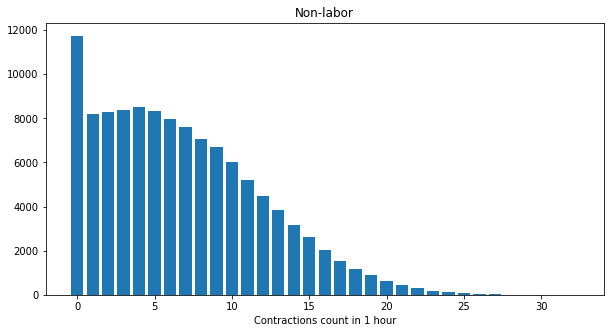

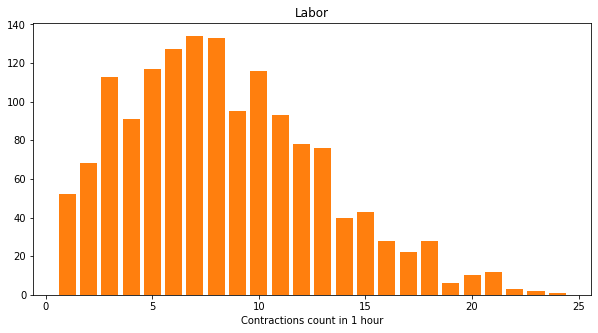

In [174]:
plt.figure(figsize=(10,5))
plt.title('Non-labor')
count_nl_2 = cx_count_2[cx_count_2['labor'] == 0]['count']
x, count = np.unique(count_nl_2, return_counts=True);
plt.bar(x, count, color='C0', label='non labor')
plt.xlabel('Contractions count in 1 hour')

plt.figure(figsize=(10,5))
plt.title('Labor')
count_l_2 =  cx_count_2[cx_count_2['labor'] == 1]['count']
x, count = np.unique(count_l_2, return_counts=True);
plt.bar(x, count, color='C1', label='non labor')
plt.xlabel('Contractions count in 1 hour')

### Manually remove selected users with bad quality labor recording

In [187]:
bad_recs = {
'-LaLOV3jGAB_N6fIauGL',
'-LNieu2AsxYz8vzga009',
'-LL331-LuEdkDRpPiO_o',
'-LSCgc9Bv9Vzt3t4agpa',
'-LXyNUMzPJTGSRDsYdHu',
'-LcYrjzwUnPA-ATsAn3s',
'-LHOUl83R6j2V-1G4Jql',
'-Lax6NBxnH6WwrV0nNcI',
'-LU-Imftb1vWMCO2xaIK',
'-LcyCrAFFbVUtg22JQJt',
'-LhQWCKQJrteDjGkDeYr',
'-LZgIeDX38CLmqxS2wBm',
'-LOHFhj1COSpQdZyrqSj',
'-LbVYeNlXcaMlob98w-Y',
'-LaHlMyplhpGG1a19B6Q',
'-LhmPoeY7jPJWRotOgT9',
'-LHaf7HUQ2VHXTyZEj7q',
'-LePccXdhH6G0k6ZBWtg',
'-LTzICGInf_UcONDxQgS',
'-LM_U_3SJEp5USpVTwcA',
'-Ld2I55hSeaOYNksEUyy',
'-LNDAVgPw_9AHew6Tujh',
'-LayIGFkKIa5-yLwa5FD',
'-LM3g51l_lZXGVOsgj8f',
'-LdK6msoOrCc59_v3l1S',
'-LQhJSRWJVTKFigEKDvh',
'-LeWNwA65YNiTsXwNutk',
'-Ldg9osQLutQ_393NZgE',
'-LZmxaYR2GVmhsbrFDJ0',
'-LJRyn-M3-PDr6U9z5sI',
'-LYBTDhGeJhgMxIgpylu',
'-Li30LXKbIRKyY3JSBBq',
'-Lgh8VYxecwRpBcRCSMH',
'-Le_3NdLJeXOcOini1Le',
'-LPiF1HmrGuyoeupOYc0',
'-LWsqHLQdX580eRpoExT',
'-LNEIwTtROxrJ6nJ15Rd',
'-LRgnk45sIJi9GJtXH1m',
'-Lbuuk_xxp60ArL4efjP',
'-LJbeC5Z8sFsGPnqHV2X',
'-Leig0HjROPJeIj3l0Lk',
'-LdDpC6NVx94jEX2qmsv',
'-LQrJnksnKJHV42YCa34',
'-LWOmfMcZ5xVemzL5UDF',
'-LcUTmnGuHf7dVgbP40I',
'-LLn_6i383khXtHTCI9G',
'-LLNMbDv3qs-led4q537',
'-Lf7ivmUl2ATWwW95WCM',
'-LTRTV_YxuT4KDnrwQv5',
'-LhfHRXNknMRaTLLuZgf',
'-LPzN_qiQlxU48Tt1nRN',
'-LU8L9EhYTnL4xZLPUOo',
'-LeF5nxrpY3hHS5EJOoK',
'-LYGfYV-G2kvuq4Ue4HJ',
'-LVGshLSfLjce8Uh1Idj',
'-L_taAUWNfKmw1YdRqL8',
'-Lbygt_5dAAD9zLARNwp',
'-L_2XmE6j2zh5Py0NV7h',
'-LhNw_XeEh0pCIWvcH0E',
'-LK-eMu7kup9D1Z5XVKX',
'-LLPIWh8jbj9ihT3avyA',
'-LesqkSMuzkGelItdnAb',
'-LaDERvm1vMUyC0a5Rbb',
'-Ld213jFfuTG6U_Uwel7',
'-LSCzuUPEeDREXs193zd',
'-LZ0RbwU3wv1u2cDNuby',
'-LUsc8la4L-uSM9lY-CR',
'-LdiO3RdSbp95unMKSdN',
'-LhmCgYC2O1Qj5gBnVor',
'-LdC4Q1M5JE4DXLeSdrO',
'-LTPlTJRcrKOARhPhRgC',
'-LXSzKbXveDZ8hiNGlFr',
'-L_0hsHIBVejUqbii4PS',
'-LcyppEokoAneS4fawUE',
'-LaOP7H0jU7rzWnLQbwq',
'-LUhRLZ5Rblyxoj6lNdN',
'-LOh0GD7433YCveXEI7h',
'-LbLI1rMvwAvVndEBpwo',
'-L_AMno36_4Z9Qjxl_9O',
'-LSmVq3EDsWMELPicC33',
'-Lfu6rk3BfE6ghjrWG6D',
'-LZeosDxHZIxQDfCJgce',
'-LY_MwizDtHhRjAcw_FB',
'-LdKtaqGgoULrZmYrypw',
'-LHCLjgX7Tqyl3ppB2f3',
'-LVBrgj6htAp8ubPyDnP',
'-LbMCtIVt07yJjiXocaI',
'-LdD8ihpwXID_LSHW5PU',
'-LenrLb3dpJH77RVI4zX',
'-LeuwO-UfX28tuCGCuTF',
'-LXkyIsRENK9T7-L-K-n',
'-LXvvCz1rUvTgf_Bzt3d',
'-LNDTLEnUf9ouwiRtskL',
'-LP9eO8OKDtStgO1EWIw',
'-LZ-MFx031XOwuqxeq66',
'-LVMi4jGkg9eEZKGoBNQ',
'-LUFOUxkPfpQ0MXHno1t'
}

In [193]:
bad_users_selected = recordings[recordings['id'].isin(bad_recs)]['user_id'].tolist()

In [194]:
#remove bad users from recordings, contractions
recordings_3 = recordings[~recordings['user_id'].isin(bad_users_selected)]
contractions_3 = contractions[~contractions['user_id'].isin(bad_users_selected)]

In [195]:
cx_count_3 = con_count.extract(recordings_3, contractions_3, window_size)

recording  -L_04VOTv6p-cX7hxgGE
recording  -L_052m2dqL_MQg1Tc2a
recording  -L_06gcoe6UIePkk9h6J
recording  -L_06UzJsRywu9XVwLeI
recording  -L_07JNq_LPBWxqzq_LA
recording  -L_0a5j1Me4aMRLC-dE2
recording  -L_0AE4AfNTwh8K_LJds
recording  -L_0aEM2pIgFrDq4RmZd
recording  -L_0BbwbrEkywSmbKnTf
recording  -L_0BMG0_O7a6-C5walQ
recording  -L_0CgZqUMNta6qDgCCi
recording  -L_0cNLBV7uXqU-j9GkD
recording  -L_0cUv7TJrwkkZef-I2
recording  -L_0cYxMaXfql85wSZGy
recording  -L_0-d9ayv5L1vfBRhrq
recording  -L_0dC2SF9NW1rP1JWz3
recording  -L_0dii38tOzP2ENoyKc
recording  -L_0dI_uApX7gD2EpY5q
recording  -L_0DZTCBFtBTyMljByE
recording  -L_0eLbe4xOt648gmPKf
recording  -L_0Eqr0VSlwv_d1de7H
recording  -L_0ftQIid88c63Cphbs
recording  -L_0gKJEPfFvkP-M6GaN
recording  -L_0gQW2Xli6y9KVexpH
recording  -L_0H17nqxujPszxuZMl
recording  -L_0HbIY1oyd7bvYfIfO
recording  -L_0hZxpZwHoYt5MUkYB
recording  -L_0I9p3KKyHgn7Kx73u
recording  -L_0_jutiXppTqZwqCMT
recording  -L_0kOlQX92fadjhLhvr
recording  -L_0l9WDCFXSNYNcVgsS
recordin

recording  -La18-1Ty57v0pvxJRSg
recording  -La1_ePX4xTOqmOqQPgo
recording  -La1fIsQ-9vilW_pIwXs
recording  -La1H8Rz8sBtiUv3x8P_
recording  -La1HXajnmWc8qUmoq9K
recording  -L_a1iLdW15erQHFYS0l
recording  -La1K0uhZ2U5dSUxi70P
recording  -La1l5zSH0HV4GYZ-pUN
recording  -La1l9vWH5nQah2itq1m
recording  -La1MpQzYi_2SQOS36wV
recording  -La1MxLoWFchoIOLWoA7
recording  -La1oqq7p5RKoga0-HH0
recording  -La1qTr3FbTjEliktRA-
recording  -La1SabLKeE40xz2PXdo
recording  -La1uj6TmPK1XsptEdE_
recording  -La1wEbzdR1BcaAt6DJ0
recording  -La1ZkWE-II9VyNtf7rP
recording  -L_a2aABKZTg0dl3apaX
recording  -La2bMJFqpFg71P3D8MM
recording  -La_2CnEHNPAmK6Dc8ur
recording  -La2D1yY0vglVLpG1HEU
recording  -La2dgLAS_LOqWfsfypc
recording  -La2GWsVg6qLMuO0bv4U
recording  -La2hrmbYf2g0lWFP8Cn
recording  -L_a2I7POCQ9OFOCQkKF
recording  -La_2ixMgkSusOKNlXhl
recording  -La2j8ftG6c6aXOes8vR
recording  -La2jQORcEOGI49LfZF-
recording  -La2nyokKvMFP6dyAY55
recording  -La2nYxhL2sdxG_Sqxnh
recording  -L_a2PNzTybo0Tg5dLeO
recordin

recording  -LaAP20qkn5HwaX1A9Kj
recording  -LaAPHUrsxwhhdv15Bb6
recording  -Laaps2T-CD297fmKfBb
recording  -LaapZ8F2c8yX4xjQUBN
recording  -Laar5OLZ8zGkM1ICfWy
recording  -LaAtYg3sW5CEtFzSONg
recording  -LaaUw1LRYkQr-odDtjG
recording  -LaavRUiWcPqOJ7qL3-T
recording  -LaaVZhn36u-cbvdcTwd
recording  -LaaWp5DQbXAisOacEQQ
recording  -LaaxDajv2Yn4zuENk9a
recording  -Lab2pGz09LHnUawVqB-
recording  -LaB440_S7AyxsbiWJy-
recording  -LaB6mr38lI0K0zJo-yf
recording  -Lab7pp_cZCCM3k4wxiC
recording  -Lab8Mzs7s13oPnA_5mc
recording  -L_AbBKT8yimL8n9et4O
recording  -LaBbs0w7CGJd5gyTDOQ
recording  -LabDUXR3ZNIhDmq-qmn
recording  -LabEa3vVkFlPms8Xssh
recording  -LaBEtovVIrFJGTJt9l5
recording  -LaBhWH_bdig_b6XcRIU
recording  -LabjrLazNqPZgQoSg3q
recording  -LabKPVfc_ruiz1NGfyV
recording  -Lab-l6IijAAIpMhiKKx
recording  -LabLIHxqr01jpmsPfOY
recording  -LaBNA0Ew5h77jKmnG5K
recording  -LabogP1CFRRJom7E7t2
recording  -LaBoJmrfJvyTghMQXpz
recording  -LaBoW8LyON2TIPVLUJK
recording  -Labp2njA3JmCtj78RCD
recordin

recording  -LaftTJlCCiSCEBGRRFr
recording  -LafUMYrXgRmgwivUk5y
recording  -LaFvdH84QrQnW2zZa2E
recording  -L_aFxV-luKhKkaD1stS
recording  -LaFytbQ6HVTHoHD0FEV
recording  -Lafz1WO-AIzvA-5QMrM
recording  -LafZV3wZCbO8munE_aP
recording  -Lag01v9fKXaqUAUtIJe
recording  -LaG1FsTKp89ngyegrn7
recording  -LaG1wHrHjmIyN5_26eQ
recording  -Lag3Hh8uq71_TY5P5d2
recording  -Lag4efRZ_yWTnUuF-ND
recording  -LagAhGirPNnasLQC6Av
recording  -L_a-Gas91ZJxlrj0WB3
recording  -LaGbq8fU3Cr2He-PYh8
recording  -Lagd9WoLN3G6MGYcZ5-
recording  -LagEHHbQw4D1WMEkK_o
recording  -LageJChBimEqVMeJi10
recording  -LaGF1yOFQKJCwF4ZUfb
recording  -LagHkRxV64nnxGJXf3j
recording  -LaGIaP8yqAN_SeKlVFq
recording  -LagigdJ-jvVuShz_vdX
recording  -LagLG6VHDZB9KQqSZYk
recording  -Lagmd56l_TY4Z09FJGg
recording  -LaGmFM09QLEJU8fduCh
recording  -Lagms8-T4NUC6jg5EAE
recording  -L_AGOB2DN5eYktUmnfN
recording  -LagOHN2KG1iC11OAhB4
recording  -LagOtIyMGArYbsIiNgl
recording  -LaGpn5wayrkteZOJc-L
recording  -LagpxxjGdz75F2S9VGi
recordin

recording  -LaL54uzOtWAcJq4PObC
recording  -Lal6udmQTuuT3Yp685Z
recording  -Lal7MbpEVVRKCo8g47K
recording  -Lal7WAbZouRVOFMchuq
recording  -LaL7zRjZA8ufqZdnPZk
recording  -LalAvm368t7STW-zwhE
recording  -LaLcpyMq1pZzhrDgAvB
recording  -Lald6MRFcc_olXxSjrD
recording  -L_AldLHAIuoUu-cIsYr
recording  -LalHJg4nkepsTnwbPeX
recording  -LaL_P1ZRDNbvGMqm8Px
recording  -LaLPJ_1vqrJkjAfBsYU
recording  -LaLQ_C9ghqKyoZjnwWm
recording  -LaLrbvtd7HHTlDCinET
recording  -LaLSZBPX7k7MpO3DcHc
recording  -LalTs6UHB4NL3HNF0Gj
recording  -LalTui6U089Dy1ffX59
recording  -LalUmCRZfG5joq-xZzX
recording  -LalumxdNM0OGa3qQPBs
recording  -LalVzu9FI3Tayk2y2u3
recording  -LaLWGgUP0lqgL-lsLDE
recording  -LaLXKPX4KrtUgPhykqT
recording  -L_ALzLbGTi8olmvrs3O
recording  -LaM0vbClcrjWb0y0D8N
recording  -Lam103zyB4Ho_kkfx7l
recording  -Lam1U1hEfwctOIohK6O
recording  -LaM2CSNVwh_z8jvUWPG
recording  -Lam35rWRTcko3xDw9WC
recording  -Lam3oHTXBe5enqbvrx0
recording  -Lam4YC_ZyC08bt0rP6x
recording  -Lam6LKRbYB-VfBW9c4K
recordin

recording  -LaqfgblRwsZETGv0zzE
recording  -LaQh_RBL66FM5n8E7Xh
recording  -LaqIdTsyJQ2qT_3vRB4
recording  -LaQK4i48Os3K7pAAD7P
recording  -LaqL8tqeVufJ8XPy0Q6
recording  -LaQlS5A01TsvIEm0QFs
recording  -LaqmRO_qvZk5qYOyBhh
recording  -LaQNlWX-jP9AHhYUGj_
recording  -Laqp2nH01_bBGURnOhm
recording  -LaQqD4vOjQX-K5XxQvw
recording  -LaQqKGSWuXOFnhv_2gc
recording  -Laqrpk5taTt6gbuLL_X
recording  -LaQSyNhMpatQyRlmGAp
recording  -L_AqUxwQKfbgAz1ukqr
recording  -LaqV-kM73kbdHbsWMt0
recording  -L_AQwrAWvbSm6R1lY1w
recording  -LaqxWElbak-dXi30Jnb
recording  -LaQxww3xrZfqW_fjsi0
recording  -LaqyzTxrETY_GwiVEAR
recording  -LaqZIdqqHyjQTD2RMr4
recording  -Lar3rvwp20SRbg1Lpy5
recording  -Lar6w31pz07_7cQRvLK
recording  -Lar7n9ItshqWqM-elLC
recording  -Lar80miat3kVNDWtaT6
recording  -LaRAsLG6-I-zbuRjzb0
recording  -LaRCZGjA3BYcHgEaRy-
recording  -LarE_C2g4aoJGxs5C-A
recording  -LaREDVcXiKtscgoS2m_
recording  -Larey3Qxw8YgW23lT2T
recording  -LarF0qFDU5tYpsd9-on
recording  -LarfGx9_5N9JlMZyT4O
recordin

recording  -LaVMQSzL5XgFcKBlS0l
recording  -LaVO0jYUHh3OkXmPBgJ
recording  -LavoyKSm43dFI3BklH0
recording  -LaVp4qLMILvrU6aiCpN
recording  -LavPKUhJ5BE7eizGQYe
recording  -LavQk20u1DIp4uBvK-8
recording  -LaVRoCXtaLTiADeKPBj
recording  -Lavst5tVUG3jI_ymy8a
recording  -LaVTCakQXIsf7CBga3A
recording  -L_Avtlgvjy5xZbFMzjy
recording  -LavTMk8J4lgq4K4ND8l
recording  -LaVugGELzVFFHkuy50D
recording  -LaVvdqj_IsRp5oPMY38
recording  -LaVVlTgip-V0LHv96Nc
recording  -LaVVMXaFRI1VMZiF6OY
recording  -LavwQMuWEl0J1EsrLPr
recording  -LavXiAyZZOmeX9f1xrX
recording  -LaVXIldJEbuS-kzeoIW
recording  -LavXNJe0jartN5rAd8-
recording  -LaVzBRE1uus0ri8Vu-U
recording  -LavZwSwG7PIuxrqqEpy
recording  -Law0qigRJiaTbxyyWru
recording  -LaW18ecnQMA1Qkk4FbK
recording  -L_aW6GqxkL76dwdmvYB
recording  -L_AW8uz2zl656fX1ffn
recording  -LaW98eBTBCB_xiQ6qbl
recording  -LaW9y5hc2JKFKRFc1b8
recording  -LawbtyMsLvxoB_irCdj
recording  -LawcARpPsYGyqBHxdE1
recording  -Lawe1KAakv5ImlhV0Kp
recording  -LaWErxlh49JWPQ_2zoo
recordin

recording  -Lb0lMS_-3vG5nyxXzTa
recording  -Lb0mD8eYlD2P1P-9p3p
recording  -Lb0MJ_cCX9Qh0b2tLGr
recording  -Lb0ngZr9eqgMEhb5ba1
recording  -Lb0rptiMCyyk_hlwHXD
recording  -Lb0rQKsTkxF-NaWaKuD
recording  -Lb0rYz1B76JQAiVxIbc
recording  -Lb0t54BV6t6wGsBMyki
recording  -Lb0t_mxJ0yVa645NGw3
recording  -Lb0tQjUxOiaxFnKuHr-
recording  -Lb0tXHlxCCG0aPQsDA6
recording  -Lb0TZhLJhVmmx0YNddx
recording  -Lb0uPqGbDuJrLUfnpJi
recording  -Lb0UrfyC93bdBvYFulQ
recording  -Lb0xklw3TE-Ruh1xlT4
recording  -Lb0xNg29VSMVgPUrlaL
recording  -Lb0YN8YDEeI4kqZ74Sa
recording  -Lb0z5WmOBv0haB48jfF
recording  -Lb0zKrkFC3ShzpJKA7Y
recording  -Lb1060f57HOWiRW97-w
recording  -Lb10JR-QmMo2_2WuYTP
recording  -Lb12ddfaQ3-5EdRiFB7
recording  -Lb12XS56QMYDkTA6v3B
recording  -Lb13bTtxpsRBf0x6e9y
recording  -Lb13uI5BDr_jeXQtZ1o
recording  -Lb14Oty6zx7YfWcXwQp
recording  -Lb16UIr6TIzu-7UaJdR
recording  -Lb16YK9XgmgDE1-wfcr
recording  -Lb17AmQv7IQITvY-d1v
recording  -Lb17noucM3o6EsPJrzH
recording  -Lb17SBQSPEAACjQndpg
recordin

recording  -Lba6yB8uMnvVCrS2PtN
recording  -Lba7oq8xIrhLrG9zpMo
recording  -LbA8AteHLRvtZ87FEdH
recording  -Lba8cV9rYPIURHZcIm6
recording  -Lba8UOX1iGe5V5Qp1OQ
recording  -Lba8YahgCilwaMWbu8_
recording  -Lba9ApglV2InL2tyZo6
recording  -Lba9Nj2kMN1z0ttCO8n
recording  -LbaAGhXvo2DPPOIik8y
recording  -LbaAmpLH--B0T9wFp-x
recording  -LbaBcEW9o0XUpWkPxNo
recording  -LbABpk0VEWGWAzYmiWl
recording  -LbaCEG-ix-62pjr9otP
recording  -LbacfzjXOeZ70F2dbNX
recording  -Lbacwq8kX9RL9GKiRCV
recording  -LbaDpOqT8ALCJTg4gnD
recording  -LbaEOBkX04XQoJgjwzF
recording  -Lba_eoXQZIZzMnzEYT0
recording  -LbaERIeijRj28XJ1D5U
recording  -LbaESRmzgOhPeb3gAAj
recording  -LbAFNxyoTIhCmuN5xBX
recording  -LbAFvIolNvE18mc4WVi
recording  -Lbagx1XdF5c4SxnJBv1
recording  -LbaH2OtojsgwXfgIwGu
recording  -LbaH8CtXc0RsbPYTgay
recording  -Lbah940En6Dxpm24AnU
recording  -LbaHGKOQBxSUd-NUx2c
recording  -Lb_ahUrd1wMU6FWGVxu
recording  -LbaI_GWTwryFHaZbGQP
recording  -LbAijBaSqsW8D55yRyK
recording  -LbAiMTDrbp_pkClTieX
recordin

recording  -LbezemC7mrEHtOv0pkN
recording  -LbEZntMEvjNUa5jyffA
recording  -Lbf110jahAmGjjkM83f
recording  -Lbf1BPpcO7a0DCkAL8M
recording  -Lbf2EPAXaWb0L3gqDFB
recording  -Lbf3h9XIEvfKP-BaYwZ
recording  -Lb-F58tKcNmv3r7rwJ4
recording  -Lbf5Cm7Iep46IwITYiu
recording  -Lbf5Mcb-hz6W2Ayu9cw
recording  -Lbf6EgbImAsr0ufZZ4b
recording  -Lbf7IjruQOr_Zdo1OrS
recording  -LbF7NJ8xxZm6PkD18eN
recording  -Lb-f8fSb-y2pSys7_A_
recording  -Lbf8J_8yuvkA5I11VBD
recording  -LbF9DAN1rSvhvOYim7C
recording  -LbfAEVJOxJ51L2yn6yW
recording  -L_BfBcyGXnhGKDD42SI
recording  -LbfbPadOSzkSs_esbMb
recording  -LbfBpEr2Sv-nsfVUv85
recording  -LbfBwdBkSa7hRIYp--o
recording  -Lbfc85KvH0hHt7ndkCi
recording  -LbfcrNYQb1ZPlXCk4mX
recording  -LbFd4OegZsCnFUYBY0K
recording  -LbfDd-GNbv-mnrsYs03
recording  -LbFDlPObEzEeVB14gMW
recording  -LbfdtEf0TziVrgAudV8
recording  -LbFE_W3_0SilPcXdtkI
recording  -LbfEx8OAhqpkXcMaC4L
recording  -LbfFe1i4wzjWf6t4qf8
recording  -Lb-ffqDsdRubsyE3Zjg
recording  -LbfG9NaPQsKtr78M3xD
recordin

recording  -LbjlBQnVl4xpWfgEP8a
recording  -LbJluJP5T3lAiLnhqP0
recording  -LbJl_xVDUmOoKTeRsEd
recording  -Lbjn4x_VzmOOUQOXXxb
recording  -LbjNOqNOTx4coBOCQnj
recording  -L__-bJnvfGR6E3w0bA2
recording  -LbjnZptKhI6WHXhyeEu
recording  -LbjOExZ4MHrM66h1Qx_
recording  -LbJPLeM_vGhCfV8Qygg
recording  -LbjR9Je4q9I_lcwzHlU
recording  -LbjsaBwyesYupb5gJAy
recording  -LbjsCXwvCaGh8wGIWHz
recording  -LbJsfkGyrSZC7WIKrb3
recording  -LbjsiFULibOqDPI27hk
recording  -LbjurUwli9fVgsU05z4
recording  -LbjVfYlATK8UgCpWHcl
recording  -LbjVueh8UpO7zikQpu1
recording  -LbJwzc17QNQdVhUrgS4
recording  -L_BjxcNP7sMX9mpXtlJ
recording  -LbjygqMjJTS-TeyXKga
recording  -LbjzCch0x9WNjXJehIa
recording  -LbjznKmDF_IeM-kSbW2
recording  -LbJzxRyjlVHFfaxkmNi
recording  -LbK0MWMKLhyQHNt9VYW
recording  -Lbk1JBeJrb6j_2lcnb7
recording  -Lbk2ip7uN_W1rjRgK_l
recording  -Lbk2qEGcFqX_Sz4MQPU
recording  -Lbk688Ef8Az9rWWpquc
recording  -Lbk7DJPj9cRyzggb5bz
recording  -L_Bk7QQTA1NtFiLa49h
recording  -Lbk8PG_FaxTGrXalbu-
recordin

recording  -Lb_ny38U_BlAjMj9pvh
recording  -Lbnyl8wLQWkLqXREMnY
recording  -Lbo3k9vy1c2YyRrVPsq
recording  -Lbo7JPJRgMTvqoSsHz4
recording  -LboAUI8v4msoAMh05pz
recording  -LboBIllrhuo-QvyjxEI
recording  -LbOCfbqo2ovZbO6wlz4
recording  -LbOE2kdbzp9RIhySHGm
recording  -L_b-Of0yAYeGZ5m3Dsf
recording  -LbOG_RAvQn0OMRSb68I
recording  -LbOHxCqiO7hvLfLFE1Z
recording  -LboJPac7mDTTTTuaU03
recording  -LbOjYljK4d2n_EWd_dX
recording  -L_BOKEAnGLpahye9BT4
recording  -LbOkm_WkCgdxpqTf971
recording  -LbokUPnt1A1cvRr1BaG
recording  -Lbol3pocJyL4Won_jbi
recording  -L_BoMnFRXopoquSwPH4
recording  -LbonZt8YLgAi0-fxhyV
recording  -LBOofgCxML2HEjcaHtG
recording  -Lbop0hTm94I77HFKCmj
recording  -L_borppPaB01I5fPEmw
recording  -LbOTu81ciEHGhaKq2-H
recording  -LbouxMXwrC2PRF_LOVt
recording  -LboV1lpceGkr2RfpPsk
recording  -LbovujGCeQ5WhLBw8Re
recording  -LbowxPdq0Sm1JdNUfft
recording  -LboXOwkDk-y36o5yrXJ
recording  -LboyVQklYIzvjB6pfC4
recording  -LbOZ_D_9u8lzvgRH9NW
recording  -LbOZDb_b1YsSiObOuJK
recordin

recording  -Lbs0hlZ5jJEUJ09ulsY
recording  -Lbs1cSfLkEsFqC5a5LG
recording  -Lbs1ssaq8EFthEKG_9p
recording  -Lbs3rD08-Ty_oxJnoP6
recording  -Lbs5lpUP55SQTW9W2vX
recording  -LbS7VodyhfCV_sSLOy5
recording  -LbsaQcobmxhbyXs-XV4
recording  -LbSbUiQ0Bsg5JuMN-lb
recording  -LbsBvEpzcwNsgsprokh
recording  -LbsCefvwuyE5aj9gzQM
recording  -LbSDYV9Zy0Wa0QwyhBO
recording  -LbsGps874YYEuc8KM4l
recording  -LbShVSQ8n9Y1rJ8zSqj
recording  -LbsiCmXxNhdlMx6qgBw
recording  -LBSlMnvFUiMC0LlwpZK
recording  -LbsQ-NBuqZa6jS_NIYC
recording  -LbSSno4YrBH5cBdzMRh
recording  -L_bsTHUNf-u_uJnTPlM
recording  -LbsvbkhgAo1ZSkFbADy
recording  -LbsvTu6n3ioLdrb0wPu
recording  -LbSXeox16rTSBCAQYF1
recording  -LbsYJv_Osc7cnCnhi4l
recording  -L_BSZ55yaI-bpHaCBTt
recording  -LbsZbVl2073nHOkcJdo
recording  -LbT1ZNnUpzI3BHWcUUg
recording  -Lbt3EdYRHBMArCW6I72
recording  -Lbt4z7QjOB08Dy1R_sq
recording  -Lbt58t4sGT165PRJzSY
recording  -L_Bt5bIg1GZI3dZu-In
recording  -LbTadq7mEKLS3DFG9ro
recording  -LbtAipUkzBgXnGMlcoC
recordin

recording  -LbWOK9ybkrrh2SQNaVQ
recording  -LbWP1vk-467PyPal3lM
recording  -LbWpKN-x8SxkRl4_xWZ
recording  -Lbwpnp895MmFUe5kbnJ
recording  -LbwpSZ15uMhcEp8rIFa
recording  -LbWriLKQCs4f6p17ouH
recording  -LbWRqditDPuLUC5TMbX
recording  -LbwsorCfXktejAWBsr-
recording  -LbWT-4e1U_UXXLcJj0m
recording  -Lb_wX2ZGUe3ZNJUd9yk
recording  -LbWXJGD96XeAwQLHQ8-
recording  -L_bwYa3FTC5S1WFVDq5
recording  -LbWYsur8i7URrkuE22E
recording  -LbX2ApJfvicSSEWeKmS
recording  -LbX6PO9Ob3eQEf5Inbm
recording  -LbX710KwmHhIe_5wW2e
recording  -Lbx8FYxf_NEIJP4CKAN
recording  -LbxAn_kmkv4umcPbMOt
recording  -LbxdVrASTdjq9a_5IbW
recording  -LbX-Efj0y4w0qxrkMd5
recording  -LbXeNahWiY9dKG3d9QK
recording  -LbX_f1bzNf4K3BiVbnu
recording  -Lbxfiti28kXCVwq3fBQ
recording  -LbxFO9IoMLzbK5y4omv
recording  -LbXgo0_VVNn3Ram8c44
recording  -LbXGZoH8snX-to4U-jm
recording  -LbXhIEVx7KEOFPpNTDK
recording  -LbxHlLsKE_YdvmxSIRI
recording  -LbxHmmxUjeB9s2da75-
recording  -LbXIdcixMcqWJZf1yhA
recording  -LbxkyocGgA2EG8J5qAD
recordin

recording  -Lc47gwcqQ7S9JUMs1Io
recording  -Lc47HyKxXp8NN_qOCKj
recording  -Lc47R5dNGMOwa-2Bu3g
recording  -Lc49_xmpSq68awb9XqA
recording  -Lc4a6ATZi6Zusya178O
recording  -Lc4aVNFuPJGa7YLyYg7
recording  -Lc4B5QdUUFwUUBwbG34
recording  -Lc4BbjYddzRsbH-tvFf
recording  -Lc4BY36GKgUfLs3kEVG
recording  -Lc4C6eX_bruHtTa2e9D
recording  -Lc4ckSjXwtearj3jjwP
recording  -Lc4DIa9Q6rv2-3GMWjG
recording  -Lc-4DIURjNbnTfyrZtZ
recording  -Lc4dWRR886njyCaclUZ
recording  -L_C4eB6deBq7-8ftVjH
recording  -Lc4EJpLv57nKgcM-u91
recording  -Lc4Ek6QSrkBSHpWuWbl
recording  -Lc4EzYq9Ubh4G3EoHzW
recording  -Lc4HlY6QUsYZnnbmGsG
recording  -Lc4HPZ3fGKzxZ4TpvcT
recording  -Lc4HumsGU1t03Bfikom
recording  -Lc4_IlgLdKUmZCSAius
recording  -Lc4-IVcvpH_h7-Pfd1w
recording  -Lc4jagIXoP9tlxmTdSN
recording  -Lc4Ji6SOqRPZ4C3av0Z
recording  -Lc4LmpS60zoOCJxi6KH
recording  -Lc4lNJUa61TxF5xfcf3
recording  -Lc4LNtTxjO3fyya6lUp
recording  -Lc4OPmZY5LoWl3mQWr9
recording  -Lc4Pdn93K6nBX51KcVn
recording  -Lc4QpSbA3OHO7fJhqA_
recordin

recording  -LccJh5uRWIeYaKlqpEG
recording  -LcCk9nqV-N2p0KX2jeA
recording  -LccL9hDcG-gOxc95Q6p
recording  -LcCLEQnt216ysmSh_2u
recording  -LccodVmhyks-2bNSn7J
recording  -LcCPGz-BGrisWy9fJ8B
recording  -LccpiZYhqsFCKpcTRJ-
recording  -LcCP-wKA9PgIb3Vs7wo
recording  -LccpXq661l1sbWUUytN
recording  -LcCrOiNsF7iotWaEbuP
recording  -LccSi1wGzVhapUoBp4W
recording  -LccuQcYy1vfFfnxILFH
recording  -LcCvLGU1L67HDF61uRg
recording  -LccvNVXDYmX-OXSdPwy
recording  -LccwJBA-cpgN70K3o0H
recording  -LccwWUUUlJ2ZBLyzmoW
recording  -Lccx0_P0iz15AmPOyqP
recording  -LccxCIdZ4rZIHIeZTP8
recording  -LccxfJ7x3CwmqEplwsn
recording  -Lccxi0Md3ne-H-To3DI
recording  -LcCXXu0D24sLqA7cihC
recording  -LcCy-ekt1ak1x0H1S4N
recording  -L_CCyFCFZzMMGd6Npy_
recording  -LccyiptJMr-RrnCGwwX
recording  -LcCYWiEV04WY8hgpVCI
recording  -LccZ1azz5nrR20fJqaP
recording  -LccZGU50p8zhJsIP8zZ
recording  -Lcd0PSvUQCp1tywn-KA
recording  -Lcd1EFGDPqvxzQIKyy3
recording  -Lcd1P4s7s6xXfLth27E
recording  -Lcd2WIdxXDLCThwg7Z2
recordin

recording  -Lci5aFV4M27EGrqsGPf
recording  -Lci5c7KfuSzxB3gos6P
recording  -Lci5RXx7zNKTQzsmX38
recording  -Lci6vo1eIgwAYuKiRK8
recording  -Lci6W52HQxSH2G_iv9-
recording  -Lci8D-ewpMFXlp96sTu
recording  -Lci8SVXsIFlW_fftH0w
recording  -Lci_BkcH1I4z_eCugAH
recording  -LciBMdXFGSHqnDZGmk8
recording  -LciBqBZO31cAKW6hcwa
recording  -LcicJ4jgap13u2HGeXR
recording  -LciCR45Kgqus7urfppN
recording  -LciDqXjrwWkw-lswW4S
recording  -LcIeB5TQEhmxYfGNaq9
recording  -Lc-iEIjvCxrBJnjG0UF
recording  -LcifC0AT4xE5ysTWjPL
recording  -LcIFHQpJsVDqJV1D7Oi
recording  -LciFpUlBwVFVJzsEWhh
recording  -Lcig0fZwW_ls-1jEWSU
recording  -Lc-IG28z3kqfpQRfIlW
recording  -LcIgFBWGS7kJXQjSH-A
recording  -Lcigr08UVZ0DlwDDrL0
recording  -LcIHiYyFOBQ5oC85Wn3
recording  -LciHme655Hkd5JsDAZx
recording  -Lci-HrRsB1Tti99w8cS
recording  -LciI7oIvhrvrHrjeWNV
recording  -LciITWY7ul-Ta0io5qm
recording  -LcijdSYiQKD-C7phZEw
recording  -LciKM0-OjvOpw2Qpo-K
recording  -LcIlLaSHj-hLvLibf_F
recording  -LciM5yggLj6KSqiu0Zm
recordin

recording  -LcnOLxILTnoyy0bQQwz
recording  -LcnpC9AW6PMe3TCqJPY
recording  -LcnpXCilN4vhJQJdghj
recording  -LcNQ65eHvlbsHtb5PA7
recording  -LcnQHpFMfdhPu5xrHQi
recording  -LcnR4_rNGClilsd-UG6
recording  -LcNSAsoUK3fvAA0gBP3
recording  -LcnSFlH9NGC9S4A-Ky1
recording  -LcnUd-3kS9a9K9btQvz
recording  -LcNvEvHcTZQ2hbQGGn_
recording  -LcnVEYW_K87ptG779Kh
recording  -LcnV--Rjvn0m7kJ27Cc
recording  -Lc_NvU7rMmcYgfFR5Jb
recording  -LcnWANm92y-cK44e8PM
recording  -LcNWFRO1GvIghP77-oJ
recording  -LcnWMmqrly7jEq_JX1n
recording  -Lcnwo5C54ZTJui-hns4
recording  -LcnXDirCCmvk56q1uBv
recording  -LcnXehD0pndng-T68a8
recording  -LcnxIrjbn9NbthBd4NW
recording  -LcnXJfclgqaSgN_iIdI
recording  -LcnXveXdNy9w3sNvpEr
recording  -Lc-n_y03I7xAsu56Qmb
recording  -Lc-Ny8xc9xZ1BhY-JN4
recording  -LcnypmlDVdRj9sp04wE
recording  -LcnYUCVni_ZWqp8vQCN
recording  -LcO0j3MjAGnsRJX54jO
recording  -Lco1kKG6OnkHR_kPXvH
recording  -LcO67BXb9wsz1w_36qA
recording  -Lco85fxRCWMkXtEpwY0
recording  -LcO8lE41ogML4PuSCPK
recordin

recording  -LcTLI8HIKEtk1nhLeXp
recording  -LcTL_ZUiiwFyq4SzPzl
recording  -L_cTMeAQKGSrruLkaFv
recording  -LcTnHWHHiIhf5a2vKKN
recording  -LcTNzLQATpL_cP4uyTB
recording  -LcTO4YinhVreQFy4z4I
recording  -LctOcPmwbDzrZ64Kt2A
recording  -LcTpdPcTj0wSjK-GtV0
recording  -LcTPO1aWnD8ijgMFsyR
recording  -LcTpta9eujj1OQkePzD
recording  -LcTQeoIq-ziI191rM3R
recording  -LcTqHVACGERLAFOoWdc
recording  -LcTqw31h8m6kr3OXQl5
recording  -LcTruqTicMxXY5Nzl8j
recording  -LcTsE4DmMwy_vz61jeP
recording  -LcTs-u4eZhi_KB4fa4W
recording  -L_cTT_giZ8VaWlHDu1C
recording  -LcTtJGij5gXCGBv0r9X
recording  -LcTtvsQba9SkeprFNmP
recording  -LcTu2yvBE2EivPalji8
recording  -LcTuLpdOFAZdaj0z6l_
recording  -LctUYaojN8ifM7PvIGY
recording  -LcTvTgcToHbepGjj_2Z
recording  -LctVW2dDWO6Bqleu5sd
recording  -LcTWeeEAgbiTsyMNF-Q
recording  -LcTwXPGwwdkInw7KnjA
recording  -Lctxb4YYvJALwrpNZfa
recording  -LcTXQo65cp7E-HmvvhH
recording  -LcTYRScKe_CWDLsUwu1
recording  -LcTYt_daeAIN4DYnikM
recording  -LcTZDMkceuoSX1bDdZ5
recordin

recording  -LcZERbqe1r4jBiR0F2j
recording  -LcZEwbPVveR8XuO3Jhs
recording  -LcZEY7Ld8B2MBjVAO7I
recording  -Lczf49luejn52hTmpZ9
recording  -LcZFYUA8zKb3llKQdAZ
recording  -LcZGqHoADFCdoMSTjqM
recording  -LczgXkYaq0-Xx7O4bRf
recording  -LcZHs4cquAMuVzui93C
recording  -LcZIqXKj1AAaOuuKDiB
recording  -LcZ-JKAOilrqNZ3cHhA
recording  -LczKrvPF15FyL9B7C8y
recording  -LcZLIaJn8R94GnFiIdt
recording  -LczLxjjUJAnt278sAGR
recording  -LcZM2IaCKmllAE0Jv9F
recording  -LcZMJDZ5HxXKQIaUgzr
recording  -LcZN9sdt2uZc2w24QyY
recording  -LcZnxvXZdDLPias4uAL
recording  -LcZOBB0gXS8nDgcR6MZ
recording  -LcZPGM4xMobq-R8GPKG
recording  -LcZpudET3xXXpIeO3pY
recording  -LcZQEyWjrjpQpUcQw1Q
recording  -LcZQWFMSJYdlMXMoYyt
recording  -Lc-ZsQne6NtYZqpV1Xw
recording  -LcZUCc1KPB5pENzEJZ7
recording  -LcZWnXPmKiK_1u_f4O4
recording  -LcZwrD-5OsOCR9c4PNs
recording  -LczWw43cWFD3QrYOyts
recording  -LcZXb-LO8Tino-iE79N
recording  -LcZXjDoju-Bl8BZEMjb
recording  -LcZZT8xGy238mO7TYzB
recording  -Ld09OyJYhxhPD02w-36
recordin

recording  -Ldawau4fo4r7my0VAdo
recording  -LdaWTSBXRZTOfy2D6LX
recording  -LdAxN-A6IrDLChvw-5X
recording  -LdaYaKHD7JoI-1q673z
recording  -LdaYt41OcuQEdIHokrI
recording  -Ldaze6PBzHuUTs2xMn5
recording  -LdazgWBztapT74FWBQX
recording  -LdaZmka4hIZpVqRcRki
recording  -LdazRcmECoPAmYbuWQY
recording  -LdB06p15aC2O3V8dSze
recording  -Ldb0pDWZ0vC-hwHVADT
recording  -Ldb1sr2baMjDZjRywyF
recording  -Ldb1Tweg-ZbkuWe6cJL
recording  -LdB20t7vJfFwELCNWav
recording  -Ldb3YtbcE-Lm-R6ZW3Q
recording  -Ldb4kapQyLTNmAuZivh
recording  -Ldb5gmMsp4aCTnTS0tM
recording  -Ldb5SX3U5dmhjbTBx60
recording  -Ldb6hnC4MEkAUaPggL2
recording  -Ldb7huyk8z2zlHZ-yQ5
recording  -Ldb7lJbSq9QdwKPI_S1
recording  -Ldb8_CtCi1estLWvK-B
recording  -LdbAYjntDQ0CGj1bb__
recording  -Ldbb0xy--DSBLR8_9lz
recording  -LdBCW1mWFdEQuQzGLRr
recording  -LdbDdc3kVqmx1Kqe3Xk
recording  -LdbdjdhKpBLz_XqASkK
recording  -Ldbeqoy_tLffAGYfRef
recording  -LdbfjVkB2WeYwNoSsZK
recording  -LdbH1gQ6dPR2IQ-60O8
recording  -LdBHEkzLLJrQcJMr-NU
recordin

recording  -L_d-g-d3Z3PawvCTtPA
recording  -LdgE0cRFuZiH8aK459b
recording  -LdGe8HTRThCQZYL4d3A
recording  -LdGEbLTae_L-_8KlCuX
recording  -L_dgeGtvTbCrIGkEfoO
recording  -LdgewUkg0UPSzJAF1tg
recording  -Ldgfmg_d2WsuUalEhiV
recording  -LdggJkeOsKM5WNyb3-K
recording  -LdGGrU0sGr5PARo6Rbn
recording  -LdgiANb0U6SyLLyStGe
recording  -LdGIHcSwhzunUEjsIf_
recording  -LdgJ9n4zWhznHSRtj5c
recording  -LdgJC5f7dmY_hg4rdqj
recording  -LdgjLaq7rbIY3cO76xp
recording  -LdgJq9pXvbYgLLvTYwP
recording  -Ldgjqsbqv_Has4guz7a
recording  -LdgLgE44KRDZzgPIInE
recording  -LdglnuuXSnhdu3M_zH_
recording  -LdgNYKb8jBtw4NmuO8S
recording  -LdgOfAXBg2sxYZvN6so
recording  -LdGP9IkejT7PimOtsIi
recording  -LdgPvAaYzDxP5FocPHG
recording  -LdgSS4JGWIfyCd93yob
recording  -LdgSWGBfzjv2jbFOmWR
recording  -Ldgt6eE22JporqApOE4
recording  -LdgtPSwkeemRqYq24Pc
recording  -LdGU-doJ3-e40ZK2ywF
recording  -LdgUN-89y29_dpcgOyv
recording  -LdgUNEklVSnFmE9L5gp
recording  -LdgUXEVjXkXty0u-a5y
recording  -LdGV8CJZQAEKrYq0_2-
recordin

recording  -LdMOV1Bes612fvmCXkm
recording  -LdMPeQf2ZLsJT5_eTt-
recording  -LdMPJEhTscyNBuCRNNq
recording  -LdMqexa5Gz7u0M4vYuT
recording  -LdMQQhF0LYLMPGZ5t8A
recording  -LdMqY77Z1ZIBNIFr8WR
recording  -LdMR-6qARHSPiiBs858
recording  -LdMr8cI5OM8dpzTafrj
recording  -LdMRMTK3bqnemmE8VuX
recording  -LdMRUQ6AtkO_ae4Blu3
recording  -LdMS4njJVgHqK4nOqYJ
recording  -LdMs6m-9SXIQWnBnVlp
recording  -LdMTKzUd_2Siyo1SRQ9
recording  -LdMU39I_w7B8DedZnM8
recording  -LdmVCXjKQN49ojOUFts
recording  -LdMXJ6woZhZLa2ZRZT1
recording  -LdMXX6pncRhyJpdisv2
recording  -LdmyX7iOOZrKj3mRNg7
recording  -LdMzP9GlK-XoEQ2z_3v
recording  -LdMZRfmfq93nWkw0jV1
recording  -Ldn0ZFWDyHIk-2HYQkQ
recording  -LdN137h7c_6pJkmSKvD
recording  -LdN4hTm8eYQRLqQNP1A
recording  -LdN6MckAqqqz6HZfbMT
recording  -LdN7m7hqaVxZ7F4IUQq
recording  -L_dNALowkRv0Wu0vnUd
recording  -LdNBysGvpJE4TJPuMJe
recording  -LdnCn3cjfsDbtaQZYwm
recording  -LdneAKAl4Z8Mzk6frOu
recording  -LdNEOuqfQMqFBGO6EVB
recording  -LdnFVwgxdBYlM1mnnKj
recordin

recording  -LdueHQC5YP3l0M2_54n
recording  -Lduen9cG5WDjz7A8mvS
recording  -LdUGbhqLZtucnRTBpcB
recording  -LduIS_xX9qPZLHZF4SB
recording  -LduIZ7A-liIf6Cjoqp9
recording  -Lduj1Q2X2Y_Un4rmk4Q
recording  -LdUjAqJg38puC4NcsCR
recording  -LduLaS7XVZ7Adswo7wH
recording  -Ldum1-_U_3r0s2LVz_y
recording  -LdUpofCsis6w0gw-oGj
recording  -LdUPsQO56hHi12ZgIFB
recording  -LdUqHK7Cz1JApDCvPyC
recording  -LduqLTsxOF_9bPhkq9R
recording  -Lduthkj3RzDgk0CvCmH
recording  -LduTq4AHqCFi7x3U2Oa
recording  -LdUUS2o7DBQIxGHNDo1
recording  -LdUV5QvOkXYni9373El
recording  -LduvdYh7mDLRLZtowu_
recording  -LduyVIITcNAZTGBpDFy
recording  -LdUzIvL2mXPoM2Xr19e
recording  -Ldv06Lz55rJ2juvdbGr
recording  -Ldv6c2mQXaZp8LinuvX
recording  -Ldv8A8wsJ7u63AeKU14
recording  -Ldvamaljt8NMuQMKyTU
recording  -LdvaU2ey_2oR2zdQREr
recording  -Ldvb0HSuXGSPkWI5vaB
recording  -Ldvbu4vV4OuCfBZ_H3n
recording  -LdvczFGwgSP5QW3TCoD
recording  -LdVD2XSDGLmxpYr8I5m
recording  -Ldvd5aOs_X12M6WhgEV
recording  -LdvDuFA3-egpip0v9R2
recordin

recording  -Le4R6qEgQBE1zs75BZR
recording  -Le4r7kExWOBse5cgBYm
recording  -Le4s1ZglgpI6ahzxHG1
recording  -Le4TJ70Sq9B72bWfygU
recording  -Le4utxBF67TJ_2hyb52
recording  -Le4WLph3u0c5yYbUW5b
recording  -Le4wvPBnATj3bfDjypm
recording  -Le4X997carG64tPdPQm
recording  -Le4yAT351rHdlQKHcVL
recording  -Le4yi8wWBlOqrqK9gHg
recording  -Le4yoKOGzIDlRnDUPQJ
recording  -Le4yOVnl0uXjTcachG4
recording  -Le4YXZn7S832vuBsl_7
recording  -Le503p9MNnB6-u8n9_G
recording  -Le53tBjNkSmxseMQSoJ
recording  -Le56b73k2O9TiD2xwxc
recording  -Le58v4zr5taKIx07z-g
recording  -Le595cxY__ri1k-OPJi
recording  -Le59g_rYaAAfru7CRfM
recording  -Le5bxoxMdK9PjmnKK0E
recording  -Le5DncAnhAZESZL_Eh6
recording  -Le5DntmaoA6w5jHOy6c
recording  -L_e5gNL8EZGQqQi7Nfl
recording  -Le5HDkzbiIn9JPyLsDG
recording  -Le5JDRMNAActa0hIweG
recording  -Le5jhc6xdnnTxWTC2Hp
recording  -Le5K4gqyjvATam2Msgh
recording  -Le5LUMWcsFoYB1T4cV_
recording  -Le5noufrEL4v4BfdNxt
recording  -Le5O2boA-6paOluLUqH
recording  -L_e5O9Bgvz4SAoHmV1k
recordin

recording  -LeEwmZ4YmN7ONLV8Ybl
recording  -LeEwpnG7-EbUAJ3eyII
recording  -Le_eX1mqe6hGTBcHB1r
recording  -LeEY6ehlU4uwfo-5nb9
recording  -LeEYzlljUuf65ynPwUw
recording  -LeEZhGXWmgYz_ejINb1
recording  -LeF1i8yM88t3UXuTBs7
recording  -LeF2de3wJ9NSKkUZSs_
recording  -LeF2FVpWdTyASg2MNy2
recording  -LeF2NrExeYaTOIyr477
recording  -LeF34mUinSbjGxS58rA
recording  -LeF3pQWbWZ8rzWj7h1H
recording  -LeF4FwIkdgvjKxXWAN1
recording  -Lef4my81H4-WY7Y_OGn
recording  -Le_F9YC4xdgIdFt2Nbo
recording  -LeFAEEy-Olq3fKwkwLJ
recording  -LeFcaE27hAnMwLgIwHJ
recording  -LEF-c-NF3RHHsl_gbJP
recording  -LeFcos_u7unZx-fQ-r5
recording  -LeFD1t75fMgiV6QKPMs
recording  -LeFDmoHIVcpKkbv6azA
recording  -LeFEgCT6mdsx65eQv4h
recording  -LeFfYoNiPtgb1CgL6Rj
recording  -LeFid6En__BFvwstRqE
recording  -LeFISEEb9C8PsYeqdnG
recording  -LeFJCO34dVCopit-AeD
recording  -LeFMiiNsf0JEwHzeKHR
recording  -LeFO6skuUWp5hs7Yx_K
recording  -LefoKikvCaC4vkXZDcl
recording  -Le-fpOdXi1qy2Wy5hoG
recording  -LeFPQFXQph0ihiaCRNE
recordin

recording  -LENHMegdFYfqr8L394y
recording  -L_eNMFQUZKTa3kVoZfW
recording  -LeNn3huhI9mJK7bALUB
recording  -LennSskPwdNXG4DMp0d
recording  -LeNqJ9SSFPYk6UuNUqp
recording  -LenqNf3DN9PSG8bo-s4
recording  -LenqPFEIIujo6QER5hV
recording  -LeNqwMfKY3o-NpgTtN7
recording  -LenqY4hklGj8uNQ3-sp
recording  -LenrdQvPULGgEHVV2Fv
recording  -LenTFueukeFlxYFnLVR
recording  -LenTLBLjCisEmwZ5yXM
recording  -L_EntUYSynthNXKJ9oX
recording  -Lentwi4rnPj2oW7aS4L
recording  -LenUGycj2qnck1in4dW
recording  -LenW3yZxUMkJynJxgJD
recording  -LenwROwoHKyY2NS0xND
recording  -LeNYoBdzLYgP_4TCgjV
recording  -Le-nZme_WYArqIKJlun
recording  -LenZX37TwjyDIFPWAQq
recording  -Leo0-xeoCxxc7QriixW
recording  -Leo2D3DcFf3__4CjPIY
recording  -Leo2EPkZWgXnHSRFUKA
recording  -Leo314wmHnM3OaF8Jed
recording  -Leo31pIXG6faVi4Z7SX
recording  -L_eO31RT6My0Hl2CBtv
recording  -LeO3P9vsf9gIp5SmFDv
recording  -Leo3w_rwPiQ8M9Sxe5I
recording  -Leo4jnSeNZXkpxh_F94
recording  -Leo51tCWuV9nxc16fSF
recording  -Leo5r1S8U5Jlt_DaLmw
recordin

recording  -Lf2ngvDyw3sbxBlaGiS
recording  -Lf2nkD23bK1M7_09i9O
recording  -Lf2nS2eoABVnvsn4KDQ
recording  -Lf2O8hLvVFhUHKo0n87
recording  -Lf2oAKcnjmybbpjcGDa
recording  -Lf2OhXdwx58-m2HYNtK
recording  -Lf2_oQSxIjoBuQ9d6kJ
recording  -Lf2pOYNX8q0o4EsiU9-
recording  -LF2Q3cRm44uM1KZIM-w
recording  -Lf2QxAwpoa1LJTDbq_z
recording  -Lf2rkPwYqrfNMNo-ttl
recording  -Lf2RR94f6zATuVVLMc1
recording  -Lf2w5-9hCuA4n7B7AW1
recording  -Lf2WAVMBfUAM3gZAdMU
recording  -Lf2wYcFtBQ_O-EM05nw
recording  -Lf2X-C__LTNr5Ktoja-
recording  -Lf2Zqwxvtc6-1hsHeyx
recording  -Lf2zXfzuKpSDV9BsRu9
recording  -Lf30RsrMtMtli3abcYH
recording  -Lf30yBfy9NbXkOfSBAy
recording  -Lf33MCEvfklPBOAQ5ii
recording  -Lf35PxYEAoNI3Oa2ZOb
recording  -Lf36kCODLK3gFhROYw4
recording  -Lf37m7YlM2UvplkfhEW
recording  -Lf3D5O0CO32vO98r-U8
recording  -Lf3eRvaTUxh2yjDgvJG
recording  -L_f3I1FF5bPIaZBqiBo
recording  -Lf3n045ZQfmVbZOBItP
recording  -Lf3njOKK6oa-alYlDfM
recording  -Lf3NkMHgnr-eKzPBLtl
recording  -Lf3PkQoV_bBhTRGKC1d
recordin

recording  -LFe8niN65xr-ah4uTX-
recording  -LfE9FmkwQzloX4s3b6i
recording  -Lfe9mZFQ62fI0fc1h9U
recording  -LfeAzx35a-M1_HqSro6
recording  -LfEbS55TxvH4EiBZ1TP
recording  -LFeDXgRorTL8EvHpBD5
recording  -LfeeumiBpuNHKZ6DDMZ
recording  -L_FeGyKpLskTwbo1e54
recording  -L_FehU1d3ZyS6J9BbsA
recording  -LFeissj4Ga63nhOYy2Q
recording  -LFEmYzxhs5RykzmiwAU
recording  -LfEn_5L2ljSn-iBUID9
recording  -LFenMj9cVUr8XkBTJyO
recording  -LFenOJvjrQ6ZTzCRUrN
recording  -L_FeQduyv4JqyUHLlho
recording  -LfeQhhW8mxWIYJcUAan
recording  -LfEs9Oc0_qxEpI75tI-
recording  -LfEUbguDBaCD54L-e8P
recording  -Lf-EuclP8vAIh8kZcON
recording  -LfEUVNz8LgJjuRStBtR
recording  -LFeVt3ErWf3hjvCvsI7
recording  -LFEx7RQOZu2_bBf53tU
recording  -LFeX8GVmyiZoSKO1Wpe
recording  -LFeXf9Ky2EatR8v0zq1
recording  -LfeyZVEn-NDpFLAZyou
recording  -LfF_1UJXKgBzySp5Vdc
recording  -LFf35B-o1UTNQdxnHve
recording  -LFf3937J27MrsVkMhLl
recording  -LFf46wczao-0rFL-BQB
recording  -LFf6rR5ywavatVaH0ct
recording  -LFF7-cgsr916yvX2k9H
recordin

recording  -LfM7ckSeV8qMQPaEjrH
recording  -Lfm7Rdysz1vF1bslGy8
recording  -Lfm9bA6c9pgqv1jcEEV
recording  -LfMApo2BYHv81S8VHLG
recording  -LF_Me3ZMex72GyFAzSA
recording  -LFME71yF4wXRplLrmck
recording  -LfmEcSE2HhZ0Q-W4qUT
recording  -LfmEG9R4W4uSfbJ_Lxl
recording  -LfMEiJQ6JbmBhjq-JS5
recording  -LfmFxupnSzKVFa5a9G-
recording  -LFmGaWb13WKuvsbzH2c
recording  -LfmHafMJ9qSPILcxGtG
recording  -LFmhmaW0bFNL2XSevNL
recording  -LfmHZqiNsgRcXGnFfkK
recording  -LfmI7Bygo2o9UhnbYLy
recording  -L_fMIw3j5Hv_g9z4sjE
recording  -LfmJoYcYnAvYeTFRhax
recording  -LFmjz-UnwmBTnqxhJVq
recording  -LfmkF-k3RvZL-v8Bk3Y
recording  -LfMkjo-gl6aNFHHW0tU
recording  -LFmLEDLbzyPVYd7CcYd
recording  -LfMm494yGdYzss0r4yx
recording  -LfmmkX1mROvN3dluGdX
recording  -LfmNhJ3UOr95vm6JZ5c
recording  -LfMnLfcAUIg5_w4C9zg
recording  -LfMrcZxJx_lrNoA665P
recording  -LfMRnGHrPnuZmLdhYLD
recording  -LF-mSG8J2AopcGo2xuU
recording  -LfmSgFoDy4Q-8WLVUg0
recording  -LfMsK5gZ9A2Y-rF_wC4
recording  -LfMUJOp06AcXV0ndY7S
recordin

recording  -LfTBnIgYcm_0N5qmP_E
recording  -LFTDMke6M5lsrD8ck_W
recording  -Lf-tDzEq1Jkn1-R9mEO
recording  -LFtdzJTCOm-SmbQzEyo
recording  -LfTEp0SVUQXAHFQ7C3X
recording  -LftFndTICKwkn0Jvmdu
recording  -LFtGJnqJl_bLeb3iSh2
recording  -LfTGLXDtei75Q2p85f-
recording  -Lfthhlp4yOQ39A23jzD
recording  -LfTk-LpNDd4mpfuVBKh
recording  -LfTlDnRsnuyiH_bDzE9
recording  -LFtngAa39BiRjbRqxDY
recording  -LfTo_sUJUuiOCaucrk2
recording  -L_fTp3I04W5H9G0xK1s
recording  -LftP3mNx-1E93uirtf9
recording  -LFtrL5rtjgaXGZDyHxq
recording  -LFttvHAeFt4DJQR8ssa
recording  -L_FT-u43CL7PwQhbIiW
recording  -Lf-tuvQ-rQnNY-4aFto
recording  -LftwZpzzZXIkt8rR-kR
recording  -L_-FTxvgb4EKqM6iKT3
recording  -LFtydSDKF6hKXmw6X3S
recording  -LFu2i25gdNTsgkE2kkq
recording  -LFu2lSWIZPQMGIP8yKu
recording  -LFu3xO1SvqEKby0fRzP
recording  -LfU4Aqoh0fED9RuPAOb
recording  -LfU7KVFxROoekk8DcxW
recording  -LFu8rnwNACFw-3GHGrS
recording  -LFu9fIPZ4NIBZ9YBzrk
recording  -LFualQRQrIfIY3vW0Hd
recording  -LfUazfFwEOHkk2wnftM
recordin

recording  -Lg0WWO2Ugr0RdZdlYkR
recording  -Lg0X68-ThBf1ePW-_x4
recording  -Lg0YC0q-i0btW0H3NTG
recording  -Lg0_YfoXkW9Bk-J6BsZ
recording  -Lg0YGj7yqKWqRPxBW3b
recording  -Lg0ZsuueReDmBVTcJs3
recording  -Lg1-1pXF82H3cIAfZve
recording  -LG139O8EmX_IGRNndxy
recording  -Lg17zCMWN-tEAN65AXU
recording  -Lg1G5ES5fSzHf_IgRWH
recording  -Lg1gka09V3X169tASGM
recording  -Lg1GKoxCSmoz2F184-w
recording  -Lg1HH0mhwHEzk7HrNL7
recording  -LG1OVtsbuD3kiy6wmhM
recording  -L_G1oYpk6rZ-Yv2btv4
recording  -LG1qxG6OM2BkHZHw3PC
recording  -Lg1rh8IpQvtFKtqD721
recording  -Lg1RVnKug3rH2QdcGIx
recording  -Lg1Ry9E5fSK3_7aDfyT
recording  -Lg1U2mv4ERL-IcclTN1
recording  -Lg1VprjEil8f3X8-DIU
recording  -Lg1wsNudV5w_2QBLJ4x
recording  -LG24Ha_7t73NrkqQwPi
recording  -LG2c35_KeUD5MHQ826U
recording  -LG2FghkBvhZBEOyfQtd
recording  -LG2-FtBX7plowCbPl2N
recording  -Lg2HvSeUxTW7iviGRCM
recording  -LG2isgHVoaybrQcRi93
recording  -Lg2Isr3TYjy9O5mKRdd
recording  -LG2IxxGQqtdLc8AQBWy
recording  -Lg2kAUwislLIcXmTqA4
recordin

recording  -LGcE3x04TmhBeZdHbZV
recording  -LGCE4elNwylEjBfYZCY
recording  -LGCEYv09oqcTCqdexnH
recording  -LgCeyzhY2qwokaux87W
recording  -LGcFeBhxZ231Oun-Zut
recording  -LGcGbrnT9qGAsMJQEJf
recording  -LgCHhgDKoHbMtfkuihl
recording  -LGCisQEjuLXRlbZ8tFF
recording  -Lgcj7J6jvKd9D7Qna_-
recording  -LgckyfLydVcvMC-z5w1
recording  -LGcLIJG2f-bNywdBw7T
recording  -LgCmhMDHZ5KZPRwYO-z
recording  -LGCm_Srahd0F9SKdSVB
recording  -LGcn5jRbT5gNJ6Hra76
recording  -Lgcn782wzkuTPGbcPfM
recording  -LGcpF4yEQPAQpNwR--m
recording  -LGCqHH8VmKs76NXQINY
recording  -LGCR-hUmb9rHhKnQB_S
recording  -Lgcst80mECFS9Re22oa
recording  -LgCTBFSmz49oxcoftt4
recording  -LgCtGMYy8uGjYx61TMj
recording  -LGctp2z_MODkyqKpRCM
recording  -LgCTV7fSy6fVsEgkGTL
recording  -LGcuedt7smtjCnI5vZu
recording  -LgCVw4uaU_8xUBQ2s3S
recording  -LgCwuSB1vqBc5cSy8LD
recording  -LgCZfjPJkx-nUloJzAQ
recording  -LGd0kBbu0WbYuXmXMcf
recording  -LGd0uwLImNadHbSMq5t
recording  -LgD5dYmLmaPxE7jOek1
recording  -LgD6vQaK2dJFRmCbk4y
recordin

recording  -LgKE0vcVnoKjtlfWDnO
recording  -LgkEIujVVu3git9-YBc
recording  -LgkFjpkzP-LF6nsz2Hf
recording  -LgkH3jwmE_36AiWxBSB
recording  -LGkHwXjbp_YFwj5pfN5
recording  -LgkiQ79MRbeXIwCbyjJ
recording  -LgKjP-97X_porU0KKr5
recording  -Lg-K-Jx8YcsxHjxUfu7
recording  -LgkKDFdpO-nUfCG4Tlw
recording  -LgKl3sty1HIQ_xlE7eD
recording  -LgkL-8Y3qsRgGarNnd9
recording  -LgKmxxpodila9nvgo5v
recording  -Lgk_mZ5oSFWJxzDqmHZ
recording  -LgKp5ybt7X_WGGpQc74
recording  -LgKPOd1PYFcqYcjfpVm
recording  -LgKqF5UpcgZFTbpmsJX
recording  -L_GkU8U0-j3ThPVANE4
recording  -LGkubaWRkQYIaxarjHo
recording  -LgKUVJAbJcK4ncgwaqb
recording  -LgKv0OXd0NzbKu9fQjz
recording  -LgKv33Lm7y-33RuIjZy
recording  -LgkVDSlYR_QNtss8myr
recording  -LG_kx0raqpjamiQUq9o
recording  -LgKXap9VypevSpMTDMJ
recording  -LgKXfZrFZDKBiAqr6-F
recording  -LgKy0r1BBG1BLveFYlf
recording  -LgKy3uaLEQ_71uzeSqP
recording  -LgKz8I0QFiBebf12Zv8
recording  -LgkZkjz5mYoyiZzWO15
recording  -LgKZOjF6mrFykgBycmK
recording  -L_Gl04rrMS3Zg2PM2fz
recordin

recording  -LgQTsUqEX1OPge3gonV
recording  -LgQtXnPIeT2CKgLoyZ4
recording  -LgQ_WvRHyeEslUmKGO2
recording  -LgQyEdh6qwIL72ARK0A
recording  -LgQYIfIQwKEJuZTHHJc
recording  -LgQZvoWEZO5MqN__rjV
recording  -LgR3RAGCTeWMqdMo5IZ
recording  -LGr7yFW9-5AugnXNtw1
recording  -LGR8ETV8e2vj3NkgtYQ
recording  -LGrAm57O-AuReKXZGeN
recording  -LgRAqcpNEPQexKujTfq
recording  -LgrbJ0L89vjZ3o72ra-
recording  -LgRbmDxyJaR_IMoCvvz
recording  -LGrBwdf9SHBQfyXngx3
recording  -LGrC4JbAmksjK2JVa-i
recording  -LGrcBaTFNEeGp1u_mEU
recording  -L_grcbCarhu-4BMeCF7
recording  -LgRdujdEU1f-RRgL-wj
recording  -LGR-dVh5_MEeck-2hB8
recording  -LgRfELIPZtUL5a1TZf2
recording  -LgrFKr0vaXj86EL4OKT
recording  -LgRgPOWeMVOw5DoArWp
recording  -LGrH60Iwltim220Hp1G
recording  -LGRipnXL9QjFCpNJnjp
recording  -Lgrj9BlMsq9ohLQ2-it
recording  -L_gRnRbkUTFD68GPqca
recording  -LGrnWyGfxs6rvilOSwr
recording  -LGRO7XaXGQmdv5l2ZpW
recording  -LGrpHAm9IwJ78cAWtd-
recording  -LgRUnnuX4Zc2MjoqBoP
recording  -LgRZQ1WZizizWYnlit3
recordin

recording  -LgZduvWtJBgSIZtuW4b
recording  -LGzF_ESBWBA-gRilwsA
recording  -Lg_ZHDIQ4k4YLI_MFIx
recording  -LgZHuVzm-6tHRFFwA5E
recording  -LgZmMmN6xv4ykwxer1h
recording  -LgzNCSY6Ax-__mk5bIu
recording  -LgzOMbtYrTp2hPRyanb
recording  -LgzoSb0raYaV-DycI9d
recording  -LgzosYM52aK6PlYe0lb
recording  -LgZpEVPmdERnpVKfg-p
recording  -LgzPpHM5bI2y2fTdaMR
recording  -LGZprFUx4xR7JwC7n5d
recording  -LgzQRAyzd312bYgpU_A
recording  -LgzrH3wKeM9HrfSFr35
recording  -LgZrpCOtiTpHNhp2sMM
recording  -LgZSCN7nLdzUSxfct7N
recording  -LGzsdrEs0GvreqOS2-j
recording  -LgzskwK4QnZwhqRNegs
recording  -LgZTEK-82PXIPigbTbg
recording  -LgzUMPKsc4kZI50bJTN
recording  -L_GZuy_PRorgidr_p7X
recording  -Lg_ZWIXZZmLfJS1y6zO
recording  -LgzWjv28WBttALYISJo
recording  -LgzYIn75UpHYksHQHXa
recording  -LgZZ2QIY6BRUAsocZyT
recording  -LgzZ6P0nSnVhmvCCTLF
recording  -Lh03hEYKMKqLhayep22
recording  -Lh07fRmG5i6SWPFVH14
recording  -LH0c1b71ui5oR6trCeP
recording  -Lh0ec1RElFgMN3TcIxp
recording  -Lh-0EI9_fzXqhc4XDG_
recordin

recording  -LHfE1foVHebLCzgdaQ2
recording  -LHfHQIYDAqzyxFg75C0
recording  -LHfhuD-wer72jy2tOCt
recording  -LHfI7mNUYo_kFrf23kc
recording  -LHfK34uJBsQZm_p_7ix
recording  -LHfLf8BzHl_lkaO1tbb
recording  -LHflgnzYyMsVg6ryCIT
recording  -LHfO78VBfAfIL_cMT0D
recording  -LHfP8kPf8HejvBHQGs3
recording  -LHfswXR5Bka89KxB1hf
recording  -LHFtg2S98nEUWn1GYe-
recording  -LH-_fywiL6V-Gn2jE9w
recording  -LHfYYTlnz7UJct2CbsP
recording  -LHFZ9Jl0266BFtrcxV7
recording  -LHFZeBSz1t1gfnGlrKv
recording  -LhG1g3JnbHQmtW9GkRF
recording  -LHg2k4sEdUOTWH0Etoo
recording  -LHG2kaCKBxQNCTUCY5d
recording  -LHg4pQYdGDjr0BbAKFE
recording  -LHG591gGLKt9fW6IWWN
recording  -Lhg8a9uVWbHwjDiR7D9
recording  -LHG_d6QRcUxv6-7Q4fi
recording  -LhgdnqFBKOp-LAelUrL
recording  -L_hg_do3cx0WmTOJeYP
recording  -LHgdXwNbjPddQ6QjPlc
recording  -LHgE9mKbmdLEZc3FbdB
recording  -LHGfmTVxQznkqz4dNyT
recording  -LHGGbmf0akA5aBS0Y_z
recording  -LHGGjeN42VwHGNONyry
recording  -LHGgMVg6DYLmUA7qO8r
recording  -LHGhH0hsw8uuKwK1yEb
recordin

recording  -LHq0pw3yVI9FwpxsRkc
recording  -LHQ4EdBW38tDoOhlKSZ
recording  -LHq6-6X_2NyFn9Wm3Ph
recording  -LHqAlkM4qKzp2PxwWTN
recording  -LHQDufUAXrDWWjf-5mU
recording  -LHqE4Z7BN-DcEYLB56L
recording  -LHQgA_ftQS1KZvo1olI
recording  -LHQhTQaskRzGbTgKCPI
recording  -LHQHWuK-J6hfy_kN9FP
recording  -LHqJ1CKSWMnoBAt1CQq
recording  -LHqjD9qj-e1GpzYpoyv
recording  -Lh-qJxMhKJBkXohVkES
recording  -LH_qn0xBM7fTKbf_uZt
recording  -LHQn8RYcyYaP-UDaBcb
recording  -LHQOMjCUUyh_SZEJsfu
recording  -LHQoOrlftI6hUR-RA-m
recording  -LHQrrfS20Zld9klhhwm
recording  -LhQtJbAavQT4hCriY_N
recording  -LhqTRZh_ktFbVOkPCxi
recording  -Lhqu8DwaHqapgtUwpDH
recording  -LHQuMyuyoJkRBVOlVjx
recording  -LHQW-FT6Eec0E0PryB0
recording  -LHQwUCLzqF-bz_dRJf2
recording  -LHQy9eSRK4yUwjpmGCn
recording  -LHQzBy-OGxz2Cm1BGCw
recording  -LHr4WZKbgBUbGaBvUCL
recording  -LHR5IUV5_NV0eF6iUXs
recording  -L_HR6DjjYUn9RxS6LHn
recording  -LHR9HedJ3imLV0B_jeF
recording  -LHRA0qw_N9WWPrutiwm
recording  -LHRAFX5QyrfRQOL2-Qf
recordin

recording  -LI7jxJ0KsTjPRHhY_eO
recording  -LI7KpN1XX266BqtqMl2
recording  -LI7utdFlA6SBCKkK_Qn
recording  -LI_7WwVM3k06zX7QfuC
recording  -L_I7X_Raw7RSspz68IS
recording  -LI82TpxUSsbnICd8gSQ
recording  -LI8dydrKn-ey6lZZWoI
recording  -L_I8FGll87KIIguoc0M
recording  -LI8FydIA9Mwuo-sqJ71
recording  -LI8GGNnHzuvC5yBiBd2
recording  -LI8gn_fJsSkk_R5vDL9
recording  -LI8kNDfXefnYgwpDwnH
recording  -LI8lyIEbXYxtYDETC3z
recording  -LI8onJtjzDcONyqk4cR
recording  -LI8qF70MOkEpyVJE61A
recording  -LI8sdE8ScmFNFokgAHw
recording  -LI8Tw_O5Qh0RK3aKKvd
recording  -L_i8vAMOYRvTdbGKUf5
recording  -LI92zdLFvk92rdq2Svq
recording  -LI93uCQhiBg1CCRDKnw
recording  -LI9638Qc5YIf4QsfYm8
recording  -LI98_caqpjgMuDRCWTz
recording  -LI9agWTxjOe4x30Kf2_
recording  -LI9BIo21H11U9rOaKb8
recording  -LI9EcE-fRhWJ6mTckSf
recording  -LI9FxNVomisSAZ-WnFB
recording  -LI9IRv-iH0gugj0P-m7
recording  -LI9JEVrBYxEuapmGgMq
recording  -LI9_kA7q6yJxEKIWmHe
recording  -LI9Lughshov7XE0dMHG
recording  -LI9PIxc2vMs1IweVmS9
recordin

recording  -LIj81FMcC3WkFUfrOTj
recording  -LIj8BNds6hA1Qfn-1f8
recording  -LIJc6RsCweruh2k8vcl
recording  -LIJeauGmbuBt9ouaCn8
recording  -LIjExLNoRHo0ItU8Q2x
recording  -LIJFd1h60-aZOeMqcGw
recording  -LIJiepvGnfQDNXqh_90
recording  -LIJiZkH8BHWdNCyFf28
recording  -LIJjvJ9NAK32UGf_o8U
recording  -LIJKpF6WQvB9zfQJgAk
recording  -LIjKZkpv6mWOI45ss1L
recording  -LIJoYo3YSp7sqZPFzAt
recording  -LIJpMlbYrh-t8WIg8ec
recording  -LIJrXKLI_tzokhj4dEv
recording  -LIJTI_H-6yGy9aUq1oL
recording  -LIJua8_hhdZQ2oJj38A
recording  -LIJUS-_NEIsaWQ8m1t7
recording  -LIJwLKEKFM9XBn3c8em
recording  -L_iJ-_Y08UOArr_6VUw
recording  -LIJyf_S9i_Yh_FB9YHB
recording  -LIK3NNjvroGZ8yHwScP
recording  -LIK4RlNy9Nm-AYe1wlN
recording  -LIK6HZ7wxOMWKM91qAA
recording  -LIK7-cq5JHQB6c-xgJ4
recording  -LIk88FaxHbvzVsdMl1d
recording  -LIkaezUxBk6lFwErGNj
recording  -LIkDLM2BXlooxwdpGMn
recording  -LIkduUAfozLqGjy79Q5
recording  -LIKEWCMgyovBFJ7VE77
recording  -LIkFI4r1UEBfcSRc72q
recording  -LIkGwDoPwl_08UdckFG
recordin

recording  -LIURfO0RIAmR0YIKiE-
recording  -LIuu9oV36bWmVBByImw
recording  -LIUUs0qegr-cwZIEg9Q
recording  -L_i-UUwwC00vXaB6WTj
recording  -LIUXI0kKbEzVOY_py7A
recording  -LIuzqy4rW5qWDbl5pR7
recording  -LIV1HsPnko8r5UJe17d
recording  -LIV1oo-jojQwvnIKBlh
recording  -LIvCMzKGNxjDa-UVBx8
recording  -LIvGLfKJZyxyPZg0uf4
recording  -LIvnq45lFlR0VdGSXHL
recording  -LIvUxfld8Ks7krF1uCr
recording  -LIvxi7dz-atz5z_qGMT
recording  -LIVxMJBfy9Eb8AHwF1m
recording  -LIVymL1lETY0CW70yGR
recording  -LIVZenbWiUIt2wbkVHk
recording  -LIw-3TKa2X_QNuTmde9
recording  -LIw9OOrgyyQS2cj3-yd
recording  -LIwaCglfuMxSsxvcV8v
recording  -LI_walpW9J3QdBMj4I6
recording  -LIwI0JbbuZxOqo8w8os
recording  -LIwKUq0MmX1GJ3D64Cy
recording  -LIwnObktoGbldglFQ3s
recording  -LI_Wp-0-XWgUxqUIuoS
recording  -LIwP6a8bm4ug-ccn5H_
recording  -LIwq9exRGIfJeInCzCh
recording  -LIwQlJugQOxZigv9vrP
recording  -LIWRywnIMv-5WQ2a4L4
recording  -L_IwSJY4T3Y52Bu8g9G
recording  -LIWsRxSivZqAOB_f3_t
recording  -LIwsvs3hCaGqfAn39QF
recordin

recording  -LJ706oMUTjOeck-QuhF
recording  -LJ71tCGthWuQmnxAgtj
recording  -LJ71ZIJjQpqPYQY7uqN
recording  -LJ72ctrfactF2zPZgO8
recording  -LJ74vFkrxF1RVO7o9Ub
recording  -LJ76Karn0bLdFITTCic
recording  -LJ777fsTXIhutrorcBn
recording  -LJ7B-g476UteZ-gNin4
recording  -L_j7d5SECfz6lCFBVLT
recording  -LJ7dXP6ZURYoLf34GVZ
recording  -LJ7E-Mm0xjurarKtk6y
recording  -LJ7ft4Lqqsv2k9XA1u-
recording  -LJ7-_i-XRGl66mzwYUS
recording  -LJ7JJ3_eoQmcct_YFNE
recording  -LJ7JVAIDt0uYyC_TxTi
recording  -LJ7KLM_Tfg3mFECjAcN
recording  -LJ7KWrqeYMrq49KhCeX
recording  -LJ7_L5flNED8dVXMOEq
recording  -LJ7LJ5zuVr3AA564-w6
recording  -LJ7M5cMgfFLmufokf3F
recording  -LJ7ntuNTTC52nGRhudp
recording  -LJ7NZCJ02TQxa8rvjXz
recording  -LJ7PlzZ8ndvTbZxPJW1
recording  -LJ7RLrKRvpmStS-r15Z
recording  -LJ7UxXBMXIdn-FKp72E
recording  -LJ7W_isr5_hElptwPTd
recording  -LJ7Z3UGEJfs9qESiJQK
recording  -LJ84XrKX6Uy20-expeb
recording  -LJ87wsLAXsHnL2Z4eTq
recording  -LJ88j71e3VS99T3l18H
recording  -LJ88TZqvRu8LGMWxdOD
recordin

recording  -LJHVvuVNZF3leCGS-l3
recording  -LJHx27g48dTDqelq4yq
recording  -LJhx4m_Fy4bdzSSgUtU
recording  -LJHXkt25OTk4L0oZHRR
recording  -LJHZ0vTW323BoesGVxr
recording  -LJHZ-324B-sdPNW6jIn
recording  -LJHZfzKn0gio1ngQmvb
recording  -L_ji1AWI743GjlaNHFs
recording  -LJI1pXC9s_fJHEr8oV9
recording  -L_ji3GVayn5tR7Jswyr
recording  -LJI5GaxEkGpSYPJ-XDu
recording  -LJI5Tb8VwLtgJmMcW1y
recording  -LJi5zNQEXCsteRzLPhQ
recording  -LJI6799P7Ua5HiAT_aA
recording  -LJI8iFyfRP83WUxoPDk
recording  -LJI9JApEmjKDOUcb9Pm
recording  -LJIByqEygWETq-1rKR5
recording  -LJiBZkH7wsaOgkXa_jJ
recording  -L_jICSzjblCpawlE0kW
recording  -LJiDqj0vUdNVi5auJdM
recording  -LJij5Hx3CHddbXAAMYH
recording  -LJIOkkS4VKL7zvJmXmv
recording  -L_jiOybo_ZnoN6gmVhL
recording  -LJIRtwADuZyNtq9g2Kr
recording  -LJiSXaQuXQHOL7aeCj0
recording  -LJiV1FxZ6pA1UKuI4mS
recording  -LJi-WZphjSQg4vMr0Lx
recording  -LJIxcgThZE5NNmNch3X
recording  -LJj86cLhHzLWoqULbIH
recording  -LJJbEc1UPkwl5woTF7G
recording  -LJJcAmcSYcYeDBtLZOX
recordin

recording  -LJqOQytM7KiWw0vvsuI
recording  -LJQp2wRjsxQsvrYBmt3
recording  -LJQqI3EM4qiim8yRWK6
recording  -LJqRilwH4I5jHzKv_OF
recording  -LJqrTlyhiYBUew1h2CH
recording  -LJqTqoCvSe0iauLe46A
recording  -LJqvEU6HrhZBuzHZvkt
recording  -LJqwSOCpxahqHyQvbNh
recording  -LJqXRdSk-8a-6wgT5hC
recording  -L_jq_Y2PSBJGeH8ZK4D
recording  -LJQYLWN4sQc8O70cwVM
recording  -LJr2d1pZuaDfpx4jIJK
recording  -LJR7V89YXz2PCS2vt7v
recording  -LJRa6HAlvi79uYwT6P5
recording  -LJR_AOFcRbnDdBZwxHG
recording  -LJRcMOJ7uLdM2RBU3JB
recording  -LJRczY5uuz87GZ9CDts
recording  -LJRdc-lxXLhi6g-Dj-T
recording  -LJRDDxCe2MMMDBXYkS-
recording  -LJRDPY_AX-1aSA2tEAz
recording  -LJReCfPxp3M5qHhm4k9
recording  -LJRer6iVvg5012TC5rJ
recording  -L_jrfQn3l28Msqe1Zfw
recording  -LJRGiGXdbV__Zj-XzLc
recording  -LJRI1YCheOH7m7qsz8G
recording  -LJRI_QCF3IwRaoSdoWP
recording  -LJRjlKj17kwEIInS-VA
recording  -LJRjYX-_Gf8JxLH49-u
recording  -LJRk-BouSJW6VEZi8tv
recording  -LJRm6gLJXu99_EksY6i
recording  -LJRP0viLsn0tcv7K3UM
recordin

recording  -LK2rirlOg2Q4L1V5KNG
recording  -LK_2u71noCzr4pBGagY
recording  -LK2Y5eN1ViFL2IUw-H_
recording  -LK3cgF12B5wjuxPFdfh
recording  -LK3CS_ch6ouLtjvFtdS
recording  -LK3D9X-1us-1IkeE1Te
recording  -LK3MQGPkbxv5QhGmjpy
recording  -LK3oySmBfD8V3ykTjal
recording  -LK3pFTblRzDLiDdLpSF
recording  -LK3wL90n5qmifYvE8FT
recording  -LK41rqnh24BOtFlOM4Z
recording  -L_K447mBwluHgiULdrS
recording  -LK45heHb6ZhtRMq7-KA
recording  -LK46C4LfHYcT7sUywBe
recording  -LK46MT0gUnes0ZoyTJw
recording  -LK4CJ2e0jSGo19E4pVU
recording  -LK4e-Tyx9uTVhgYgpQZ
recording  -LK4f3RTfvZIURp23vIM
recording  -LK4i_DGs7Z0MKeb6wfi
recording  -LK4iHrTC45uz2hukxQC
recording  -LK4L8b-Xj1Pglnp3sNw
recording  -LK4mBZzj8j00BADVWrn
recording  -LK4mmjiA-qD3sTKXFR5
recording  -LK4N4J3umVtqUGYViFN
recording  -LK4NDfoJFzjivZtOQfM
recording  -LK4OkKMR6s4octMtz3R
recording  -LK4psz6lN2cU2x2Bws0
recording  -LK4Q44OiC2s6G0maS_K
recording  -LK4qwsexcN7EnmThQVV
recording  -LK4RoAkNH0Sql3ywPLi
recording  -LK4sCLYes68XPCWZZvx
recordin

recording  -LKFWVhhSvS97T_LCpn1
recording  -LKFYHl_tcViVMz8w9e-
recording  -L_kg0HMkQTLp8x8wUb1
recording  -LKG46SeF-RCBLwLgD6m
recording  -L_kG4ep8cspuJ6xc3jh
recording  -LKG7e_YnF98GUtFr_fb
recording  -LKgbOqWtpCPpJMfWwJ5
recording  -LK-gFh6A9XYOaP1Q2wL
recording  -L_kghUIIFpSZ8sflCfx
recording  -LK-giIZ9i0dCGpQ4qrR
recording  -LKGK7bA8oL1HqSueSlu
recording  -LK_gLW_TWxXlBCwi6Vf
recording  -LKgnE-M8nBDKF9vzu99
recording  -LKgnKX00rvp2JzguFIy
recording  -LKGr1OaKCKC1lRGg_3s
recording  -LKGrXmPPmYbcplggEbE
recording  -LKgzRPPSmwzI9pzGqwX
recording  -LKH4fRshigdVT-1uf9X
recording  -LKH5pIPjL-400xTiDmV
recording  -LKH6-ns0pfdmZKQmVYT
recording  -L_Kh-b1JRMKanp0OTIp
recording  -LKHbVtLvdRxzCwNHCj7
recording  -LKhClglpZ4WHZlCRH3F
recording  -LK-hE1w06Fq5KDQroRw
recording  -LKHfgdfb2Sk2ry9euWN
recording  -L_khGbfBgiCpnmEOyjD
recording  -LKHG-fZABDWVnIg3o1d
recording  -L_kHhgXuCuJrJmnnpG-
recording  -LKHLmc-GnwuCv6oMtfO
recording  -LKHPiy6WlEJ7JKPE4f4
recording  -LKhqgy9zfESeTDCkRgB
recordin

recording  -LKPdJHosQA92MhU4Jy9
recording  -LKPGMN6kJX39neZ3Dzq
recording  -LKPHaag0Y_-XykLogqC
recording  -LK-pHaBc7dGiWsuV-oz
recording  -LKPhCNe7pXZwvoXPGL5
recording  -LKPkxkKXPGrnWPRD3aG
recording  -LKP-N-JKfC47m1ngYYN
recording  -LKPOp-ltI6_4HQaWRRF
recording  -LKPOtfuoMtM4ShKWDpK
recording  -LKPRXj8qJoXSFoXB5BN
recording  -L_KpSrWZOrw34AqWm5k
recording  -LKPsZdBCSBUUNagwCHK
recording  -LKptMztDLG9ZvxHmBDC
recording  -LK-PTVdlbcSjZNZ5KrQ
recording  -LKp_uUKjRnurhEROFXp
recording  -LKPwhiTihfgpMac4WiR
recording  -LKpw_N_ZaPqwn8KS6w_
recording  -LKPxAsR-WG8GjZXtd6i
recording  -LKPXxSQgujbwIaPCA8k
recording  -LKPZ3nwu2UOT4ZZ1Wbf
recording  -LKpzbYdJtIRZfVyDs58
recording  -LKPZum4zBk142bds7Yf
recording  -L_Kq1pXPO1BkNDb5DRL
recording  -LKQ2OnO3cW3Kml3BWDT
recording  -LKQ36NaO617iyKZpIcZ
recording  -LKQ3VR9UvvFd1nfFEN8
recording  -LKq4S1s8fYUWVIFy31J
recording  -L_Kq5lO7r-58vDm-Ewu
recording  -LKQ6pciDU-TS4rC1nfO
recording  -LKqf-tDlpgAJByS7E78
recording  -LKQGI_t3YsAJ3UjDXhK
recordin

recording  -LKZS2n-cvBUFtzcvX0E
recording  -LKZs8RR5q31RtsaSclf
recording  -LKZskkWfRgRAVCa4hrT
recording  -LKZtFK_7XeE7zfUbgu6
recording  -LKZv79BsB3xnJo7JmW6
recording  -LKZVH9YLXV-UaFF2vSk
recording  -LKzxBoTU2FACvyLkMt4
recording  -LKZZ0_14ddga0Jb76Nq
recording  -LKZzBjyXO9XjdjXDHUb
recording  -LL03k1p29EdHtJbUMHI
recording  -LL0Cz4pV2wGHAUYsDtB
recording  -LL0g5aaabGDQwWWHvQC
recording  -LL0Gjzo0fuDI8dl7BLp
recording  -LL0iRrrL4175AjWViUz
recording  -LL0L3EvmEGVaiWyLuoW
recording  -LL0WQhznaIJ2-nwHYqV
recording  -LL0xyrKazlz7J7gWSTj
recording  -L_L0y1eE-vLP1XDSrhD
recording  -LL134UruDYOYehEXMZv
recording  -LL1eMtvqpgmgNLdpLYK
recording  -LL1EOk6r-wZEcF8T7ox
recording  -LL1jwd46-NZkY8eYEvh
recording  -LL1kyC5OSrh6BoiPlpD
recording  -LL1o5hSF_31PaBzg-m6
recording  -L_L1R_E_iLaNJHyLo09
recording  -LL1UkUS3m47-n2au9Jv
recording  -LL1vNyoNkfgHPickx3x
recording  -LL1vpBNoaR8f25ESKmt
recording  -LL1vTCwWcOCboA93pLe
recording  -LL1yfFbMjO0BWbZKNAB
recording  -LL28nOAGXl6948IuWKZ
recordin

recording  -LLftlxHQ0OY5kbuQ4xZ
recording  -LLFu8wj7mFgN_mwSz3J
recording  -LLG1B4CWDDwew6F-Uvn
recording  -LLg50fKl1UwT2CdFWgV
recording  -LLG5PnEqTJOcnC9Ao48
recording  -L_Lg9Gyrb5PF_EubeQt
recording  -LLG9Uyp0TpB9A5HCOzy
recording  -LLgbAlKh2Hw9CaK7Y16
recording  -LLgBkvypMEJHfsnhGTB
recording  -LLGclDqbLdbFZu_f3mW
recording  -LLGcWKfQhPHKGn5xKw0
recording  -LLgdcMJbiCKI0HxgT3G
recording  -LLgg4RjuXdAt5YzxPge
recording  -LLgG8HTLkheG3CFYF3W
recording  -LLggpadn5jRsYI-nkUH
recording  -LLgH4HzR0rqGG_lUZxu
recording  -LLghJELDdMjLGpae37k
recording  -L_LGilUvwweNS6NeQ92
recording  -LLGiVS6wkQGqs9gs4Bv
recording  -LLgje9CDrsEtxvXi48e
recording  -LLgl4HqRW8Ja018f7Jm
recording  -LLglKHFYiH6c_o-tXvm
recording  -LLgMOaE5Mq6Fp-WxJft
recording  -LLgoUNCgirki8uF-9vo
recording  -LLGPUYXFuJXI9_S3Bnh
recording  -LLgPWnn-UjVUfND1mxC
recording  -LLgpymbx_wTR-eAswZJ
recording  -LLgQ1QKnWak6-1C_QYm
recording  -LLgQoupZ1MONdIfY1VS
recording  -LLg-RX_Q0SbWMAEBqCo
recording  -LLGs9D23KuHY3ukycP3
recordin

recording  -LLPJr9k5EwHJLqoHAn0
recording  -LLpKS7USp5fknM2c487
recording  -LLpn1LXs0t9wW7m7P_G
recording  -LLpNQDeLTfHLE-M6AHl
recording  -LLpo0LVOppWXHIXj_tZ
recording  -LLpPFn9jZByO86wWbsr
recording  -LLPQN0-ozVpUTla0Jny
recording  -LLPrX573QzZ0ZBcytjt
recording  -LLpTqf0Lz6-z3vjGrrO
recording  -LLPUH1SVNOLtIVxUS0P
recording  -LLPuRfRFqb_hmpXDuJQ
recording  -L_LpWugLa2-uVVN0FzD
recording  -LLPyDgIgtmYgiFeFYc0
recording  -LLQ3dumUGsLIbLcnA8w
recording  -LLq5jmck6_THJD5jA_F
recording  -LLq9505wz0mz18qPKJJ
recording  -LLq9IsfZ8FjOaDnL6FS
recording  -LLqbNtxyy4xAlRDWzB1
recording  -LLQD5AjHggbzB8OpBt3
recording  -LLqDffd_ReOFjLM-rej
recording  -LLqe4leG1w3ABmhWWqV
recording  -L_LQElhgp1JXe3YUweh
recording  -LLQen0-bUU3d-7xIuKK
recording  -LLqF2S18kRTcVLlzgri
recording  -LLqgzJ80jkPGJuWYc7E
recording  -LLq_j56TX15vDF3fA37
recording  -LLqnHCgHk5iHhM1jfza
recording  -LLqNu6awhdHpVCnQnpw
recording  -LLqom2Zhgo_8H1sB-Si
recording  -L_lQpySt1vgCRPPt1Pg
recording  -LLqqCmWD27cI28kE_wt
recordin

recording  -LLznOt7qW1AMkIURSHh
recording  -LLZnWdTrkJupXR7NKvG
recording  -LLzTSmMw8AwiOWtqsmk
recording  -LM02LYG5eQf1dFZLAii
recording  -LM06_fAi0saRso0db5N
recording  -LM08LBtawE6i1pIBe7q
recording  -LM0BE4Mg00PdLPZ2RmE
recording  -LM0BzbvoI2mdu1Nk7zD
recording  -LM0dRltqabH7HEo72Nk
recording  -LM0eI6YPpRbA8ea6lOv
recording  -LM0_EJfB5bPREXCcLku
recording  -LM0eljLoncsLMCI0IuS
recording  -LM0eWnUgLKrtN3V2ahk
recording  -LM0g0a0nq6vk9jOyhko
recording  -LM0Gcbgc-5BLm0sKbIW
recording  -LM0HH8UrSIpxdrOU1Gx
recording  -LM0hWxVydsX_Vx-X34Q
recording  -LM0IRM3dbiUUBfPkgBQ
recording  -LM0jJdTWYuKNKsN7KK7
recording  -LM0jOWnr1kwBfhOutGr
recording  -LM0LC7BZF3JQ2SmwAFH
recording  -LM0MyMLWdvw4yg-owBs
recording  -LM0Q8pCLl6YJMQ_419o
recording  -LM0RRRH_CRApLZlF7Yt
recording  -LM_0rxYnFIfdPwjsSh9
recording  -LM0uxiFYud2X6M93gFw
recording  -LM0VUjM1kP_F07wOtIj
recording  -LM_0WAqmd8GnLUANSlh
recording  -LM0wmqEUa0iDIpl-nJX
recording  -LM-0WRq8kl_63UwWNrG
recording  -LM0Xn8ZADN209pv7L5C
recordin

recording  -LMfMhO_CuNNHd5OpSz3
recording  -LMFMPoOummPGVHNrdtL
recording  -LMFoXdmFwK2CvNMK-VM
recording  -LMFpEG9AEKzqLMBGPQF
recording  -LMfPT8MJR7SNZOyTDMe
recording  -LMFqRVjQtqH64o1B7Ys
recording  -LMFtbNuMYZ6UP3o5yEC
recording  -LMFtMEBe7cuqrq-eRYV
recording  -LMFtTLqiSPGyJ83gs_p
recording  -LMFTZd49AWlMf9zhsbo
recording  -LMfUuKVIHYnGVK9moUg
recording  -LMFyysD6pQ650TH-VNG
recording  -LMfZNUccvGQkHN986-8
recording  -LMG19ERfyqPbPRMmy8s
recording  -LMG29h-nCvBkH_SDuw9
recording  -LMG4KzQngG-L4qVzoB2
recording  -L_MG4RiF7Y1sPU-6AmS
recording  -LMG4YiVH8geYI2lr1RS
recording  -LMg-5c2_yPwF_TiJcdz
recording  -LMg5CWJ9N_PijTibr1V
recording  -LMG6ncOVyV0bhapjuyK
recording  -L_mgA0yf8WCrettyQHW
recording  -LMGA-2AMHOlyvk4jy5a
recording  -LMGCUkZKTRLX_NPsUMY
recording  -LMGdBl8J0B-ks6BHfuq
recording  -L_MgdDStogASBoI4yyc
recording  -LMGDisKfhjxx8DOZZvl
recording  -LMggYq34ThGa7RF5CGe
recording  -LMgHsaZgUXjR3J0xmLp
recording  -LMGjOAlqAlD-6ZPI9q8
recording  -LMgkSUiAy1ZA94hsX2x
recordin

recording  -LMpkqRG5k2LO9i_AT38
recording  -LMplyEjebJKerREMFxQ
recording  -LMpMHu6ncWrotArbtO_
recording  -LMPnkgg7AVmdvMxyU1-
recording  -LMPp9KMkJ8NJ5lo14P2
recording  -LMPqpH4Ysb1-bF29Yl7
recording  -LMPrP29wJcJfkIVwERJ
recording  -LMPrQsra2Uk1Z2GPzkW
recording  -LMPvFygenHRRQI18v_l
recording  -LMPWU-B0oTOZL-YDn00
recording  -LMPx7Tz47PfrWgGPoiu
recording  -LMPYPfvROSWa_0mAi9D
recording  -LMQ0_JMwIQRvYPEfPh8
recording  -LMQ0_nJBOAl76nqnjZC
recording  -LM_q2mBy_Sk6tegRPFM
recording  -LMQ3RtJoLIOn8wLshda
recording  -LMQ4oUXIc93htCth5XS
recording  -LMQ5AGXWpLlCZ7ZUemC
recording  -LMQ6i_bI0xWFM674GKF
recording  -LMqAHKOTFmL7CCyWhcg
recording  -LMQcdbV3jbmcI31GjeD
recording  -LMQCYy2fCM_NwFijTVG
recording  -LMQFrzJmpExX16_3tX6
recording  -LMQkRUDwGVSgmq3vhoo
recording  -LMQNIZURdzYZq8Qlfha
recording  -LMqp8YfqVdkd1rKcemM
recording  -LMQPEZR5pN6FOYQ8Yj9
recording  -LMQQbEZnjUICudtqzP-
recording  -LMQR9JwMiW904Zs1-Sx
recording  -LMQTRjwhkR1Bxb0OHJl
recording  -LMQwNouQnAEYyNad7ev
recordin

recording  -LN0G8B929L698LngldE
recording  -LN0mKlq1aS_oBDLrrVa
recording  -LN0tyUWDsmtPuUkznRc
recording  -LN17OeoJxGpj8SnJv1P
recording  -LN18prRh-NYiDbMNYab
recording  -LN1EaCkp2fv9sGRglv8
recording  -LN1esMk3bCO2kmQvQg-
recording  -LN1INvgffC0GtXQ99xo
recording  -LN1kuetli5JbjwYm4Kk
recording  -LN1kWx-hACeKCRRXXSl
recording  -LN1Ox9uEuEBJW7aslVV
recording  -LN1_Qlot5YQoaLfflit
recording  -LN1Svm0VxQGKZO1hUK0
recording  -LN1ytSLsifPKCQKgNAw
recording  -LN219HiT5hJ1yDoVtEh
recording  -LN2_2PMiOkctd-nGrlD
recording  -LN24b2LvtpLgWZ6izpC
recording  -LN28L3eEwzN6bYGgANz
recording  -LN2FEYcNWo1aR1b3-ie
recording  -LN2gjx4l-aNsLx3ORw_
recording  -LN2ilFDbxEvnvM9WVg5
recording  -LN2pYF0x7NNJDs3s9bc
recording  -LN2Q1H9oGiBMijGoxSi
recording  -LN2uolmfDbpretQOiIE
recording  -LN2w3eoPSPcJwJuSMXa
recording  -LN2wdd_nnwdjBokQ86M
recording  -LN2YVwgk4g6eWf0dztg
recording  -LN2zuXOaFY44PUqpDmQ
recording  -LN31YSWE_tTdBmSZeKd
recording  -LN3234a7zYmwgPRWSV3
recording  -LN352JHBV1k11BtOXzs
recordin

recording  -LNHxW1FP45_HamCSPd4
recording  -LNHzWwfwWDCt1ssOfoB
recording  -LNi2Y0GbSViBQMgJS_L
recording  -LNi6P8wfXmDBIuWkeQp
recording  -LNiB9Gk0wUhQEjCn-oQ
recording  -L_nibQ5C6urCWToG8Lw
recording  -L_NicTi0e3-fegRTtDx
recording  -LNId2aT29u9fgDkc_P6
recording  -LNidFGSWjjsaZBsJBO1
recording  -LNIE7vkh0a3O0rHV83G
recording  -LNIgsIsesReyQcHVygF
recording  -LNihPsuZYB1_cR-wMQJ
recording  -LNIIU1xMJLK-HKX_ldV
recording  -LNII_xCaeqroTc9VT1-
recording  -LNIkC13HorGNWH_GQaM
recording  -LNIKOpQ4dcn0an-B3HN
recording  -LNiL27UxVFEKl2eUvej
recording  -LNILxsoLG5mvJT0dilX
recording  -LNImxg9hqM5MfxvmVgw
recording  -LNiniIdSdZE-dNAkyTO
recording  -LNiNwp3Ytphghp4CVSX
recording  -LNIojUXK47gSfDnvBWD
recording  -LNIr83nZz1J-erLh1cl
recording  -LNITCHG5kElWqixzUhb
recording  -LNIXnOI7oZapjorCYo-
recording  -LNIY6lGQhVqqFuyTgBk
recording  -LNj5guTkhrkEYJ3RaeY
recording  -LNJ6OQ1H_fkB7ApVMgi
recording  -LNjat1mapR6GpCvmlQd
recording  -LNJD-2RmYdWj-fGTWJh
recording  -L_NjDjMF9umOc_0A2zC
recordin

recording  -LNY39ocR8mz3kzoNRH6
recording  -LNY5AWcTpQUuQ2ML6Ss
recording  -LNyAshEXlCyEpvAgdtb
recording  -LNYe5LS0xWQlUksGPHr
recording  -L_nyEsE3OoSb1CYv2gn
recording  -LNYf29xtOOQ1GOBVfSd
recording  -LNYfNRrVOIoIFC_BReO
recording  -LNYhEtiYYeV3KQGFru6
recording  -LNyjaujsoYhADaEcQjo
recording  -LNYJZGMJ1-vkZD_J8UP
recording  -LNYkQ9qY1A_wGrrQBYL
recording  -LNY_L_YdJVInwpuOx3L
recording  -LNYMTGtPqx3K6Eup-K8
recording  -LNYsRxiITuDW6aozUzr
recording  -LNyWMIhoFgbgRYelYk2
recording  -LNyWxxPK3ZLAKbNlYas
recording  -LNz4ZFwhHK8wDWNIpo3
recording  -LNZ7GkBBzQbtTNKIH9X
recording  -LNzCeRSMcBBnEgmZlpK
recording  -LNzCZTujGDn3oHcmaWW
recording  -LNZHgj4M_4g2VRrp0vk
recording  -LNZRym7xYJPEReGjEn8
recording  -LNZx3-OrucVpSHjujOl
recording  -LNZxEyQw7YGys3yWkWQ
recording  -LO01IEoYghOaEAXRLG4
recording  -L_o02Omv7Y2VcJD4dny
recording  -LO05FyZ-lyM3ioz8wxV
recording  -LO0db7iLqer-Oz2wX-_
recording  -LO0eTuf9x74G-Dd6niA
recording  -LO0mzQ35Lrb1PY-QZMK
recording  -LO0oSWn3yGBNkqTJ3YX
recordin

recording  -LOjFcJ6BcAr7SSAgpCE
recording  -LOjfQ6AnRyC_Y7Dvgmc
recording  -LOjGcSjVD0Wy0XsYLfG
recording  -LOjgyIG1jjuqTBlWLdI
recording  -LOJJRDP6EAw6OrFskUM
recording  -LOjmjsMXVxOaNZ_qt8N
recording  -LOjNLRn4dDOBm3Zpw5z
recording  -LOjSCUdVbWBgWd2eP8T
recording  -LOjv-0KSqTTpptw2Kq5
recording  -LOjxfWM2bih1bhVuils
recording  -LOjZ22lRia7rdLDe7ur
recording  -LOk8ET1RqwjDIzEKMFk
recording  -LOKAcCJDvzwAt-T3SWH
recording  -L_oKaG9JZMJMJbrn2pG
recording  -LOkaH8JyvjHm8fgLUJs
recording  -LOkbNm2eDZhpO6qwy8_
recording  -LOkDhzV4s3juGBQt6MI
recording  -LOKFscS_JMs1a6kof-J
recording  -LOkfsduiM4oCox1XEkq
recording  -LOkFw0egDEKaN9Ytccj
recording  -LOkKGa_TU30fjurlIgM
recording  -L_okkIY78k3upW4BAkm
recording  -LOKLPNfpqRsJxR-gxIz
recording  -LOkM7uQTNZBChHpFVeZ
recording  -LOkntnGdTyoUJXk1TRD
recording  -LOK_NwtiBB-yQMWOIMP
recording  -LOKqsrMenjCihzXdKq-
recording  -LOkreDO16CUKybq_8sm
recording  -LOkstxFb2VfQ-WVAXOh
recording  -L_oKtf9hLs2Yk88x_XU
recording  -LOKtSGfjdNDqcl-JLTn
recordin

recording  -LOyaoo8i3LMvelF_YGt
recording  -LOybmdhSNQxnFCILN1r
recording  -LOyfrGv8ZAc_tcygLMp
recording  -LOYfxMClG0s_4USNRPo
recording  -LOyHeRVa4UqcXb-1XYa
recording  -L_oYHEUdz-H4z5nCEhp
recording  -L_oyhS0C4Blbpwa09bA
recording  -LOyiJ06Jc3fI4SWDn40
recording  -LOykictimUN2QhFX_kz
recording  -LOYMthYw3m1hUIL-cSo
recording  -LOYRdEdB1ilrHnMzY3l
recording  -L_oyr-xcov66M8p1Db6
recording  -L_oYV1TNgym5nIWbdRv
recording  -L_oyVURXhIT54vqUYwo
recording  -LOYw-ROxJxCQRc1DF1j
recording  -LOYX1TAraQm3t_4GtG2
recording  -LOyY8aydPy5liCmIrus
recording  -LOyYwVAfrRZay_Vib2F
recording  -L_oYZbXO62GKMjAgg-B
recording  -LOz1wxX7tbodoTEQ3Cs
recording  -L_oZ4PSeLpz2nYhl1MI
recording  -LOz5Tkn_VxKiBLITQZj
recording  -LOzas3ZxgtVK30n767b
recording  -LOZb1x9Zjaj7aFpo8kj
recording  -LOzch6b6L2etGugmSk7
recording  -LOzejYKpl7RnCyGQORd
recording  -LOZexYMeSVP6JqXFTMS
recording  -LOZGFzq_Q32B14I2rVv
recording  -LOzHMfd0wpfx2WAwpVA
recording  -LOZiyhJh2aLhBcHvJBN
recording  -LOziZ0ZSO1VGBiLEBnc
recordin

recording  -L_PdrF3iHtn8cZ0GZkN
recording  -LPDrJz837YdNLhyfALb
recording  -LPdSI46_56A0hpBop5_
recording  -LPDsrO_l_mCIY1PPzJa
recording  -LPDUjkhNKSh3gE1rHWX
recording  -LPDujs6ml7tR8YRsC7n
recording  -LPDurndi6aHw6XijnnT
recording  -LPDV7WqJtyT5vSAeCZr
recording  -LPdVzFVNqQXCLDYEoEQ
recording  -LPDWG4LRYOn84Jm4Utf
recording  -LPDwt8OahhNeKHWJhnO
recording  -LPdXHSNIjeMrOQAp8i8
recording  -LPDZfLX36lo3X74mb7k
recording  -LPE0t9E8Vp3JZUZT-sw
recording  -LPE7uY-4eBUbli0Wrq9
recording  -LPe7yYT9ed0p1dAmgrr
recording  -LPEAR5FWvaV3bNEoc8X
recording  -LPEB0CZDw6qZikV3XzA
recording  -LPECbZ94GS4nf25iIRL
recording  -LPECVbknzi5zlSZ6B58
recording  -LPEenA8nQiE87iCp-tr
recording  -L_PeFGX20zJvXZcMeR1
recording  -L_PeiB809bMpeC8B4jO
recording  -L_peJ2VIEb7hQbUeESJ
recording  -LPEJC8fZh7R8EX6ML8P
recording  -LPEjCKGqMxd5jkYVtNt
recording  -LP_ejeihWdKh3w5tKbL
recording  -LPEKy8X1zleAWPMLqVx
recording  -LPeM14lr34Kl7Zjbgp_
recording  -LPemibpYcHv7v2e5DdD
recording  -LPemwbOajLBUXwH9q1u
recordin

recording  -LPOZItsAnA4ie-yD9g-
recording  -LPOZMpTh5zXibW-vCHf
recording  -LPP06bbR1FLKF2ZK7Hr
recording  -LPP2VI6N0eGLj5aabWq
recording  -LPP4GlSwLHMTMhKHLjI
recording  -LP-pBbHY-PCrvVsSLSZ
recording  -LPPcJxbup0naFMj4G5b
recording  -LPpCU_b72NTmfH-wSRi
recording  -LPpeGnhTeLP1xC0SDdl
recording  -LPpeuD1EP_lEYvWzblY
recording  -LP-PG1ka36PGJ43113Y
recording  -LPPhUeBQRq4UqqntfT-
recording  -LPpIHmYKzzxhQUtDusB
recording  -LPPLMFLxm0JoNVOtrc_
recording  -LPPlZ9O7YeCWVGjf3N4
recording  -L_pPMHsr9BG0v2F4QFe
recording  -LPpnx_JYdULfuq2mkdm
recording  -LPPOPrrYjF2K5-f9O-G
recording  -L_PPpkI8wgzkCOD0osE
recording  -LPPq0kr9Q89qTs2eBcE
recording  -LPPqrEAZeZvZ32tpbqv
recording  -L_pPs60Mp-bQhFYGAyr
recording  -LPPZtMFaUK64n-tnwHA
recording  -LPq32wJ2PT_uxlTWLcI
recording  -LPq70O5F_zz93v_Fwnf
recording  -LPQ7xOXxUbn_Z3OL0rR
recording  -LPq8WO3QocurE5fOXgg
recording  -LPQ9APC_7wVr7BUy9m5
recording  -L_PQdz2AzhbBHpKMSRQ
recording  -LPqgf1G7u7pqlD7rnuB
recording  -LPQhqBLngxwVgOKDiaI
recordin

recording  -LPZKHcpnO0Sm6wEWzXb
recording  -LPzKJdNyaqbNV0uJ7lc
recording  -LPZNDpIiKie9dyC2kQv
recording  -LPZnvslAL6PxtVNJiuH
recording  -LPzqqO2Vco7KsjVWI9g
recording  -LPZ-RwgvB_ueedT3X_6
recording  -LPzSl5JZdKqnH6UG8xE
recording  -LPztQa63KQ1ekPtw9L3
recording  -LPZtrgSsD1KLYfvlR1E
recording  -L_PztSsTBG10KjR_Y5S
recording  -LPZX6gqwooakGhHBArG
recording  -LPz_zuRACs7aYowP4fe
recording  -LQ01KPaztShzX4i73Ax
recording  -LQ0iNrQ8wq1t2Di9g0Z
recording  -LQ0-ituMnyc19C54Ij3
recording  -LQ0JQAJTkyV-7RA1JGR
recording  -LQ0jWN33uw0vPBnLjFq
recording  -LQ0yDPIxPv9pA3WJ4EP
recording  -LQ10wCj-fjuob6T3e_k
recording  -LQ11HiTIy2atc4zhF6y
recording  -LQ13w0KjJBOy936c5hZ
recording  -LQ14L9pVMmB0us4kgdq
recording  -LQ168qmInboSXHB3Yqe
recording  -LQ1aNqvM2aI3s4pIE18
recording  -LQ1bJHHp-4Wa_DC-YsD
recording  -LQ1cKYCxPPHeSHSdUS8
recording  -LQ1evZMaveldYF-lk31
recording  -LQ1FWxqc_EDEnjHrrVn
recording  -L_Q1gbOzZTWS1i2J-dm
recording  -LQ1mcPO_UpQ35VZXlc7
recording  -LQ1n4lGpspefUjMr9Nf
recordin

recording  -L__qgbm-ZmEYC7AITCP
recording  -L_QgE5HEtWoUgK0yMdK
recording  -LQGex9xvGpo6BvIB5Uw
recording  -LQgfi69K4FXvFQ3Fkfl
recording  -LQGhZ5S46or3ZDXo4vB
recording  -LQg_ic156QojhyQtQh8
recording  -LQGIH_SiMrDjcRF_W2Y
recording  -LQGj73_pP1kD4cpjFSn
recording  -LQglMgtDQAFG2f2IRqz
recording  -LQgnQPgHw8CoVSAq4qg
recording  -LQgo0PvfyLwdF_YC6_j
recording  -LQGofQDW9DmzC5EoKA7
recording  -LQguD5DGMSIVIb37i6U
recording  -LQGwl8_XIH2doPJBht0
recording  -LQGxNBfs2DBxKwc1Lu3
recording  -LQGyxzxMioteESWmk4h
recording  -LQGziYVRuOIRWtl75qn
recording  -LQH18mQIl75oEIgCTFI
recording  -LQH1b3TTws022j9SNE3
recording  -LQH25iSaiURNpYTtKby
recording  -LQH3CgvTbB74DRgixYR
recording  -LQH5imdhMpEUJqhR-5B
recording  -LQ-H73CGEiN8KXgdULY
recording  -LQH890PkFbqxut-SI1P
recording  -LQHa4DgHpnkMTmUF0zm
recording  -LQHAVSeMO8r6f7EujKb
recording  -LQhBic8hXLcHjCmzJ78
recording  -LQHbUdU7nfYCmlJFFEU
recording  -LQHegBOqELFxPan-r7q
recording  -LQHGDg6wP_chPDVpR2M
recording  -LQHGWL_WnNgyUrCwtoN
recordin

recording  -LQr4EWGkEMj5ag6xBqk
recording  -LQr4FQGsxIGYxykcPrj
recording  -LQr4OziaeGAUj05Tige
recording  -LQr7kDm40lMVl1GDqB1
recording  -LQR8AfCUaRd6j5A9YgQ
recording  -LQR8kp6BwhZu9484mfl
recording  -LQRAkeAf3hx0X8JJbPu
recording  -L_QRBP232YhGLyoU4cR
recording  -LQRdF40thHWe1Yj43YK
recording  -LQRDW_HQNxIa9mcAvhw
recording  -L_QreIlSov2Q6RObej_
recording  -LQrgLjYVpF_ODodMSTj
recording  -LQ_RGvOn3ZBAQ1ByUrZ
recording  -LQRh94V8DeK1_MmG8MB
recording  -LQRidDqSFD5lZlFvbkY
recording  -LQRIERRzk0216Z6oNc0
recording  -LQRItZp85BUFn45acC5
recording  -LQrIWWNlGBS75co22BS
recording  -LQRLhfAeP4-pQJf6kXM
recording  -LQRN2CzBLRjPj2-tFJ8
recording  -LQRndUTkRvFGk_LWdTI
recording  -LQRTbgXh8dPk2-llY2N
recording  -LQr_tDCiTEVLPXmEVuw
recording  -LQRtwOMB2EJ3UDx03Dk
recording  -LQRUqa4gXJxLlLUVSBB
recording  -LQRusfuZJrcBqhLwTi-
recording  -LQRXi_OWxqRmCPEu_QE
recording  -LQry5fcD8bj-L1xqwqi
recording  -LQryIHUDuHQyitM9Eiv
recording  -LQRYkL0LTMEyZBwgQCv
recording  -LQRyXvKFPwmMt4CasiB
recordin

recording  -L_R7jNXzPl4gAowqsCV
recording  -LR7xooK3NTOtE1KI-dD
recording  -LR81jJjwRrt7Z33FVXh
recording  -LR8-8H8jnEqP7jmrpo3
recording  -LR8eE-NA-2tUA4_2V-U
recording  -LR8loLmScvvRs-McQXW
recording  -LR8LPCRZtpReT_YFQiL
recording  -LR8pCWoni05CeTVXG0s
recording  -LR8rvPF0TeYdmGFs8P1
recording  -LR8UHmVoDeyVv6iu1to
recording  -LR8vThRxPTk2gLnXD0G
recording  -LR94K8i3ESAtY4dIzJE
recording  -LR9c1wntvYg4Qk8XrMn
recording  -LR9d8OdSGHHdBQf7z4H
recording  -LR9ji691gxuJImQqzmU
recording  -LR9k1kkgq3c1g8IBg9v
recording  -LR9kByafl2OOXTvk1jZ
recording  -LR9okaWOxYLoQrV-H7a
recording  -LR9oOhJVy757CDwoK7E
recording  -LR9uMGNbBbsmAR0_Umi
recording  -LR9Uw7nkG4420HTvEyW
recording  -LRA7wcqTpLpMv13Pgd7
recording  -LRA8edl_jt6kw_N0aWE
recording  -LRADYFmCEl-FiXLV7rM
recording  -LRAeN9MD_RJ7ryFGmfQ
recording  -LRAF3-uz9rdTBSN50mi
recording  -LRaGk3tmBsXQ8BFERJ1
recording  -LRAJDWiP5jiiqZi_tql
recording  -LRALuZ_ZV3eGUDbhgUz
recording  -LRaMI3ua5-9i1ZbOznn
recording  -LRANNTmaPkulZR3Akba
recordin

recording  -L_RkziOlU2cZDYi-PLe
recording  -LRl_4aJRc7_6lUDyCrV
recording  -LRl6_CZiB3-RzI8ksyZ
recording  -LRL75sHdyogco-msPHk
recording  -LRlAc7FKuOTnAXc0zWK
recording  -LRLasUOP3EXYFM4yHUn
recording  -LRlcm3Y7VubJuM9Viop
recording  -LRlIP4l_e-yXcSR0RGZ
recording  -LRljoIeZttnZA7ViLgM
recording  -LRLMGYGmUYDZNX3hHuT
recording  -LRlmhGptZedvvHgj-wl
recording  -L_rlr3Oaws3QauW_n_i
recording  -LRLUahh4hOuHYIzyA0-
recording  -LRlxBji6_0egpwTFYg-
recording  -L_RLXIu6d2mnJ71_IIC
recording  -LRlZF9nIO_n3b8KlwpQ
recording  -LRm0lXYYC8c_3CsxR4X
recording  -LRm0tw2CCa0LeTyxfE1
recording  -LRm0z3DsnXn9yN1Bk1P
recording  -LRmA3h6dr8_MTPTcyha
recording  -LRmBaa91gh8F5BIeurG
recording  -LRmbdjF6uSrDHBMeeVj
recording  -LRmBuPB-J2YmIhnY4_x
recording  -LRmc01h92H-dxkDXCPQ
recording  -LRMeyJ77R58fKoExKn1
recording  -LRmHFQNuV23oKbNZiAw
recording  -LRMkv9c26TE9lUk5kXQ
recording  -LRMlHiziMDNGo0SmOAE
recording  -LRmOAS2kHOZ03YiUOx3
recording  -LRmqEkuYEx1789FTVJm
recording  -LRMSzwurbrE8MRhuJNB
recordin

recording  -LR-v2v564zX_c-O-H8z
recording  -LRV799wJ4t9H4fju-F8
recording  -LR-V-dUZKJC_FER58c5
recording  -LRVdXd58DwelFkDtaiz
recording  -LRvf7hRIP-5uhz-DQQL
recording  -LRVFw6gI17YEpgZ6H3H
recording  -LRVmciVRfdut9A0DgGz
recording  -LRVmtMZa45XOjjZIhPn
recording  -LRvnCLgnmXEKK-heBm_
recording  -LRVNfuFXPNGcfSHJbBC
recording  -LRvOr3NU9wEXOqmAm_y
recording  -LRVPfdgPt_BhG89Wyjq
recording  -LRvRxmh2rxbFr__MiN4
recording  -LRVTaE2HT0YY1HPk8K3
recording  -LRvTOSsVI3WMsKHpDuk
recording  -LRv_yfHHc-2k0p_2XD9
recording  -LRw5TuBP3nKEWKtpl8e
recording  -LRwekmwFJmO6fXEPSd3
recording  -L_rWgMUalg6n1B79UyW
recording  -LRwHruOpZv8jD1HaTEd
recording  -LRWiBg4Fx6UAVVO2ILo
recording  -LR-WJ6lMZeDGy6R02DV
recording  -LRwkDHBZZMHDTUJv6tm
recording  -LRWOEPtX79u57Wrpcap
recording  -LRw-Pp0AwVhuJvt7y3H
recording  -LR-WvVaHbeVJ7fF6TH_
recording  -LRwWH-mvszObpVNnLYx
recording  -LRwWyM5ansvrGm9ZTZu
recording  -L_rWzBv5i3GTgGTEuaE
recording  -LRwzDDlvD9kmWhUaer7
recording  -LRX5Sm0LU9kg8d2yJ7O
recordin

recording  -LSbfyV6ewgZgR5QIkEK
recording  -LSbHEQURo_dX1bngfc2
recording  -LSBhzIUYhRSuRtfEaOi
recording  -LSbi302TUZHoExd1S_q
recording  -LSBKjXKW3fTAHcaD9KW
recording  -LSboZyENneKMVgaa-yA
recording  -LSB_RDv2R9Z6uOxXaXU
recording  -LSBrGcQPyxR4mvhT4fr
recording  -LSbSaQ8TmMH73U7EJwv
recording  -LSb_TK8Iwzj2uYqdNsJ
recording  -LSbV7EJdfomA2ltNAAk
recording  -LSBVELCIFsve5N5KGon
recording  -LSbWPw4I65qf4k5v7hh
recording  -LSbxJGdDJXV_1xnoVzJ
recording  -L_sc0p6Gx55Hz12q9Ne
recording  -LSc0RzsXG9bQAcCt1K2
recording  -LSc2i1h87U4v79k8yWa
recording  -LSc-33n3Q0n7l-HM4so
recording  -LSc3UIzlM4Qb0it_lM-
recording  -LSC89TDDmfbfEJWy92K
recording  -LSC9ig9YPRQONsm05ZG
recording  -LSCaou1qdBLc1444K_b
recording  -LSCbRLNxCxXceEb4Adx
recording  -LScCKa-CWOxKHgc8eFQ
recording  -LScc-tFKG4rgoYGVc_j
recording  -LScEgTMPNCDJkgwUnIZ
recording  -LSCf8gzFU4rjSj_nL1g
recording  -LScGMZdtm9oTytzE3Pv
recording  -LScgwmnxvNlxTPKBPIE
recording  -LScGyKx7LUrnTOy3U25
recording  -L__s_ChWnaClEKXavZY
recordin

recording  -LSMex0y0V_JdJg-quQ2
recording  -LSmg5-sYiNaLkZCV5bu
recording  -LSmGIMgaGjd2XG3xqsP
recording  -LSMgTFvbNq0sWEmOKBE
recording  -LSmHoBZnWWj4IYYsy00
recording  -LSm-I1wWzqMfV9FuihB
recording  -LSMJd24y1Ar3BBGoPO6
recording  -LSmljFKKFM_pTBl2gsk
recording  -LSMMwXS9_G4d3WsUxRH
recording  -LSMPhrglLI3H8KbZpiN
recording  -LSmP-i_DbKQFy9UOBoL
recording  -LSMQJW9cjm_aun7E5JF
recording  -LSmQXkxVLeAFIagj_HX
recording  -LSmR5OLnyU6-TCx9128
recording  -LSmRF71OD_VrIfcPzSV
recording  -LSmT81nc8OCPIdQ1PYS
recording  -LSmTBkQRQ_-wmdC9k6P
recording  -LSMuGRAU9HJ2PxPMrfL
recording  -LSMullAc4M6hGYwRygg
recording  -LSMvCFO7yNFkmTYMkn1
recording  -LSMvHBrf8f9_J6rrfmT
recording  -LSmVhV4IO9LmWsYkR4R
recording  -LSMXgL9KJuOZL9cfdIn
recording  -LSmXIUKg1EN6uIVS5z3
recording  -LSn7SuIKBlL6Ep93zvD
recording  -LSn943SfpHSiMR02k_r
recording  -LSNAOgAIyA24ewUh8kB
recording  -LSNB85isq3pkgjNFBFC
recording  -LSnCTbt1h25Wjo4VIUo
recording  -LSNcZSC5YKIsyY6e1Hh
recording  -LSNdd_K0D0kO4RBRhxM
recordin

recording  -LSXr-x1Jc2IStM-arjY
recording  -LSX_s-eXzcOGJ3fla91
recording  -LSXu7UwewarxheXgE_B
recording  -L_SxUZs2jdUA9pTGuAM
recording  -LSXWaMhB0JV8J9IIoTI
recording  -LSXxLWC2hzf_qxwOl9s
recording  -LSXY1j27vVUHzcG1EvV
recording  -LSXYnOHGN8W0i2yzk5f
recording  -LSxZN4Ain4uNy2onaLq
recording  -LSXzyGeEe7LvVhesAxn
recording  -LSY3pHVHMP_8WUM8P1o
recording  -LSY4NiyQaQUk472_Lx7
recording  -LSY68mE1yuvBX1Pi_l6
recording  -LSY95wQVo6rCMKS7G7g
recording  -LSybHekPyRTWDW2C7Af
recording  -LSYdvcckFETBV5kqZqA
recording  -LSYI3T7KprE71iCmZA1
recording  -LS-yi_8mglvVACuRW1a
recording  -LSyJNYGVVoA59JkLiqm
recording  -LSYnfTVlcJDCtM6k1_C
recording  -LSYnKs2mdQDT5Nw-ny8
recording  -LSyryMGJyYovS-77doF
recording  -LSYt5G-hvMiDVCfIhGD
recording  -LSywEh_tlNPsE2D3y96
recording  -LSYZnB4L9jgt6wHupGx
recording  -LSz1ocnI2ruaTu7-fbb
recording  -LSZ7U7c8amIG8euKjFi
recording  -LSZEDC68SbvijcwNsXn
recording  -LSzg4j0MD7S8xzOal7U
recording  -LS-zHcW2hEdIQazwSAU
recording  -LSZIJgwdPdJXgSal3vH
recordin

recording  -LTEHI5dmMBqt03JwJr1
recording  -LTEKAFv3f4HRDNYBcBq
recording  -LTelBPqTh75-9IqUf9f
recording  -LTemI8I-xf8PoUQ61mw
recording  -LTemRPjdcF8_UGXHHgA
recording  -LTEO0vs41Ptl8ocixzU
recording  -LTeojVxSC_UACq3j1M9
recording  -LTepznr9amnGPchv9AQ
recording  -LTertfI1Jg60Rd6F5ST
recording  -LTeS-RtUGMxLL1fgQke
recording  -LTeTmNJMYaMudtwDmJf
recording  -LTetVuoc34sgBcfm9jA
recording  -LTEVMkGp8rrK00-Rtms
recording  -LTew-3LOzgrUUUPSKds
recording  -LTeX-54Hdd1NnqqAduK
recording  -LTEZkLZ71fGk2cFd_pj
recording  -LTEzOsPnflnIXX5AKPw
recording  -LTF0FFdiSh1ozKqTbfu
recording  -LTF0pZCczbjpA7JiGLI
recording  -LTf2T-b3pHHQXBOHWMl
recording  -LTf8oi9PRqszv-rJ4UE
recording  -LTFAHhkWxjvKrho3TMR
recording  -LTFaHM3xNwX1A5RNmOn
recording  -LTFauq-h3_j1V6gOfFG
recording  -L_tfBVu8CASCb3Q_ZCK
recording  -LTFC-Wtk023RF1xTlKp
recording  -LTfDwpXc8jvkeb8zpfq
recording  -LTfFj8MPRsBIRtW2V9Q
recording  -LTfJoYw3PJFRWBChir8
recording  -LTfKsg5yi_ded1pqqjL
recording  -LTfLhc5QanIZtdOQsuj
recordin

recording  -L_TOdXwk3WeGruMFVJd
recording  -LToeC3U2d7oP8SGmGbQ
recording  -LToFt2MW2inkOyegjfM
recording  -LTOiilKo-FyDyrARwdj
recording  -LToj8qA0R1r91QSawUY
recording  -LTokcxSSqYwBQWPMAx9
recording  -LToKsmw79VmixHtMehn
recording  -LTOLUaOkp4LCpuZ0xrb
recording  -LToml0-qArsTxJUtEkf
recording  -LTondUGDGcLGqEfZKlB
recording  -L_tOpK8bHJ56w4vzRga
recording  -LToStMZkaaV8Jw2K4vM
recording  -LTosWT-BBn1CBwYXY5i
recording  -LToTHHrbdf6ICm2mhaM
recording  -LTOtj8CrY8gvfP6b92N
recording  -LToU6a32p63PHy8MuI2
recording  -LToVnXFqJP9c6396kzN
recording  -LTovv8Epgv1pxvpozX3
recording  -LToWMOp8yMJ8pvb_9dT
recording  -LT_OWrACx4NI8iCDiET
recording  -LTOWYQBgAP9MZyUEe8m
recording  -LToXR6tzAPnv4xgPUBP
recording  -LToy1ctKCtp-eaEF-z8
recording  -LTP0HzufIjjsJ-6PJb5
recording  -LTp1OQYD5eT8epa765b
recording  -LTp1RcYLBcs1Gwru93J
recording  -LTp76dyZFoL5BBR_tSi
recording  -LTP7HECi7zD0rsdFSqx
recording  -L_TP9XldTmcoSjQqbcU
recording  -LTP-ABlHiSc3z4acb8z
recording  -LTpaxkb4hevU2gUko3Q
recordin

recording  -LTWQl5UJ8R4XEp15Eqt
recording  -L_TwQMnl4IGGV0cM0r4
recording  -L_twUTbZiJI6ZpkYxSA
recording  -LTwVMjwQnTda7Uz3OUy
recording  -LTWYRpTDct1g6v5ZYj6
recording  -LTX3d_6cdcVmiVp32ua
recording  -LT_X6NXP9xJava7O6Em
recording  -LTxbe_y3UfglOsUznx6
recording  -LT_xc7158eVoOiK-uaX
recording  -LTXf1rcubaArChQp_TE
recording  -L_txlByn2N0qpOS0hra
recording  -LTXmtTywxdYkuHbSihc
recording  -LTxOiO_LI-cc1uYrKD0
recording  -LTx_tL-Zl1XCv76g5m-
recording  -LTxTxAp-GtfGAI5HPDS
recording  -LTxUQ-SCqhyTxJwLY-L
recording  -LTxXSQ5t5kTs6aYQzU4
recording  -LTXyUplYYWPLhvfYI_I
recording  -LTY0PqsEWFUNjwns3gM
recording  -LTY2a0_EG3LnFMQha_P
recording  -LTy5Xjj5MILkzKSupeF
recording  -LTY8ebIeB-w5M5Rlx7f
recording  -L_tY8EnXZZji7DsUqxd
recording  -LTyAYsUuTSANAKbd_oX
recording  -L_Tycgy0TsMYqyPzuhW
recording  -LTycO0hsxlVnE8mlk9b
recording  -LTYhp7S7tdF1h9VNwWs
recording  -LTYkN7iSQmAZwz2kYD9
recording  -LTYLbLKdjw1hm89Zmx-
recording  -L_tynXuW_INeLH6iYnP
recording  -LTyOWLixwgjFqCAKuQE
recordin

recording  -LUBDluD2rtflIa4y0E4
recording  -LUbDV6Cqivwrs7YZ77C
recording  -LUBEZ9xXQ9fzjk4PwoF
recording  -LUbIlvGO_K5FxJpDGLG
recording  -LUbmPm_sGbFIT3QW5ik
recording  -LUBO6Wp-244my2hnY6f
recording  -LUBtm4N7MzWVpyDCU79
recording  -LUbtVMUPBE9CiIVs5cN
recording  -LUbXAStsC0dyorxRg8F
recording  -LU_c1_K6rDK8v4tdWm8
recording  -LUc3a4HowjX553oxVdV
recording  -LUc9-DytzF9tZjiQb-Y
recording  -L_uCC4MVTVEPqcZTFrx
recording  -LUcc4WHFrlHd2CT5RkK
recording  -LUcD-LGqsCHmXkx2YHO
recording  -L_uCeKFFtsjYuRaLHs5
recording  -LUc_FWFlsqieyTrI6Xa
recording  -LUcHFmq2lV1RFTj5r0j
recording  -LUcI63VPbGsLBiSl5Ik
recording  -LUcIy49gVZTsVpCFkRW
recording  -LUcjOzzm_TsV5rgO-BI
recording  -LUc-k9ue1orGJ0wZOYO
recording  -LUckB6BwjWTBKLXkwsM
recording  -LUCKccG7r3Ts363BBu5
recording  -LUckgpzGjBLlzJs7vnq
recording  -L_uCkQwNwE91GnLgr6X
recording  -LUClcZLSengZpQi6RPk
recording  -LUcLMUcCUSt3gG5b8tB
recording  -LUcmJkue5gCb48QjDSN
recording  -LUcNzLEjOhL1WDaQ7CL
recording  -LUcop9_dBioIeTJPtyL
recordin

recording  -LUnBe3shwPq5kX7hYhj
recording  -LUnBTnV5Hl77rq1icX5
recording  -LUnDeZDGf02_T3O-sw1
recording  -LUNdlcm9wExFe7SE5n8
recording  -LUnGC9ZZG-iqz9LWoW3
recording  -LUnGqyQ3N8IAtKk90y_
recording  -LUnH6QwGgUT1vBcgeFb
recording  -LUNhqz_HZBjvR06XdNa
recording  -LUnkaoBARviraRaaYyY
recording  -LUnKgrfc-Z_wG3BSMi4
recording  -LUnKV3PxI6XQGShuzn_
recording  -LUnLNKKTWahf7lIe92D
recording  -LUNlsOnNc7bCDUw-SKb
recording  -LUNLwRoAF9H6TmGe2bC
recording  -LUnm24niM8Rhtwykhmm
recording  -LUnME8tKzHe4tKxlFgA
recording  -LUno8yR8ESNY6Bhqj2D
recording  -LUNoihI7S61Jy_mophW
recording  -L_unQO-3smGGVtpyRF7
recording  -LUnRpTE75dsiRFyJVup
recording  -LUNS8cROZKP5Wt1z29U
recording  -LUNseKcVJtgUZyednz3
recording  -LUNT6xhVqBWU930Kjxq
recording  -LUn-U3aX23hwku3Br_e
recording  -L_UNuQunKGqTLPHXMih
recording  -LUNvGAJMsAYeGi-lgAT
recording  -LUnVmB7XJFAyZJrJT_N
recording  -LUNvXwWlaxa40YqYYwq
recording  -LUnwb6evDWrH6--W6EZ
recording  -LUNwcl9s1Pr6YzL1JY2
recording  -LUnWDWruceIVkNgsFDU
recordin

recording  -LUXyEH14g_CKV8yRjNg
recording  -LUY0gvV9RFwC3lD6ADL
recording  -LUy_2eRQd-xG0KhPnPA
recording  -LUy4PtJFFIy4Ypar-Zw
recording  -LUy86Jrh8fYTtAst-SF
recording  -LUy9CPMdmokL-J7wV7q
recording  -LUYbAGEjRLw0NxLMqJm
recording  -LUYBbMx_IATDc2MwVCC
recording  -L_uyBDKoVTgmYI7TabI
recording  -LUYcT8GhQPYEdvUis4f
recording  -LUycuDqjaZJ6ch54qoj
recording  -L_UYDtr1XxMH-R4NcMD
recording  -LUyDvlTxaAy7WUZSL8G
recording  -LUYffmAlPt6BdsO-eGK
recording  -LUYfNYM_Z4oFpNOxjYN
recording  -LUYh5USDBW6QJt9j3ng
recording  -LUYJ9kmKynpfYvuRvF1
recording  -LUY_kQi2dhnxMK4DLwu
recording  -LUYLgXbEnlbEu1haF-D
recording  -L_uYLTqRSAX_GO2k3LQ
recording  -LUYmdhXTSXOETVFJFlU
recording  -LUyMRVUU5QlrdNYktCH
recording  -LUyNJrpMmDECoAG4oeC
recording  -LUYogZHMUBW7xT81edK
recording  -LUYQ0JVLpivsfX16SM0
recording  -LUyQ1AIqALOHI89o0nL
recording  -LUYQJ5lCQjen4jF8-C-
recording  -LUYrIbHxYbm487ddNdc
recording  -LUYsdCIw2s5mtNj0YVX
recording  -LUYskbZTpfzgXUgjWEY
recording  -LUytN7IVFHijjUNo3RP
recordin

recording  -LVBaSG8QM8RKjEn0RhS
recording  -LVbeY45tTfvW_WptfZU
recording  -LVBf-YbdAiGnHDnvLtp
recording  -LV__BGbAHrdL7VYFvhE
recording  -LVbGDeqvGn5B0uLmfo3
recording  -LVBgi-pOwwTm1OqKmTE
recording  -LVbH1wDUDAxQm2DLVEo
recording  -LVbh4RQ1MFyBMgokXgq
recording  -LVbIDkhfKU69AK-MDzw
recording  -LVbJL5DKR0Yw4k63Rvf
recording  -LVBkD8GFsb9poMYWpvI
recording  -LVBkPaqEgit7EvUqCxf
recording  -LVBkQuAnthvD_x7f4jB
recording  -LVBnRremcZMsjbofteO
recording  -LVBnzZqyR67AJobEAyP
recording  -LVBOUd_PXQ7Q7lGVbYy
recording  -LVBPKVy8G0MBArPmAb_
recording  -LVBRNq2Rh3yY_4nxjJO
recording  -LVBSpxN2EZ_VoVQO2gC
recording  -LVBSys54j8OcWaSvLLJ
recording  -LVBtmEG49qoHWK0Gf_V
recording  -LVBTuXA7EWc06I0UyUN
recording  -LVBVcwz4jl3mqmeOA6y
recording  -LVBwgkogvzCwmr7_R20
recording  -LVBXhGL-2iVZHnLVAq_
recording  -LVBXvfvB0Zd7CiBk42M
recording  -LVByCaoh45CMeAsiHFI
recording  -LVByqfH8kXo9e0_QEYU
recording  -LVBz_CVsbB6HdD6hwuS
recording  -LVBzZa37vH9aXw1Zmvl
recording  -LVC2Si-Q_45_lMep0qg
recordin

recording  -LVLHElshF7YfMExkCA0
recording  -LVlIZqeBxIJVTc-A-MB
recording  -LVlJBPxucZ52ndugO2I
recording  -LVljmSak7HKEaKHYxuv
recording  -LVlLLXqkeVnVRl7E0Mb
recording  -LVlLZw5WX_p37cRRdMH
recording  -LVlMV2Tg2eBvOgYkqAn
recording  -LVLo4yu2mCL5uqFAknT
recording  -LVLqb1_ZglQ2HQ8NWSs
recording  -L_VLrPysVQplrXVYMat
recording  -LVLs3NnyhJSUzrqY9QC
recording  -LVLsBaYtyu9jJAkHAjS
recording  -LVLSWXP3l7Ftm9x1h8J
recording  -LVLtj5GsU4kOnd8sCNq
recording  -LVLVtx_Mzr-CZKFd17W
recording  -L_VlWiuE29waG_RX3LT
recording  -LVlX-Pidp9sCgzeUF9K
recording  -LVLzdXPmGycsezCEcSv
recording  -LV-lZfx-CQ02oYBz-As
recording  -LVM1FPlU6LOucAig0MX
recording  -LVM1Gz0Vc7-FD7cfIsg
recording  -LVM3F5NXzzK9EzjiVua
recording  -LVM3GkHsKrxQgoz6kv1
recording  -LVM5LZMBKUQyTQD0D2h
recording  -LVM7przziZug0uO4vyR
recording  -LVm7yt29AHX6lwTvPxo
recording  -LVM8Cl-IW4uZCrX-wAs
recording  -LVM8HkrbqntQ9sJ7gaT
recording  -LVM97_UjvcoRamhBevf
recording  -LV-m9Xji3WZXXVw2yta
recording  -LVMAXKCjexSTUGTmc-R
recordin

recording  -LVv347zP9-uXenxb9DK
recording  -LVV5qra2S6HbHsXvgei
recording  -LVv6ST9pAqJMJ50viAJ
recording  -LVvABqskc2b7S7cCGAQ
recording  -LVVB7tQ_3dGpK85kVwk
recording  -L_VvBCRFArew-igzfuC
recording  -LVVBQtPIbfxL7pWZJIe
recording  -LVVc8P7Rz-9LMMlrkOK
recording  -LVVDIXOaBjE-mcNT1Nz
recording  -LVvDQZcf3sXrUidKhAx
recording  -LVvECtOxgBppWZbxi6n
recording  -LVVeIpDWECm1uOIl7TX
recording  -LVveuj-Yl_j5T4iTP14
recording  -LVvFokFA1OYw3H7Qti5
recording  -LVVHkyrxPCqVxN9Aqgk
recording  -LVvHq1lR_9jMpVXLUtZ
recording  -LVVi8nvdveUG9SGODXg
recording  -LVVJ_JseZNY-_Pp65ur
recording  -L_VVkAvNV0umH55wr8X
recording  -LVvkDN3SnWYWSxqmPSa
recording  -LVvMNukZhHXwInfBKl7
recording  -LVvMWSUaUEBVPI4r5u9
recording  -LVVnDPO2MVwj4WAa83E
recording  -LVvNgqiVRGn0Ldc79AV
recording  -LVvPXjLtdOaUplNakUc
recording  -L_Vvq80-S4RhvWyG8S3
recording  -LVVS4PaX5sFPMTKAigd
recording  -LVvu0vltQAWEQYABJYF
recording  -LVvubH64bs6baKQcz1R
recording  -LVvX7oowLaye9_jN0pz
recording  -LVvYGYw3TE4xoLdTXEv
recordin

recording  -LW9A-zjIk9JsNdh3bBV
recording  -LW9BPTwE9J8-oGNHDeI
recording  -LW9ceEzL8QBkLJlqn-a
recording  -LW9E9qUZRXnWs0R0nI_
recording  -LW9ecOdBeaS7YkrhSIy
recording  -LW9EogRzAQ-DKIuR-dG
recording  -LW9FTbrRM3gbF4AUDe6
recording  -LW9FyG2yJ5TpZf8Sez5
recording  -LW9gTZCkU2_QNs4ntQ8
recording  -LW9H77CdqjqjASvp5jf
recording  -LW9IJFfkdRVIzVDf3pg
recording  -LW9IZleaq_Ucbn7EOLR
recording  -LW9ji8QBPCsv5XPo5HY
recording  -LW9jyCzqxWX4CbjBJvr
recording  -LW9KuqfqmltSlRtErpl
recording  -LW9KY7itySyRm8slEB-
recording  -LW9kzoQtbtotL5VpeaN
recording  -LW9LU5CbPlSCYUnRqhL
recording  -LW9_mptHCRI4OC-Ciq6
recording  -LW9PaJBmYJ7cG0TGaR_
recording  -LW9r_mP95istiXtJpgf
recording  -LW9rnD2CzAt1V_CKwEM
recording  -LW9Rs2586R5wPdpRpSJ
recording  -LW9sEVqv6ia6ThV8koX
recording  -LW9si638myRiZ--1uOC
recording  -LW9TTf4IPV_bU2oaqd_
recording  -LW9vd2BPI66xR0kynJ0
recording  -LW9yd_ACYFk0THxa-1W
recording  -LW9YLRMzFYxPRPUsq0S
recording  -LW9ZlYfj3JnXOX9LF3x
recording  -LW9ZWQ6-Fbq7t4Ej1_F
recordin

recording  -LWiSEPgYC-jtYpU4kwQ
recording  -LWiTNrvI8lrklTwafc7
recording  -LWiTU4BdjbP4dSpoira
recording  -LWiTWy4ftlQHZq34rsT
recording  -LWiuufzKzhpFXaIM-rx
recording  -LWiuVxLiGplifxzM_58
recording  -LWiuZo8gTTqacnAVIyg
recording  -LWIv5R0Ylj0SzPGqNDg
recording  -LWivaQJq9Jpf4mYlwe8
recording  -LWiVDI6bVuoSfXypfqc
recording  -LWive0GmHcrPfJo9yAc
recording  -LWiVJuL5oSam7opuu4V
recording  -LWIx1yPFoenEbea5uTx
recording  -LWiXzg0hR_nDhIMPPbo
recording  -LWiY0ObdUJMJH9X5hVQ
recording  -L_WI__zkS5jMEsrWMlQ
recording  -LWIzT6cp-NM4_VMcxD-
recording  -LWIzxx698WcHv9d47qz
recording  -LWj12JbXme5s-BqnIaY
recording  -LWj4VCRoeYTT0cLWx8F
recording  -LWJ61LexjvgzpV5WQZj
recording  -LWj6AObbwJerwS_Jpca
recording  -LW-j8Eh9jK9MA_dOCbA
recording  -LWJa1OTmRCPOUbfitS2
recording  -LWJaAnZ4LWZbNW-YYOW
recording  -LWJbLAgPNzCmk7YJA3D
recording  -LWJcMAT-0KmevzIjLl5
recording  -LWJEFt3W5UadR1ic1GZ
recording  -LWjFpPvBVK5l29Vlyva
recording  -LWJGONeuRNg8EOr6W-g
recording  -LWJgphJL-pUrkkg_61K
recordin

recording  -LWrUxz8_6yP8PMzCAzz
recording  -LWrXt0rcvSrd8oAhxD3
recording  -LW-S03owyQIWgMMiY3I
recording  -LWs7RK11CJlDRYYjt6T
recording  -LWsa4j7v84SRxDS8pZu
recording  -LWSaf67rbX6Gus46IRF
recording  -LWsaIaT6VxasZz64ZTm
recording  -LWSBJ6D7TagP5AZHrml
recording  -LWsBt2uNBqqIXJiAw5c
recording  -LWSBxsRUFOmhmH2VhGK
recording  -LWscl8Wkz1GhFvEAiaM
recording  -LWsCZxR5RxMz4qvp-if
recording  -LWsdM-QhOrIDdeDqkhy
recording  -LWSEpvC5e0kkWQHNSGQ
recording  -LWsfoz57NSsAZUKWr2S
recording  -LWsh-_wLFhEHz0DMtZl
recording  -LWsjuYXvJO5bfrcRXzI
recording  -LWSK6xIKMnlHKirNJom
recording  -LWslCGo8YydVULa90bn
recording  -LWsLlTCxRiEaz7XxrG1
recording  -LWsLNNngfMk0xYmF7w1
recording  -LWSLQSul_APEhrQnbgE
recording  -LWsm2BgVGMX3Pdm538D
recording  -LWsmpVyCrh_EiiV88aJ
recording  -LWSnehlbT8ax8DKm7sY
recording  -LWsO7iYUwZKo9Wspnmn
recording  -LWspDZeyJye0GvbQiu4
recording  -L_wSpmJiuwQyBurhgdn
recording  -LWspW2ztdasE-AIgQsZ
recording  -LWsQuXPD3fQ19GYQtiE
recording  -LWsR24NMpcAiFoy7JwP
recordin

recording  -LWzQhsaMNzS9ASckl3L
recording  -LWZRkbKh9c8HVmQ0jfP
recording  -LWZS-mPxhb-NzMPbhVh
recording  -LWZt1ifY_gHyUh-xRuQ
recording  -LWZU6aQtIv_ZiFBNhn5
recording  -LWzUFmuqYdy8OLaHpn_
recording  -LWZUNpxzNAQRmcy1wqO
recording  -LWZv8oGdukl9uLBgVgJ
recording  -LWZwEcN3oGt5OaYWuh3
recording  -LWZXe3pWz_IuTCjGifo
recording  -LWZXLCCaoR75-Oj66D_
recording  -LWZXqKcvm2ylddIJP_6
recording  -LWZYpKfeGcqjDlBEx1p
recording  -LX00Pq5WJ1meazxgx_X
recording  -LX05Ox4I9BCWlYb5Tpw
recording  -LX05XMtGgy3oID59DF7
recording  -LX0djvjYUfIhnfikfeT
recording  -LX0F54FY8UOfDq_Gpnp
recording  -LX0hjYh_JSF3Mt9eugI
recording  -LX0HZQUofBtNNoHmYO1
recording  -LX0Kc1_kQ_E0YD-FvdY
recording  -LX0OTU7t6Gy56QGhHjc
recording  -LX0PBP5QiLLAKVn8Wi6
recording  -LX0S80tOFI_Ltm8b1kH
recording  -LX0tlGBfURs-IQPANzh
recording  -LX0tXlHDZ_vy4WEsUyh
recording  -LX0UOY6AEKzppE42fa-
recording  -LX0XIQN5Y57UPg-p5aM
recording  -LX0y6C-enqWyzdLxWqd
recording  -LX12gfrp1R2p2etR1CZ
recording  -LX1AY-BJJB6AMAzRhGC
recordin

recording  -LXc1FD4Hmdlb9BnITQ5
recording  -LXC1xcSsgDfMFnx0K5_
recording  -LXc-1ZtvrZ-PpjGhvf7
recording  -LXc2KUz_4S9dkkKuBnk
recording  -LXC4BhB1jV07Dj9qBlZ
recording  -LXC4BZ5-9mWqrbw6vqG
recording  -LXc8DwBLbg4-oAy0YjT
recording  -LXCAtxfxZQLnLUH-S_g
recording  -LXCbD2xuZ6Hx7VtRTlV
recording  -LXcbhFqYBWrdB1oc22w
recording  -LXCcebQ0Cp1tQt8cOBj
recording  -LXCdp76qKptpk9ywnqL
recording  -LXCE68VxPtpxplFJDAE
recording  -LXCei0Kvmrhl-njGRWw
recording  -LXCF1S1rIiANp_p4b8W
recording  -LXcfEO9hxxh9jQ3cCpf
recording  -LXCG7_73W-rObwc6Txx
recording  -LXCHNth3ETIUEPUFfQm
recording  -LXCJvb0edYF9sC-J0TF
recording  -LXCK0mio7TocOH5FiiU
recording  -LXCkeSO3yff3If0OdSN
recording  -LXCLbP_X_QQy9cLNRcS
recording  -LXCLFGdj-2DxqNRdUeJ
recording  -LXCnToN9FTKyGAf_7-x
recording  -LXCOonBqzjrTrNgDVmq
recording  -LXCOpr8zemqcQqIbzGk
recording  -LXCOqNVFyRx7i8BamGZ
recording  -LXcpM-_64s0LJfbHZ8-
recording  -LXCpuaUhLvHiVAJwgxZ
recording  -LXCQrbkrKGe9Rfokds4
recording  -LXCROcUrCFURn0i4H4h
recordin

recording  -LXjOVQBT5lI5f9hzBei
recording  -LXjstLWRP-rPd-pgakt
recording  -LXjutPS9jnCRECbum0M
recording  -LXK7hQ6T9e-HA6I6voG
recording  -LXk85t70yv_7l09PLZV
recording  -LXk8FWfwwmZHEJEh0jx
recording  -LX-KAL_ODtbthbNF4Jz
recording  -LXkctJPewljGpHAvJxY
recording  -LXkIrRzA7UsPm-PIDTF
recording  -LXKJygJ1YTl-hbubPVk
recording  -LXkkOtFmaTqD0fWgih-
recording  -LXKL7EoDK_6p6Ko2Gmv
recording  -LXkLufLOOs_IItIiTNv
recording  -LXkmeqia5dkFM0xvFrq
recording  -LXKnXQah2va40LUlOPV
recording  -LXkOriv3C-BuD1ELbT-
recording  -LXK-PRvrv0dOMQXnpOj
recording  -LXkS9pzW14GGGgPYAR3
recording  -LXkskQFDNTBdO3t6f0i
recording  -LXksN2PEI-fgeoknjuQ
recording  -LXKvh4XIjRE3rYCqSSr
recording  -LXK_VogvkZ5pePYAQtS
recording  -LXkxUD6CeKpyOfNIYEQ
recording  -LXk-yKznV2Q4QZg9MQS
recording  -LXkZ1aQnpJRpnUbDw5O
recording  -LXL1PcST8HEV7nxDSsR
recording  -LXl7-xvvvrtYtn2AXHZ
recording  -LXl8GBrk9QNpRbpwaf_
recording  -LXl8YTyuZRAWFOaIU2D
recording  -LXl8YZSVZQff6pCzr1D
recording  -LXlaFAZ-gp8OpH3q1q5
recordin

recording  -LXro0AzGlXZTEgSBwAa
recording  -LXRpCU9YoHd-UenqA9_
recording  -LXRpgp4N4mFMb77tZUj
recording  -LXRqKgkJirWvU5KRYyR
recording  -LXRrofTN9N3IAg6R1iL
recording  -LXRrXeH9sbn22wZzbDT
recording  -LXRSg-KxWjFVhLWcYm6
recording  -LXRspmj36gcvOQu--Rz
recording  -LXRtAIn5215CC6kuidm
recording  -LXRtl3q4yxW3z1nIk6B
recording  -LXRtvEt751ud1uLz-nt
recording  -LXRuKNyxuaGcdrDsE7I
recording  -LXRuLiAbbYIvzzgubf8
recording  -LXRuwQK2b1VIOi_KNCo
recording  -LXRv9w4-iawOObi7GTj
recording  -LXrVqdP8bjomtwYmx9a
recording  -LXRw7EVlWZcm1xlFT8z
recording  -LXR_wLBOki6cm3b7eUO
recording  -LXRwMD3hiFed_-Frn5V
recording  -LXRwp9aBGly6nA8Xoxa
recording  -LXRwrnITcegjmX0doSz
recording  -LXRYKx-GqEpwUFfc-PX
recording  -LXRyrNRxRjruh9Ah6ka
recording  -LXs3ooNM6kbPBqRtZmJ
recording  -LXS3WZ7zEXcAf0wdhWP
recording  -LXS4aHHiokxz-yqhpuT
recording  -LXS4JAnKQQrTW3-8RLo
recording  -LXS5VvLrcxZtz8IMHvQ
recording  -LXS7SUe9imtX6jzPVhS
recording  -LXSa1UUr0U-c3PUs3CE
recording  -LXS-aPWTV59ADGMbl29
recordin

recording  -LYANlAZFvqS4zIRPesx
recording  -LYAp9_I32sUr7gMI5VM
recording  -LYAPDlVsItGh4NlGLcD
recording  -LYASrE7vfvk5RBVhElV
recording  -LYat8UJaaMQbHN5b8ua
recording  -LYAuyR_d7txt1L0SiCo
recording  -LYAVceHXz0RlOPshj3H
recording  -LYAx6c3RJXjl5S_qTzg
recording  -LYAYEX0IV8ixOXyiQ_G
recording  -LYAYLlRouvlivjaqvK_
recording  -LYAZmgzuVvxBb1n5pyx
recording  -L_ybAB67Jz5X100Dalo
recording  -LYBAWV2eTMyOxZAsZJd
recording  -LYbbeN0N1eFPDHyXVVs
recording  -L_ybCPQmxpnZzm7R-jv
recording  -LYbH0F9LGQScLGSQyll
recording  -LYBH7GpX8bUwLKCMdzQ
recording  -LY-Bh9XYTMCEtRxW07P
recording  -LYbhu1Ex29Il4JoRl4q
recording  -LYBKxpqmud4C-I5AFJU
recording  -LY-BlCR0SY-sROekdE0
recording  -LYbloRoC89fM4sIUZEN
recording  -LYbQHYJ_OtnMVHSyBre
recording  -LYBtggw0q2RrZHC0PZi
recording  -LY_Btpu6f4oSzWTNxjZ
recording  -L__YBXRJ_24LvqDg_xY
recording  -LYbY9ryIqJhr2eveipF
recording  -LY_C5ds9eeMi0XSGyNk
recording  -LYcbBOs7RFEQ2lvlDN1
recording  -LYCbeTPEIeFHfVbSTWD
recording  -LYCcxPcbXOSn91x9On1
recordin

recording  -LYhAsivk4x9ysXDXBnz
recording  -LYhcGbUKS-qtsGYP6HF
recording  -LYhcL_UcLJquD2h-wsF
recording  -LYHCTadyzVQaMtUIgOa
recording  -LY-HEEkmP66SmHVf3oO
recording  -LYHgGBPAtw9kTv0d2yE
recording  -LYHHoFOaoP_D2_qlnaD
recording  -LYHiu0fross3MGoVcir
recording  -LYhKAic_b14rdBrjb3r
recording  -LYhkY_NxHc4pd0T6n3b
recording  -LYhMHEH9AL-u0cpdBsZ
recording  -LYHn7ODh_BM1urzXHnO
recording  -LYhNv-SOFCBkTzISuRR
recording  -LYho3pnvYX7KYivFpUU
recording  -LYh-Pek_PZBViv0spdu
recording  -LYhPRUWHjUOBRNsNQ37
recording  -LYHQtK5hHuEGZUIKrvs
recording  -LYHry2ka1mEHO-tT2Z6
recording  -LYhW-qfwe8ko4pilKB3
recording  -LYHz6zTxLIzzm3U3PmI
recording  -LYi06_RFqOmJlijoax_
recording  -LYI1K6GsLhEw8_7Ls_D
recording  -LY_I1vfEpvO81nrcgPl
recording  -LYI2nFOdTCcn0WNyUAC
recording  -LYi3zU64ZF9mGhGs-tU
recording  -LYI63zlcf7hYcf3WOWd
recording  -LYi6RLNZ_qqmHBcgo2Y
recording  -LYI6z8tKGvXJ56HFCLJ
recording  -LYIB5fbgS3hwYXikNeQ
recording  -LYIBmhJWZCXrcCQ0qA0
recording  -LYibpnUudXjahBDfSIM
recordin

recording  -LYmCq1UmKFqDrDm1NzP
recording  -LY-MdHLMf6CRRDgoYaB
recording  -LYmfbX8WsuXVuY84oVJ
recording  -LYmKJFgfRQYQQ-Ut9Vn
recording  -LYMkmUjqDuR81ruDdYL
recording  -LYMkp_OH3Klh7zhax-e
recording  -LYMKtjYSxYc9xHHJKV2
recording  -LYML55eRg09KzY7nV1C
recording  -LYmlHwtZCf9VnSxIIqG
recording  -LYmm43s1kG3rMe_3Ax4
recording  -L_ymm5bbBpdngnXDlCP
recording  -LYmN9cjhsiXKAnw1Qto
recording  -LYmo-KZu6Hf4MU7siEH
recording  -LYMPZXy08on2EOeDL5X
recording  -LY-MR18ehfAgql2ItQE
recording  -LYM_s55MPSwGtFtvCHN
recording  -LYm-w5WaPWtDxIWWRPg
recording  -LYmWbgc5Wx56f9tVfYp
recording  -LYMWLlSsSlCiVa8UL5j
recording  -LYmWZS2DYHn9-7i13Ea
recording  -LYmxkaHBiMQYy8YGqy6
recording  -LY-mybDiS1oBrdjzsdm
recording  -LY-MYMtzEZA9Z-uRx41
recording  -LYMYVEnJeUvQOUPgK8E
recording  -LYmYXSAa4biTQBQ20I6
recording  -LYmzMEQsB8QXC83xCr1
recording  -LYmzWO69MtwDxaqyMZV
recording  -LYn23DeqWd9tBlGawU1
recording  -LYn4vsbVWnR1N3B5vee
recording  -LYN7V8IA3u56o0wtwXS
recording  -LYN8TlEzIllORdOvBf1
recordin

recording  -LYRBtE5xLkoUX1Yqmk6
recording  -LYrBZJgZsvQyv-RxNK2
recording  -LYRCACsQUIXRHkHvNzM
recording  -LY-rdS4RBm-uzp6pcq_
recording  -L_Y-rFlMbaEJWXT0g9F
recording  -LYRIpwoSIYXe04N0TUs
recording  -LY_rjc3khi0ADaPUx2Y
recording  -LYRjlK48-kNe4YtamEd
recording  -LYRmAuaiDbfBIj1DHV8
recording  -LYRMUQ6TgeGH4XMz5sf
recording  -LYrmyBZvkgERStssBj3
recording  -LYRNJHKkJ2bAJiCCuhK
recording  -LYrqBzPTaO0xXeBi5-a
recording  -LYrXAXoaL5xbAqgc7as
recording  -LYRxY6M3U5JfplJk8TT
recording  -LYry3QYJzWeqil_2kqI
recording  -LYRychuwYuRUmbQvH8q
recording  -LYS4zJAb9-XwlfPapeK
recording  -L_Ys7fK5_M-sesIwug2
recording  -LYs8U6XFNabTCDTLxp8
recording  -L_yS9RTwL7jmJSif4i-
recording  -LY-sAI-zdkmhuoPEnXQ
recording  -LYsAM48i6nG6b-PZXHo
recording  -LYsCRH2idtep6aoQRw2
recording  -LYSF1MCVdmc6zxmBr3S
recording  -LYsfPj5MnEiUjRFf8QX
recording  -LYSgcJROl9wPYYC2CMm
recording  -LYSGNmzgsTOx0M28Tlw
recording  -LYsg-qsM8QNm5wC7b8D
recording  -LYSiCDQAHzDeMYPRuvc
recording  -LYsj_RGzxrVHS8bXVpv
recordin

recording  -LY_WyFPK4Z68-KvE8n8
recording  -LYwyZQScBzWOrhmFyBC
recording  -LYX2gT40nHW7jqacZvn
recording  -LYx2yiexHGveuH96l_a
recording  -LYx9lIglH2nQDhwIy_P
recording  -LYxajA3se5vm9MLCMI-
recording  -LYXayBncmiXlE_SwCxo
recording  -LYxbe51UbHpzJRyfERi
recording  -LYxDrY_CjGTxaovlO1Z
recording  -LYxdUQASmq2W1jhj8NE
recording  -LYXeD_EcNbkeT34SVYZ
recording  -LYXf25DZp_z8QMM6XVx
recording  -LYXgm5eHx-bahy4Y57v
recording  -LYxhhhrdqYYBQjz_NB4
recording  -LYxh-Wg2hsdwM_T2CE7
recording  -LYxiE4GbzxcefMg2Pea
recording  -LYxitpP0YEPrNHZ6T5d
recording  -LYXJ4e0ZGFnLMxnqy8h
recording  -LYxkcxAsFLGTHOTiEg_
recording  -LYXKtnma-rqBNkknkdt
recording  -LYxlho-AUdf4l3iDpg_
recording  -LY-XnZdVaqQW3FTIJ7O
recording  -LYXOal9uxIcm06MEEIq
recording  -LYXOsRx3Iv9etFXxEk6
recording  -LYxOwj-CLd7fLJpjHrj
recording  -LYxp7we8djglyG60ik8
recording  -LYxpvHt9eaOZIplqhxY
recording  -LYxqiXTVsLjs2Mb30rs
recording  -LYxSOmnqC21QLPVnizz
recording  -LYXucxABdo0KIdYH8tx
recording  -LYxuvJ0IWfGnwLHFGgi
recordin

recording  -LZ2sizPeRBCKehISZsy
recording  -LZ2tERK165KqknLvJpO
recording  -LZ2TiZV2kgJLczzpa4m
recording  -LZ2tUeq_TOEVSozD9Wv
recording  -LZ2TVqwkjpefHiL9mfR
recording  -LZ2u9rw0_AF8I5bOQNt
recording  -LZ2uxqx2wwbUggl07UA
recording  -LZ2v2AonGTH-9RBx3YN
recording  -LZ2VByzQDJbVWZDZG8Z
recording  -LZ2VlJzuyrNIgtV4jS6
recording  -LZ2vOTiFoklCQ38k9sS
recording  -LZ2VY0aklexZ1p5Xz3g
recording  -LZ2Wg0_JUbhaKZxzbhB
recording  -LZ2WkehhPvFGdJtSl1g
recording  -LZ2WObikFYX4sVEzCnX
recording  -LZ2wwpjY6atQt3FFlVO
recording  -LZ2xKXdSD4P2iNPJ3Im
recording  -LZ2Y8yWb09jNSN08IVU
recording  -LZ30Cq3K2cKE1WPum2h
recording  -LZ30oOK81wR1Ljpg-OB
recording  -LZ34KJ6VOLxOFY3ZGt8
recording  -LZ35Vgmy-XyyGziFqwK
recording  -LZ363bOXWzCtRGtVWnI
recording  -LZ364LQIDftXvLj5VVZ
recording  -LZ37atw_H6fQc1UecHE
recording  -LZ37TrJwcxSa4Qk9vZX
recording  -LZ3bn3uPqDueNHejG1b
recording  -LZ3BoQLVGBiZDM_5NBP
recording  -LZ3DP4OPyB2WDysNea5
recording  -LZ3Dw0iexqu_9gOlA4E
recording  -LZ3Flu3p2oMXKE7gp-e
recordin

recording  -LZbjKlnxrZjoZQB3yYN
recording  -LZbjsLVR-iWCEOWWbNh
recording  -LZbKEC5rRl3Xko_7P09
recording  -LZbkjAENL9JjxHNxkQb
recording  -LZbkuDl77L-Fvax2wyA
recording  -LZBKYF1OjP5fpjlDgxP
recording  -LZblVw47OszFjzrWVgd
recording  -LZbmAfyyCae8CJC_zBC
recording  -LZBmyfWJNU3NPrU2aRI
recording  -LZbMZosYz9Y_ePnA0YW
recording  -LZbnJJIq8HA7tJqVvnA
recording  -LZbNoPVKlC0pmFX4rE5
recording  -LZbnrXw5Aef9nj97VGK
recording  -LZbO5R36L8j7gSVXfsY
recording  -LZBojXHcQ1wbNjJPlu2
recording  -LZbOKHUdADHsvJVPaod
recording  -LZbP5R4fUxcduJBCnY7
recording  -LZbpKV1WyUIqufYssoq
recording  -LZbQ-ADz13k9Mpl6Nlb
recording  -LZbR3U1O4OcIna_Wf32
recording  -LZbRHxJr0qlr7_9vkzq
recording  -LZbRx_C19GcS1INSE3v
recording  -LZbs5Uzg-qu7rzygK6G
recording  -LZBsErKo94oNN4qp_6B
recording  -LZbtEDSmcRMxH2EhLCR
recording  -LZbtIgd_xTbJJH4Dii8
recording  -LZbtJ3lECkYhrHZGf5B
recording  -LZb_tRYdS6nCGf3sjgh
recording  -LZbtVHfIcqTU8i6Dl9w
recording  -LZbU7PnfolkjntZZs7u
recording  -LZbUTuKEzluDl-Aor2s
recordin

recording  -LZGhvgj7r6FCaGMzLTy
recording  -LZghx6ySvxk_4TLZD7L
recording  -LZgi9QuG1uzvAZoyJ54
recording  -LZGIBM1JaCX3Aky1tI6
recording  -LZGIFIh9ykSKcQotYU2
recording  -LZgj4uo5_DTSA94zCJr
recording  -LZG_jTPAPOQ4j8IirSn
recording  -LZgjVpBVAGVphg0VA4X
recording  -LZGLdWGzzIBUr63ed9v
recording  -LZglJe8e-lQthxhPGmG
recording  -LZgLkQp_dr8-QI-fT68
recording  -LZgLrxni3RyFoOYau2l
recording  -LZgLTDzqFyEXEMHb6LK
recording  -LZgmC5mWiYRr2t8nTG_
recording  -LZgMl4nsSB0fp6tVt4r
recording  -LZgNUMGkvWsZTPgqqSS
recording  -LZgpT-9jEV70r_B1ebl
recording  -LZGqH0xFVS9QYdrMbzb
recording  -LZgqQ1ufaIo-ZmL94fF
recording  -LZgQQsGbudlEquNHrEY
recording  -LZgqr10tsExhaiXnErV
recording  -LZgQuvjkundfzu3ebRi
recording  -LZgQX_sB7erfxEqUIWz
recording  -LZGRJWtjKuMFnKOP-qB
recording  -LZgsdDFf4gZrKh7l41_
recording  -LZGsFbv12L-_b2Him32
recording  -LZGsuTW04pln6hYYPg8
recording  -LZgTm1f3rp4cC-3ZAUB
recording  -LZgtobllyXLe4Q1BiQq
recording  -LZgToni4l5EvELxPGxg
recording  -LZgTqvizv-sZsmdiiVK
recordin

recording  -L_ZLeJmf1ZVGEkhl2ku
recording  -LZlewZfXzXAuC_svrTF
recording  -LZlf7-ZbbUJEyjoq2sc
recording  -LZlfXks6xwqc6e6sD9L
recording  -LZlfY7Nn4VvsNEO9Ttg
recording  -LZlGm4b4bQsDST3hkdV
recording  -LZlh1na3AvHmk3HIBnN
recording  -LZli-aMTR-9xpBvAecY
recording  -LZLJb_pLugjByXOmeH3
recording  -LZljh3_A0mOQQG-Kvqb
recording  -LZlJHDH8UqCttxZcC1_
recording  -LZlJLw4IzFWJZ-XTE7D
recording  -LZLkcnLsp1FMBNnxLWu
recording  -LZlKKgAIpWr6glIhXSg
recording  -LZlkKxUaBDlme3E3SsE
recording  -LZllhiK378RzlBw0MLL
recording  -LZllTNzB8du1aIBSUdT
recording  -LZlM03RBAXi48YkBw17
recording  -LZLMTH3xdfaWLRePpMf
recording  -LZlmVKoahaJMZzalbSn
recording  -LZlmWnp3Fof6h9ANk1F
recording  -LZloECUemCcTJnGjd5N
recording  -LZlog0HWAMj4HVP-wbe
recording  -LZloOmIQqaDtYID_1bB
recording  -LZloqMfwyPutxiJ-M3o
recording  -LZlPHetYy8fUl3Fjnsg
recording  -LZlpUX30f5gRB_3gl30
recording  -LZLqDhKCiYryN952A_u
recording  -L_ZlqozbSswoU-4MMt5
recording  -LZlrggBMRk7_AJVa4Qn
recording  -LZLSMC66thu2Gj9b5Au
recordin

recording  -LZq7Fe-vIstJsLx5Rsi
recording  -LZq7u1VquDhfd2q-_5a
recording  -LZqblIiuG5KS4nyXXZ_
recording  -LZQD-1HbnO479vkP-0R
recording  -LZqdDMwQiaCzKgn5XyV
recording  -LZQddr97_DRRF5lqEpW
recording  -LZqdmaJvrP9M12KTN-H
recording  -LZqfNGGuPbi1-gj4OgY
recording  -LZQgqEfsJ0r_87Br2sL
recording  -LZqg-yMI1KYapxrp_Bx
recording  -L_ZQHnIm-wZBrIF_1F_
recording  -LZqhnlqph5tyjUaz_Mv
recording  -LZqjIJTpwn3QF-ACd3V
recording  -LZql8WXtOOyrRkPU3hZ
recording  -LZqmGbsxddZnQXo8PBp
recording  -LZqmtA0FLnTkc1jSi09
recording  -LZQo4Ssy_t2d6ub1FG9
recording  -LZqp1R0tFcntFjuMXam
recording  -LZqPiGViJb-b0noe9Oj
recording  -LZqpsH9t66gt-845i1b
recording  -LZqq5q2rvjUkRMdS4M_
recording  -LZQqi-yjGps3EhAdIuO
recording  -LZqs-AUIrwRfPpaZ871
recording  -LZQUDUiDnuQLiIuTQCP
recording  -LZQUH4XRErI7u8hKbN2
recording  -LZqv_8AWdMVULNpASEA
recording  -LZqvncEYk52Aly4BvcB
recording  -LZqwCQZuhRNjDp32V6n
recording  -LZqWCrUfSfbxaB0MbGV
recording  -LZqwmGDGno_SJkC1ZPP
recording  -LZqxFeIr3OwgWcw6obU
recordin

recording  -LZVj7iq7yFE3Zsybbjt
recording  -LZVK3k5b9QfmIqIUjWm
recording  -LZvLny9VdV__21l2xS0
recording  -LZvM4k-8RWSf_n-Bgph
recording  -LZvNLIfh2YHToBxFzT9
recording  -LZVnsyQC3znfM-FO2Kz
recording  -LZVnX5soqWE8rVzhN8k
recording  -LZvpPfQZGuu1OXTLtua
recording  -LZV-q1kqygzqyLcUwoG
recording  -LZvqrTJk3cgif1nMaox
recording  -LZV_SFBzM94WuLwRyqF
recording  -LZvswQ5ha02by7OQ2Ef
recording  -LZvsXbPI1sKI4AY-KxC
recording  -LZVtrtsqua-9EB5RTXg
recording  -LZVuqByO6RJwtnZeQnr
recording  -LZvvCWbvLKtAeO2GZOC
recording  -L_zVVQKW3742WZmuAz8
recording  -LZvVTZPc1jOPnjF4EdT
recording  -LZ_vW192C8UE3SXTjoK
recording  -LZvwYvxXv9u64m7qFsk
recording  -LZvxDPMavVzboWQh-33
recording  -LZvxGwcH5QDJHwr-_E1
recording  -LZVXIFQuHpsPV3-YYbJ
recording  -LZVxtiVPiAsmBvz3SVF
recording  -LZVycZVsxtOUgalXTuT
recording  -LZVYEf47JGXNCXzEhnO
recording  -LZvyhkIgILJnXv-ZsHj
recording  -LZvyHsYscr3HtGIUU0y
recording  -LZvy-OXxIiaf1lm3IIm
recording  -LZvZ-I_wsdXq3bLnzQ5
recording  -LZW0rqX9bKkh0-PCsm2
recordin

Text(0.5, 0, 'Contractions count in 1 hour')

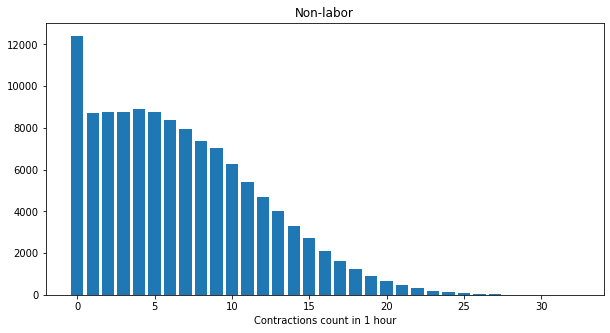

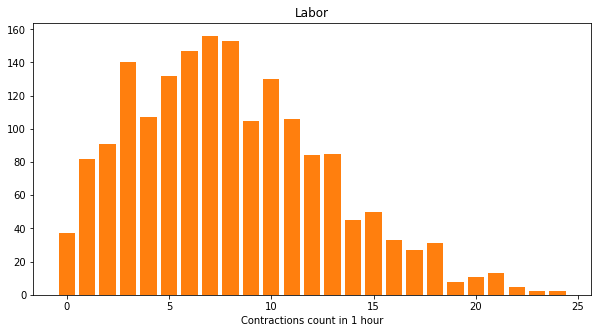

In [196]:
plt.figure(figsize=(10,5))
plt.title('Non-labor')
count_nl_3 = cx_count_3[cx_count_3['labor'] == 0]['count']
x, count = np.unique(count_nl_3, return_counts=True);
plt.bar(x, count, color='C0', label='non labor')
plt.xlabel('Contractions count in 1 hour')

plt.figure(figsize=(10,5))
plt.title('Labor')
count_l_3 =  cx_count_3[cx_count_3['labor'] == 1]['count']
x, count = np.unique(count_l_3, return_counts=True);
plt.bar(x, count, color='C1', label='non labor')
plt.xlabel('Contractions count in 1 hour')

### Recordings with less than 10% sad segments

0 / 4689
1 / 4689
2 / 4689
3 / 4689
4 / 4689
5 / 4689
6 / 4689
7 / 4689
8 / 4689
9 / 4689
10 / 4689
11 / 4689
12 / 4689
13 / 4689
14 / 4689
15 / 4689
16 / 4689
17 / 4689
18 / 4689
19 / 4689
20 / 4689
21 / 4689
22 / 4689
23 / 4689
24 / 4689
25 / 4689
26 / 4689
27 / 4689
28 / 4689
29 / 4689
30 / 4689
31 / 4689
32 / 4689
33 / 4689
34 / 4689
35 / 4689
36 / 4689
37 / 4689
38 / 4689
39 / 4689
40 / 4689
41 / 4689
42 / 4689
43 / 4689
44 / 4689
45 / 4689
46 / 4689
47 / 4689
48 / 4689
49 / 4689
50 / 4689
51 / 4689
52 / 4689
53 / 4689
54 / 4689
55 / 4689
56 / 4689
57 / 4689
58 / 4689
59 / 4689
60 / 4689
61 / 4689
62 / 4689
63 / 4689
64 / 4689
65 / 4689
66 / 4689
67 / 4689
68 / 4689
69 / 4689
70 / 4689
71 / 4689
72 / 4689
73 / 4689
74 / 4689
75 / 4689
76 / 4689
77 / 4689
78 / 4689
79 / 4689
80 / 4689
81 / 4689
82 / 4689
83 / 4689
84 / 4689
85 / 4689
86 / 4689
87 / 4689
88 / 4689
89 / 4689
90 / 4689
91 / 4689
92 / 4689
93 / 4689
94 / 4689
95 / 4689
96 / 4689
97 / 4689
98 / 4689
99 / 4689
100 / 4689

755 / 4689
756 / 4689
757 / 4689
758 / 4689
759 / 4689
760 / 4689
761 / 4689
762 / 4689
763 / 4689
764 / 4689
765 / 4689
766 / 4689
767 / 4689
768 / 4689
769 / 4689
770 / 4689
771 / 4689
772 / 4689
773 / 4689
774 / 4689
775 / 4689
776 / 4689
777 / 4689
778 / 4689
779 / 4689
780 / 4689
781 / 4689
782 / 4689
783 / 4689
784 / 4689
785 / 4689
786 / 4689
787 / 4689
788 / 4689
789 / 4689
790 / 4689
791 / 4689
792 / 4689
793 / 4689
794 / 4689
795 / 4689
796 / 4689
797 / 4689
798 / 4689
799 / 4689
800 / 4689
801 / 4689
802 / 4689
803 / 4689
804 / 4689
805 / 4689
806 / 4689
807 / 4689
808 / 4689
809 / 4689
810 / 4689
811 / 4689
812 / 4689
813 / 4689
814 / 4689
815 / 4689
816 / 4689
817 / 4689
818 / 4689
819 / 4689
820 / 4689
821 / 4689
822 / 4689
823 / 4689
824 / 4689
825 / 4689
826 / 4689
827 / 4689
828 / 4689
829 / 4689
830 / 4689
831 / 4689
832 / 4689
833 / 4689
834 / 4689
835 / 4689
836 / 4689
837 / 4689
838 / 4689
839 / 4689
840 / 4689
841 / 4689
842 / 4689
843 / 4689
844 / 4689
845 / 4689

1462 / 4689
1463 / 4689
1464 / 4689
1465 / 4689
1466 / 4689
1467 / 4689
1468 / 4689
1469 / 4689
1470 / 4689
1471 / 4689
1472 / 4689
1473 / 4689
1474 / 4689
1475 / 4689
1476 / 4689
1477 / 4689
1478 / 4689
1479 / 4689
1480 / 4689
1481 / 4689
1482 / 4689
1483 / 4689
1484 / 4689
1485 / 4689
1486 / 4689
1487 / 4689
1488 / 4689
1489 / 4689
1490 / 4689
1491 / 4689
1492 / 4689
1493 / 4689
1494 / 4689
1495 / 4689
1496 / 4689
1497 / 4689
1498 / 4689
1499 / 4689
1500 / 4689
1501 / 4689
1502 / 4689
1503 / 4689
1504 / 4689
1505 / 4689
1506 / 4689
1507 / 4689
1508 / 4689
1509 / 4689
1510 / 4689
1511 / 4689
1512 / 4689
1513 / 4689
1514 / 4689
1515 / 4689
1516 / 4689
1517 / 4689
1518 / 4689
1519 / 4689
1520 / 4689
1521 / 4689
1522 / 4689
1523 / 4689
1524 / 4689
1525 / 4689
1526 / 4689
1527 / 4689
1528 / 4689
1529 / 4689
1530 / 4689
1531 / 4689
1532 / 4689
1533 / 4689
1534 / 4689
1535 / 4689
1536 / 4689
1537 / 4689
1538 / 4689
1539 / 4689
1540 / 4689
1541 / 4689
1542 / 4689
1543 / 4689
1544 / 4689
1545

2146 / 4689
2147 / 4689
2148 / 4689
2149 / 4689
2150 / 4689
2151 / 4689
2152 / 4689
2153 / 4689
2154 / 4689
2155 / 4689
2156 / 4689
2157 / 4689
2158 / 4689
2159 / 4689
2160 / 4689
2161 / 4689
2162 / 4689
2163 / 4689
2164 / 4689
2165 / 4689
2166 / 4689
2167 / 4689
2168 / 4689
2169 / 4689
2170 / 4689
2171 / 4689
2172 / 4689
2173 / 4689
2174 / 4689
2175 / 4689
2176 / 4689
2177 / 4689
2178 / 4689
2179 / 4689
2180 / 4689
2181 / 4689
2182 / 4689
2183 / 4689
2184 / 4689
2185 / 4689
2186 / 4689
2187 / 4689
2188 / 4689
2189 / 4689
2190 / 4689
2191 / 4689
2192 / 4689
2193 / 4689
2194 / 4689
2195 / 4689
2196 / 4689
2197 / 4689
2198 / 4689
2199 / 4689
2200 / 4689
2201 / 4689
2202 / 4689
2203 / 4689
2204 / 4689
2205 / 4689
2206 / 4689
2207 / 4689
2208 / 4689
2209 / 4689
2210 / 4689
2211 / 4689
2212 / 4689
2213 / 4689
2214 / 4689
2215 / 4689
2216 / 4689
2217 / 4689
2218 / 4689
2219 / 4689
2220 / 4689
2221 / 4689
2222 / 4689
2223 / 4689
2224 / 4689
2225 / 4689
2226 / 4689
2227 / 4689
2228 / 4689
2229

2829 / 4689
2830 / 4689
2831 / 4689
2832 / 4689
2833 / 4689
2834 / 4689
2835 / 4689
2836 / 4689
2837 / 4689
2838 / 4689
2839 / 4689
2840 / 4689
2841 / 4689
2842 / 4689
2843 / 4689
2844 / 4689
2845 / 4689
2846 / 4689
2847 / 4689
2848 / 4689
2849 / 4689
2850 / 4689
2851 / 4689
2852 / 4689
2853 / 4689
2854 / 4689
2855 / 4689
2856 / 4689
2857 / 4689
2858 / 4689
2859 / 4689
2860 / 4689
2861 / 4689
2862 / 4689
2863 / 4689
2864 / 4689
2865 / 4689
2866 / 4689
2867 / 4689
2868 / 4689
2869 / 4689
2870 / 4689
2871 / 4689
2872 / 4689
2873 / 4689
2874 / 4689
2875 / 4689
2876 / 4689
2877 / 4689
2878 / 4689
2879 / 4689
2880 / 4689
2881 / 4689
2882 / 4689
2883 / 4689
2884 / 4689
2885 / 4689
2886 / 4689
2887 / 4689
2888 / 4689
2889 / 4689
2890 / 4689
2891 / 4689
2892 / 4689
2893 / 4689
2894 / 4689
2895 / 4689
2896 / 4689
2897 / 4689
2898 / 4689
2899 / 4689
2900 / 4689
2901 / 4689
2902 / 4689
2903 / 4689
2904 / 4689
2905 / 4689
2906 / 4689
2907 / 4689
2908 / 4689
2909 / 4689
2910 / 4689
2911 / 4689
2912

3513 / 4689
3514 / 4689
3515 / 4689
3516 / 4689
3517 / 4689
3518 / 4689
3519 / 4689
3520 / 4689
3521 / 4689
3522 / 4689
3523 / 4689
3524 / 4689
3525 / 4689
3526 / 4689
3527 / 4689
3528 / 4689
3529 / 4689
3530 / 4689
3531 / 4689
3532 / 4689
3533 / 4689
3534 / 4689
3535 / 4689
3536 / 4689
3537 / 4689
3538 / 4689
3539 / 4689
3540 / 4689
3541 / 4689
3542 / 4689
3543 / 4689
3544 / 4689
3545 / 4689
3546 / 4689
3547 / 4689
3548 / 4689
3549 / 4689
3550 / 4689
3551 / 4689
3552 / 4689
3553 / 4689
3554 / 4689
3555 / 4689
3556 / 4689
3557 / 4689
3558 / 4689
3559 / 4689
3560 / 4689
3561 / 4689
3562 / 4689
3563 / 4689
3564 / 4689
3565 / 4689
3566 / 4689
3567 / 4689
3568 / 4689
3569 / 4689
3570 / 4689
3571 / 4689
3572 / 4689
3573 / 4689
3574 / 4689
3575 / 4689
3576 / 4689
3577 / 4689
3578 / 4689
3579 / 4689
3580 / 4689
3581 / 4689
3582 / 4689
3583 / 4689
3584 / 4689
3585 / 4689
3586 / 4689
3587 / 4689
3588 / 4689
3589 / 4689
3590 / 4689
3591 / 4689
3592 / 4689
3593 / 4689
3594 / 4689
3595 / 4689
3596

4196 / 4689
4197 / 4689
4198 / 4689
4199 / 4689
4200 / 4689
4201 / 4689
4202 / 4689
4203 / 4689
4204 / 4689
4205 / 4689
4206 / 4689
4207 / 4689
4208 / 4689
4209 / 4689
4210 / 4689
4211 / 4689
4212 / 4689
4213 / 4689
4214 / 4689
4215 / 4689
4216 / 4689
4217 / 4689
4218 / 4689
4219 / 4689
4220 / 4689
4221 / 4689
4222 / 4689
4223 / 4689
4224 / 4689
4225 / 4689
4226 / 4689
4227 / 4689
4228 / 4689
4229 / 4689
4230 / 4689
4231 / 4689
4232 / 4689
4233 / 4689
4234 / 4689
4235 / 4689
4236 / 4689
4237 / 4689
4238 / 4689
4239 / 4689
4240 / 4689
4241 / 4689
4242 / 4689
4243 / 4689
4244 / 4689
4245 / 4689
4246 / 4689
4247 / 4689
4248 / 4689
4249 / 4689
4250 / 4689
4251 / 4689
4252 / 4689
4253 / 4689
4254 / 4689
4255 / 4689
4256 / 4689
4257 / 4689
4258 / 4689
4259 / 4689
4260 / 4689
4261 / 4689
4262 / 4689
4263 / 4689
4264 / 4689
4265 / 4689
4266 / 4689
4267 / 4689
4268 / 4689
4269 / 4689
4270 / 4689
4271 / 4689
4272 / 4689
4273 / 4689
4274 / 4689
4275 / 4689
4276 / 4689
4277 / 4689
4278 / 4689
4279

Text(0.5, 0, 'Contractions count in 1 hour')

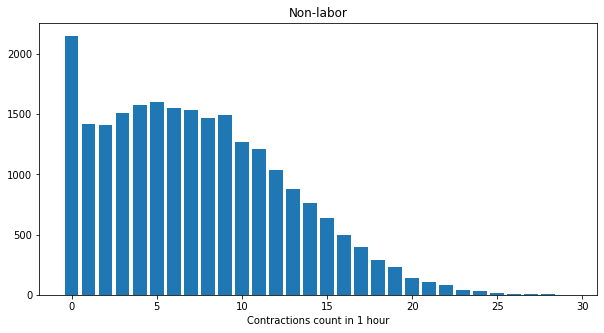

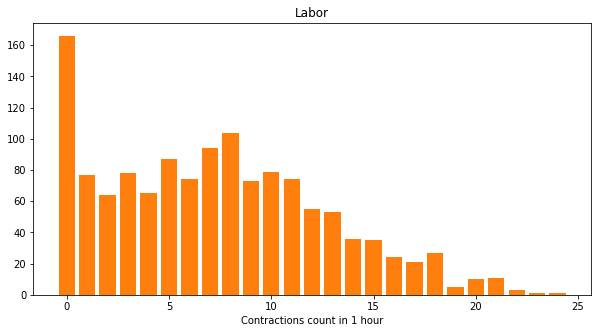

In [4]:
#load data
recordings_4 = pd.read_pickle('./data/recordings-04')
contractions_4 = pd.read_pickle('./data/contractions-04')

#extract count feature
cx_count_4 = con_count.extract(recordings_4, contractions_4, window_size)

#plot
plt.figure(figsize=(10,5))
plt.title('Non-labor')
count_nl_4 = cx_count_4[cx_count_4['labor'] == 0]['count']
x, count = np.unique(count_nl_4, return_counts=True);
plt.bar(x, count, color='C0', label='non labor')
plt.xlabel('Contractions count in 1 hour')

plt.figure(figsize=(10,5))
plt.title('Labor')
count_l_4 =  cx_count_4[cx_count_4['labor'] == 1]['count']
x, count = np.unique(count_l_4, return_counts=True);
plt.bar(x, count, color='C1', label='non labor')
plt.xlabel('Contractions count in 1 hour')

#### Median number of contractions in 1 hour window

In [ ]:
users_4 = pd.read_pickle('./data/users-04')
plt.figure()
cx_count_4['gestational_age'] = [((sw.date()-dd).days+280.0)/7.0 for sw,dd in zip(cx_count_4['start_window'], users_4.loc[recordings_4.loc[cx_count_4['session_id'], 'user_id'], 'due_date'])]
cx_count_4['gestational_age'] = cx_count_4['gestational_age'].apply(np.floor)
cx_count_4['count'] = cx_count_4['count'].apply(int)
bar = cx_count_4.groupby('gestational_age').median()[['count']]
bar.plot.bar()
plt.title('Median over windows');

#### Median number of contractions over sessions

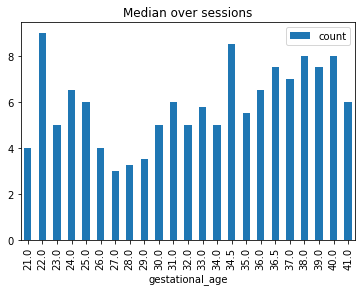

In [74]:
#avg over one recording
tmp = cx_count_4.groupby('session_id').median()[['count','gestational_age']]
bar = tmp.groupby('gestational_age').median()[['count']]
bar.plot.bar()
plt.title('Median over sessions');

#### Median number of contractions subject normalized

In [83]:
#avg over one subject
cx_count_4['user_id'] = [recordings_4.loc[a]['user_id'] for a in cx_count_4['session_id'] ]

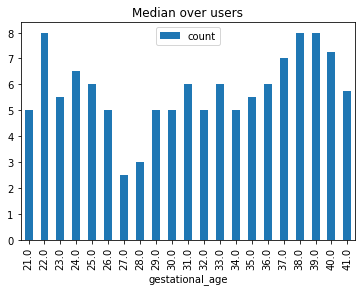

In [94]:
tmp = cx_count_4.groupby(['user_id', 'gestational_age']).median()[['count']]
bar = tmp.groupby('gestational_age').median()[['count']]
bar.plot.bar()
plt.title('Median over subjects');

In [6]:
# plot GA curve for subjects

In [9]:
recordings_4[recordings_4['user_id']=='u74CIlN3n5Y13D6nSN7YQdUvHoy1']

id                       user_id  \
id                                                                         
-L_1Jjduf8_z_61Opmv4  -L_1Jjduf8_z_61Opmv4  u74CIlN3n5Y13D6nSN7YQdUvHoy1   
-LYFTDuRxr1rRzLRCDjj  -LYFTDuRxr1rRzLRCDjj  u74CIlN3n5Y13D6nSN7YQdUvHoy1   
-LZaVWTD2YGFfahV8JOK  -LZaVWTD2YGFfahV8JOK  u74CIlN3n5Y13D6nSN7YQdUvHoy1   

                                    created_at duration stress_rest_score  \
id                                                                          
-L_1Jjduf8_z_61Opmv4 2019-03-03 06:52:08+00:00 01:23:24              None   
-LYFTDuRxr1rRzLRCDjj 2019-02-09 04:16:52+00:00 09:00:00              None   
-LZaVWTD2YGFfahV8JOK 2019-02-25 21:14:13+00:00 01:42:52              None   

                     baby_birthdate  labor  
id                                          
-L_1Jjduf8_z_61Opmv4     2019-03-03      1  
-LYFTDuRxr1rRzLRCDjj     2019-03-03      0  
-LZaVWTD2YGFfahV8JOK     2019-03-03      0